# SK 유동인구 EDA + 통계적 분석

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

import os

from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (30, 10)
register_matplotlib_converters()

mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')

In [2]:
FLOWTIME_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_TIME'
FLOWAGE_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_AGE'

In [3]:
sk_data_TIME = pd.read_excel(f'{FLOWTIME_PATH}/SK_TIME_DATA.xlsx')
sk_data_AGE = pd.read_excel(f'{FLOWAGE_PATH}/SK_AGE_DATA.xlsx')

del sk_data_TIME['Unnamed: 0']
del sk_data_AGE['Unnamed: 0']

In [4]:
sk_TIME_2019 = sk_data_TIME[sk_data_TIME['STD_YM'] < 202000]
sk_TIME_2020 = sk_data_TIME[sk_data_TIME['STD_YM'] >= 202000]

sk_AGE_2019 = sk_data_AGE[sk_data_AGE['STD_YM'] < 202000]
sk_AGE_2020 = sk_data_AGE[sk_data_AGE['STD_YM'] >= 202000]

# 1. Covid19와의 연관성 (도시단위)

## 1-1. covid19 데이터 전처리

In [5]:
# data load

covid = pd.read_excel('/Users/minki/pythonworkspace/bigcon2020/2020dataset/accumulate_covid.xlsx')
covid = covid.iloc[:, [0, 1, 3]]

covid = covid.rename(columns = {'날짜' : 'date', '서울 누적':'accumulate_seoul', '대구 누적':'accumulate_daegu'})

# 첫 행 삭제
covid = covid[1:]

# datetype으로 변경
covid['date'] = pd.to_datetime(covid['date'], format = '%Y%m%d')
covid.index = covid['date']

# 데이터 범위 조정
covid = covid['2020-02-01':'2020-05-31']
covid = covid.fillna(0)

In [6]:
# data 나누기

covid_SEOUL = covid.iloc[:, [0, 1]]
covid_DAEGU = covid.iloc[:, [0, 2]]

In [7]:
# 일별 증가량 데이터 만들기

## seoul
covid_SEOUL_dif = covid_SEOUL - covid_SEOUL.shift(1)
covid_SEOUL_dif = covid_SEOUL_dif.iloc[:, 1]
covid_SEOUL_dif = pd.DataFrame(covid_SEOUL_dif.fillna(0))

## daegu
covid_DAEGU_dif = covid_DAEGU - covid_DAEGU.shift(1)
covid_DAEGU_dif = covid_DAEGU_dif.iloc[:, 1]
covid_DAEGU_dif = pd.DataFrame(covid_DAEGU_dif.fillna(0))

## 1-2. 유동인구 데이터 전처리

In [10]:
sk_data_TIME_SEOUL = sk_data_TIME[sk_data_TIME['CITY'] == '서울특별시']
sk_data_TIME_DAEGU = sk_data_TIME[sk_data_TIME['CITY'] == '대구광역시']

sk_data_TIME_SEOUL_2020 = sk_data_TIME_SEOUL[sk_data_TIME_SEOUL['STD_YM'] >= 202000]
sk_data_TIME_DAEGU_2020 = sk_data_TIME_DAEGU[sk_data_TIME_DAEGU['STD_YM'] >= 202000]

In [11]:
sk_data_TIME_SEOUL_2020_group = sk_data_TIME_SEOUL_2020.groupby(sk_data_TIME_SEOUL_2020['STD_YMD']).sum().iloc[:, 2:]
sk_data_TIME_DAEGU_2020_group = sk_data_TIME_DAEGU_2020.groupby(sk_data_TIME_DAEGU_2020['STD_YMD']).sum().iloc[:, 2:]

In [12]:
sk_data_TIME_SEOUL_2020_group.index =  pd.to_datetime(sk_data_TIME_SEOUL_2020_group.index, format = '%Y%m%d')
sk_data_TIME_DAEGU_2020_group.index =  pd.to_datetime(sk_data_TIME_DAEGU_2020_group.index, format = '%Y%m%d')

In [13]:
# 차이 데이터 만들기

sk_data_TIME_SEOUL_2020_group_dif = sk_data_TIME_SEOUL_2020_group - sk_data_TIME_SEOUL_2020_group.shift(1)
sk_data_TIME_SEOUL_2020_group_dif = sk_data_TIME_SEOUL_2020_group_dif.fillna(0)

sk_data_TIME_DAEGU_2020_group_dif = sk_data_TIME_DAEGU_2020_group - sk_data_TIME_DAEGU_2020_group.shift(1)
sk_data_TIME_DAEGU_2020_group_dif = sk_data_TIME_DAEGU_2020_group_dif.fillna(0)

## 1-3. 누적환진자 수와 일별 유동인구 상관관계 비교

In [18]:
cor1_SEOUL = pd.concat([covid_SEOUL, sk_data_TIME_SEOUL_2020_group], axis = 1)
cor1_DAEGU = pd.concat([covid_DAEGU, sk_data_TIME_DAEGU_2020_group], axis = 1)

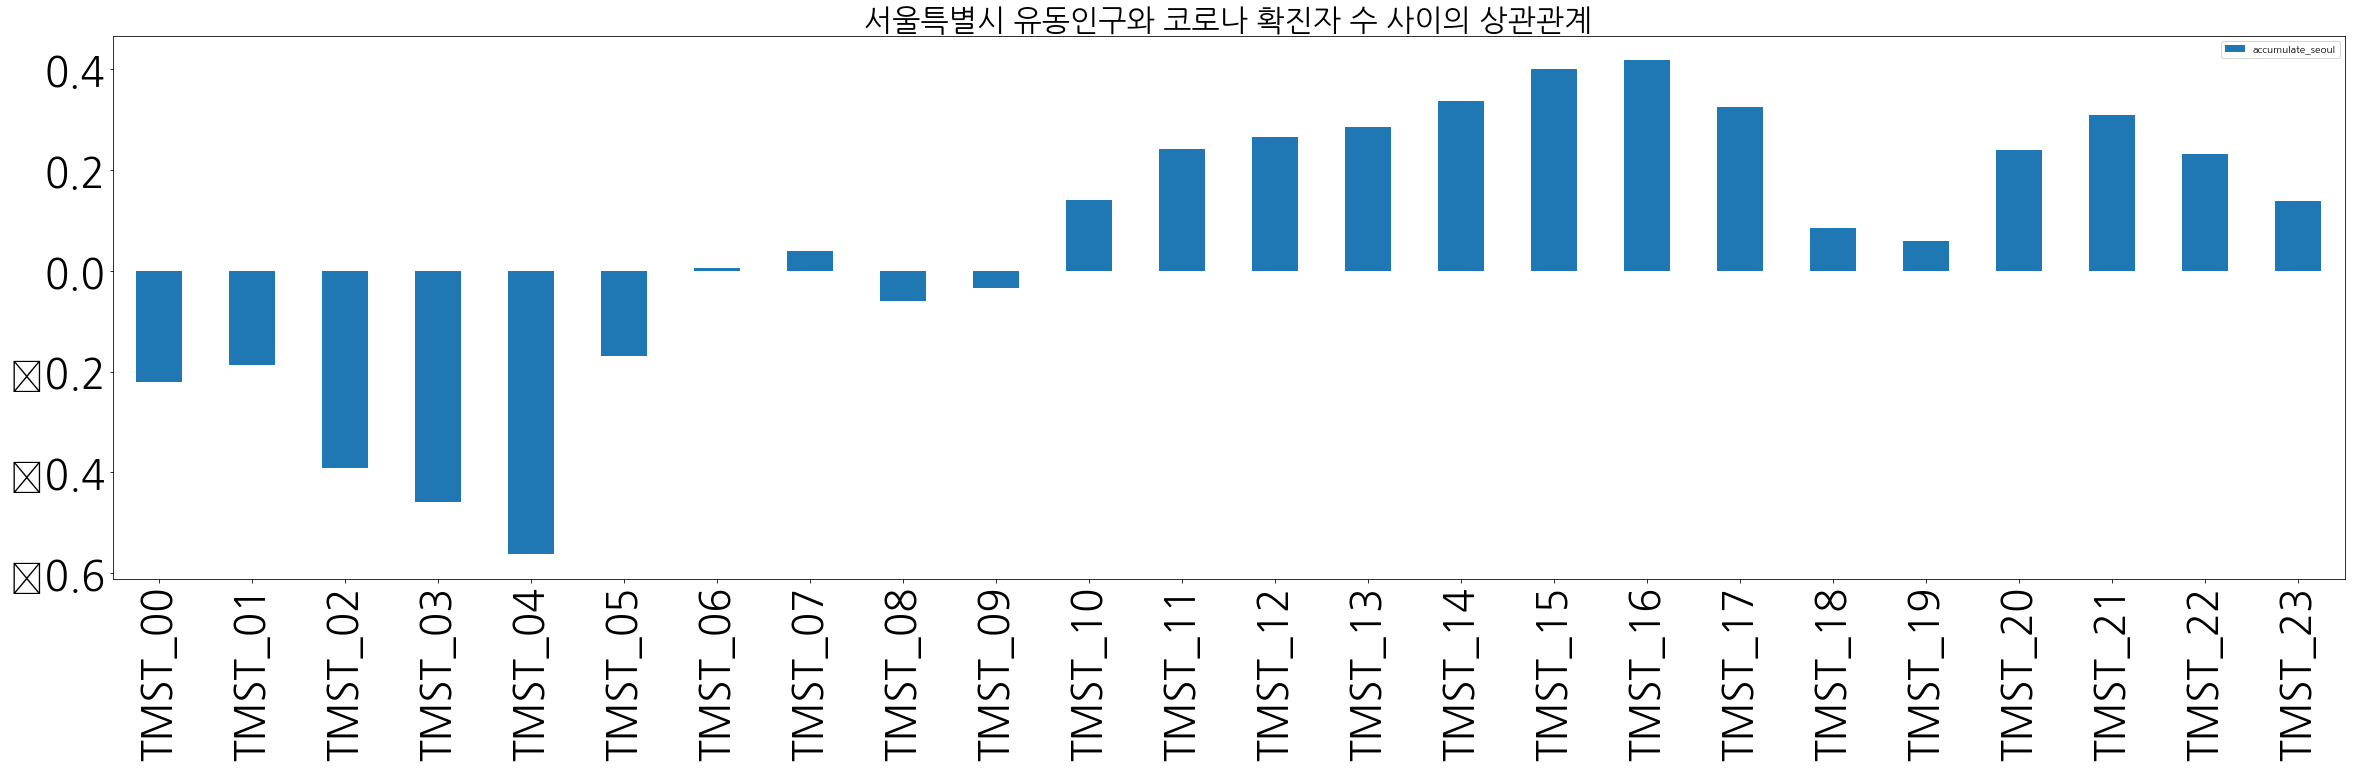

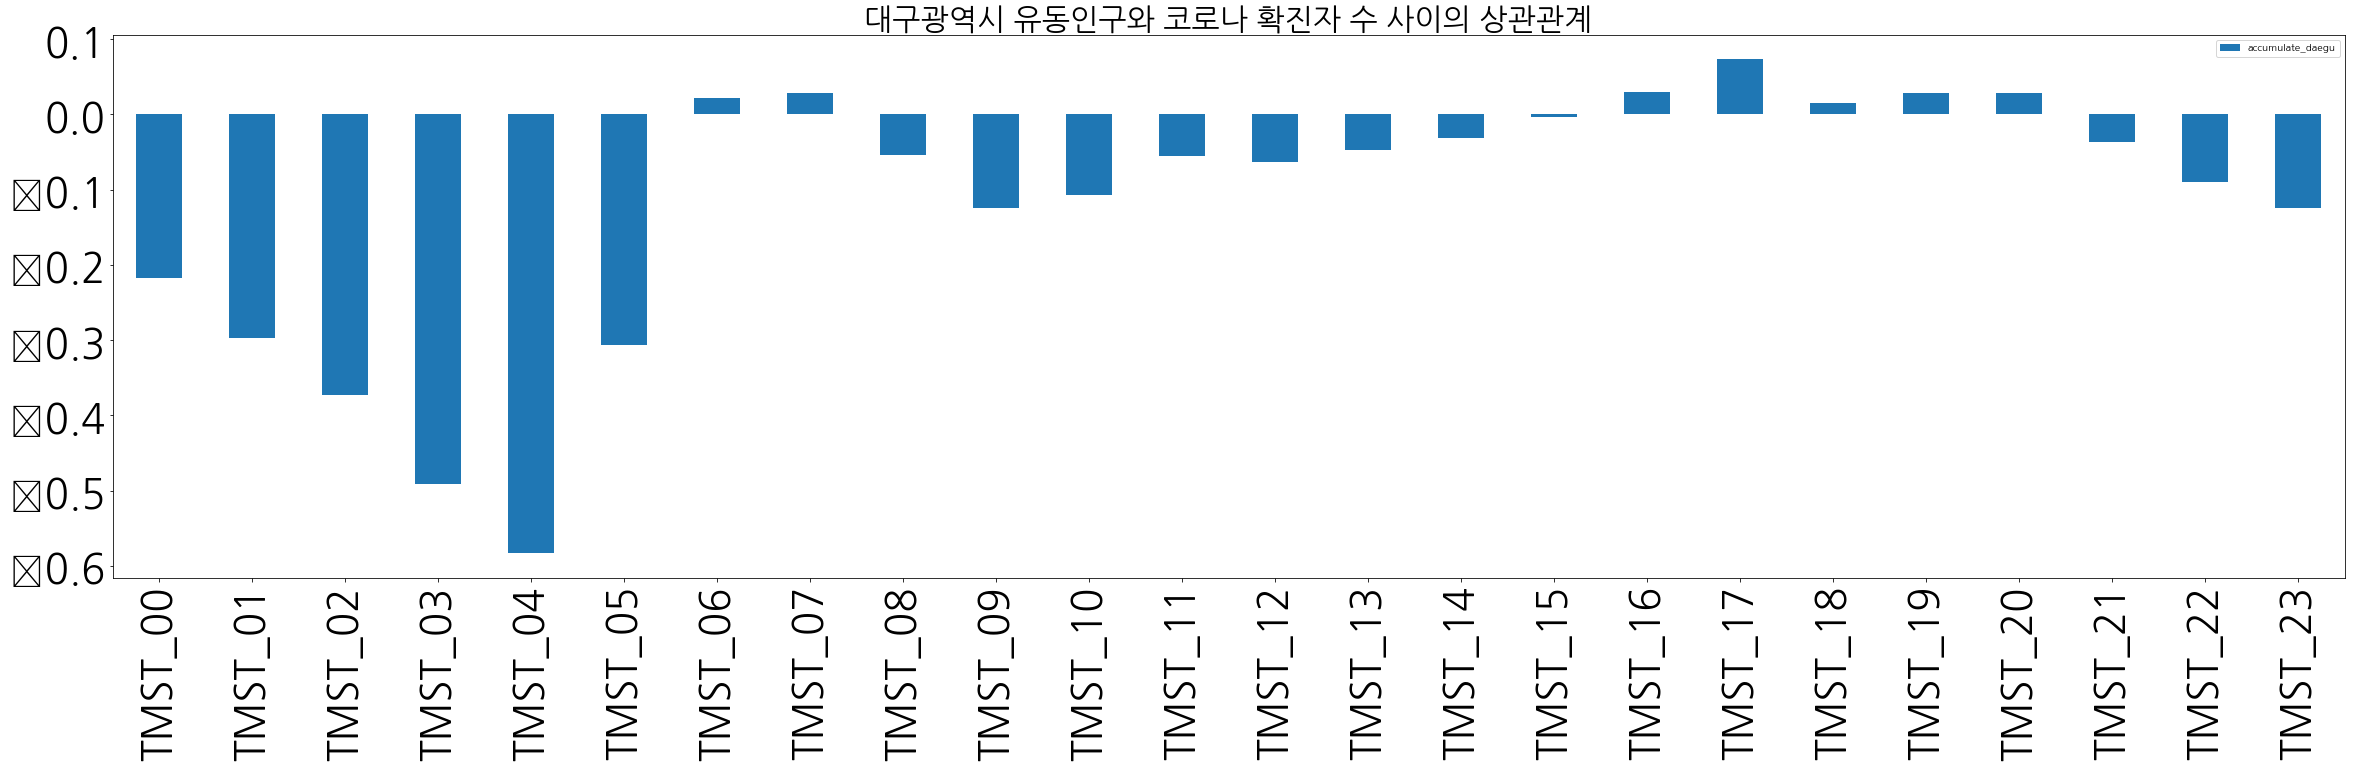

In [22]:
plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor1_SEOUL.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('서울특별시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor1_DAEGU.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('대구광역시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

### 누적확진자 수와 일별 유동인구 상관관계는 코로나가 유동인구에 미치는 영향을 잘 설명하지 못함

## 1-4. 누적확진자 수와 일별 유동인구 변화량 사이의 상관관계 비교

In [24]:
cor2_SEOUL = pd.concat([covid_SEOUL, sk_data_TIME_SEOUL_2020_group_dif], axis = 1)
cor2_DAEGU = pd.concat([covid_DAEGU, sk_data_TIME_DAEGU_2020_group_dif], axis = 1)

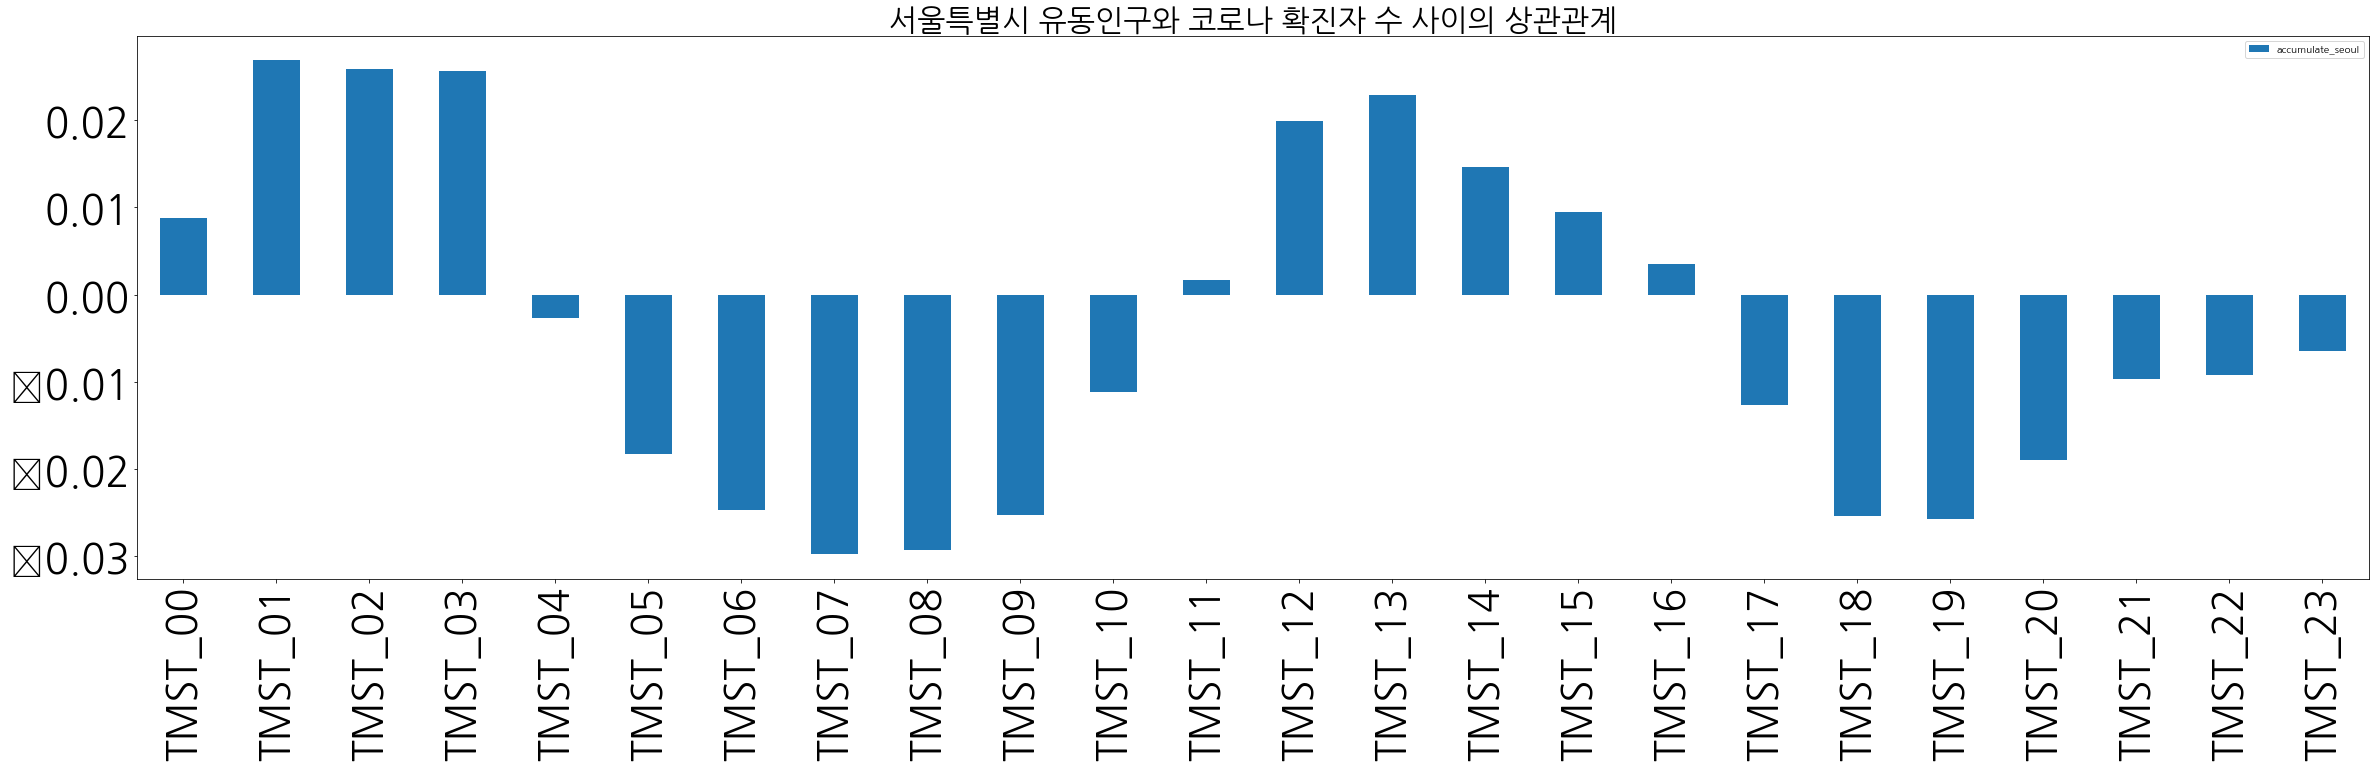

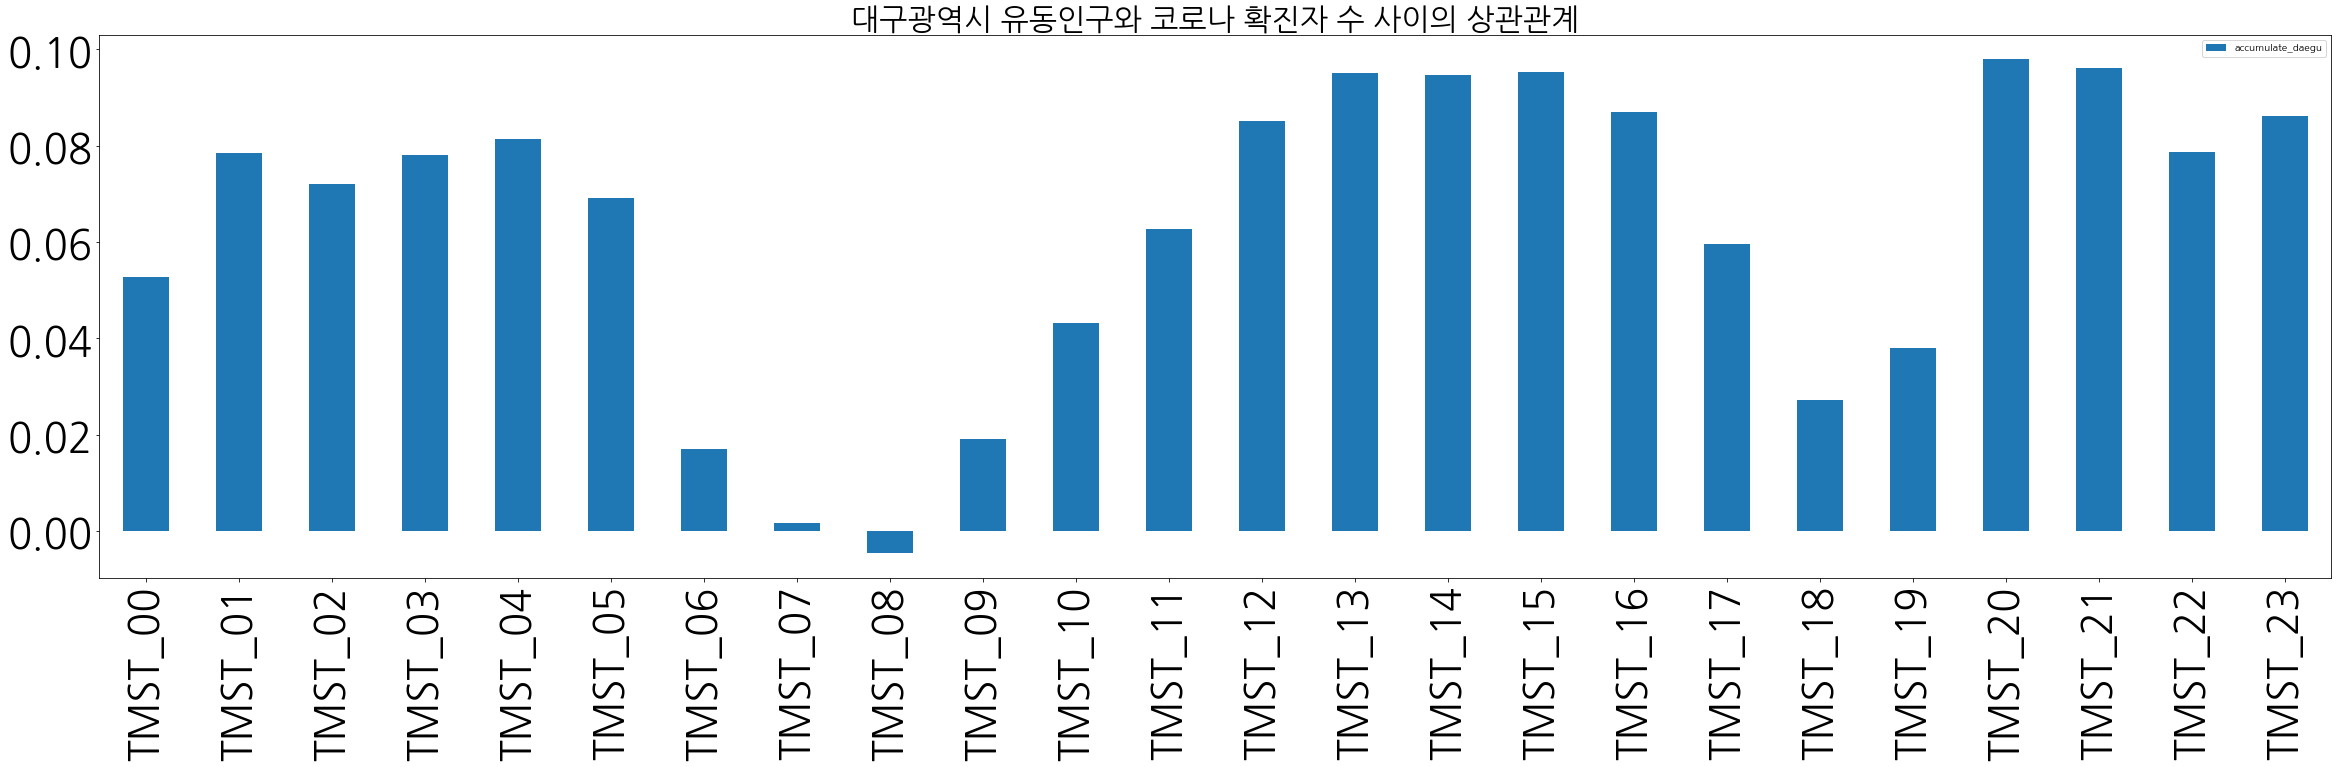

In [25]:
plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor2_SEOUL.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('서울특별시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor2_DAEGU.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('대구광역시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

### 마찬가지로 상관관계가 뚜렷하지 않음. 이는 코로나 누적확진자 수는 계속 증가하는 반면에, 시간이 흐르면서 위축되었던 유동인구가 다시 회복되어 상관관계가 증가한것으로 보임. 

## 1-5. 확진자 증가 수와 일별 유동인구 상관관계 비교

In [27]:
cor3_SEOUL = pd.concat([covid_SEOUL_dif, sk_data_TIME_SEOUL_2020_group], axis = 1)
cor3_DAEGU = pd.concat([covid_DAEGU_dif, sk_data_TIME_DAEGU_2020_group], axis = 1)

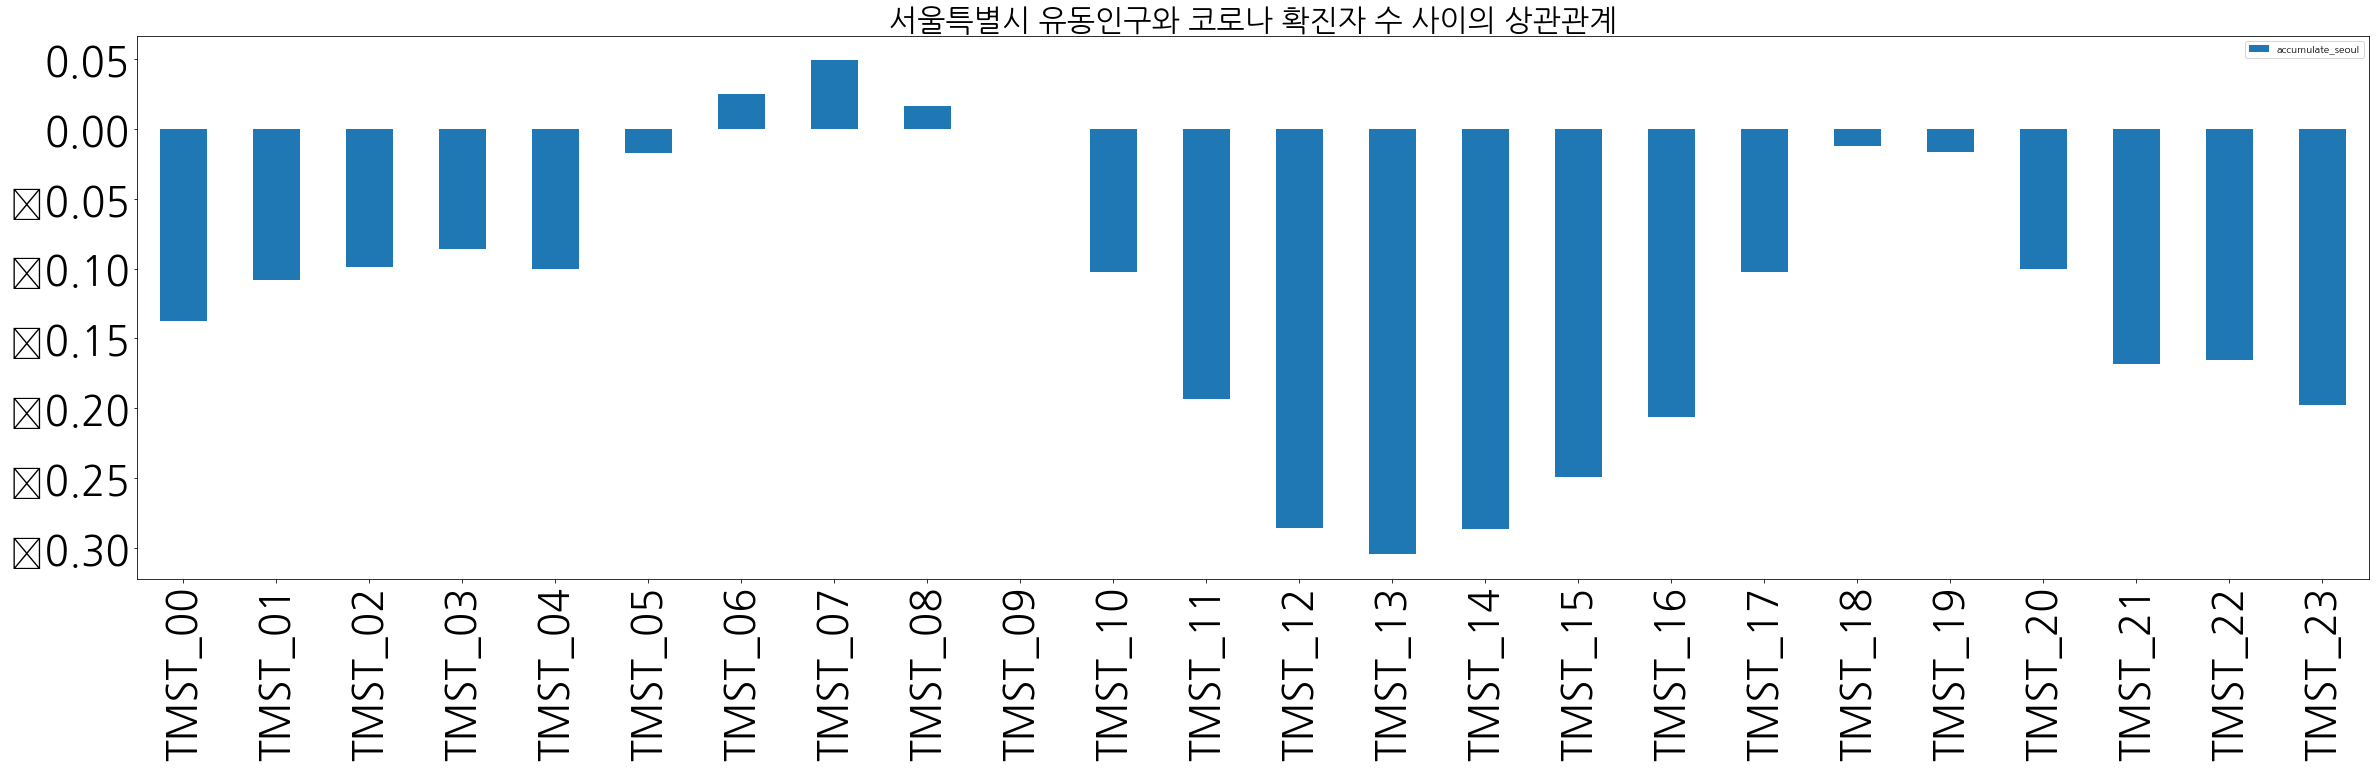

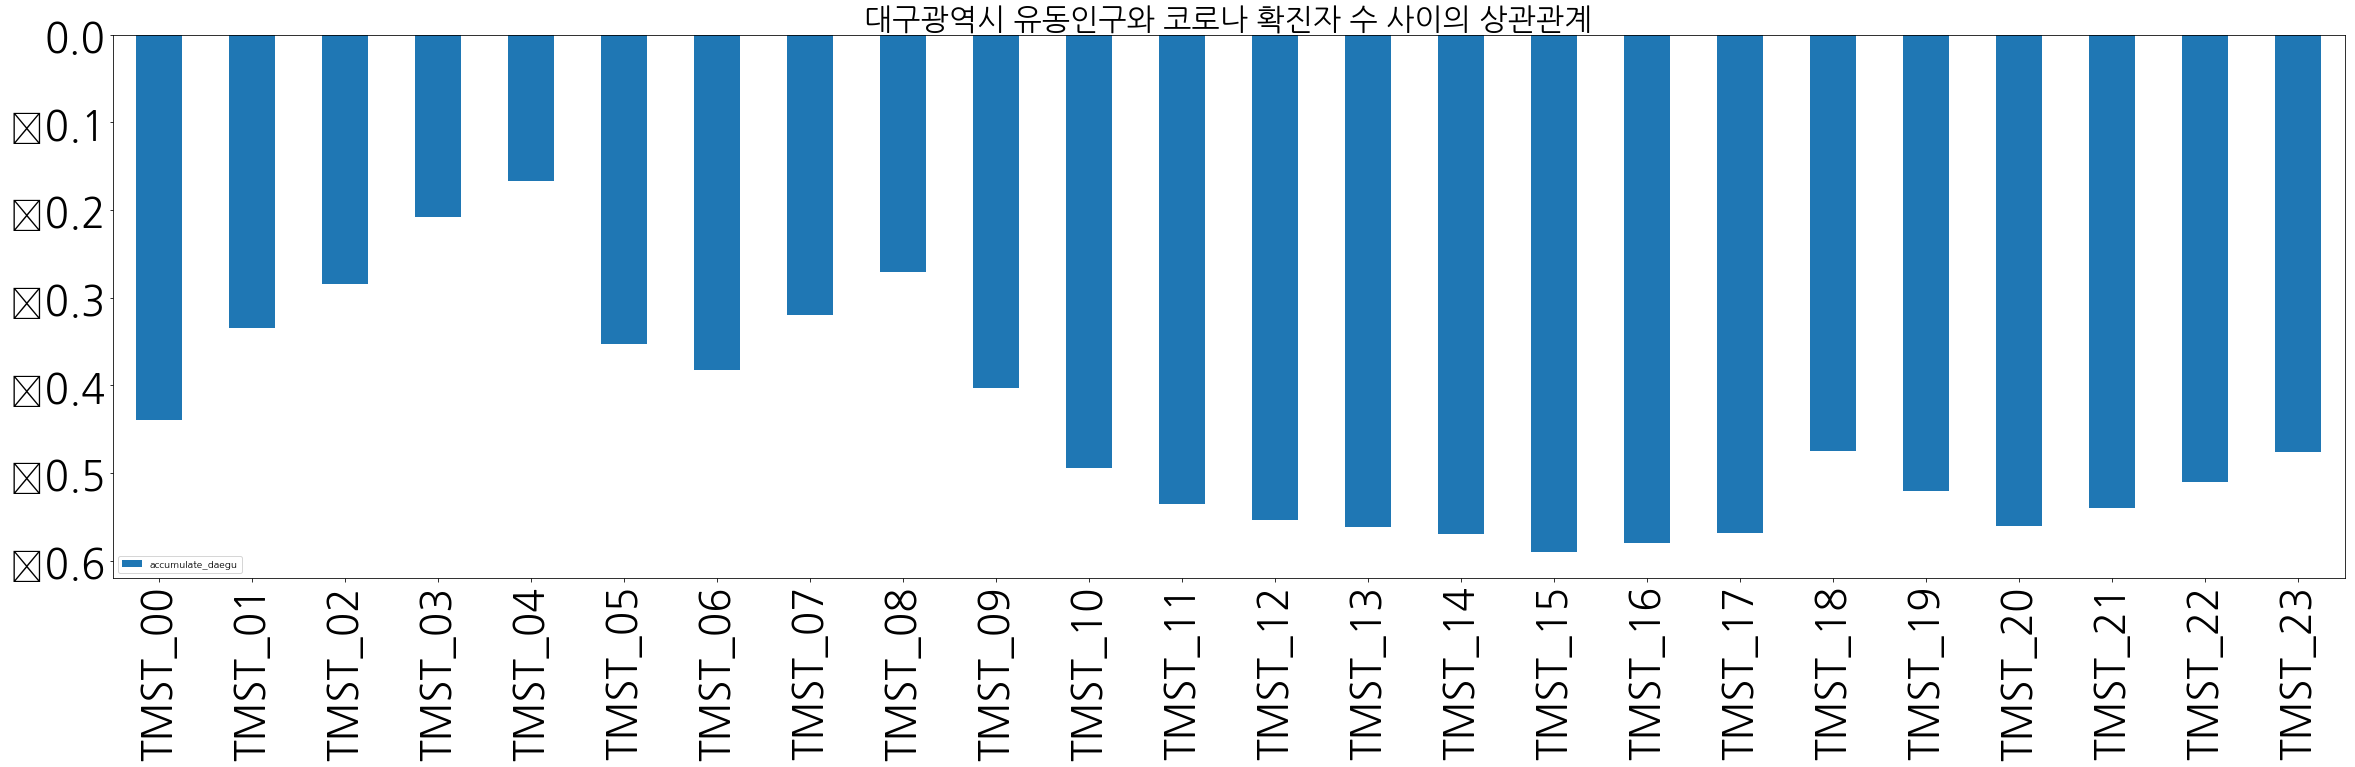

In [28]:
plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor3_SEOUL.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('서울특별시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor3_DAEGU.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('대구광역시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

### 코로나 환자 증가 수는 줄어드는 반면에 유동인구는 늘어나서 대부분 시간대에서 음의 상관관계를 보이는 것으로 추정. 그러나 상관관계가 있다고 말하기는 어려움

## 1-6. 확진자 증가 수와 동일시간대비 일별 유동인구 차이량 상관관계 비교

In [29]:
cor4_SEOUL = pd.concat([covid_SEOUL_dif, sk_data_TIME_SEOUL_2020_group_dif], axis = 1)
cor4_DAEGU = pd.concat([covid_DAEGU_dif, sk_data_TIME_DAEGU_2020_group_dif], axis = 1)

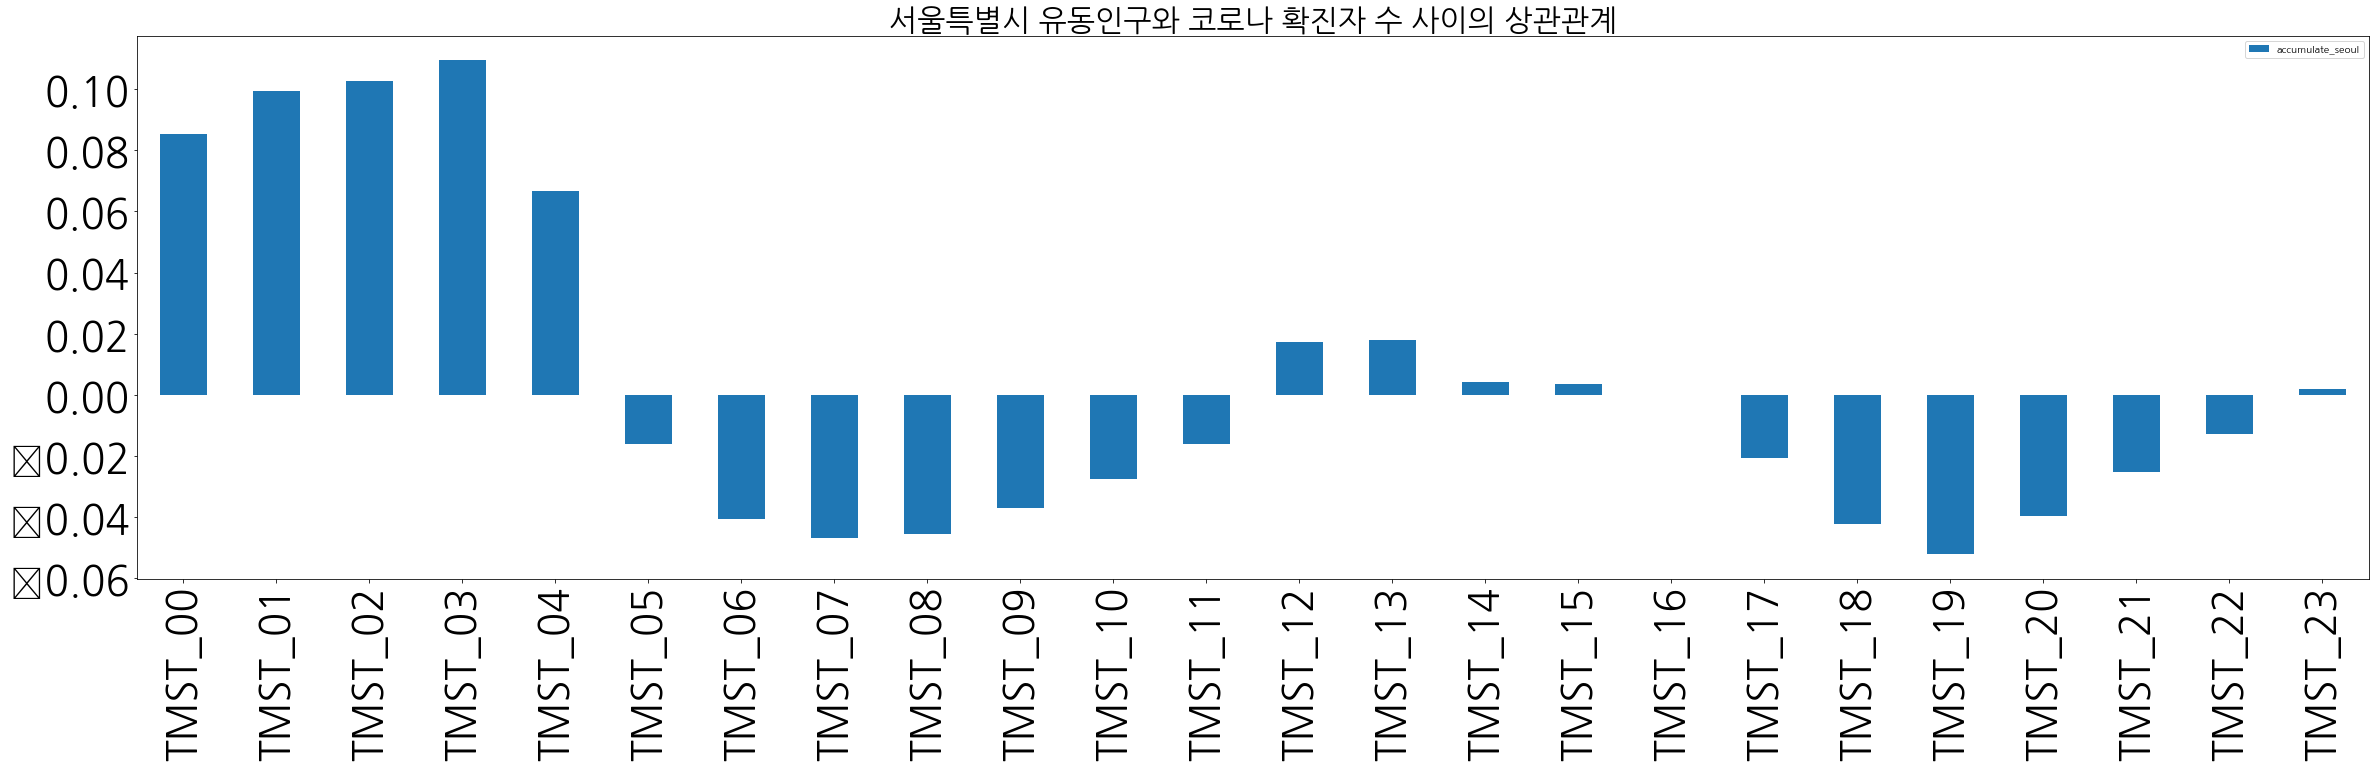

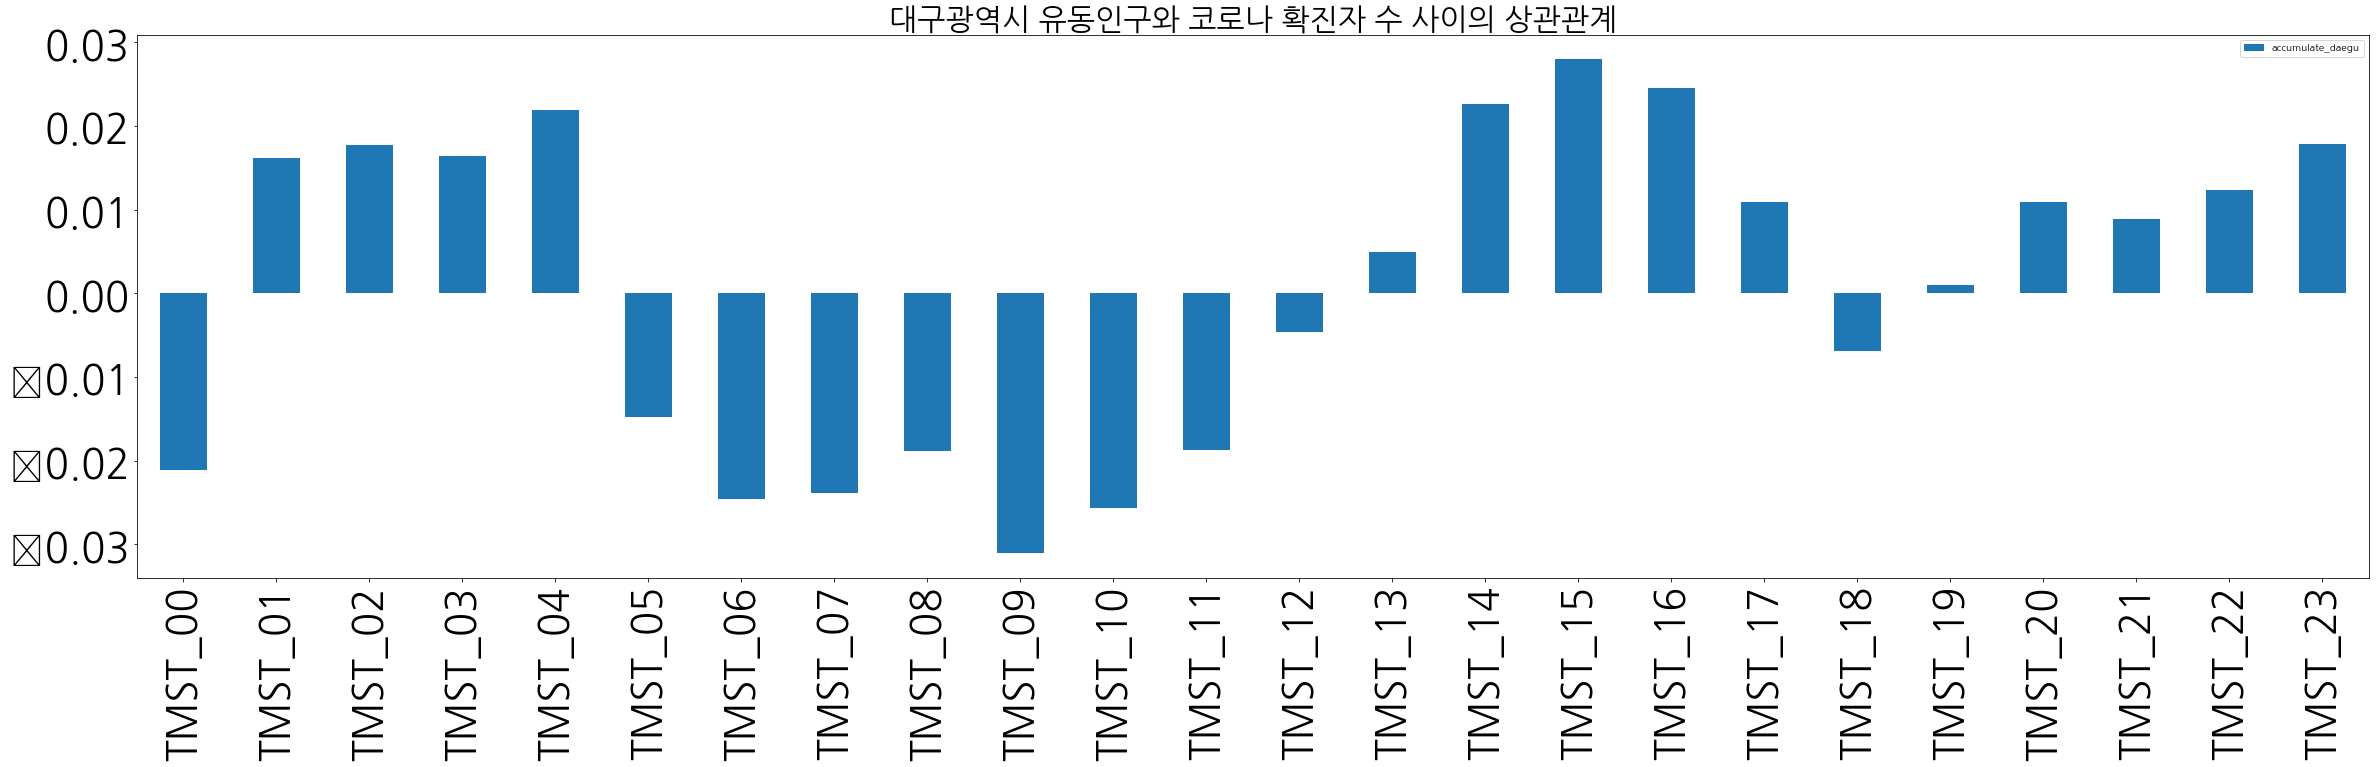

In [30]:
plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor4_SEOUL.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('서울특별시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(cor4_DAEGU.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('대구광역시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 10)

In [38]:
cor5_SEOUL = pd.concat([covid_SEOUL_dif, sk_data_TIME_SEOUL_2020_group.apply(np.sum, axis = 1)], axis = 1)
cor5_DAEGU = pd.concat([covid_DAEGU_dif, sk_data_TIME_DAEGU_2020_group.apply(np.sum, axis = 1)], axis = 1)

In [45]:
cor5_DAEGU.corr()

accumulate_daegu         0
accumulate_daegu          1.000000 -0.547332
0                        -0.547332  1.000000

In [42]:
cor5_SEOUL.corr()

accumulate_seoul         0
accumulate_seoul          1.000000 -0.082436
0                        -0.082436  1.000000

# 2. Covid19와의 연관성 (구단위)

In [177]:
sk_data_TIME_GU = sk_data_TIME.copy()
sk_data_AGE_GU = sk_data_AGE.copy()

sk_data_TIME_GU = sk_data_TIME_GU[sk_data_TIME_GU.STD_YM >= 202000]
sk_data_AGE_GU = sk_data_AGE_GU[sk_data_AGE_GU.STD_YM >= 202000]

In [178]:
sk_data_TIME_GU.GU_NAME = sk_data_TIME_GU.CITY + sk_data_TIME_GU.GU_NAME
sk_data_AGE_GU.GU_NAME = sk_data_AGE_GU.CITY + sk_data_AGE_GU.GU_NAME

In [179]:
sk_data_TIME_GU = sk_data_TIME_GU.groupby([sk_data_TIME_GU.GU_NAME, sk_data_TIME_GU.STD_YMD]).sum()

In [180]:
# GU_NAME을 다시 컬럼으로 보냄
sk_data_TIME_GU.reset_index(level = ['GU_NAME'], inplace = True)

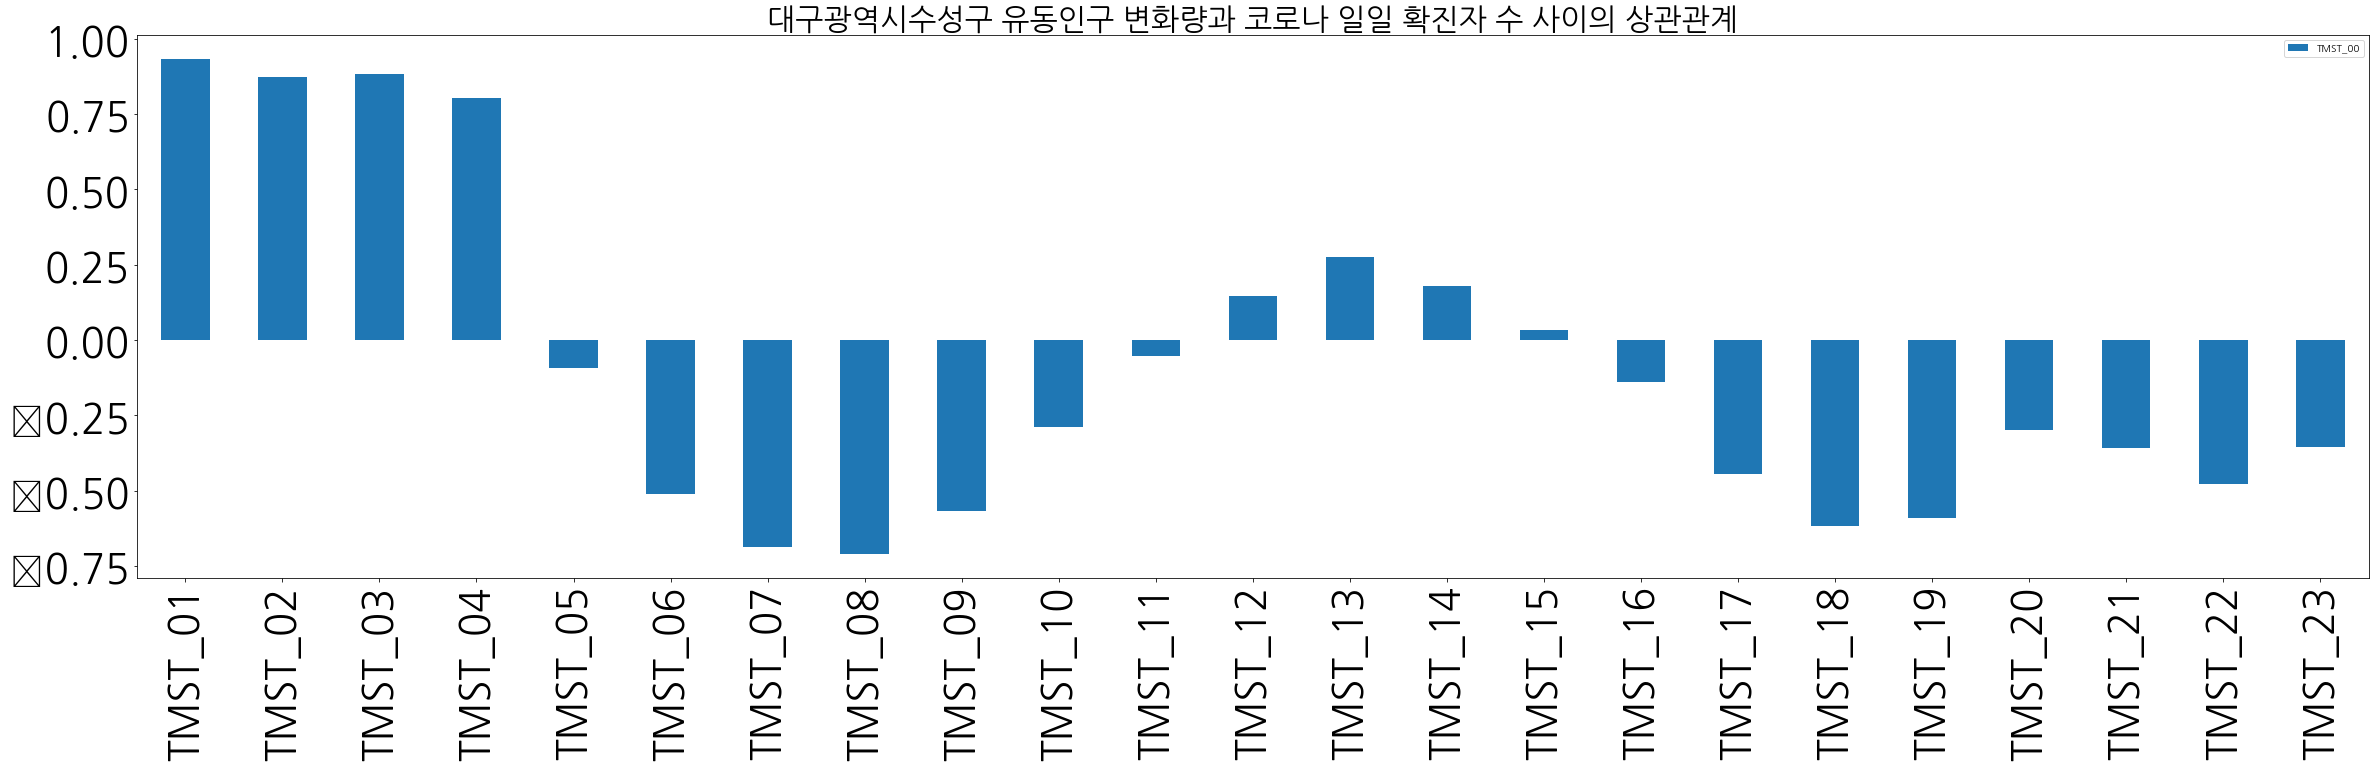

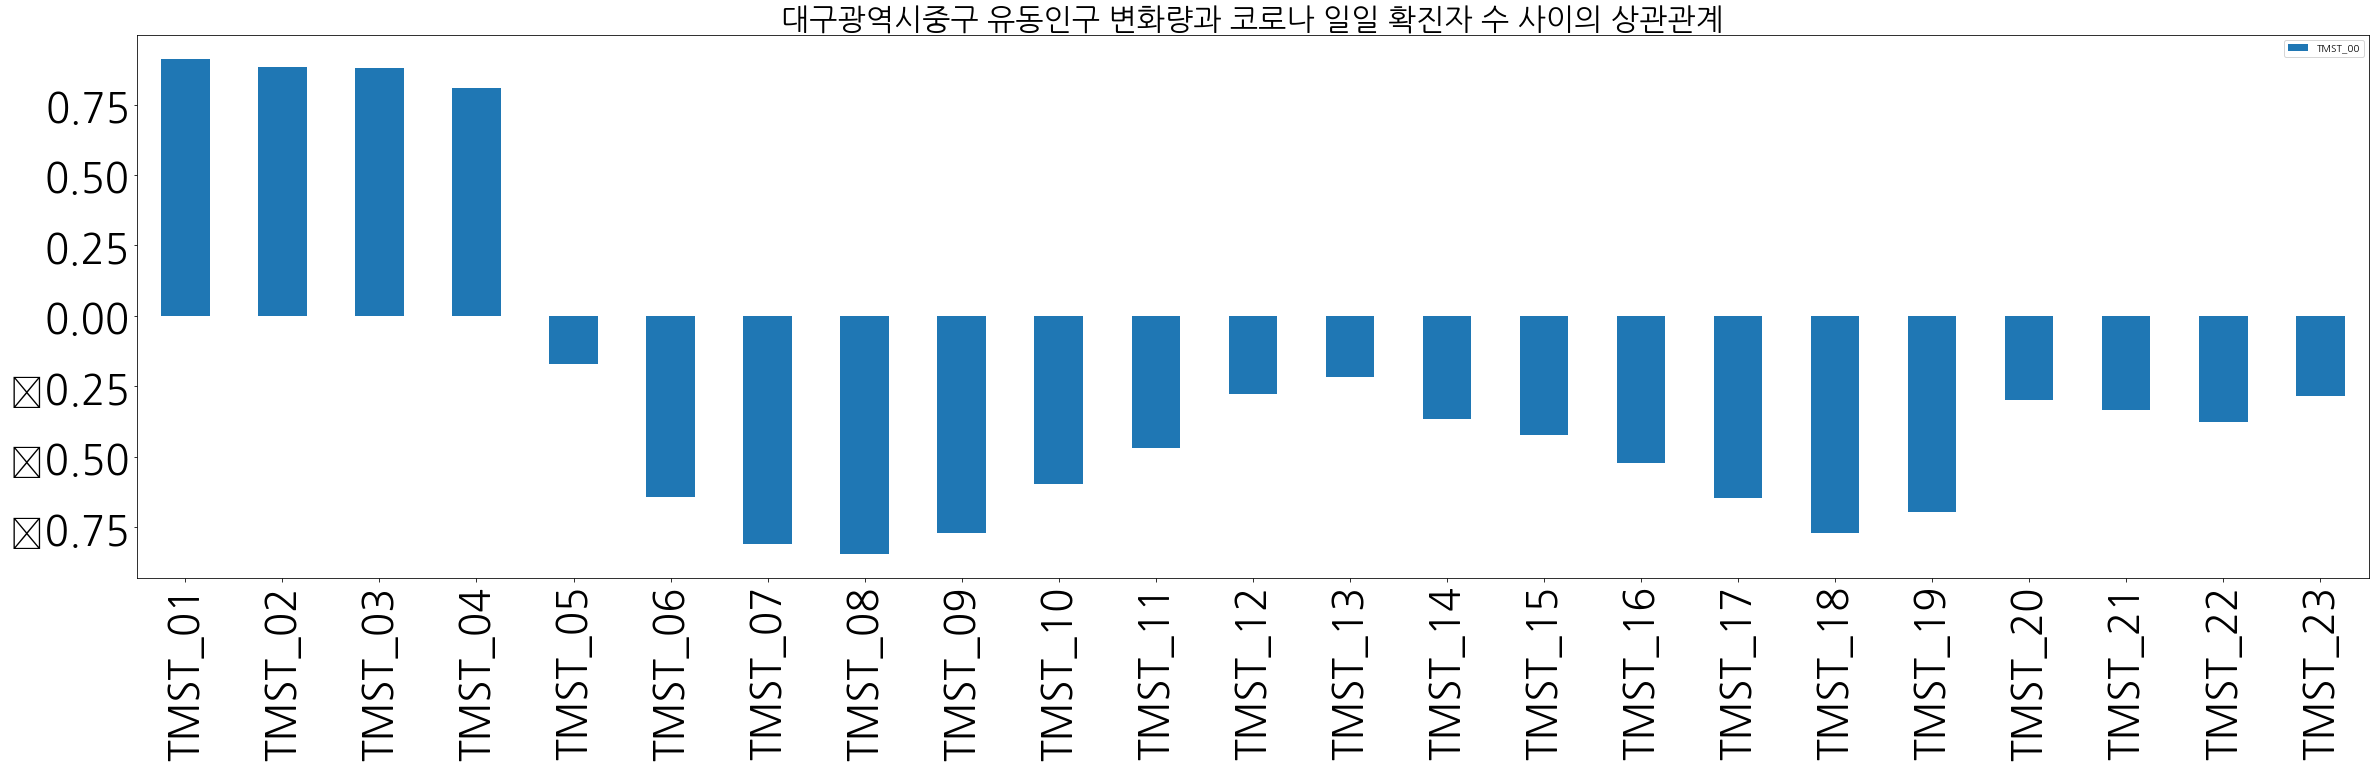

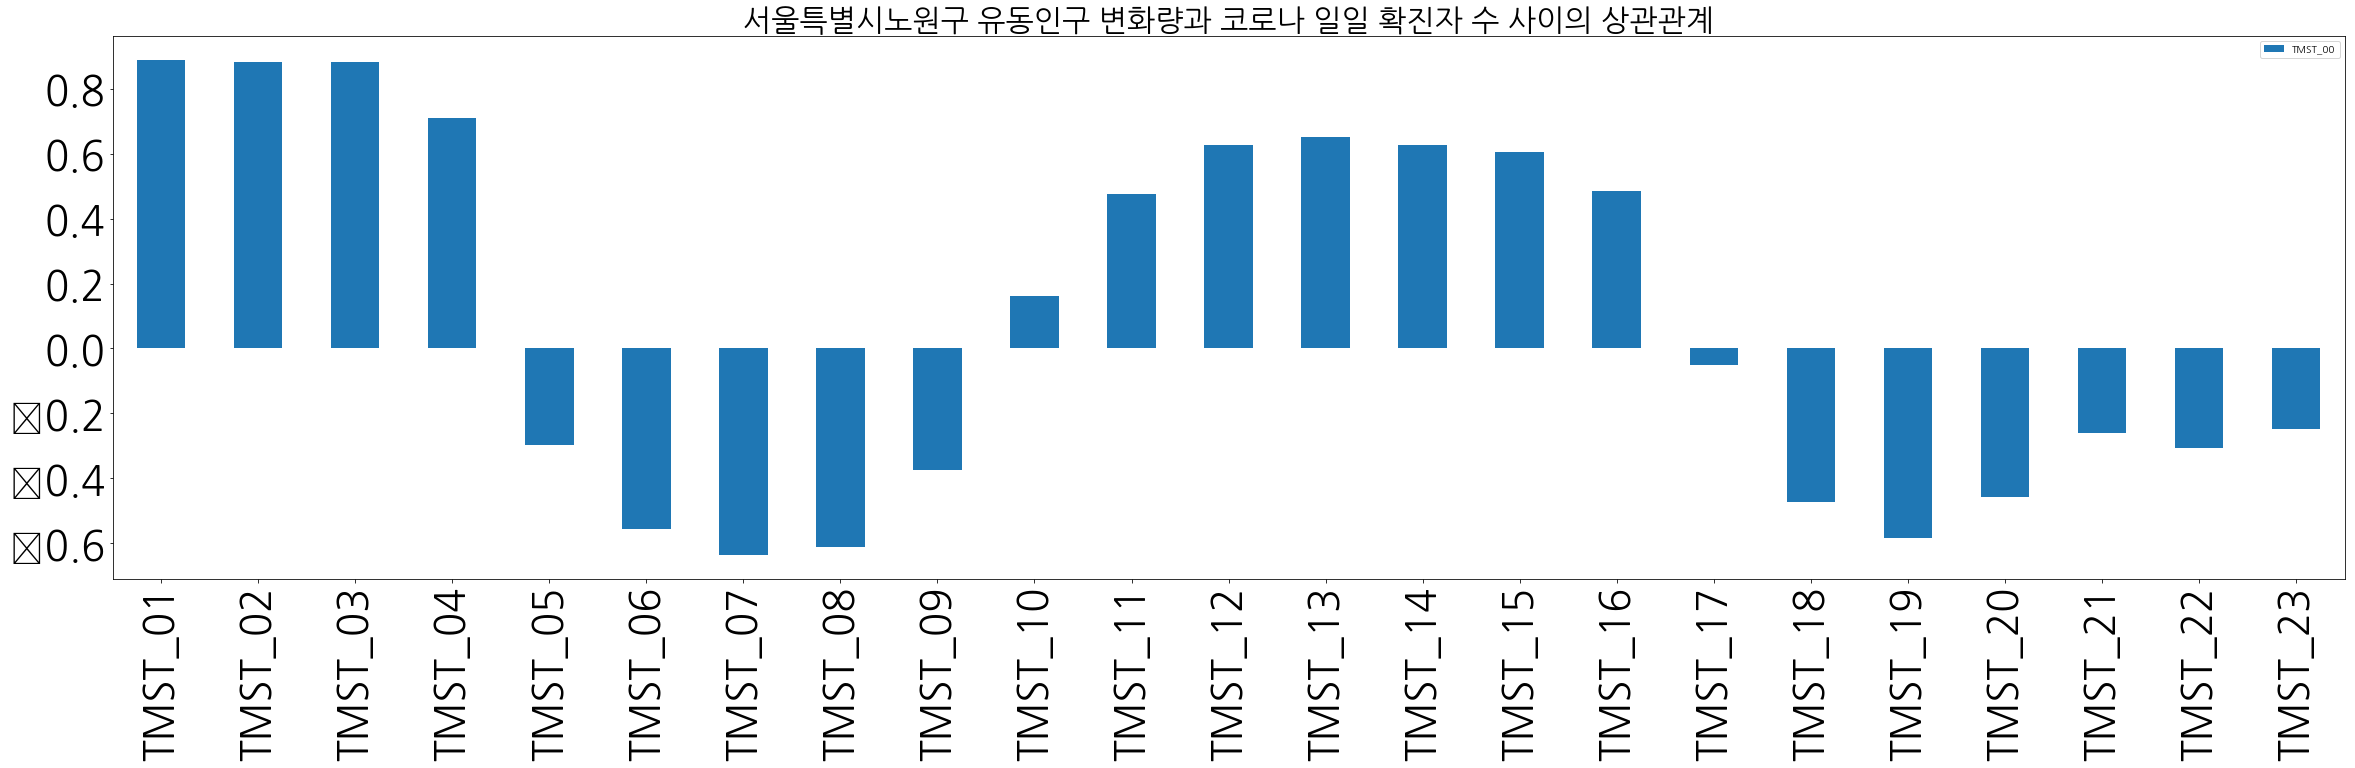

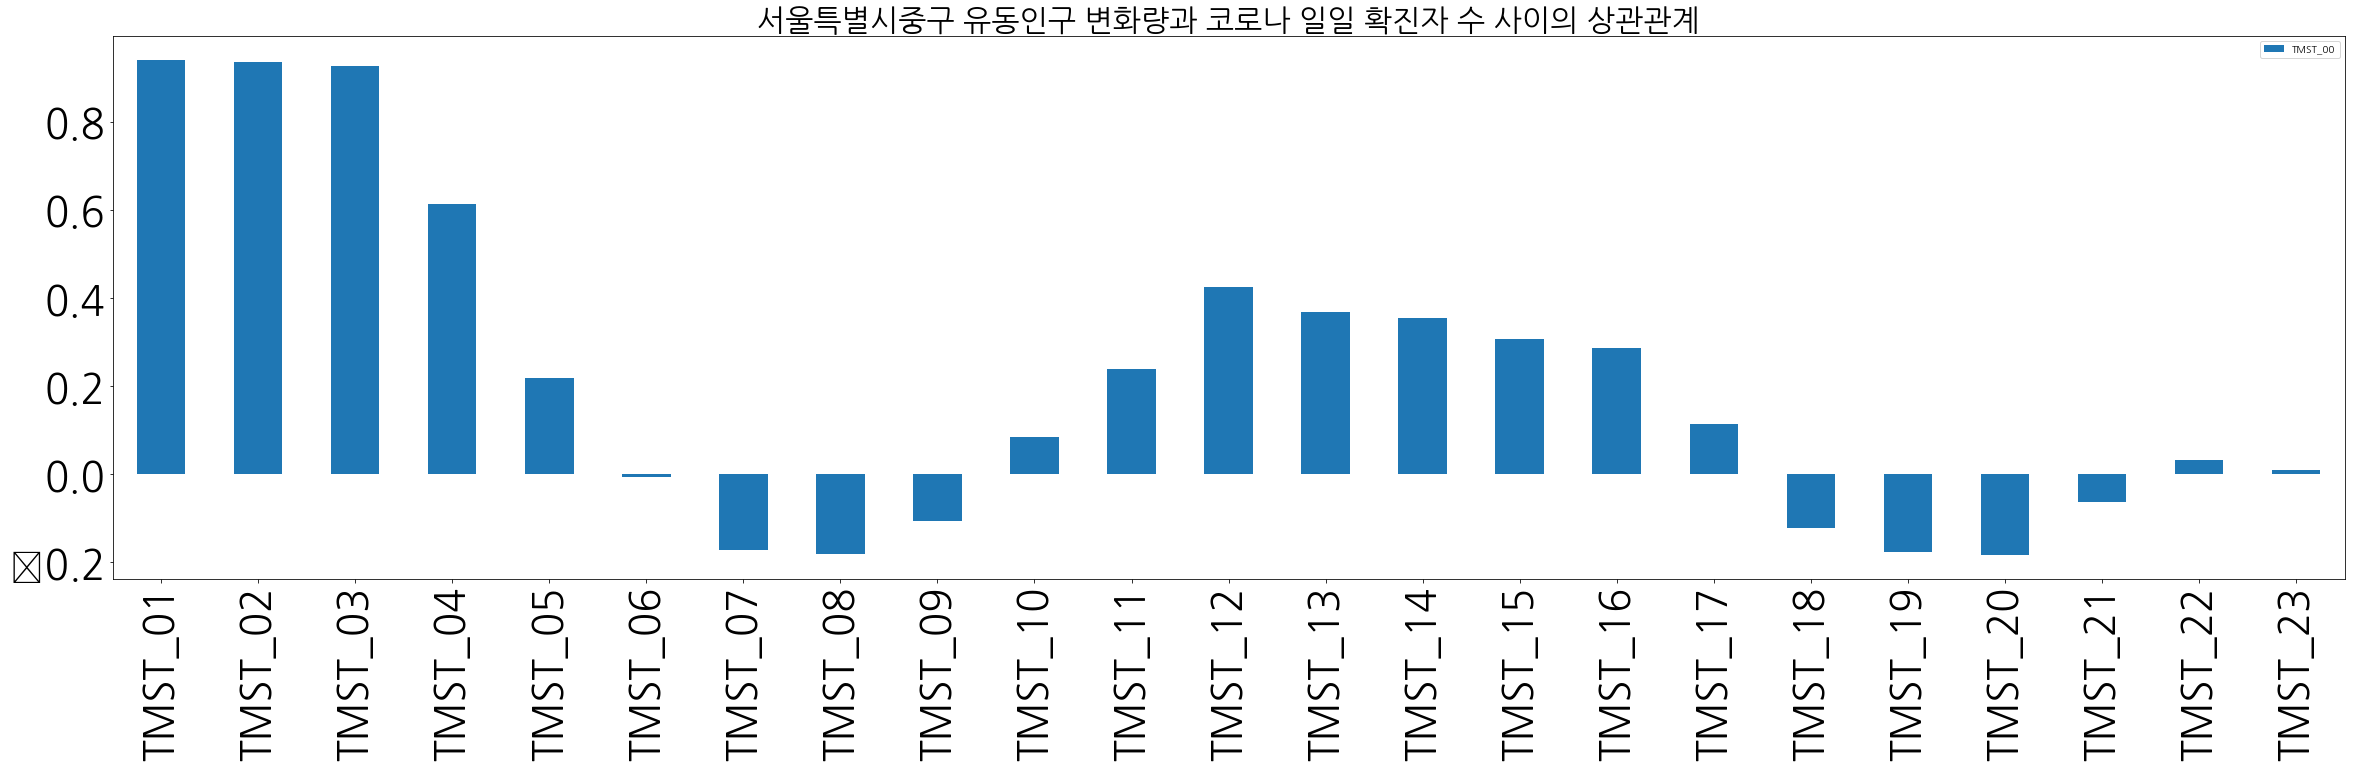

In [188]:
for dist in list(sk_data_TIME_GU.GU_NAME.unique()):
    data = sk_data_TIME_GU[sk_data_TIME_GU.GU_NAME == dist]

    data = data.iloc[:, 3:]
    
    data_dif = data - data.shift(1)
    data_dif = data_dif.fillna(0)
    
    if dist[:2] == '서울':
        concat_data = pd.concat([covid_SEOUL_dif, data], axis = 1)
        plt.rcParams["figure.figsize"] = (40,10)
        pd.DataFrame(data_dif.corr().iloc[0, 1:]).plot(kind = 'bar')
        plt.title(f'{dist} 유동인구 변화량과 코로나 일일 확진자 수 사이의 상관관계', fontsize = 30)
        plt.yticks(fontsize = 40)
        plt.xticks(fontsize = 40)
        plt.legend(fontsize = 10)
        
    else:
        concat_data = pd.concat([covid_DAEGU_dif, data], axis = 1)
        plt.rcParams["figure.figsize"] = (40,10)
        pd.DataFrame(data_dif.corr().iloc[0, 1:]).plot(kind = 'bar')
        plt.title(f'{dist} 유동인구 변화량과 코로나 일일 확진자 수 사이의 상관관계', fontsize = 30)
        plt.yticks(fontsize = 40)
        plt.xticks(fontsize = 40)
        plt.legend(fontsize = 10)

# 3. Covid19와의 연관성 (동단위)

In [190]:
sk_data_TIME_DONG = sk_data_TIME.copy()
sk_data_AGE_DONG = sk_data_AGE.copy()

sk_data_TIME_DONG = sk_data_TIME_DONG[sk_data_TIME_DONG.STD_YM >= 202000]
sk_data_AGE_DONG = sk_data_AGE_DONG[sk_data_AGE_DONG.STD_YM >= 202000]

In [191]:
sk_data_TIME_DONG = sk_data_TIME_DONG.groupby([sk_data_TIME_DONG.HDONG_NM, sk_data_TIME_DONG.STD_YMD]).sum()

In [192]:
# GU_NAME을 다시 컬럼으로 보냄
sk_data_TIME_DONG.reset_index(level = ['HDONG_NM'], inplace = True)

In [193]:
sk_data_TIME_DONG

HDONG_NM  STD_YM    HDONG_CD  TMST_00  TMST_01  TMST_02  TMST_03  \
STD_YMD                                                                     
20200201     고산1동  202002  2726067000  2436.67  2464.22  1850.57  1459.93   
20200202     고산1동  202002  2726067000  2885.37  2200.67  1753.35  1414.36   
20200203     고산1동  202002  2726067000  2158.53  1750.27  1251.55  1089.30   
20200204     고산1동  202002  2726067000  2507.90  1960.80  1459.86  1294.27   
20200205     고산1동  202002  2726067000  2454.94  1911.56  1413.04  1053.30   
...           ...     ...         ...      ...      ...      ...      ...   
20200527      회현동  202005  1114054000  1519.12   978.88   681.36   603.22   
20200528      회현동  202005  1114054000  1639.68  1026.27   704.00   631.44   
20200529      회현동  202005  1114054000  1667.38  1130.76   763.94   716.24   
20200530      회현동  202005  1114054000  2153.64  1243.60   966.87   703.25   
20200531      회현동  202005  1114054000  1469.23   796.91   543.23   403.22   

          TMST_04  TMST_05  TMST_06  ...   TMST_14   TMST_15   TMST_16  \
STD_YMD                              ...                                 
20200201  1233.43  1440.21  2220.11  ...   8345.96   8226.55   8681.83   
20200202  1070.51  1218.53  1753.34  ...   7511.81   7473.71   7697.56   
20200203   943.07  1277.02  2605.31  ...   7448.36   7605.76   7813.65   
20200204  1010.89  1326.32  2490.62  ...   7352.28   7634.28   8029.58   
20200205  1092.06  1347.55  2461.75  ...   6991.49   7316.15   7797.93   
...           ...      ...      ...  ...       ...       ...       ...   
20200527   800.33  2425.21  6214.12  ...  13784.99  14299.84  13661.56   
20200528   812.88  2549.09  6474.17  ...  13883.57  13748.23  13163.26   
20200529   853.38  2389.79  5944.50  ...  14158.99  13883.80  14307.78   
20200530   814.91  1904.88  4165.44  ...  13657.85  13125.92  12923.00   
20200531   449.63  1011.62  1797.11  ...   7696.23   7875.56   7529.01   

           TMST_17   TMST_18   TMST_19  TMST_20  TMST_21  TMST_22  TMST_23  
STD_YMD                                                                     
20200201   8932.43   9406.29   7977.51  6534.62  6013.44  5010.45  4019.01  
20200202   8441.34   7964.53   7135.87  5746.94  5135.84  4147.89  3256.56  
20200203   8938.51  10293.96   8541.90  6549.11  5872.75  5114.57  3690.11  
20200204   8995.49  10452.73   8916.47  6800.74  5972.83  5204.92  3820.40  
20200205   8731.72  10620.99   8829.10  6696.88  5988.85  5353.55  3793.58  
...            ...       ...       ...      ...      ...      ...      ...  
20200527  14720.74  17088.55  10571.90  6720.26  6780.38  5883.45  3827.09  
20200528  13948.39  15102.00  10512.06  6619.13  6352.28  5888.92  3733.90  
20200529  14134.84  17554.97  11504.28  7867.55  6964.54  6228.13  4586.71  
20200530  10904.93   8201.76   6006.31  5926.69  5413.07  4613.31  3038.26  
20200531   7151.62   6205.06   5385.62  5035.85  4681.29  3713.34  2212.68  

[8349 rows x 27 columns]

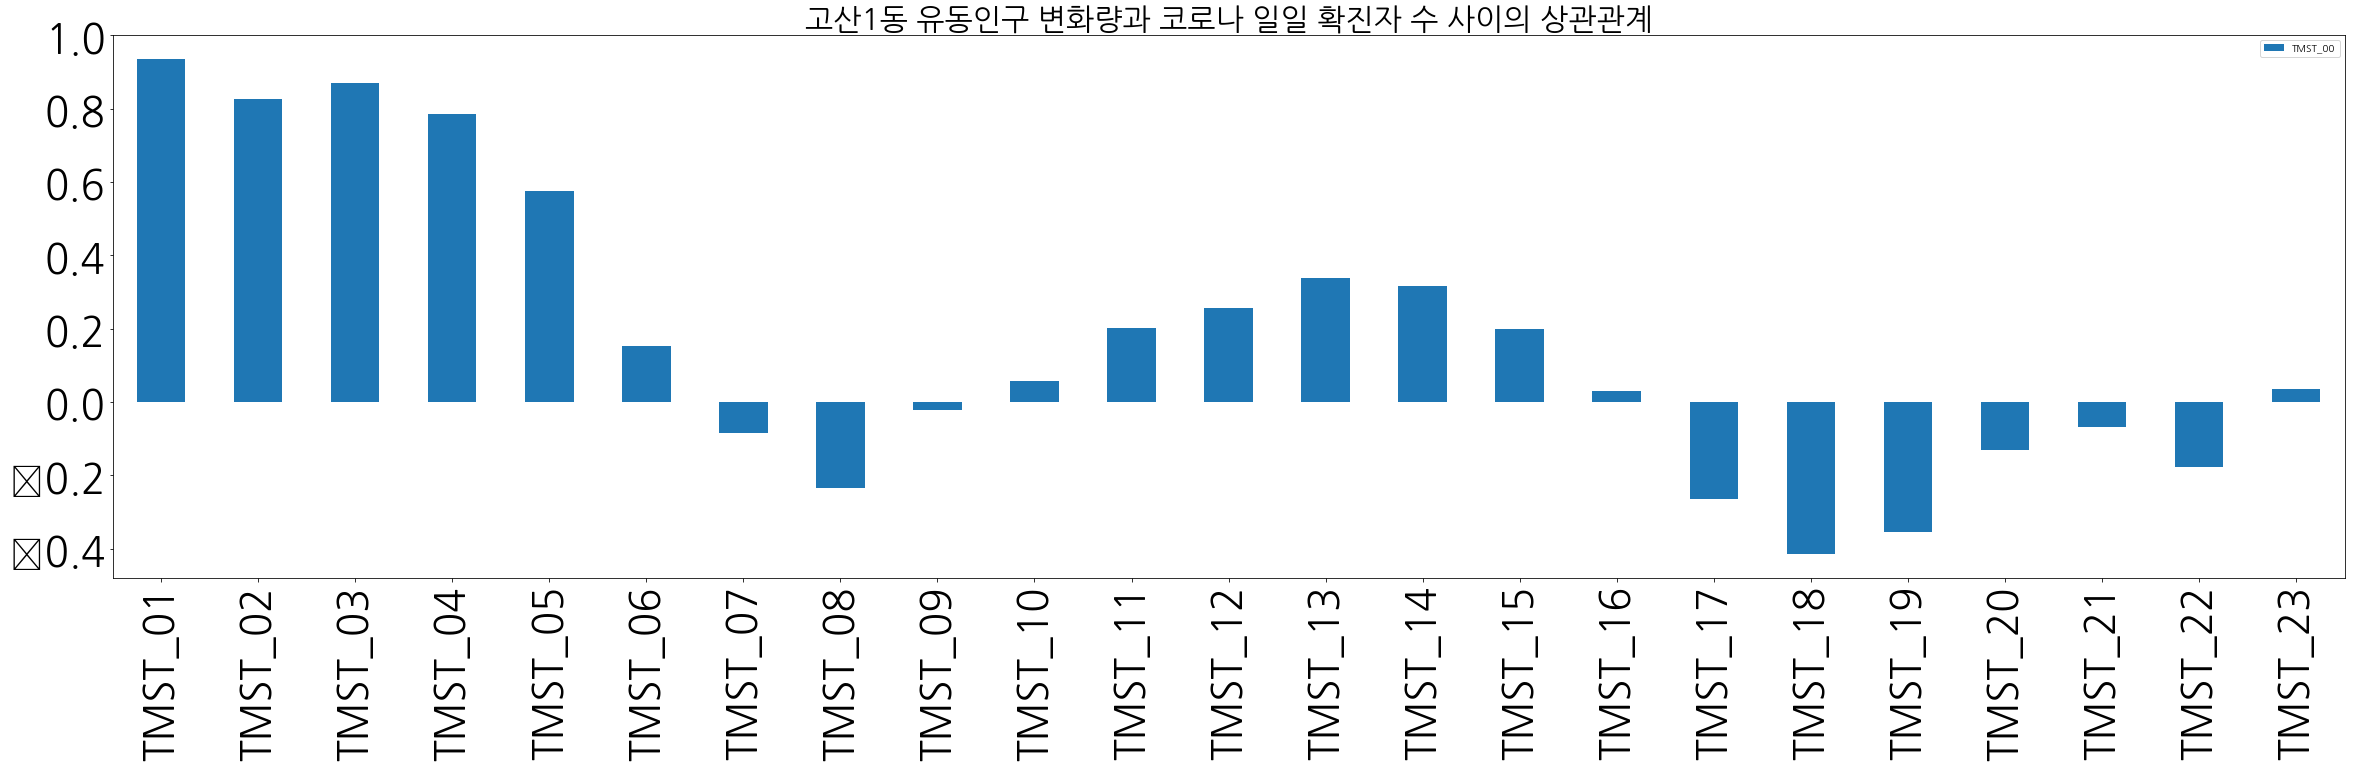

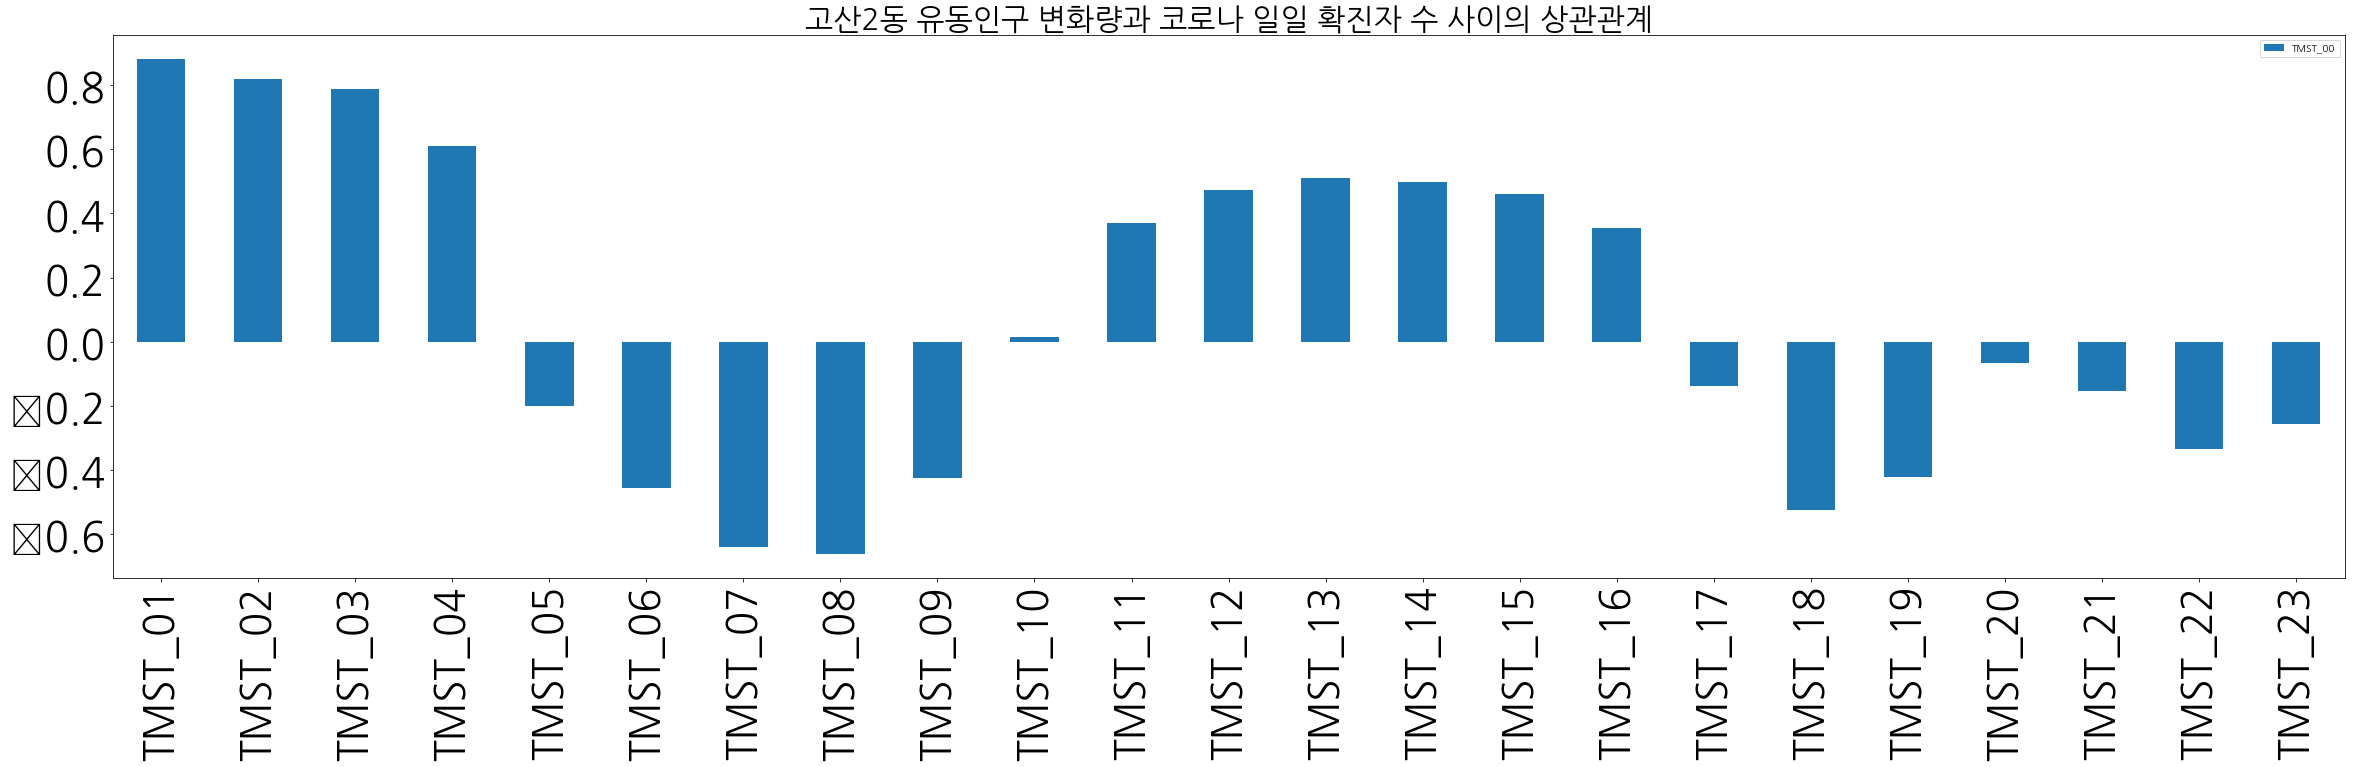

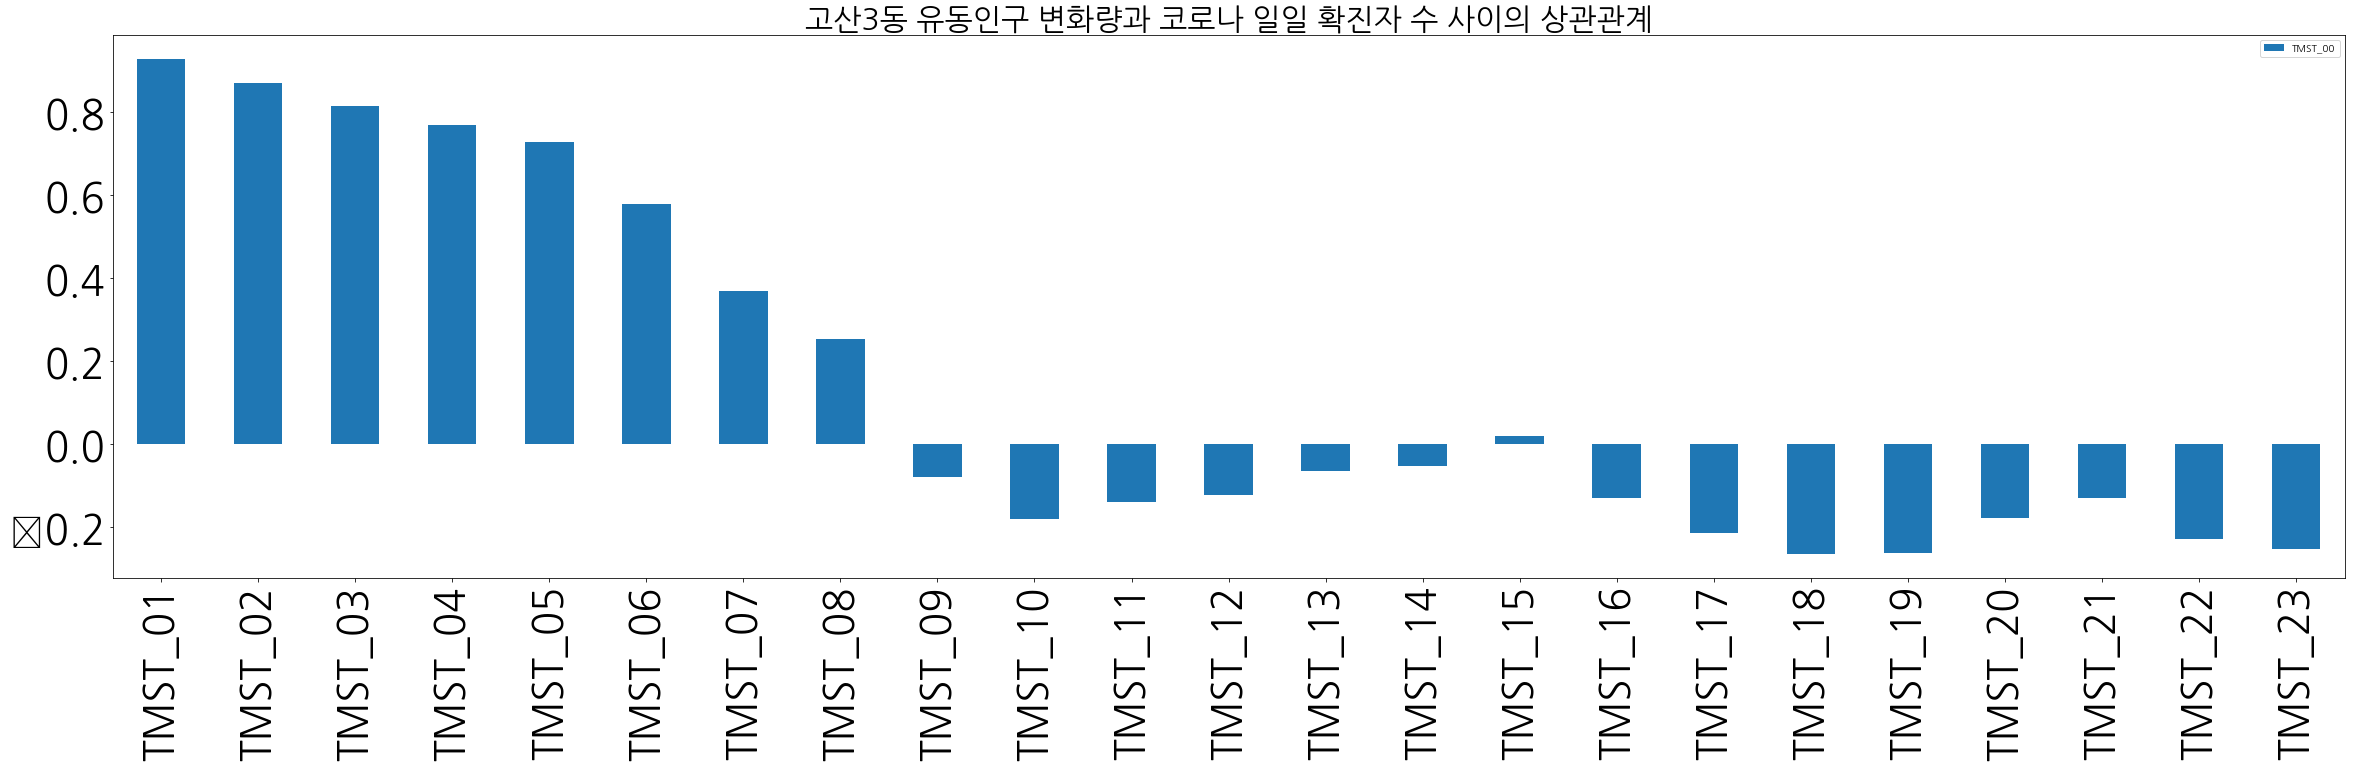

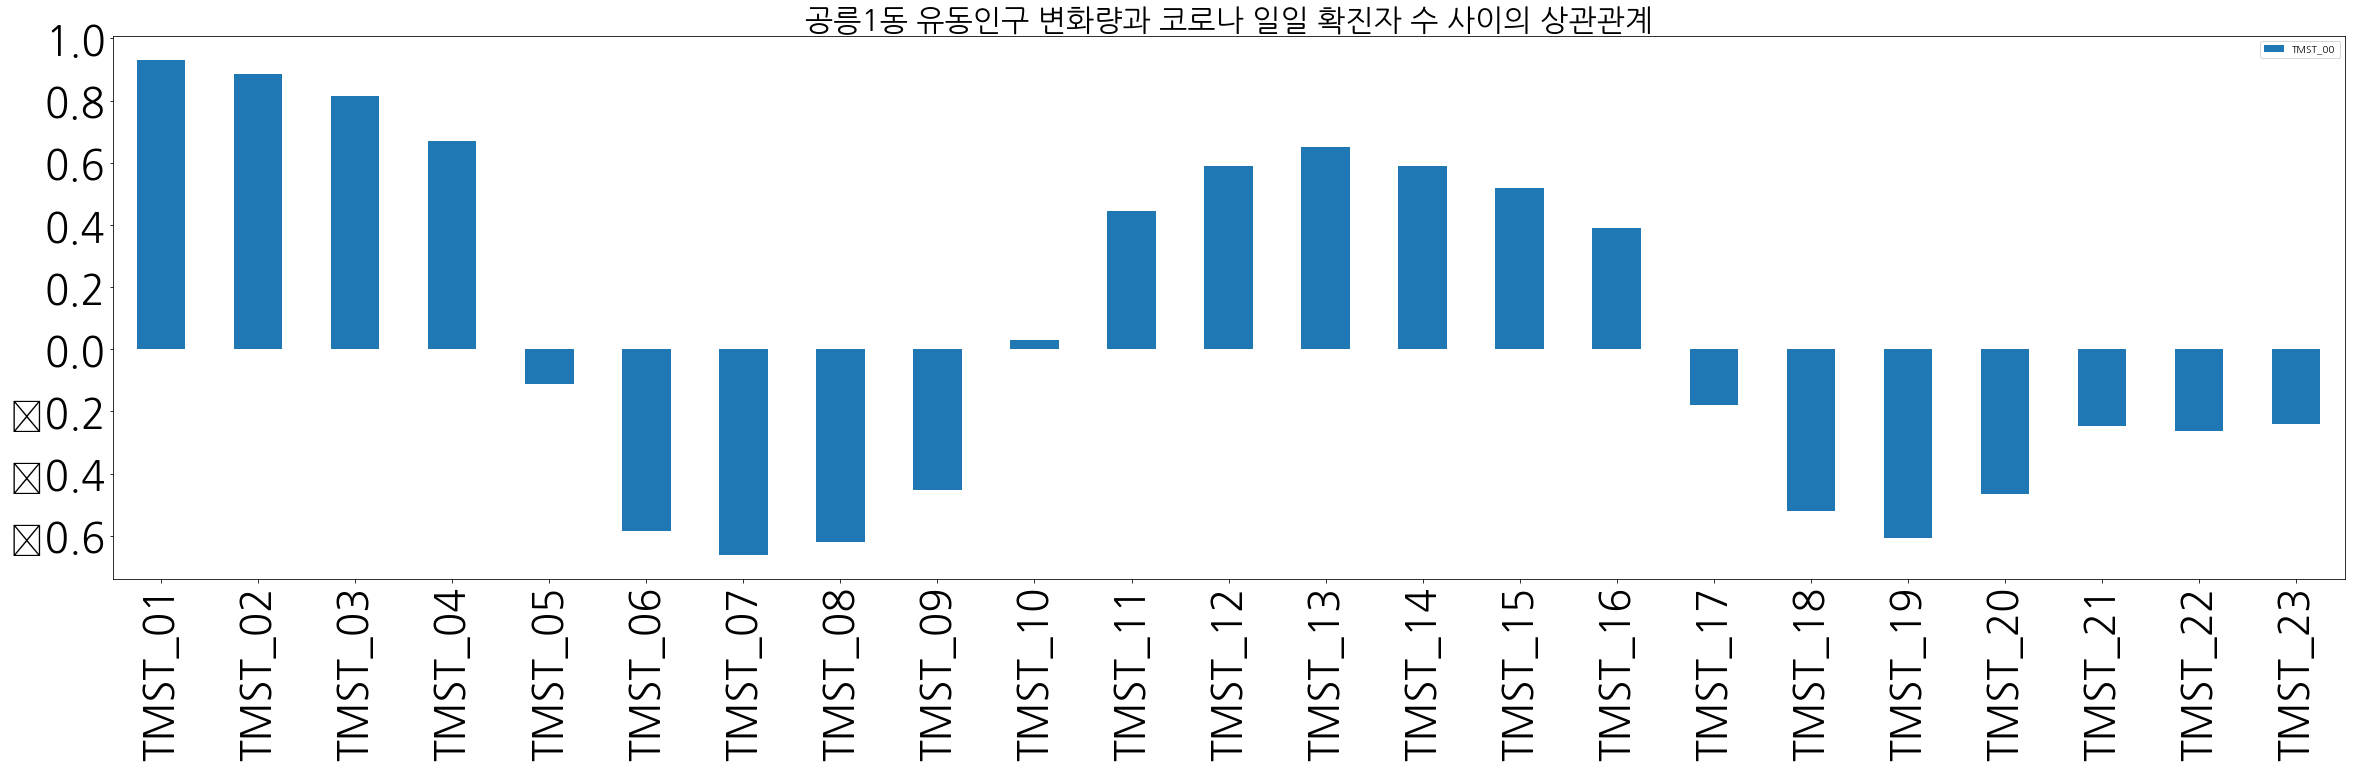

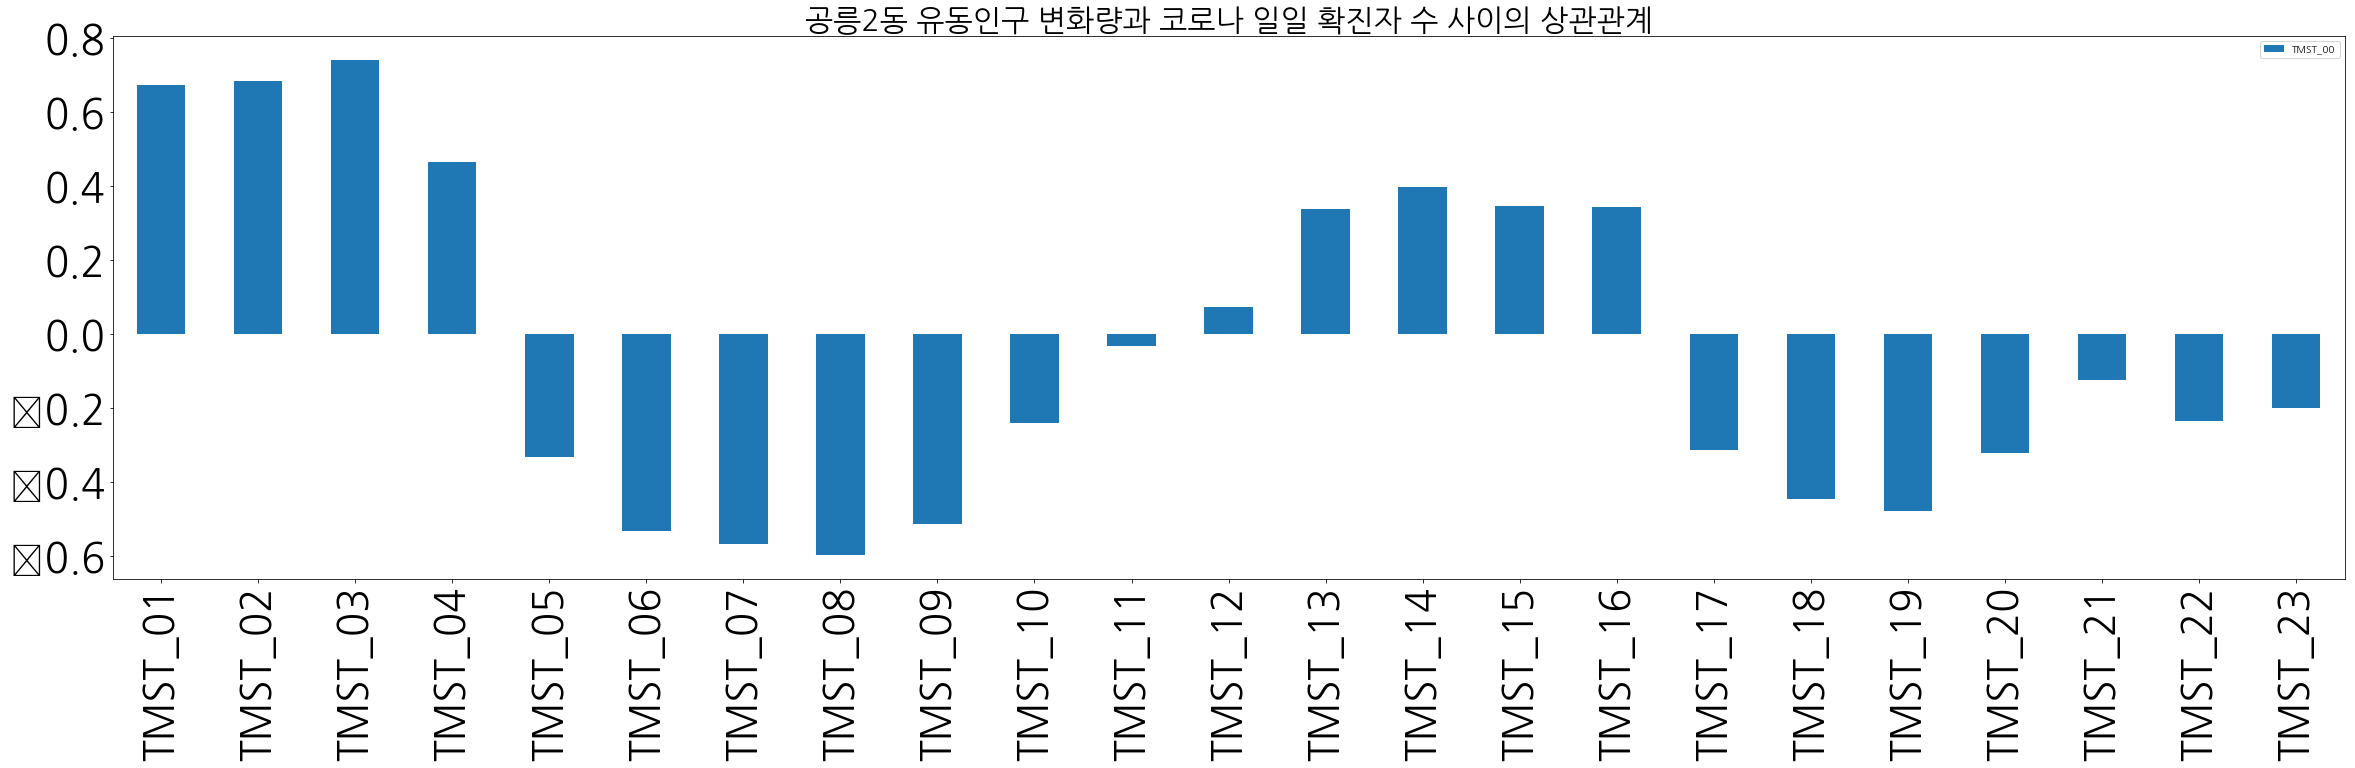

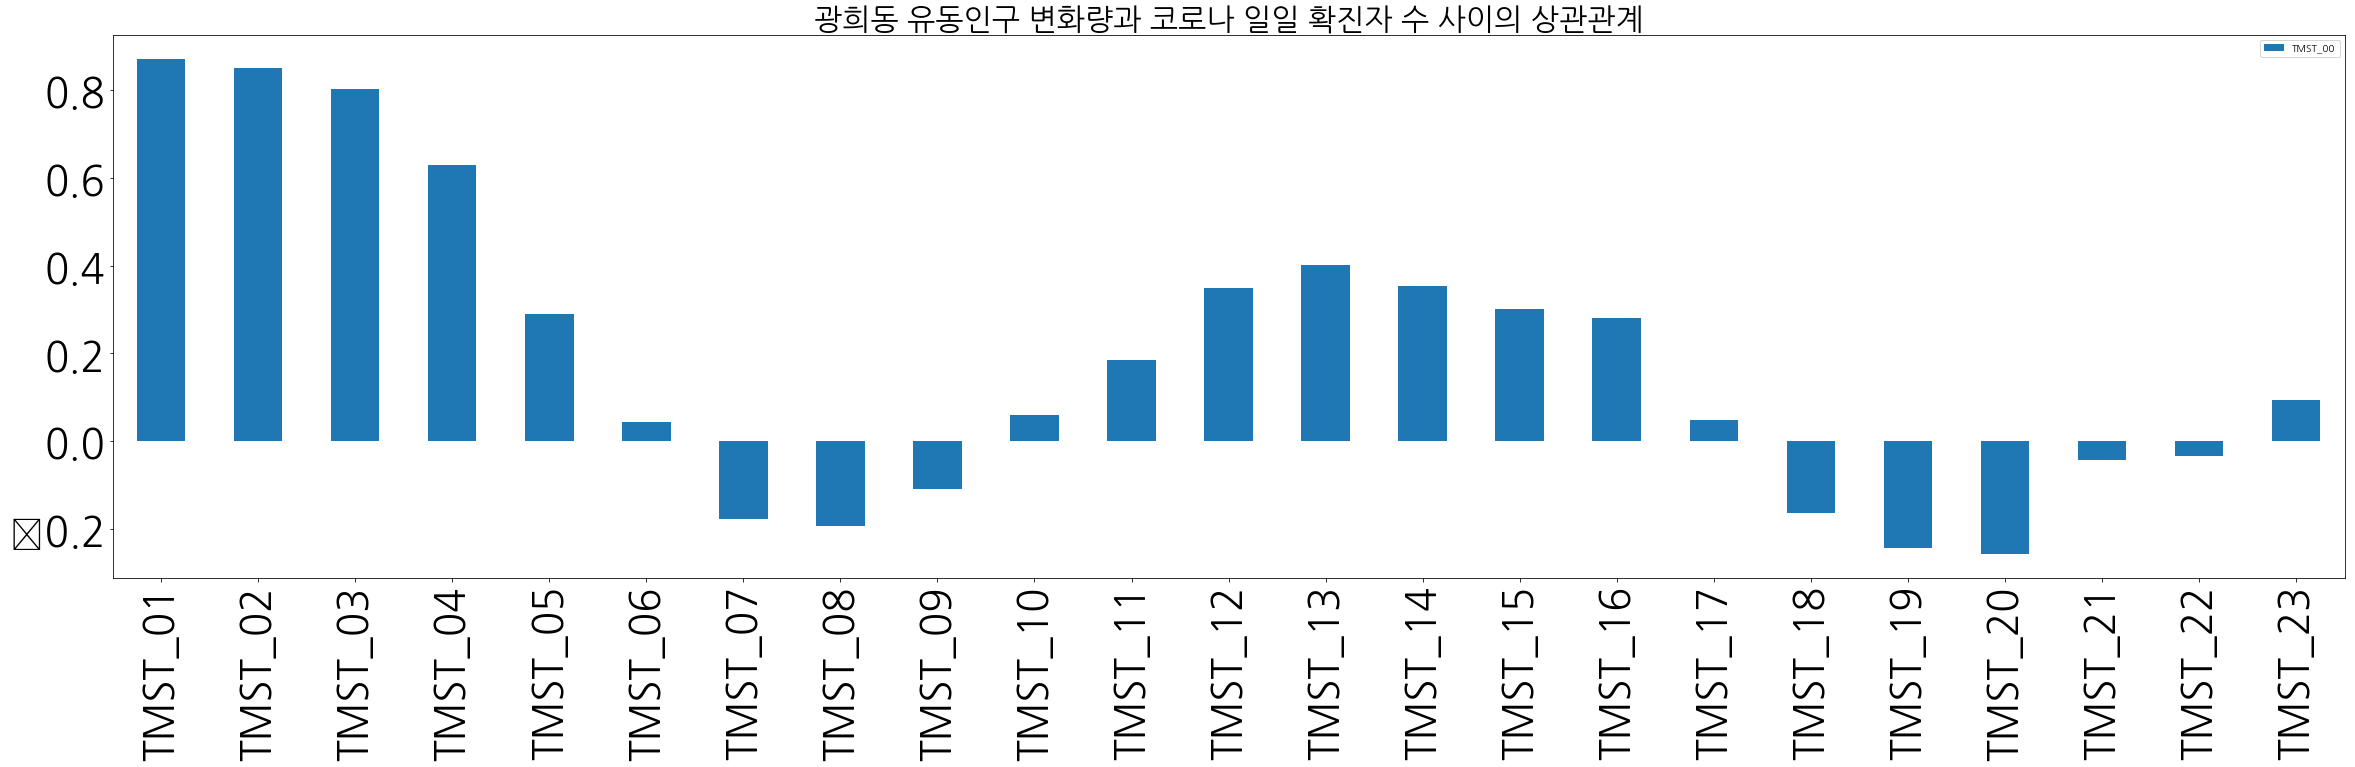

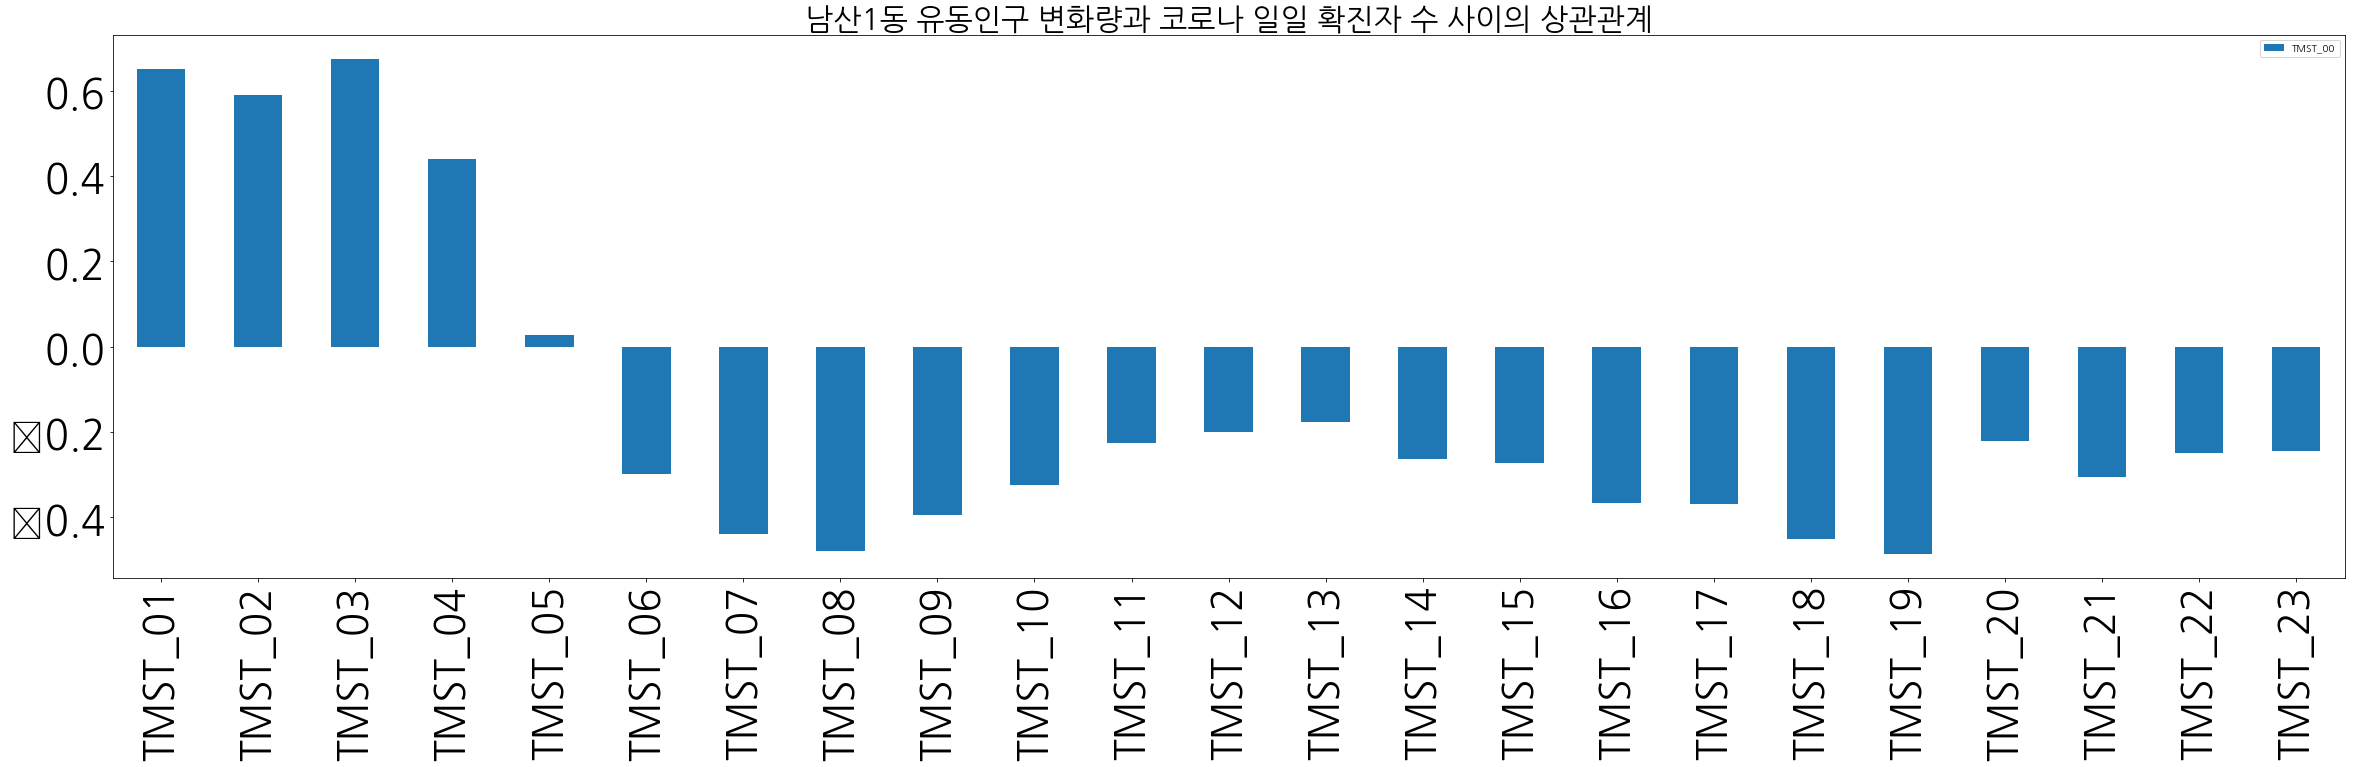

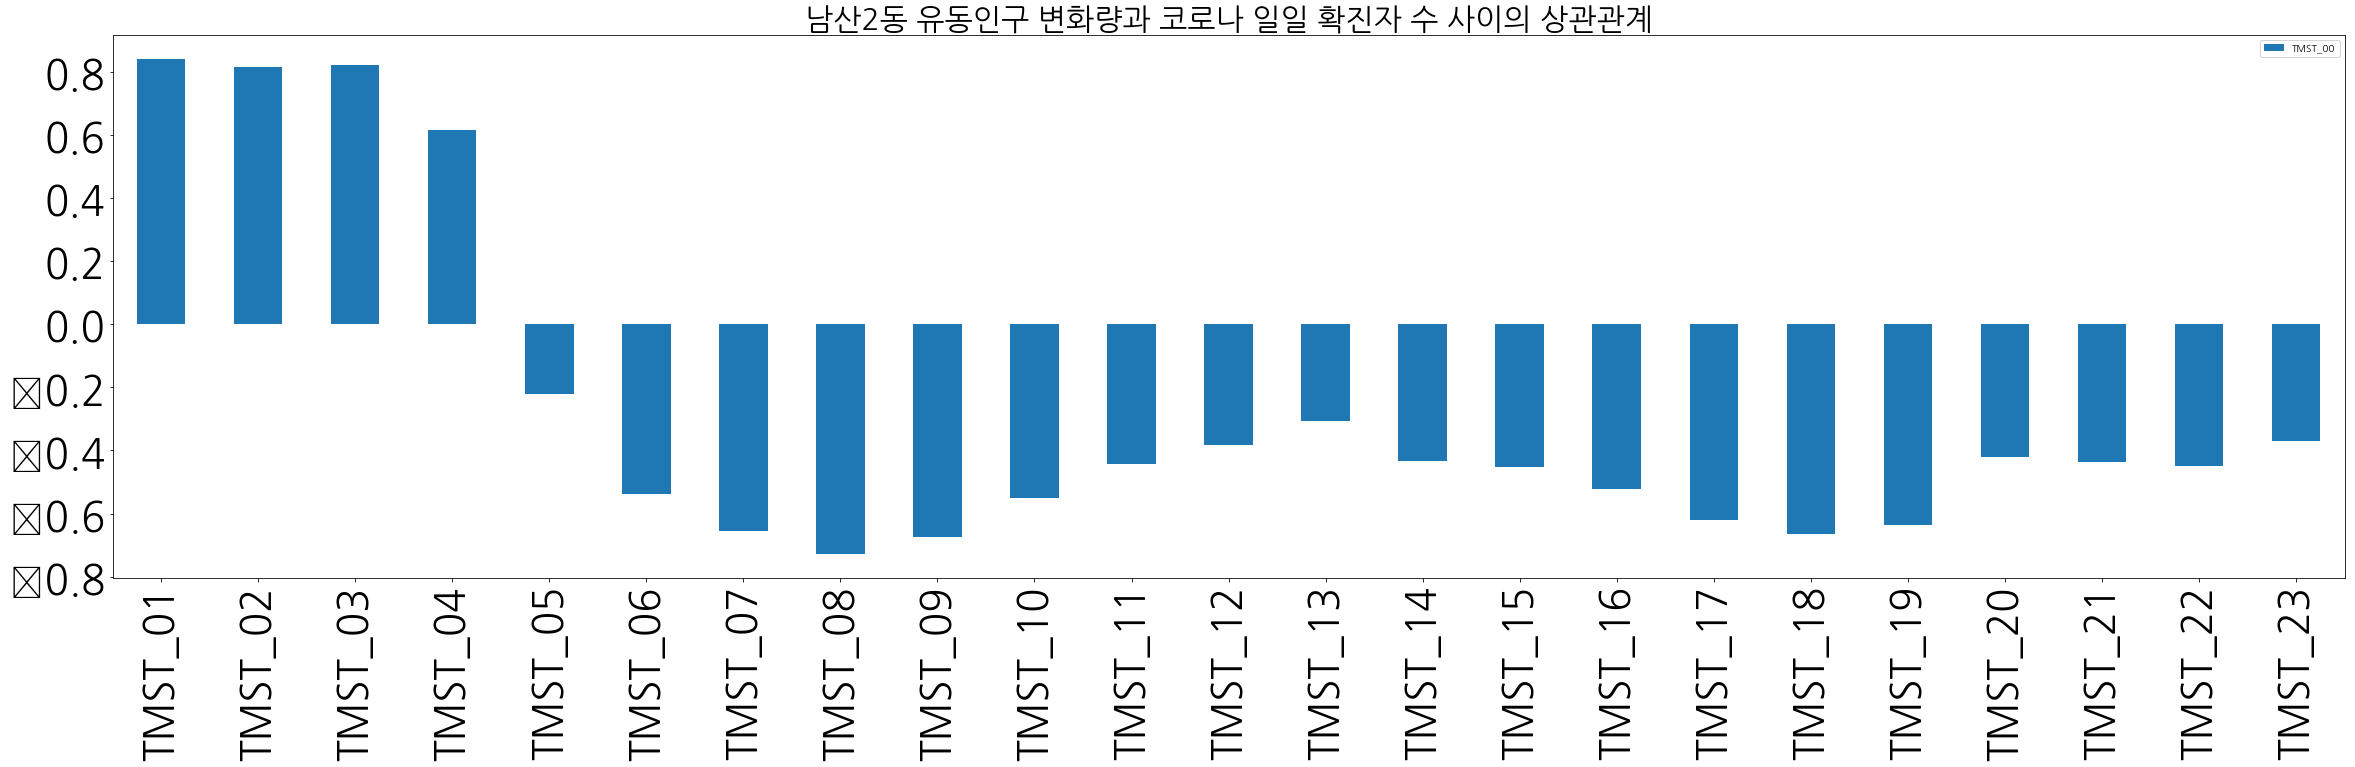

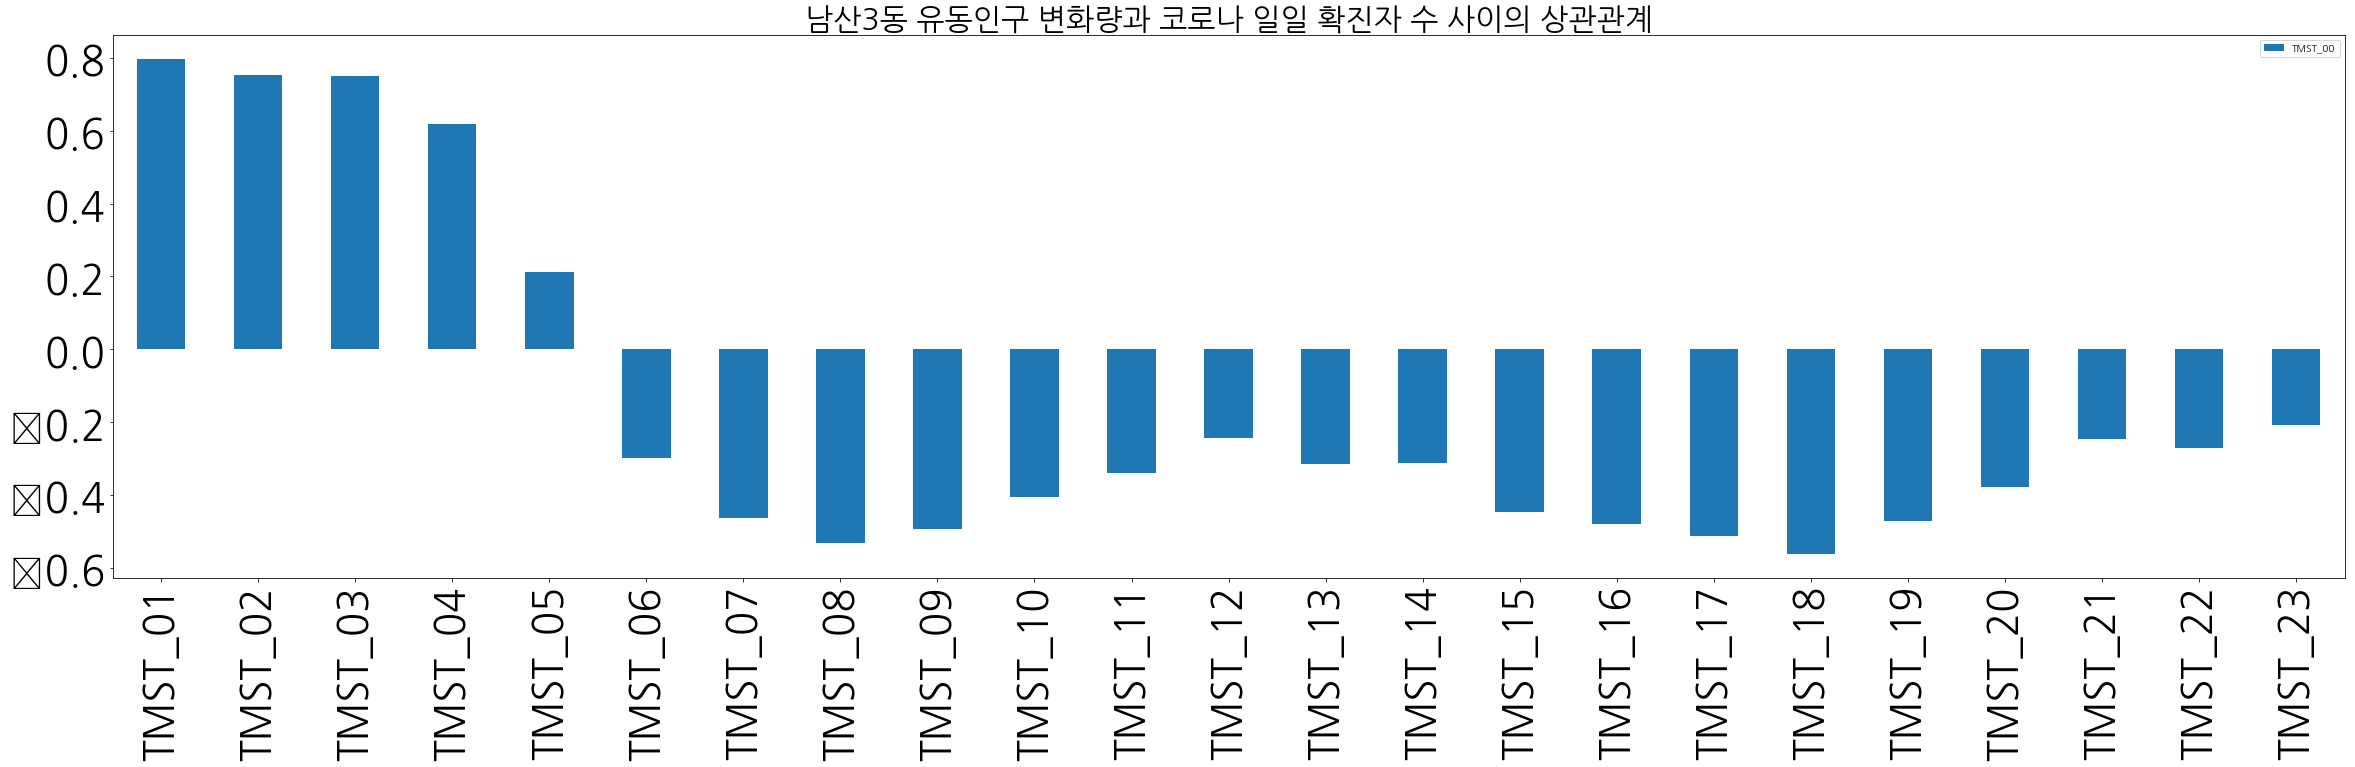

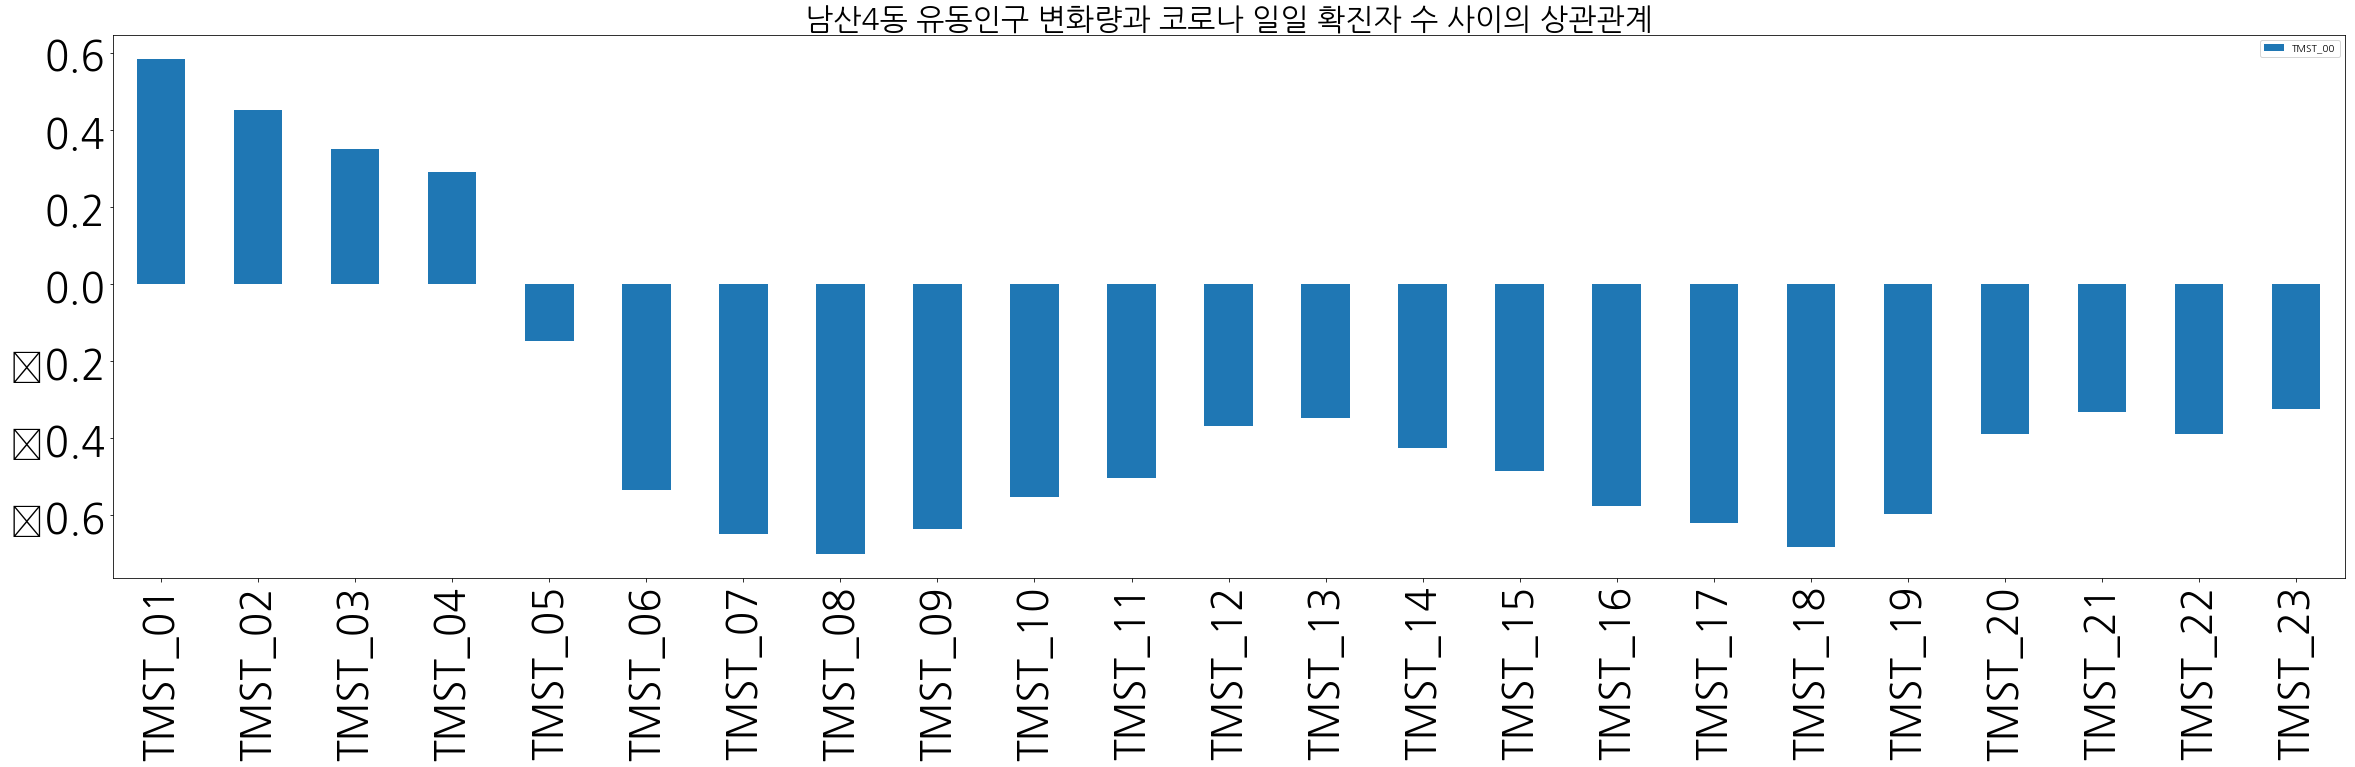

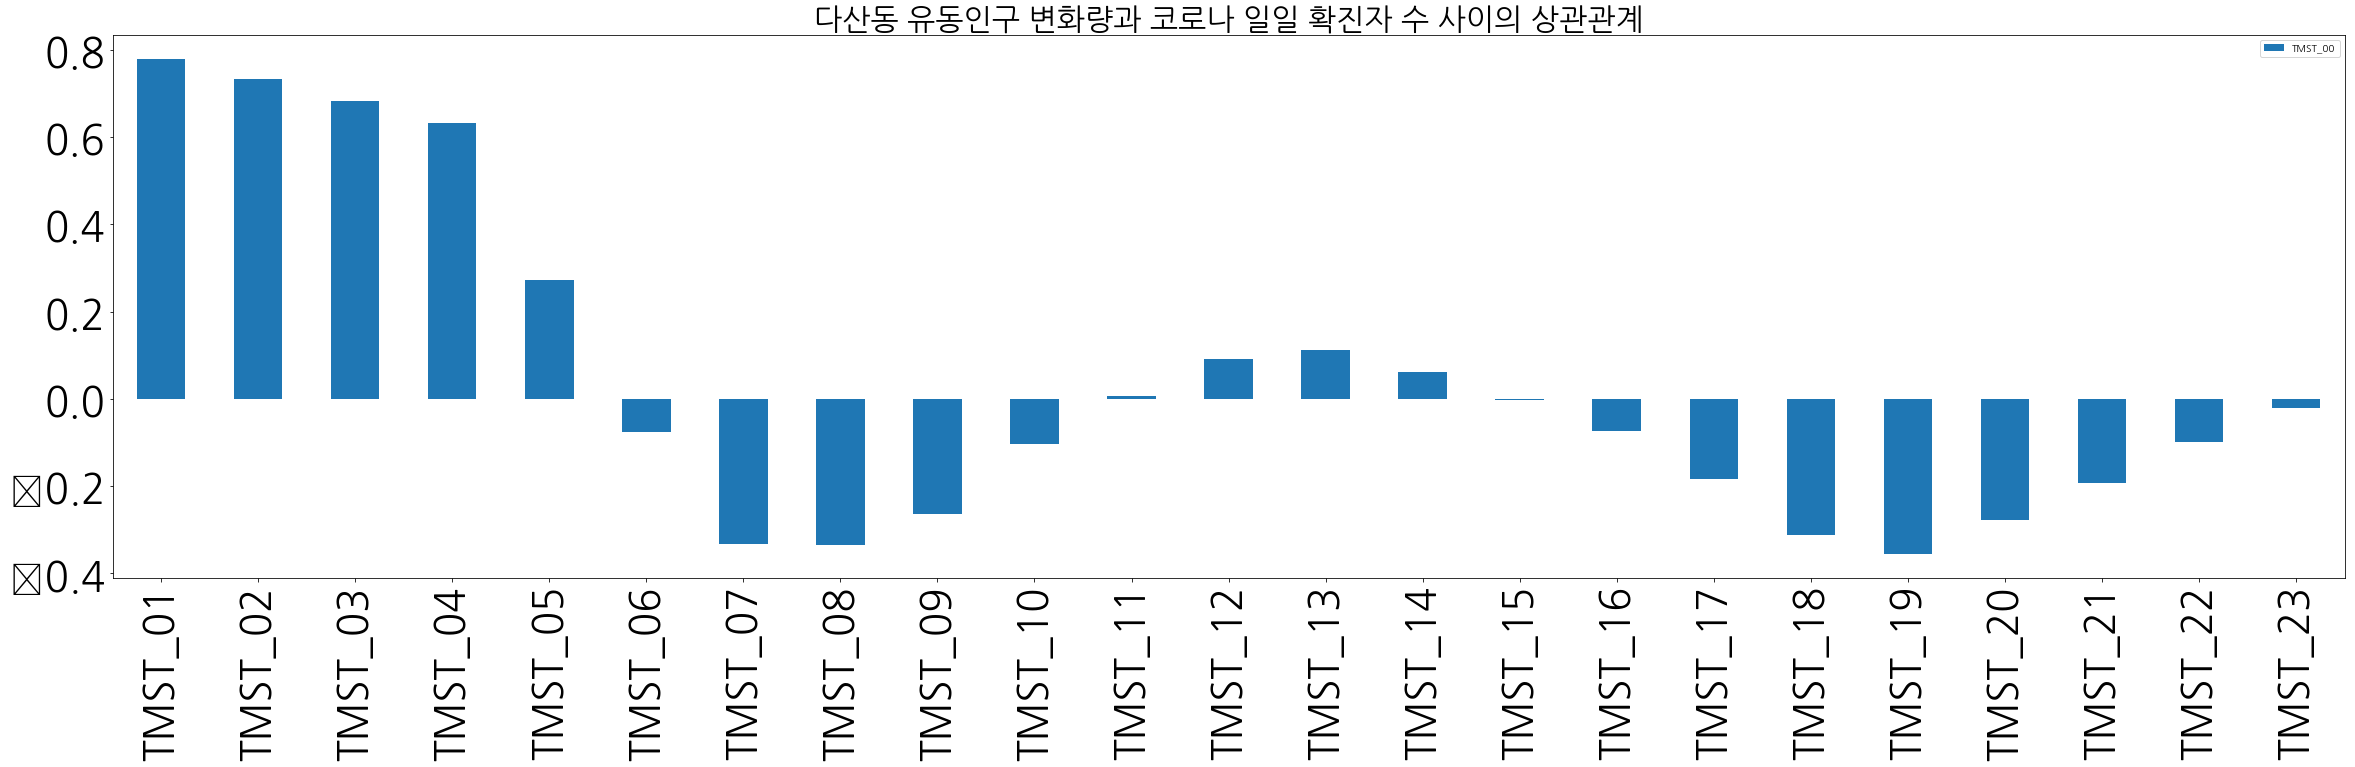

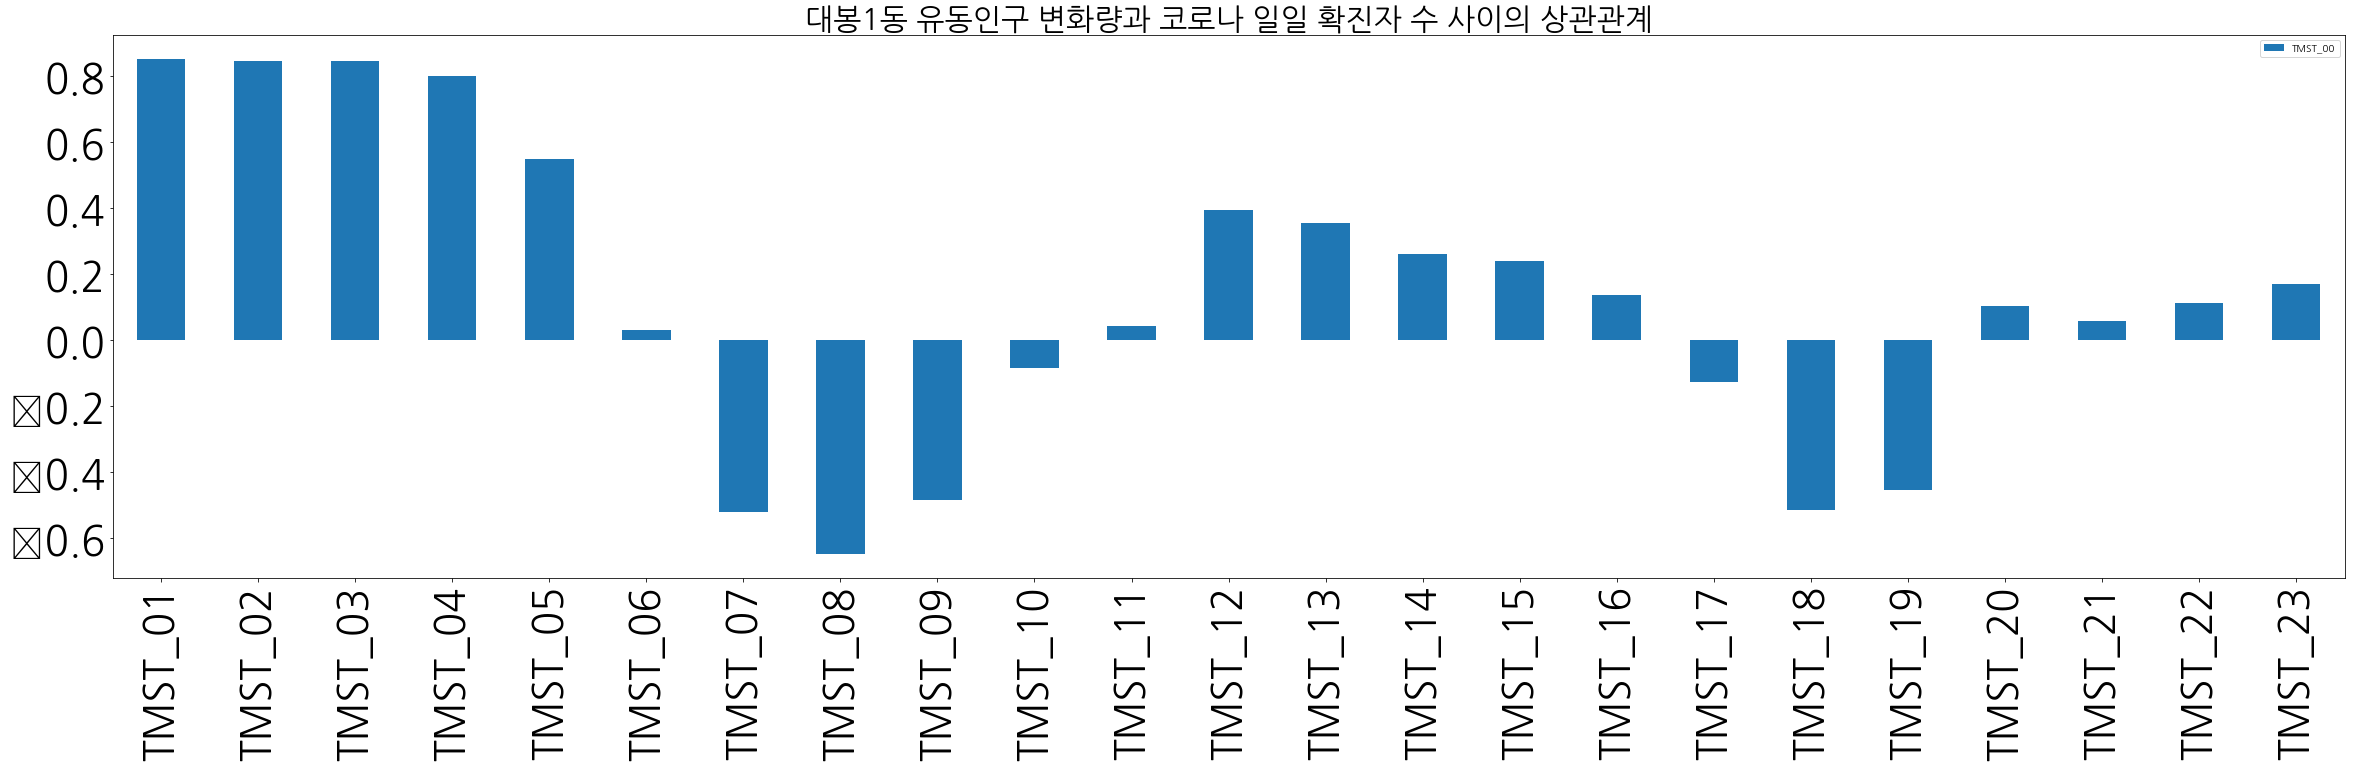

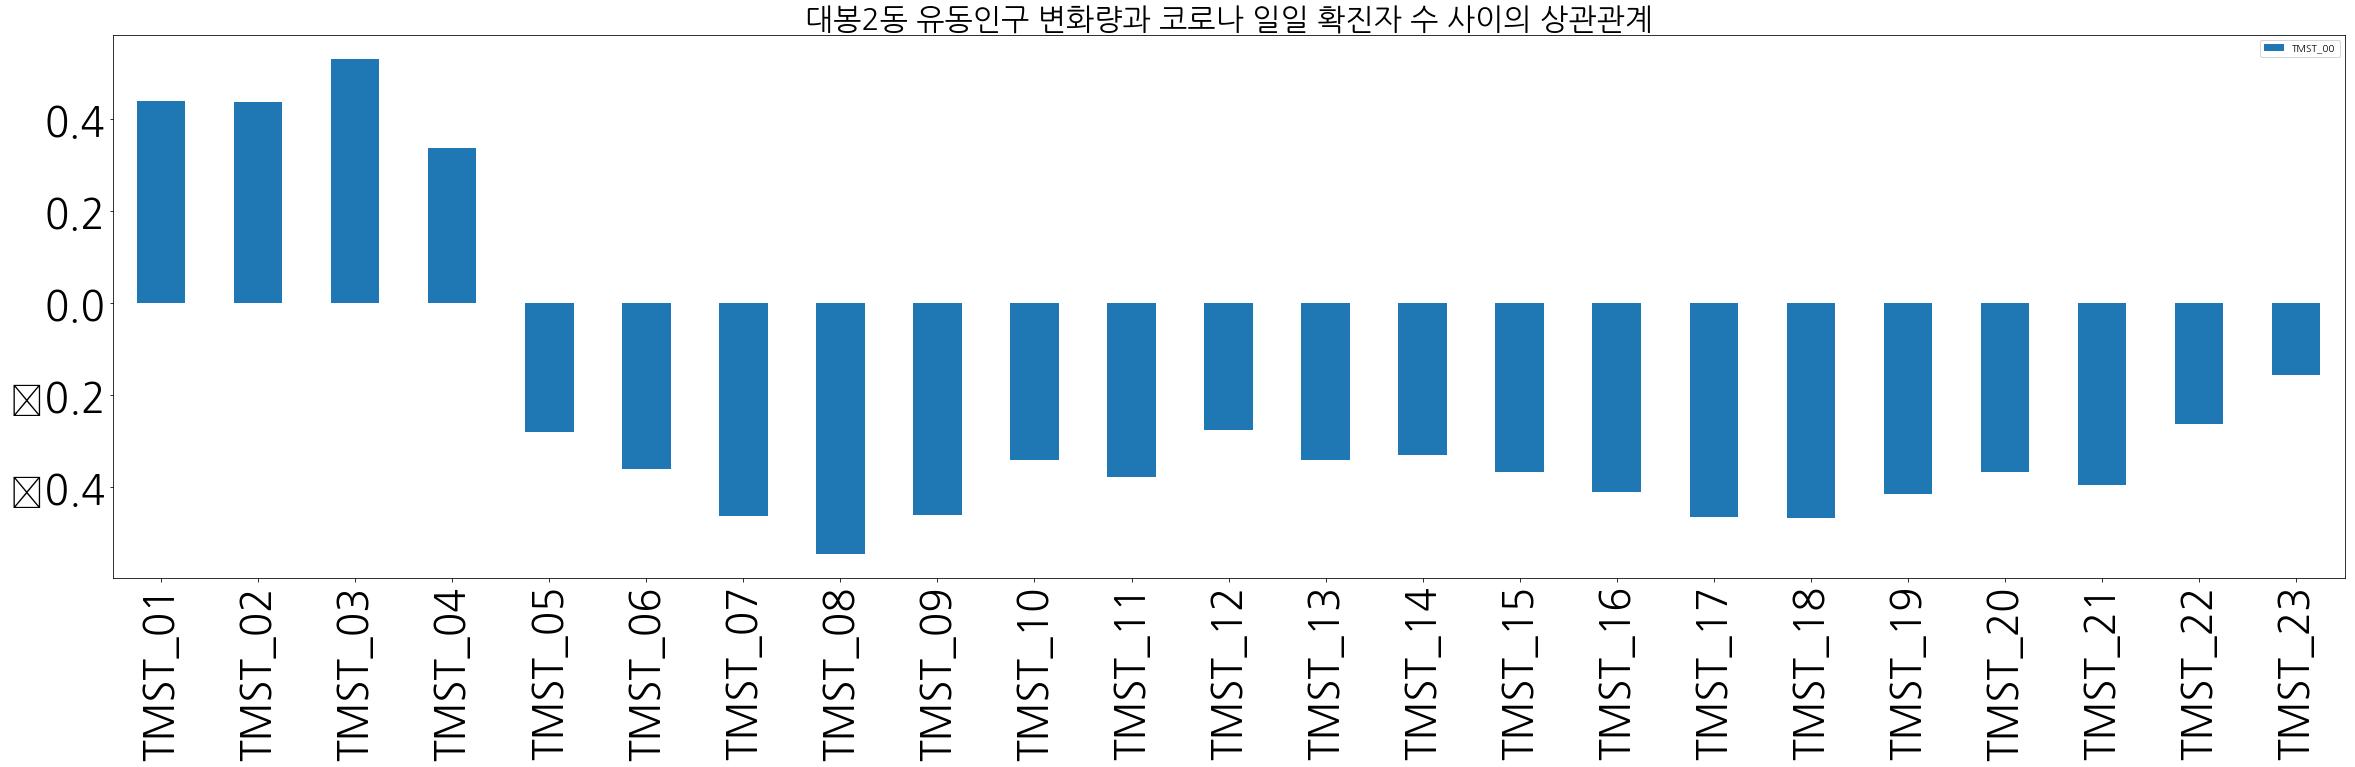

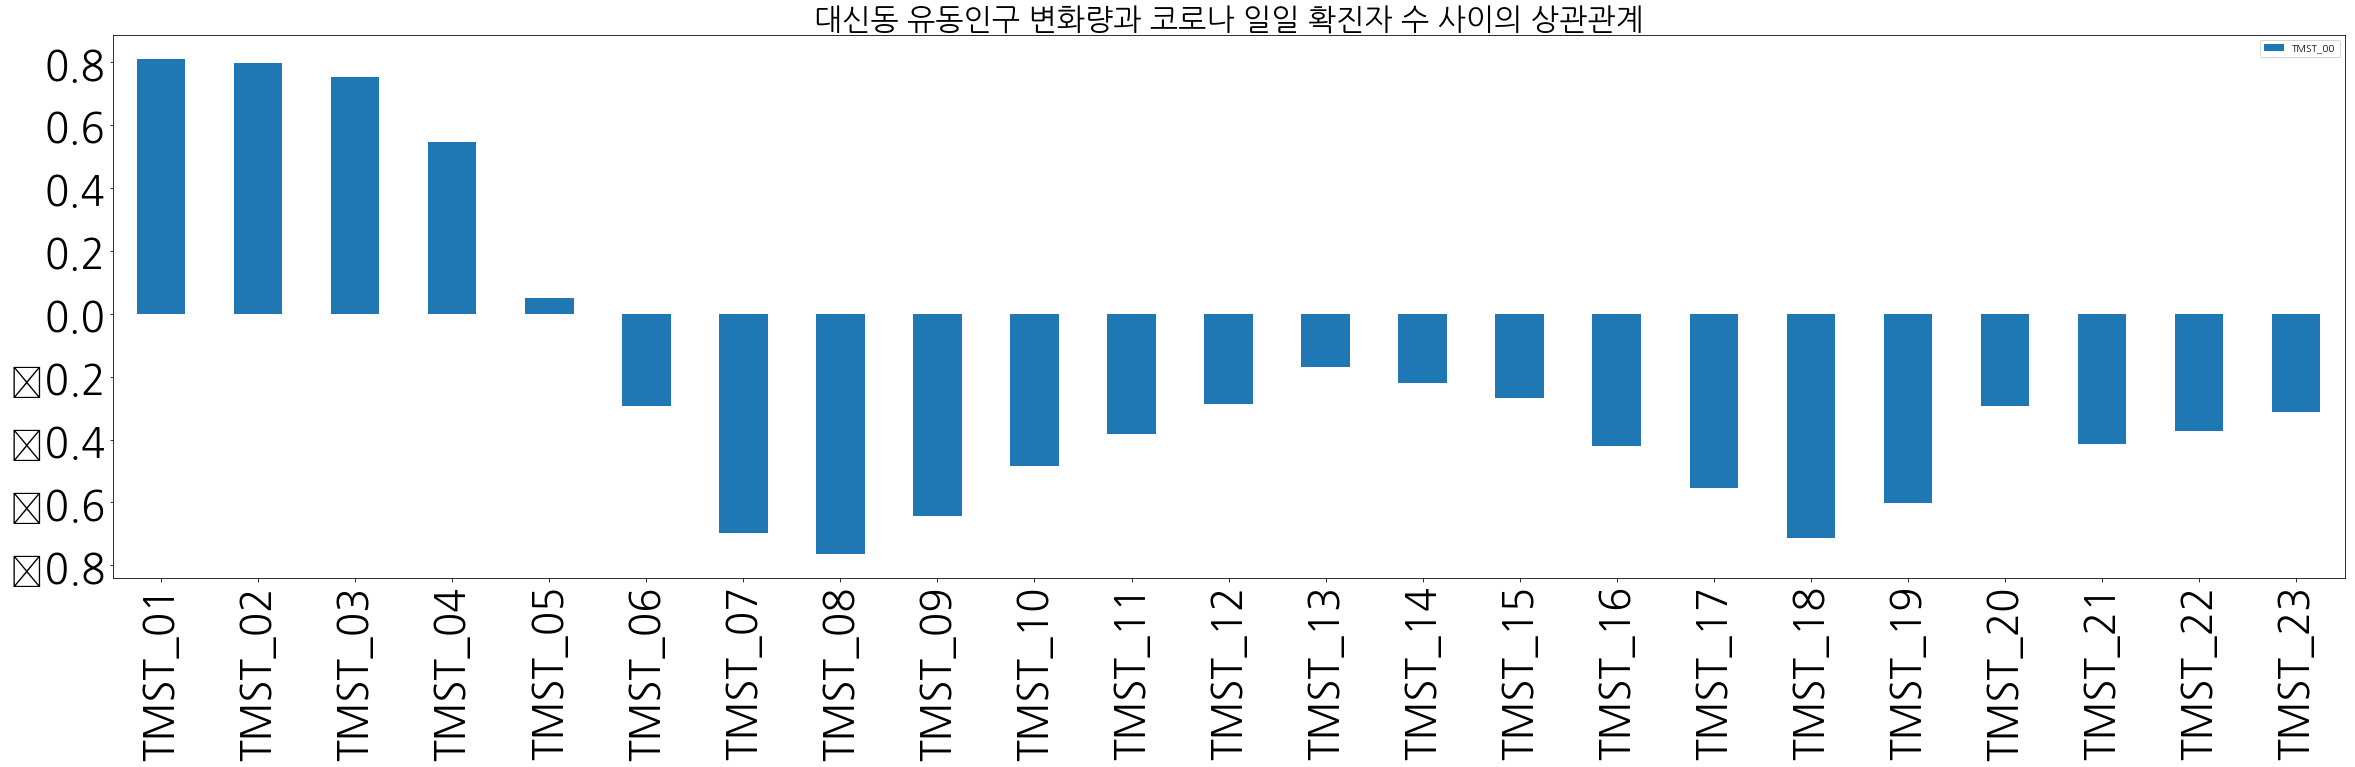

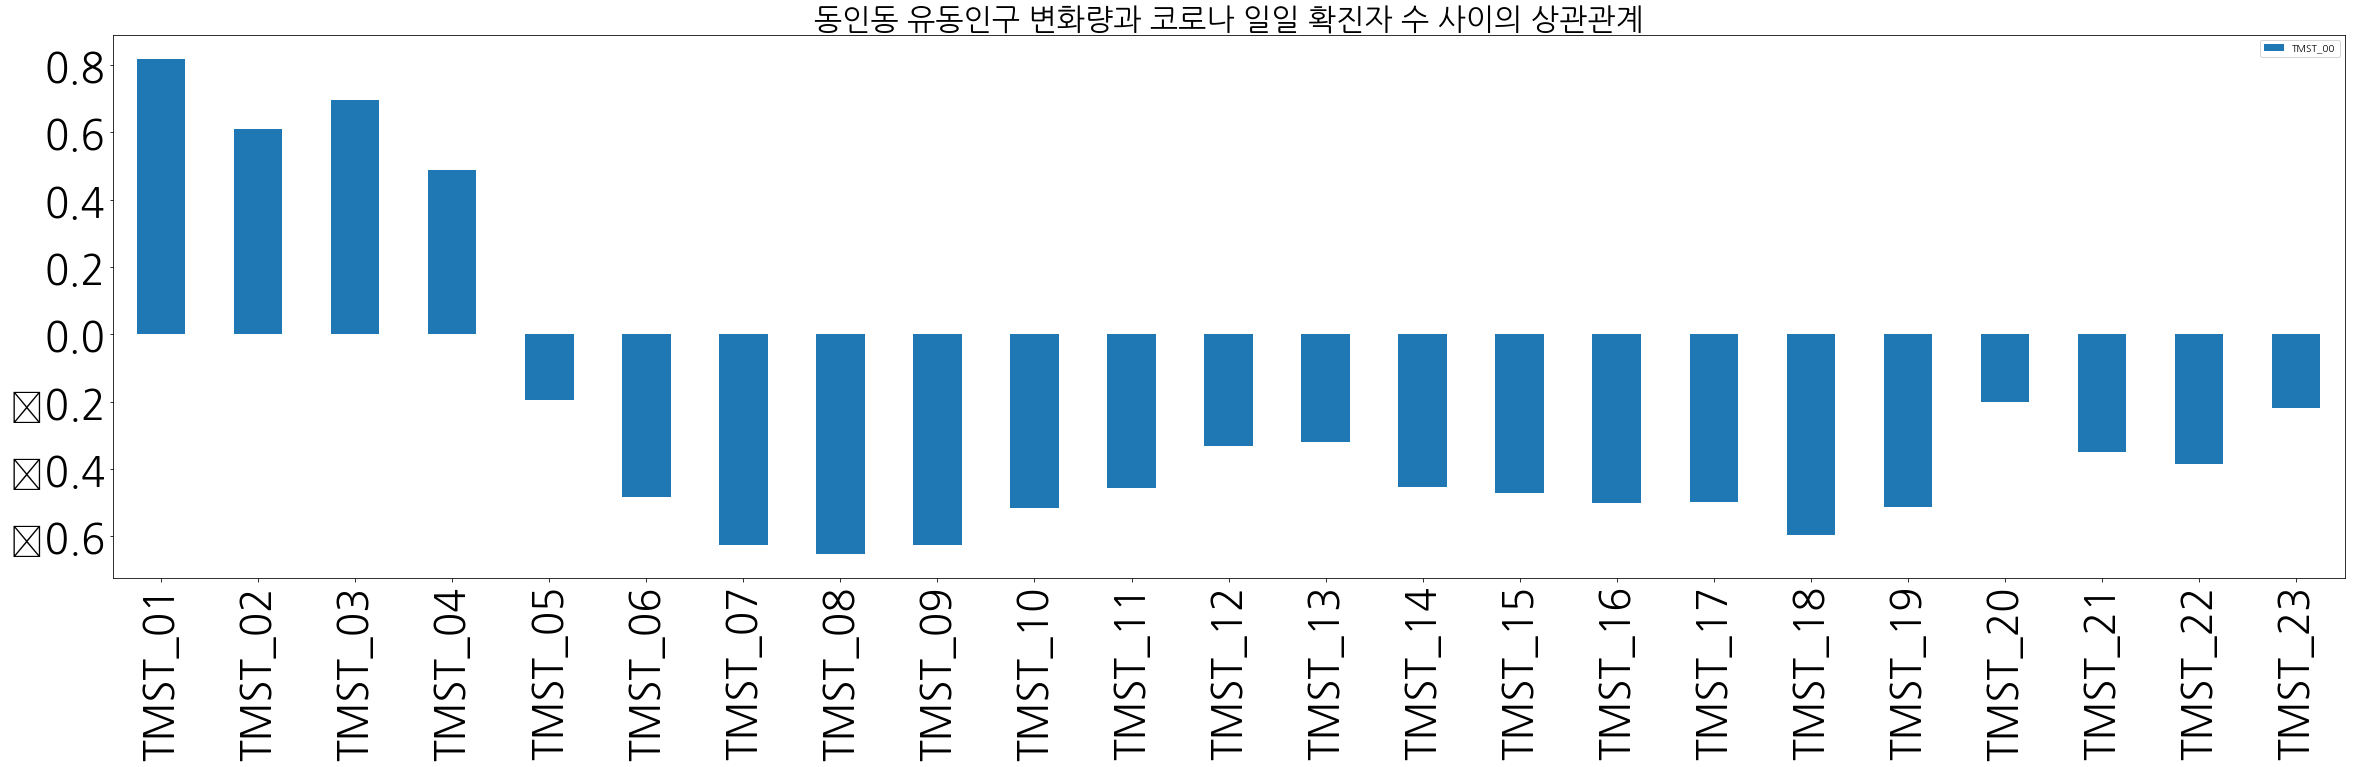

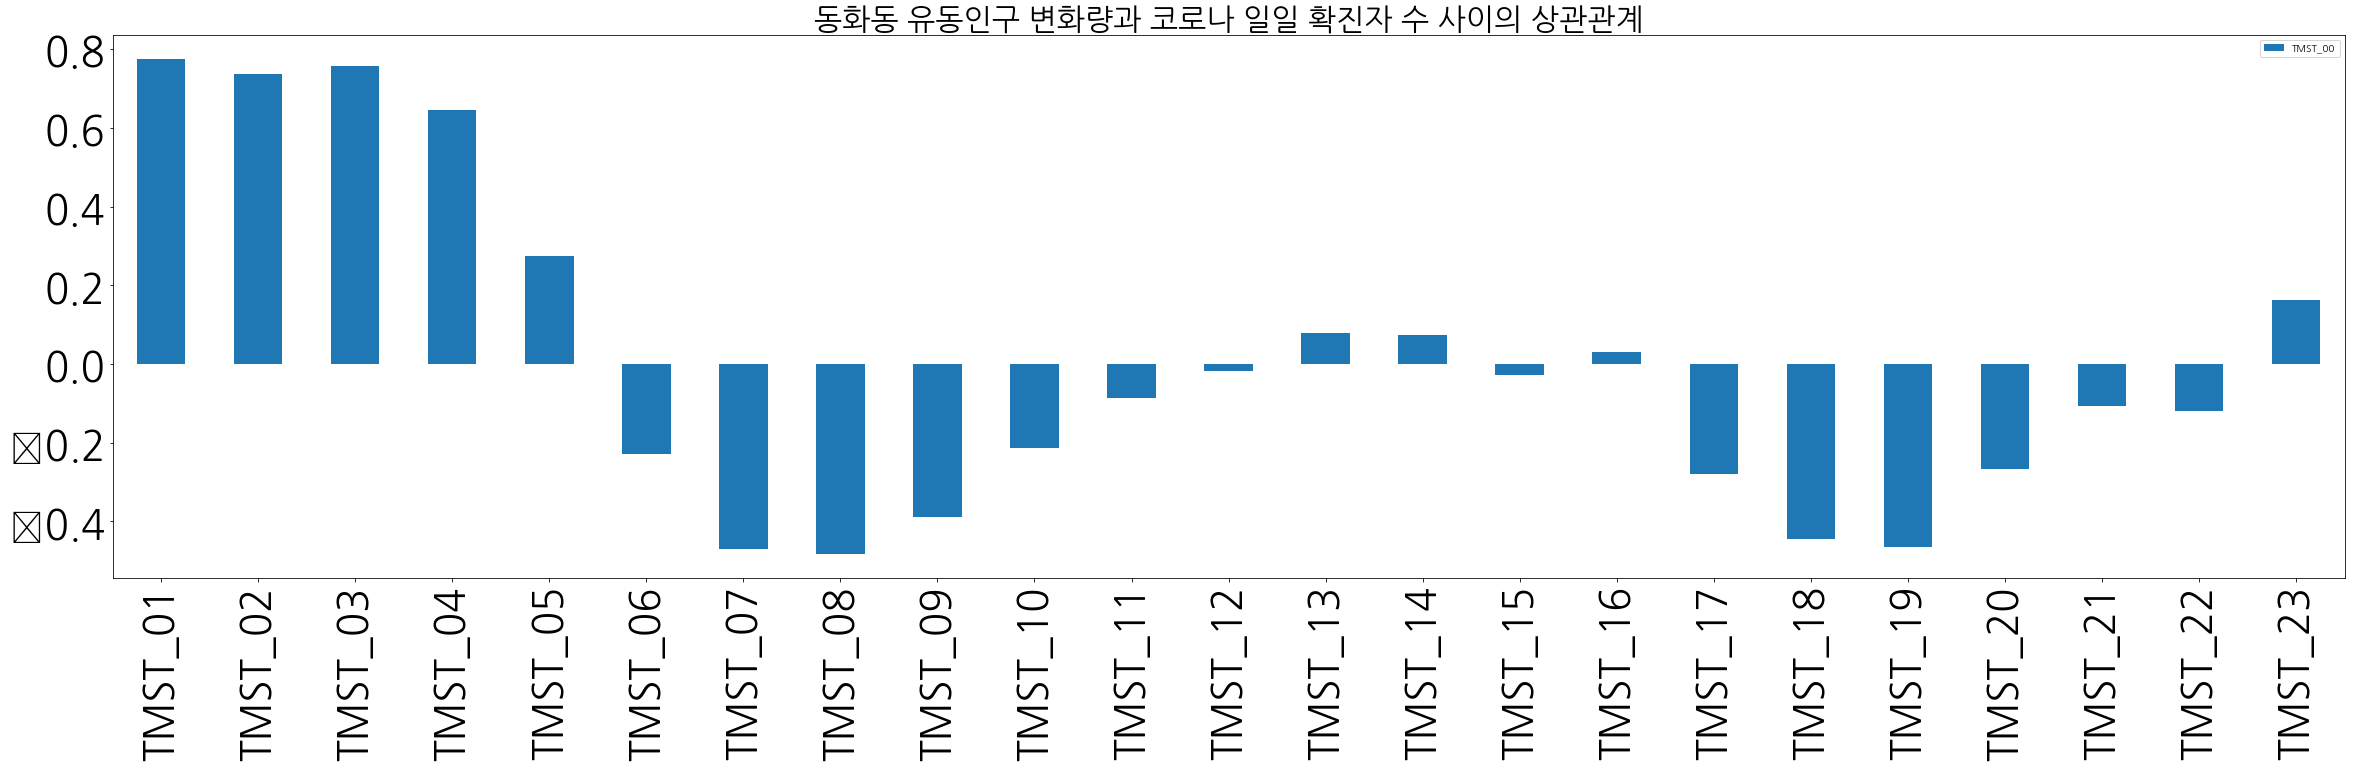

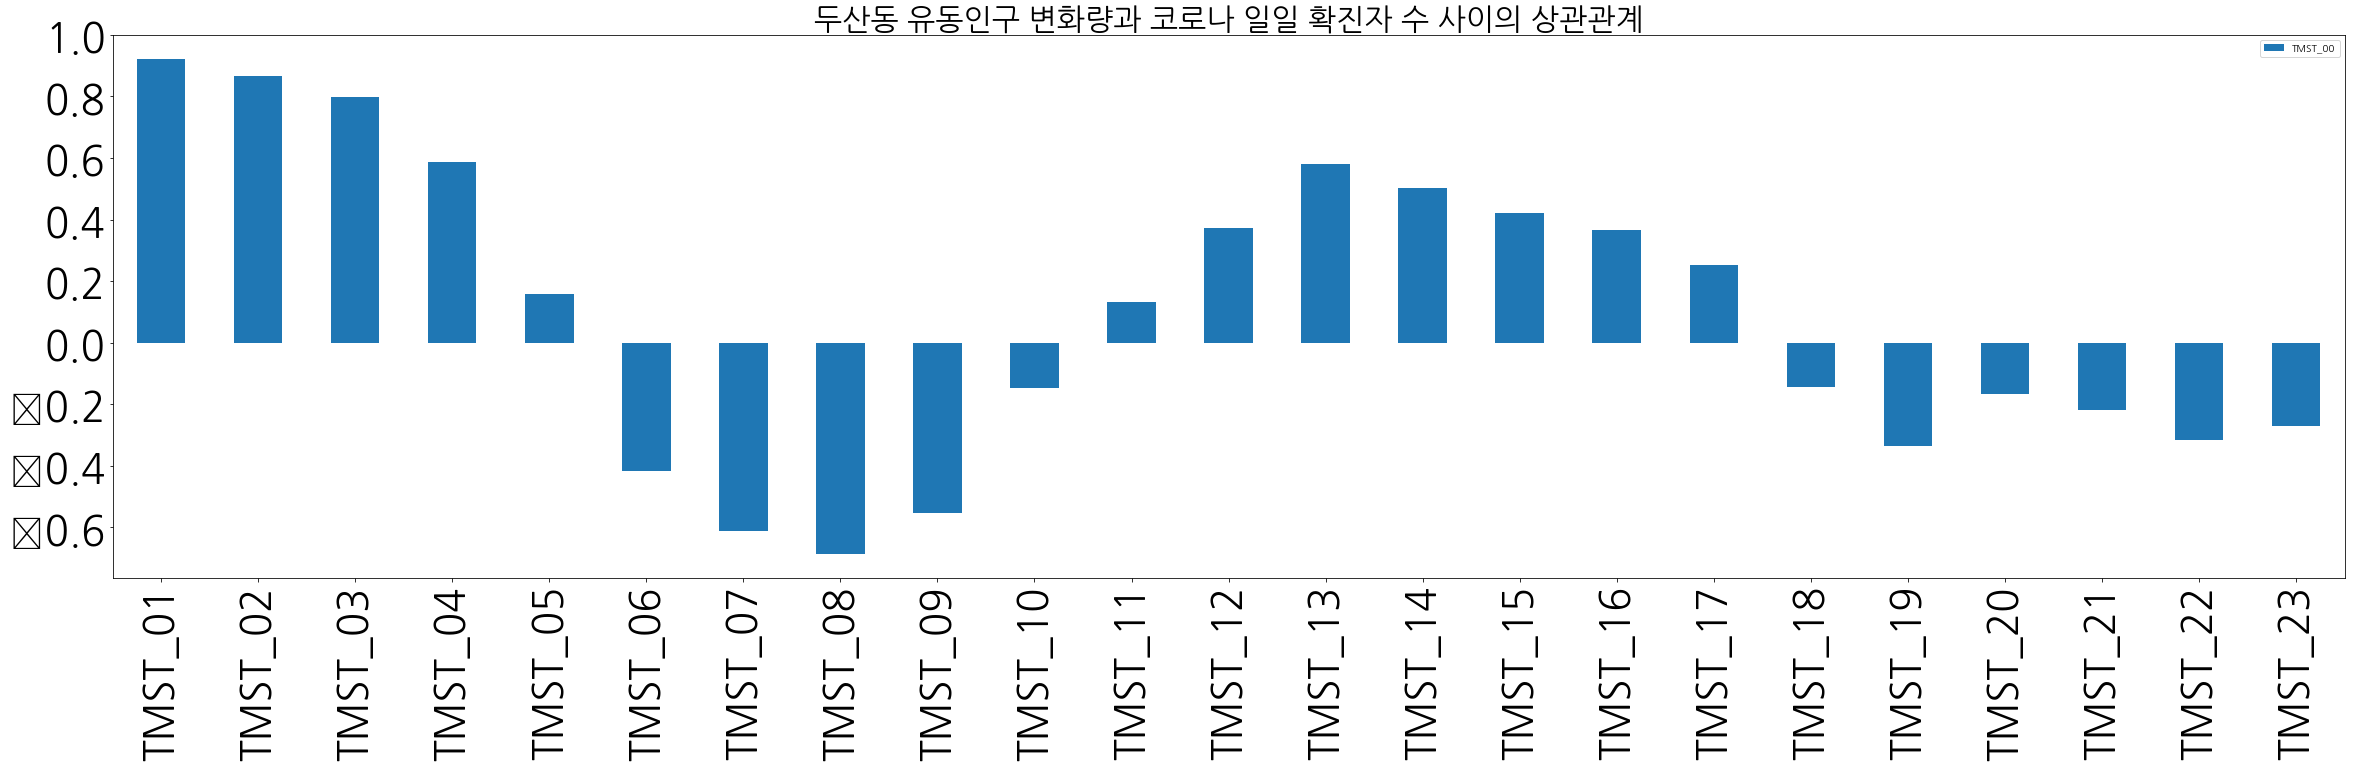

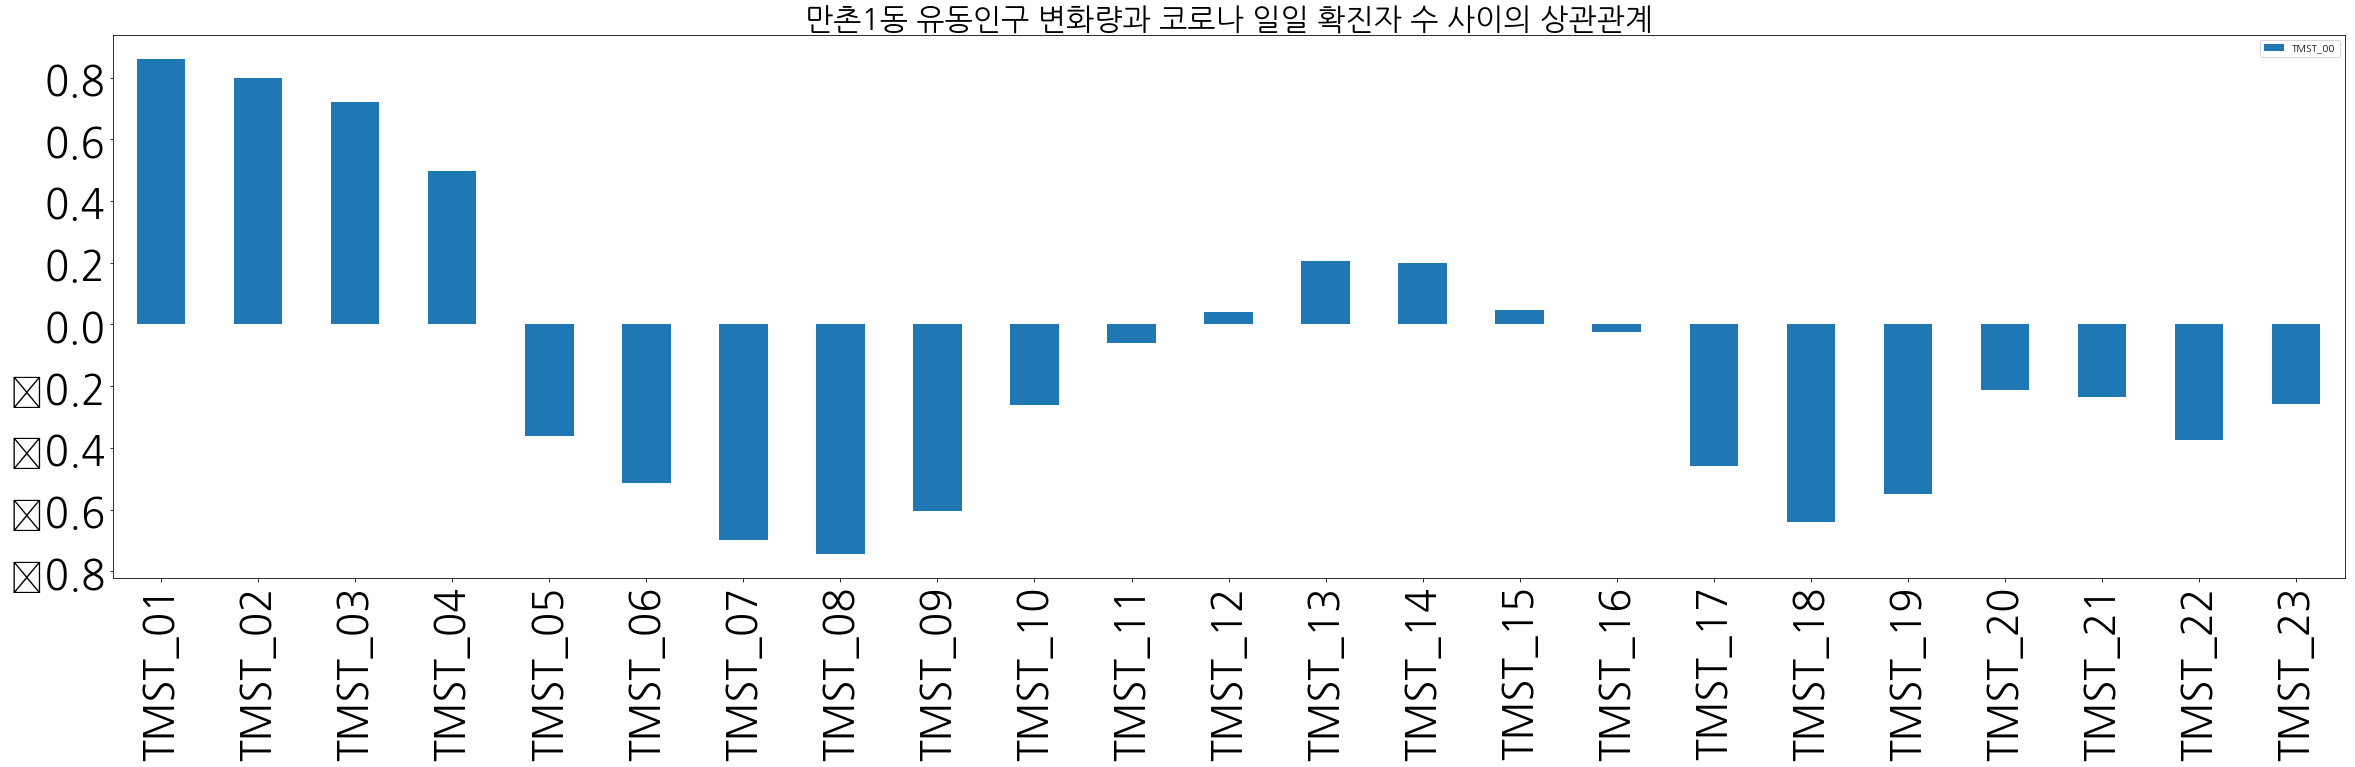

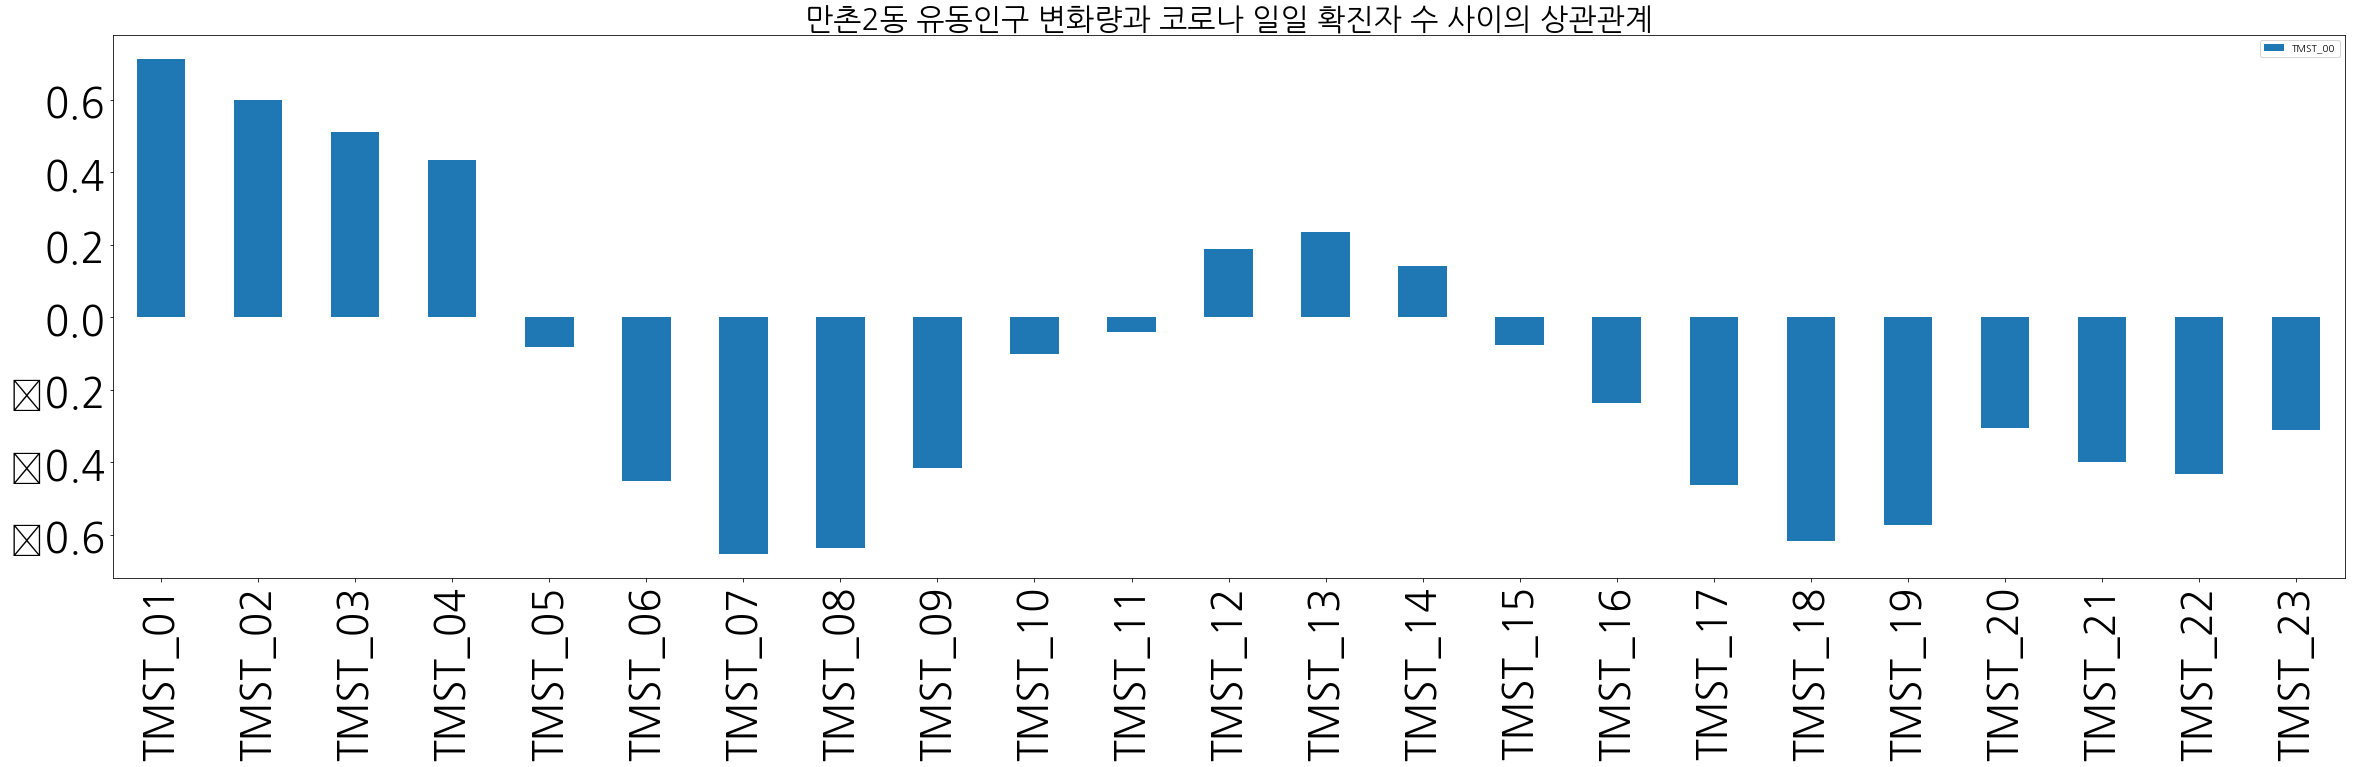

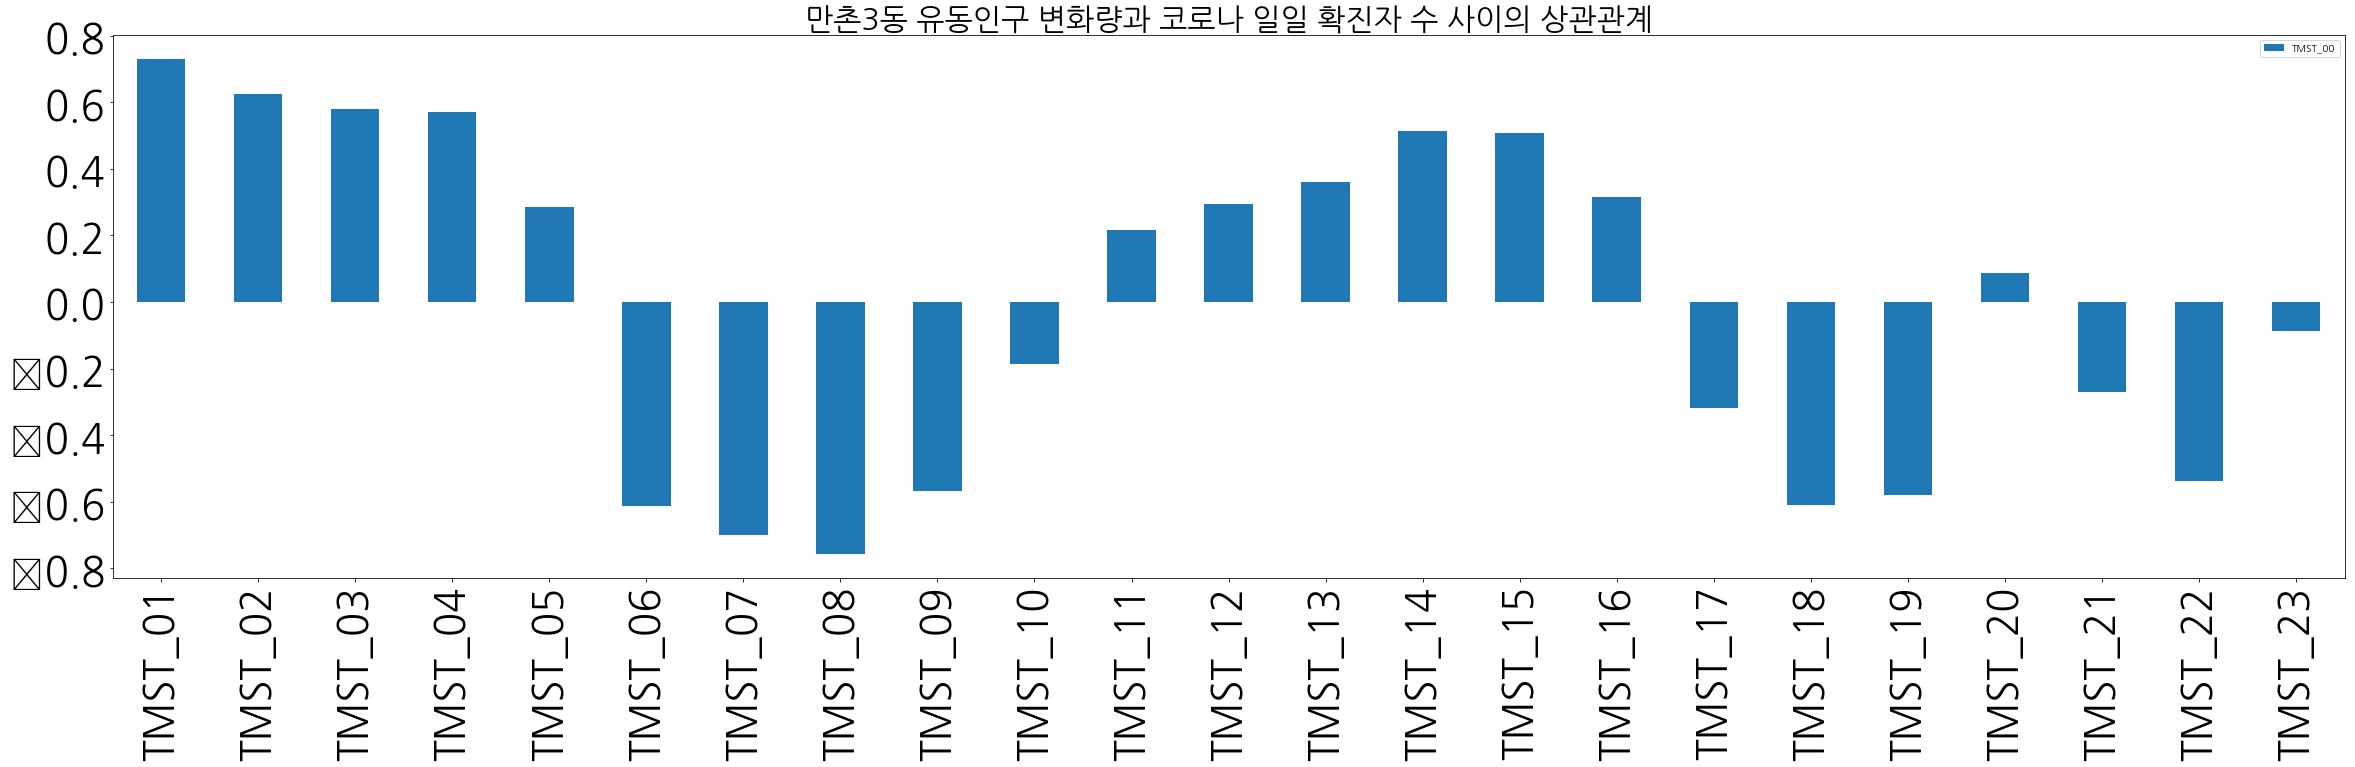

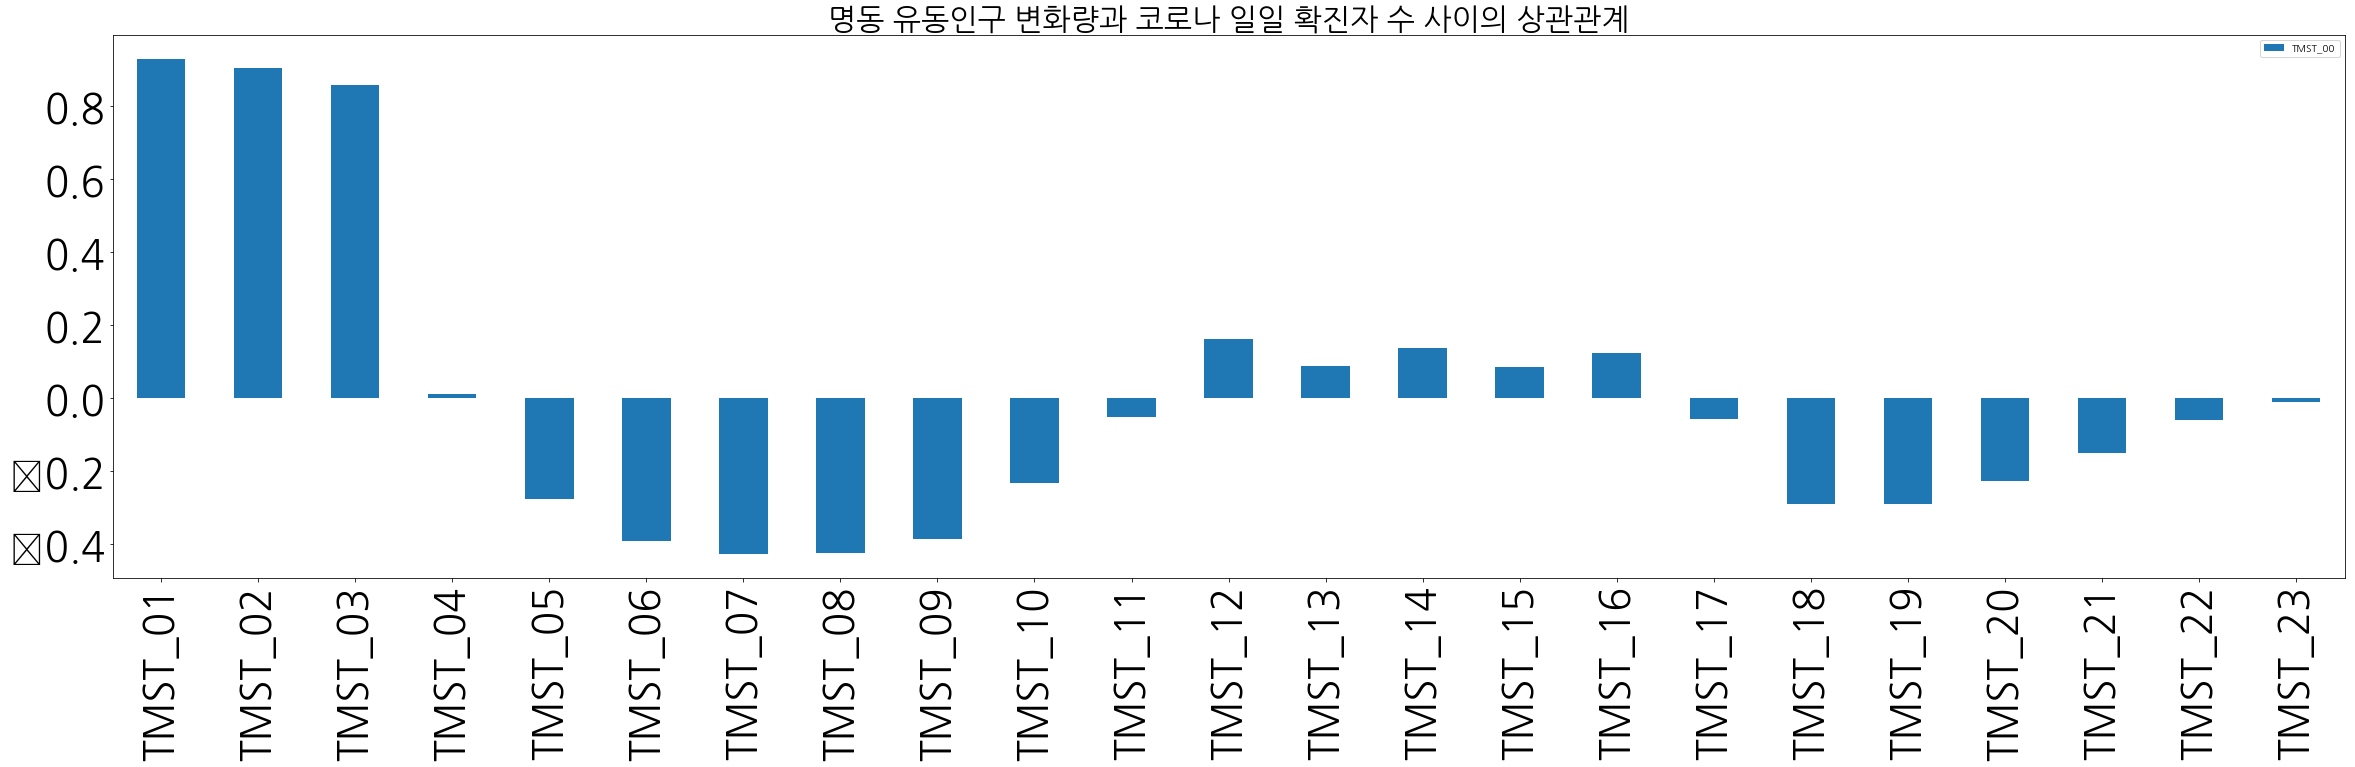

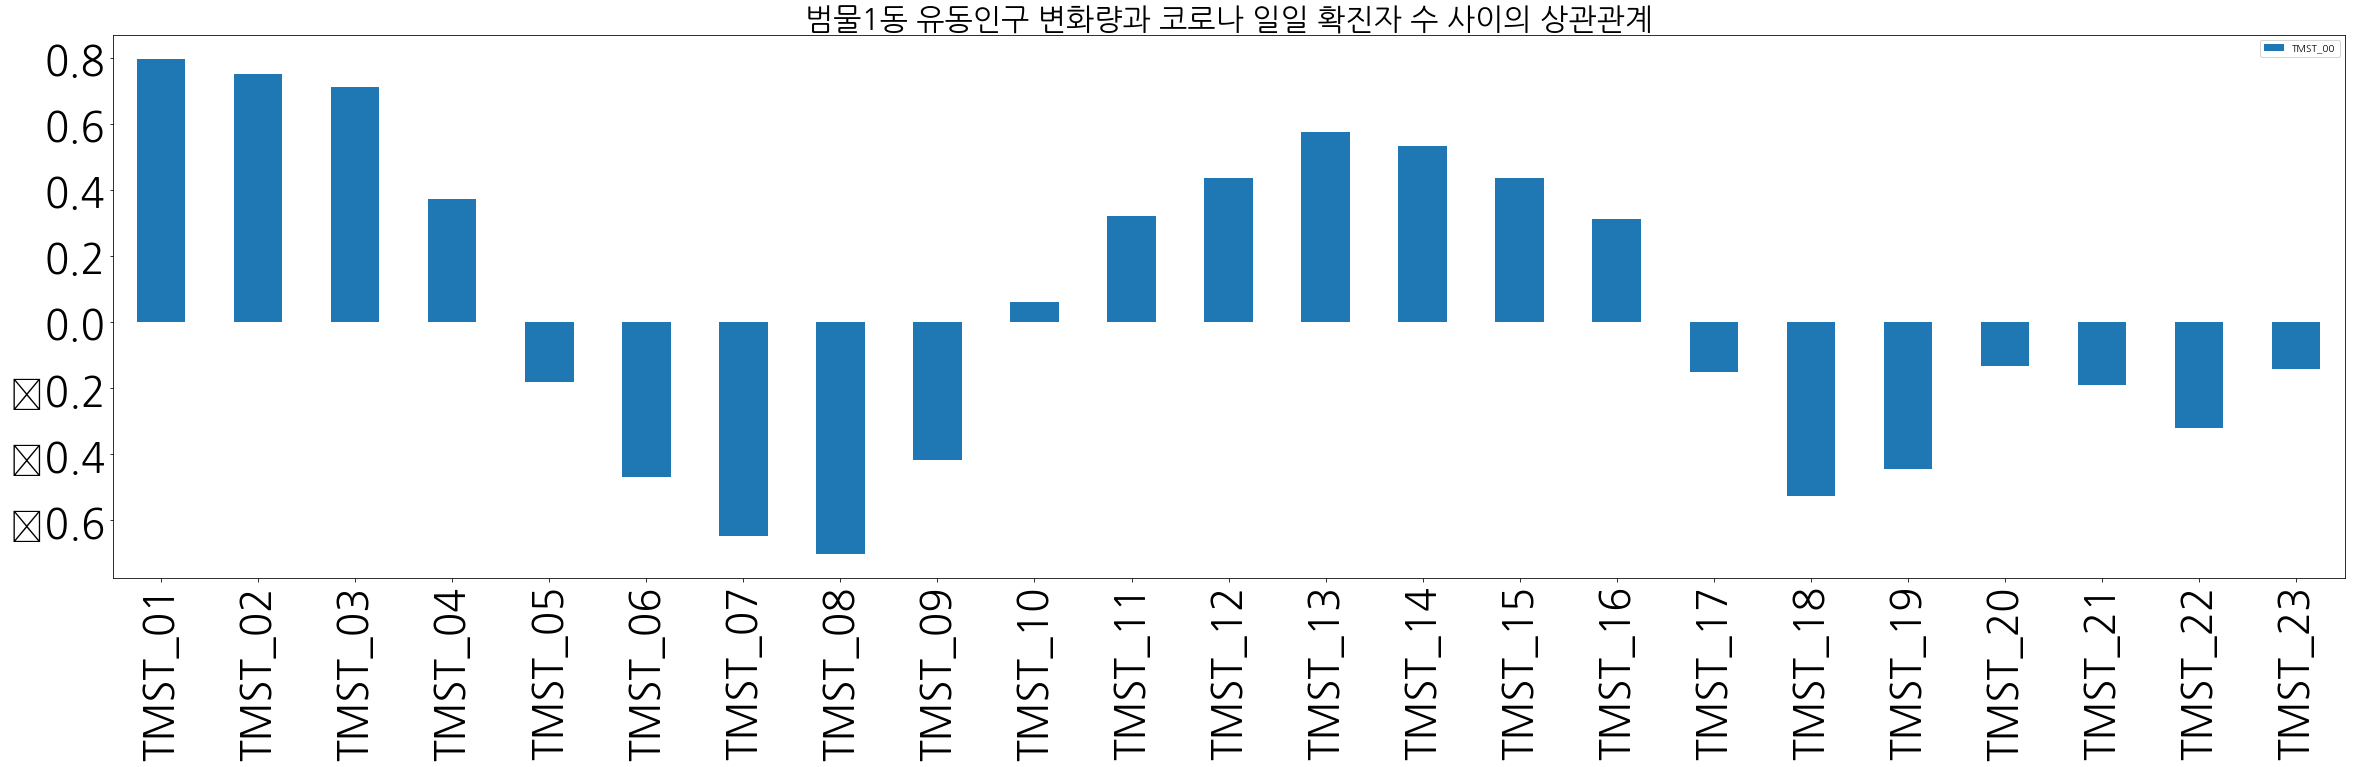

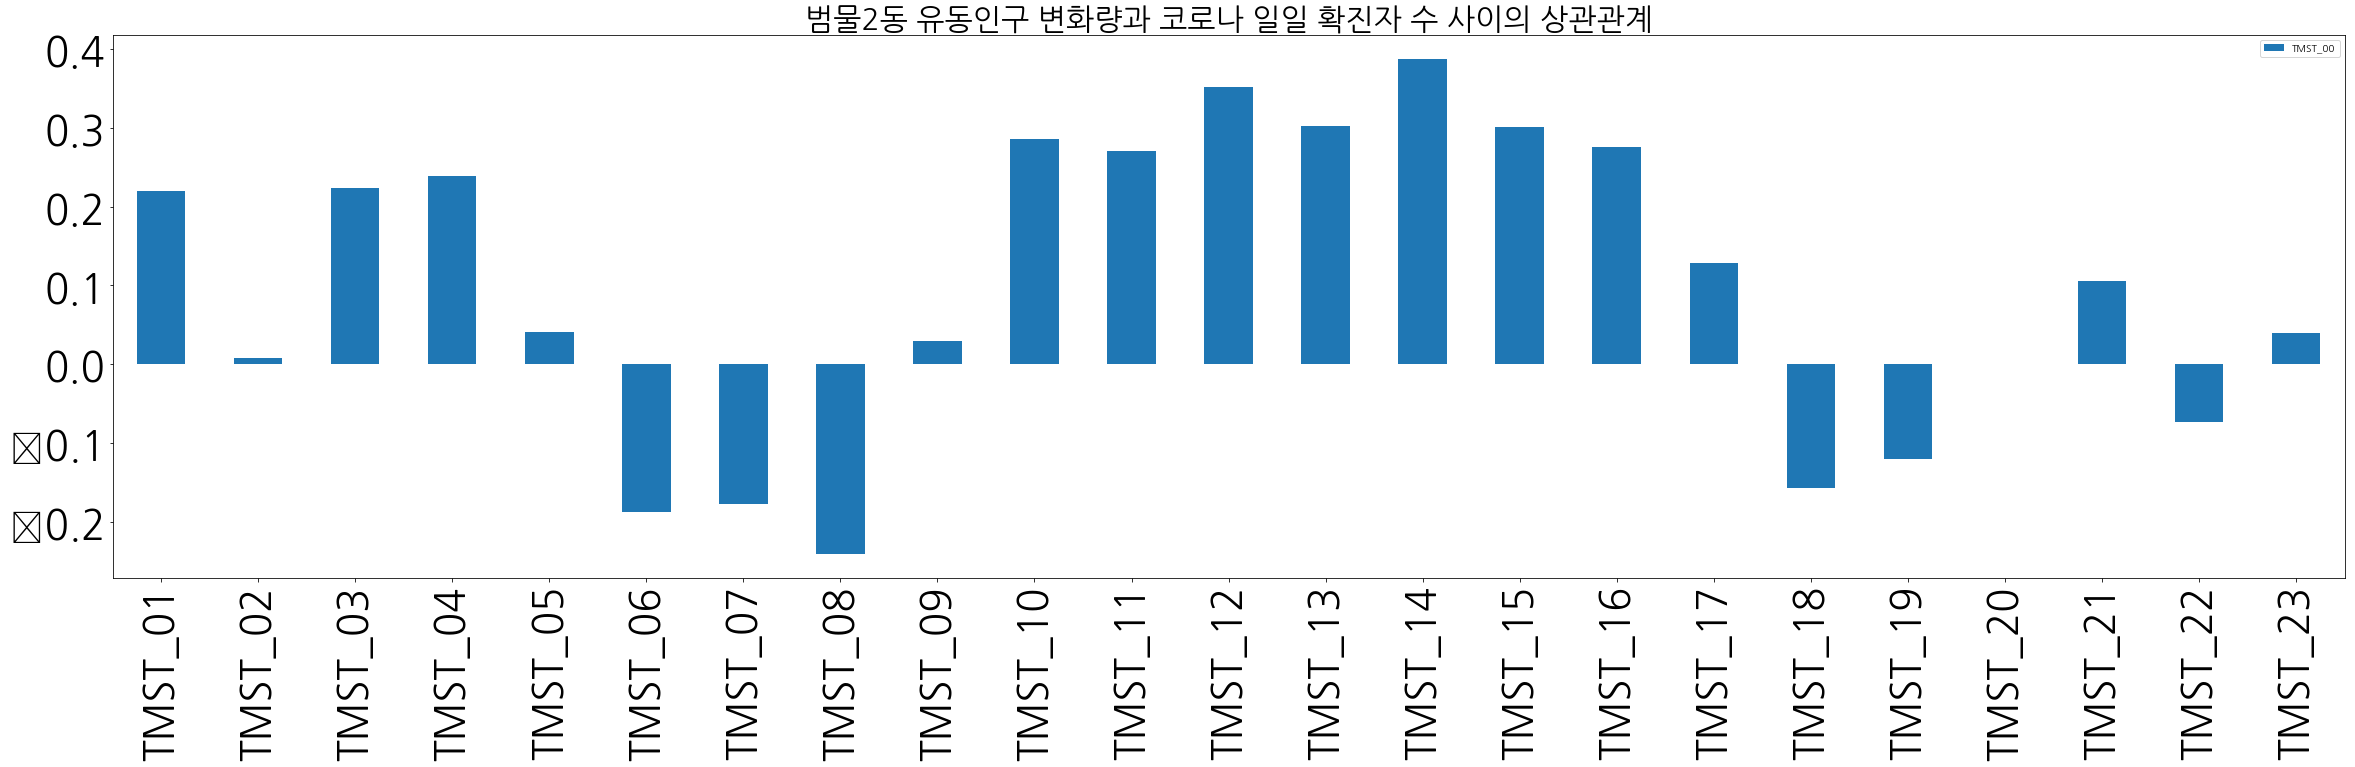

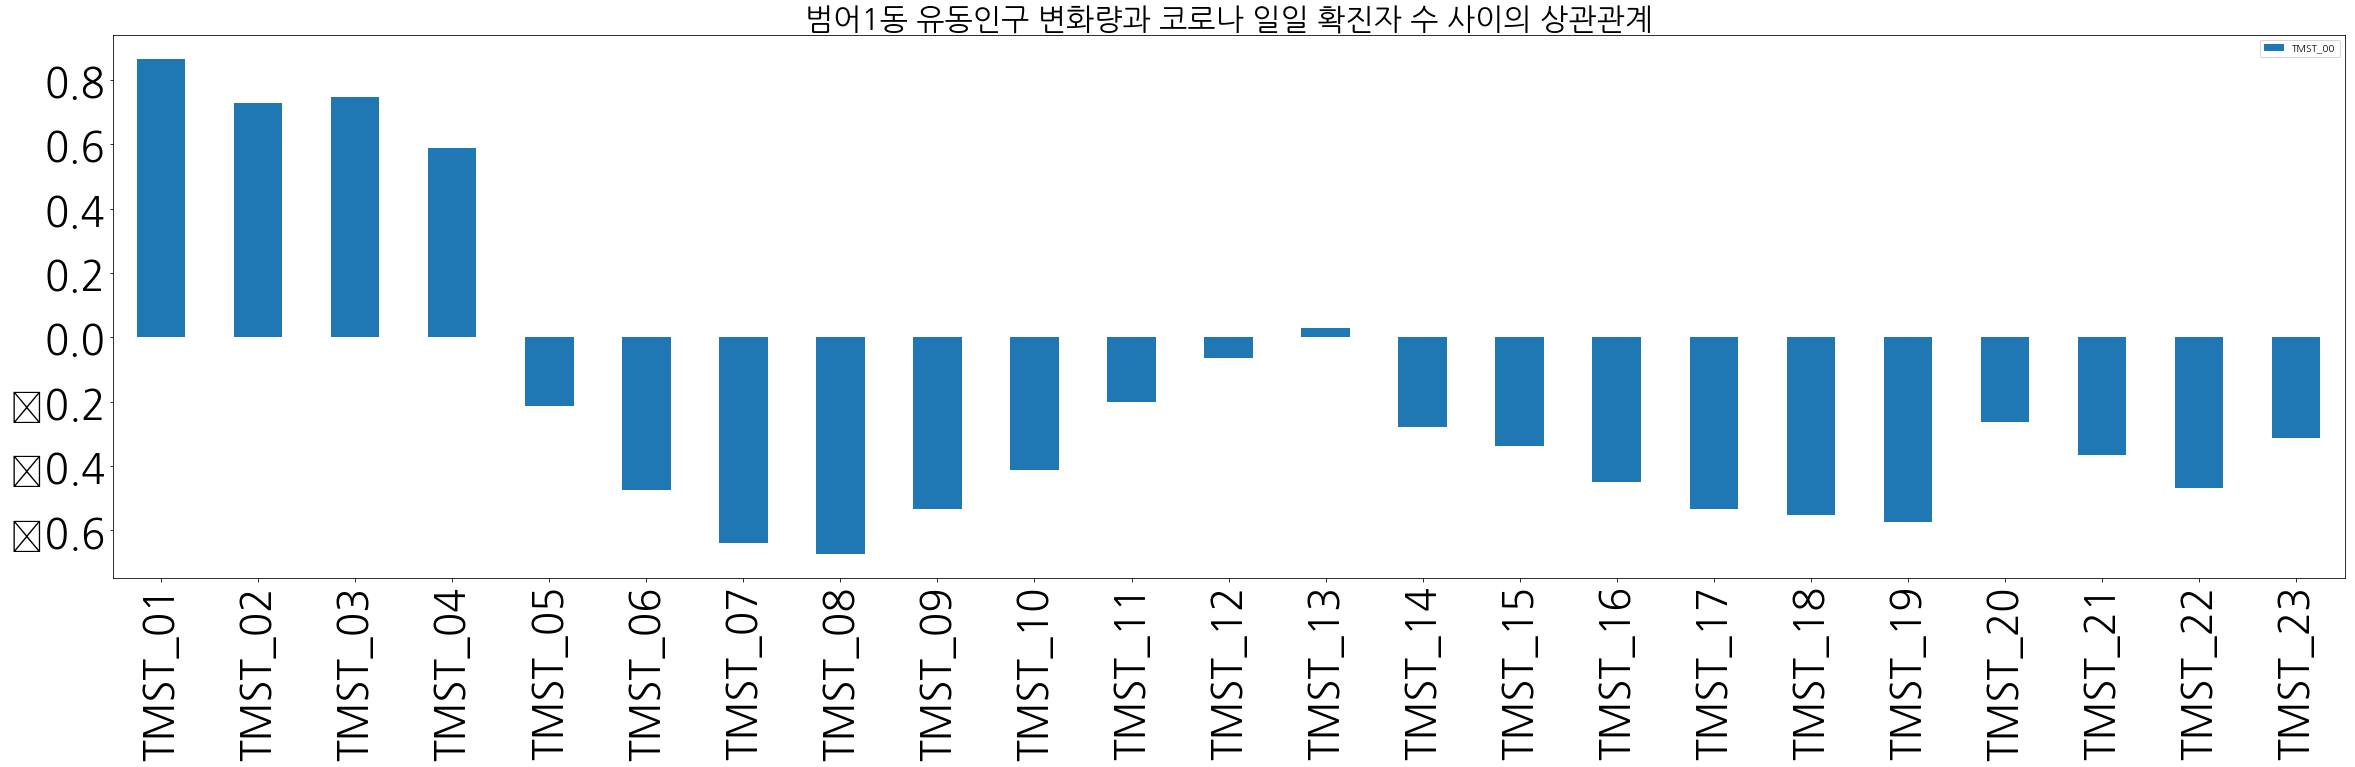

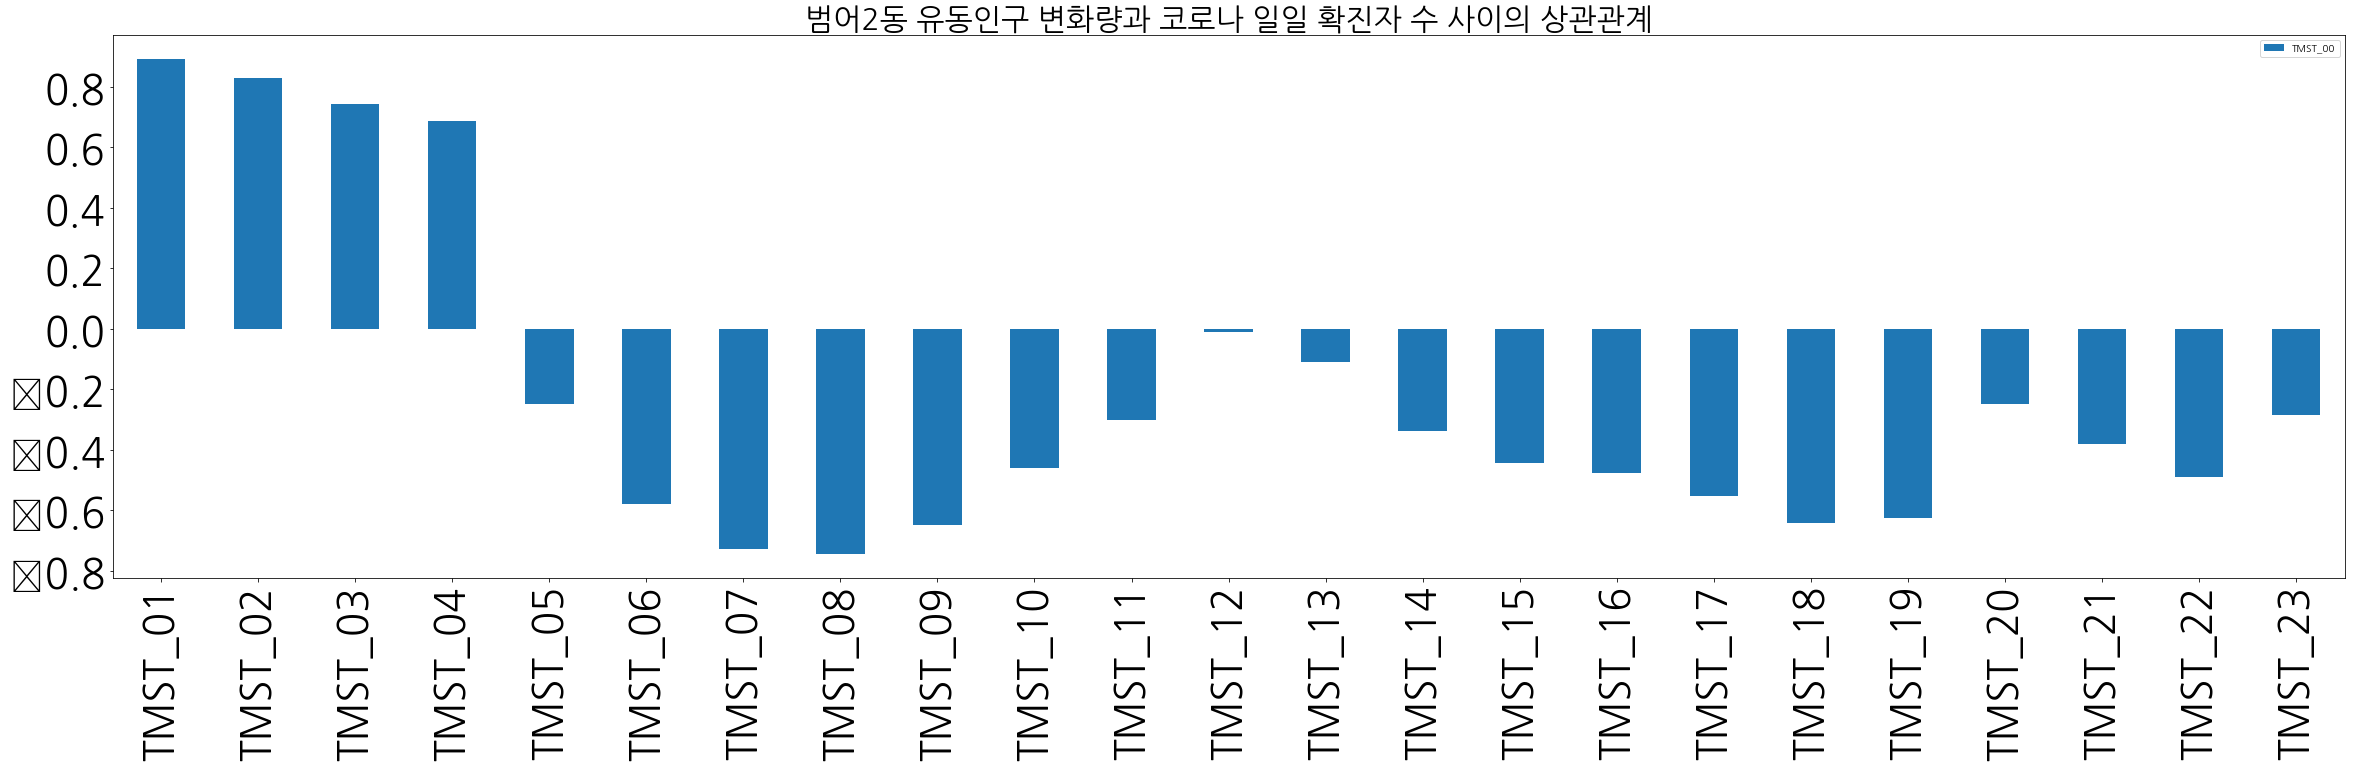

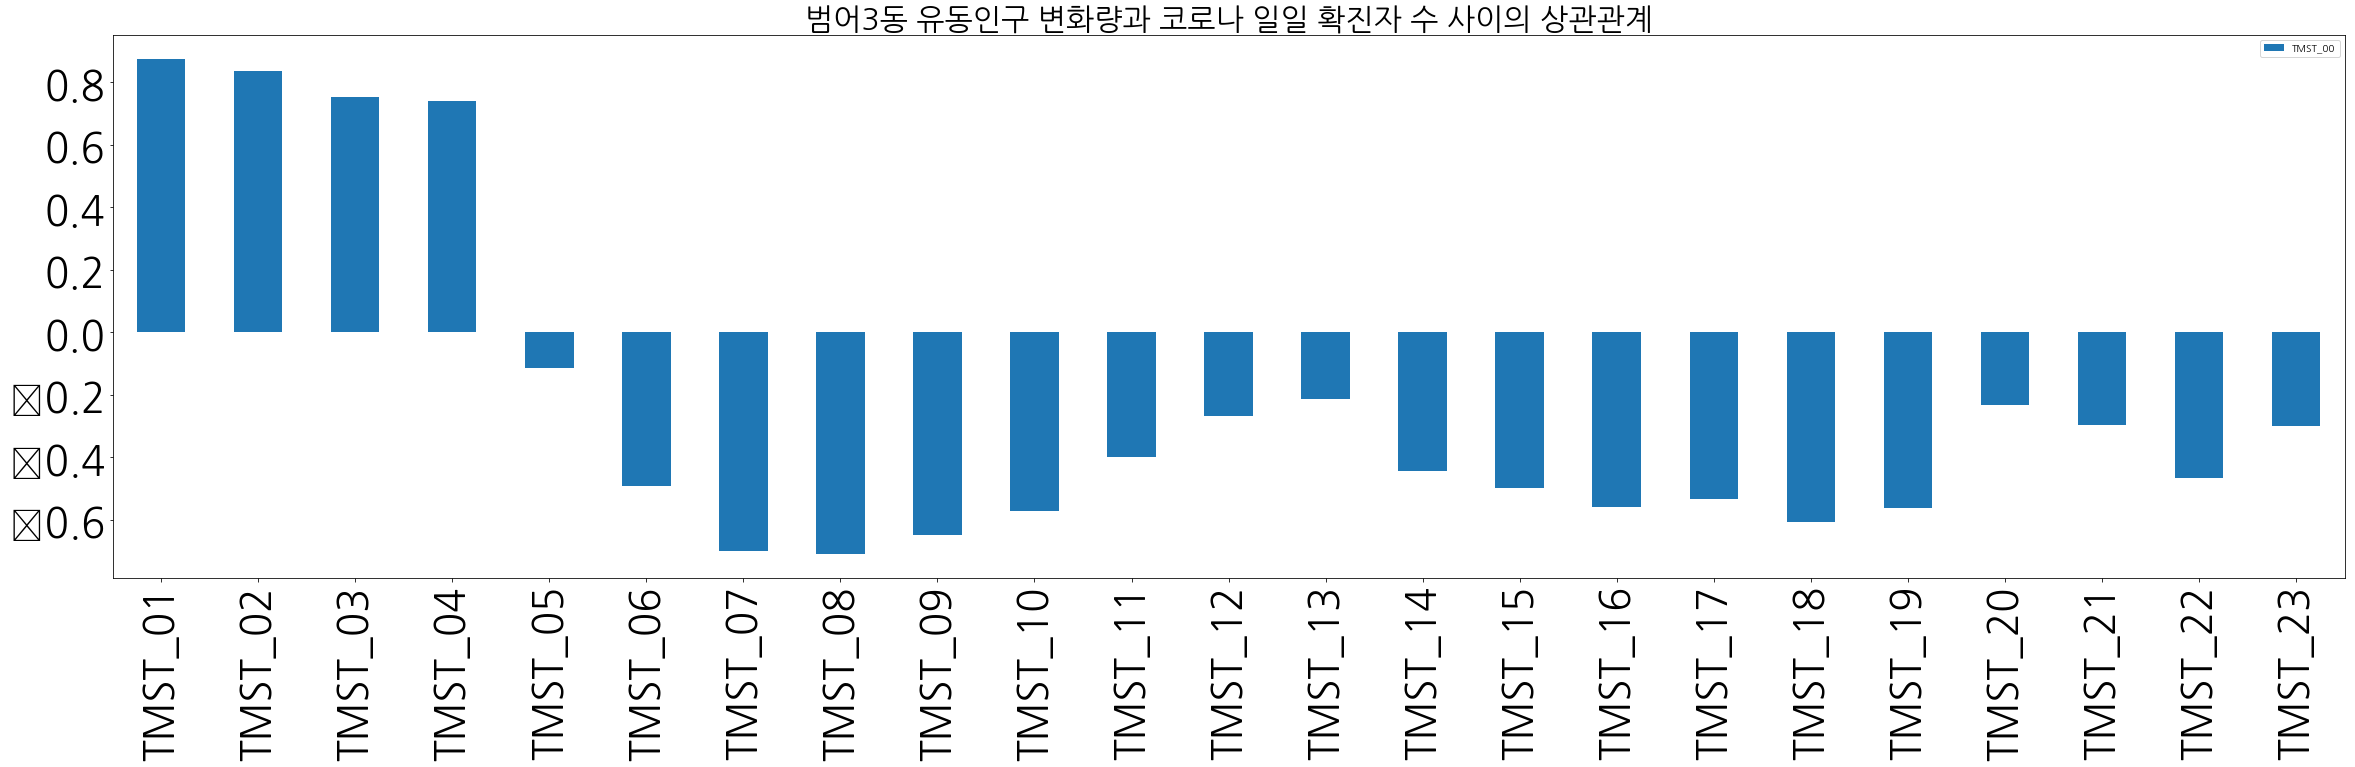

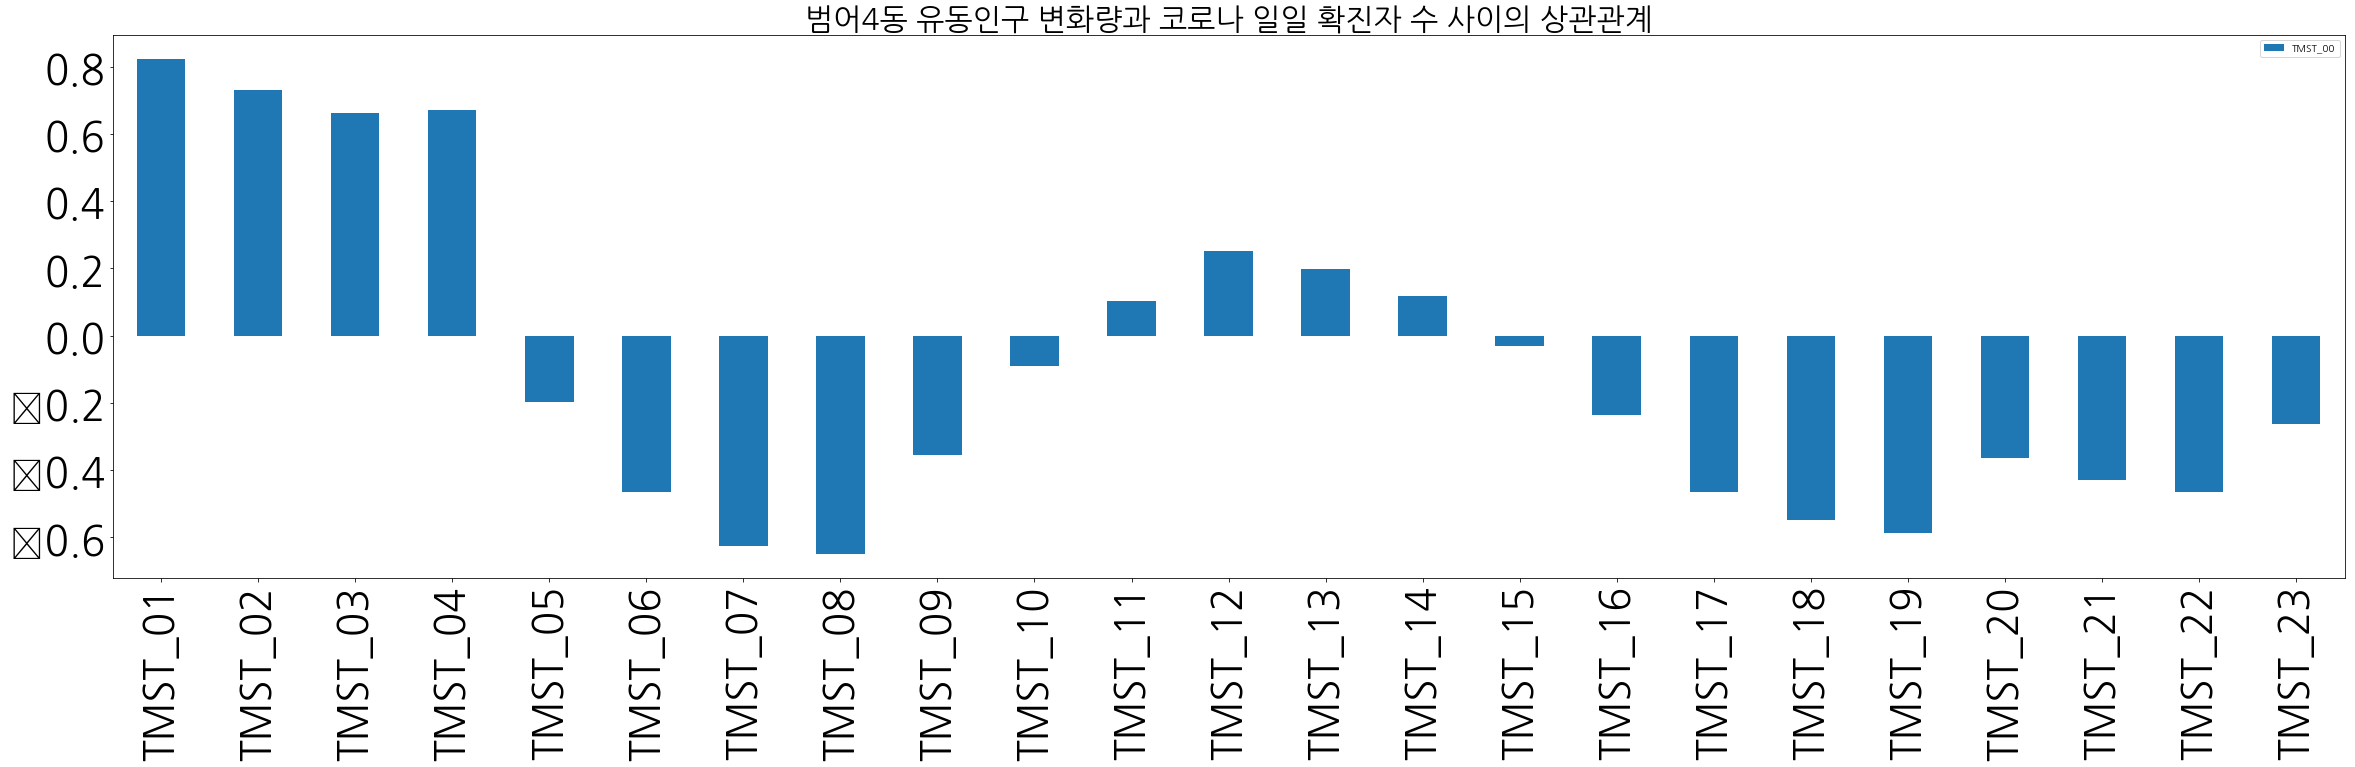

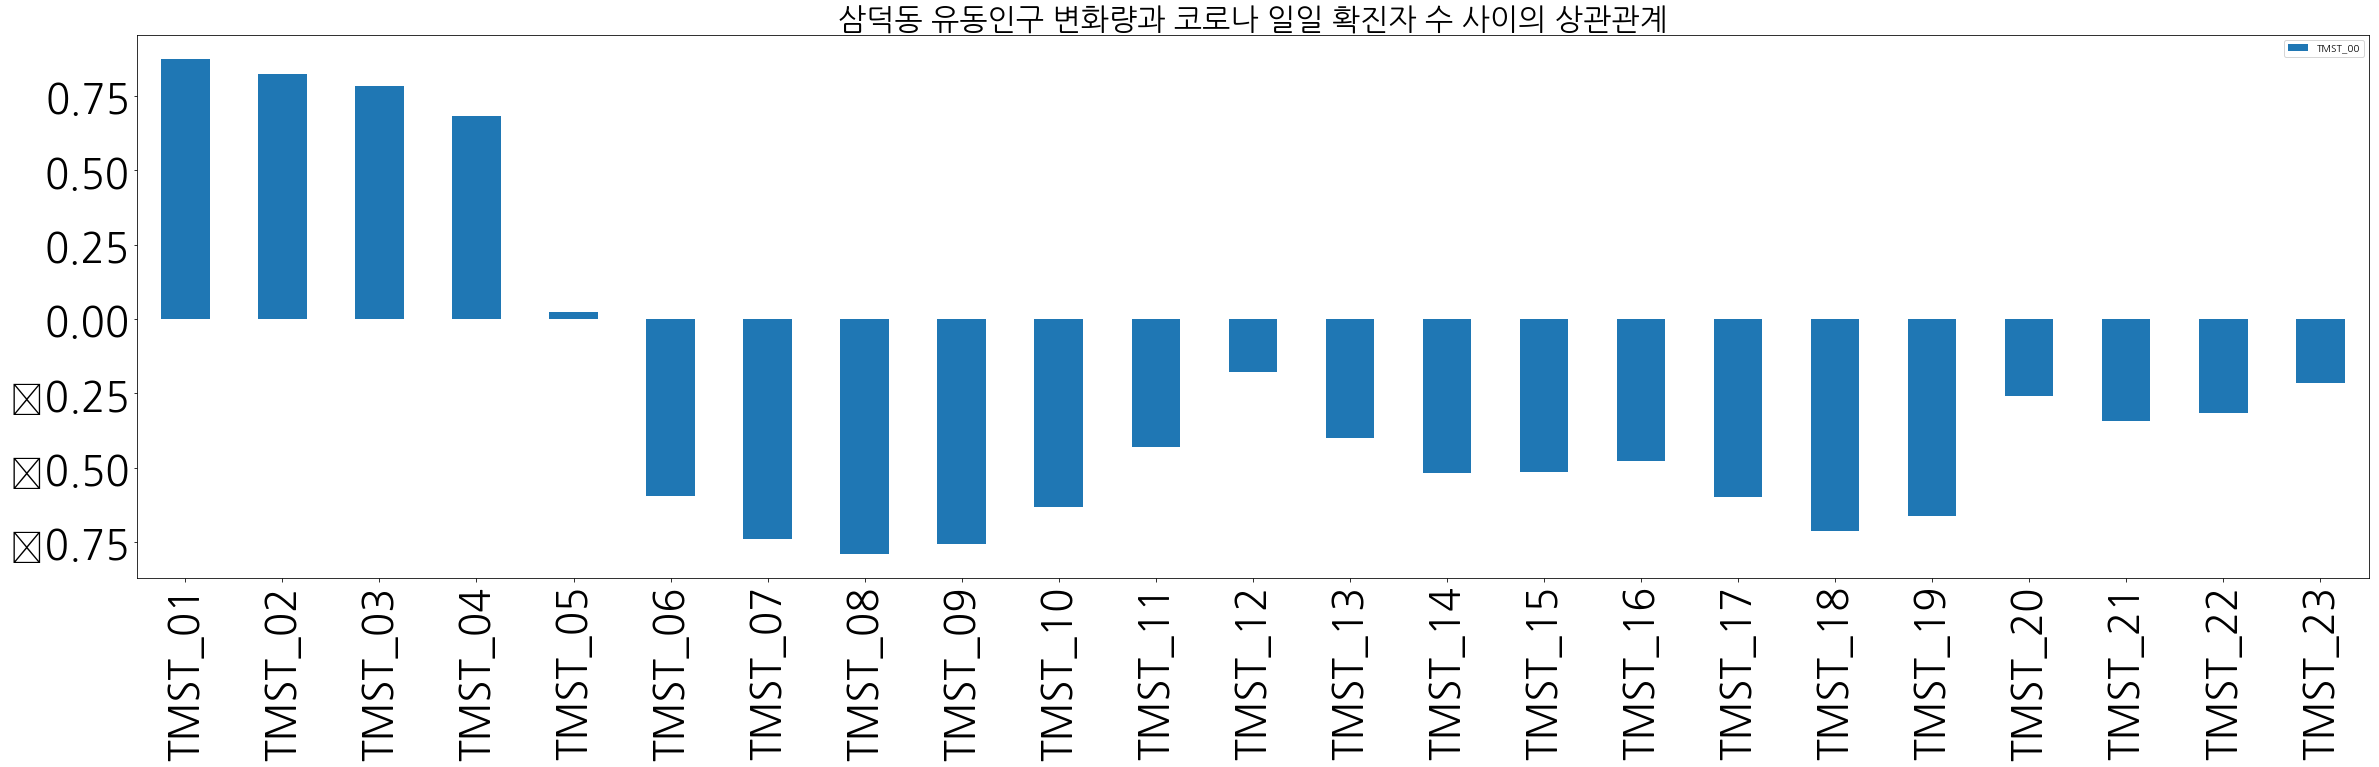

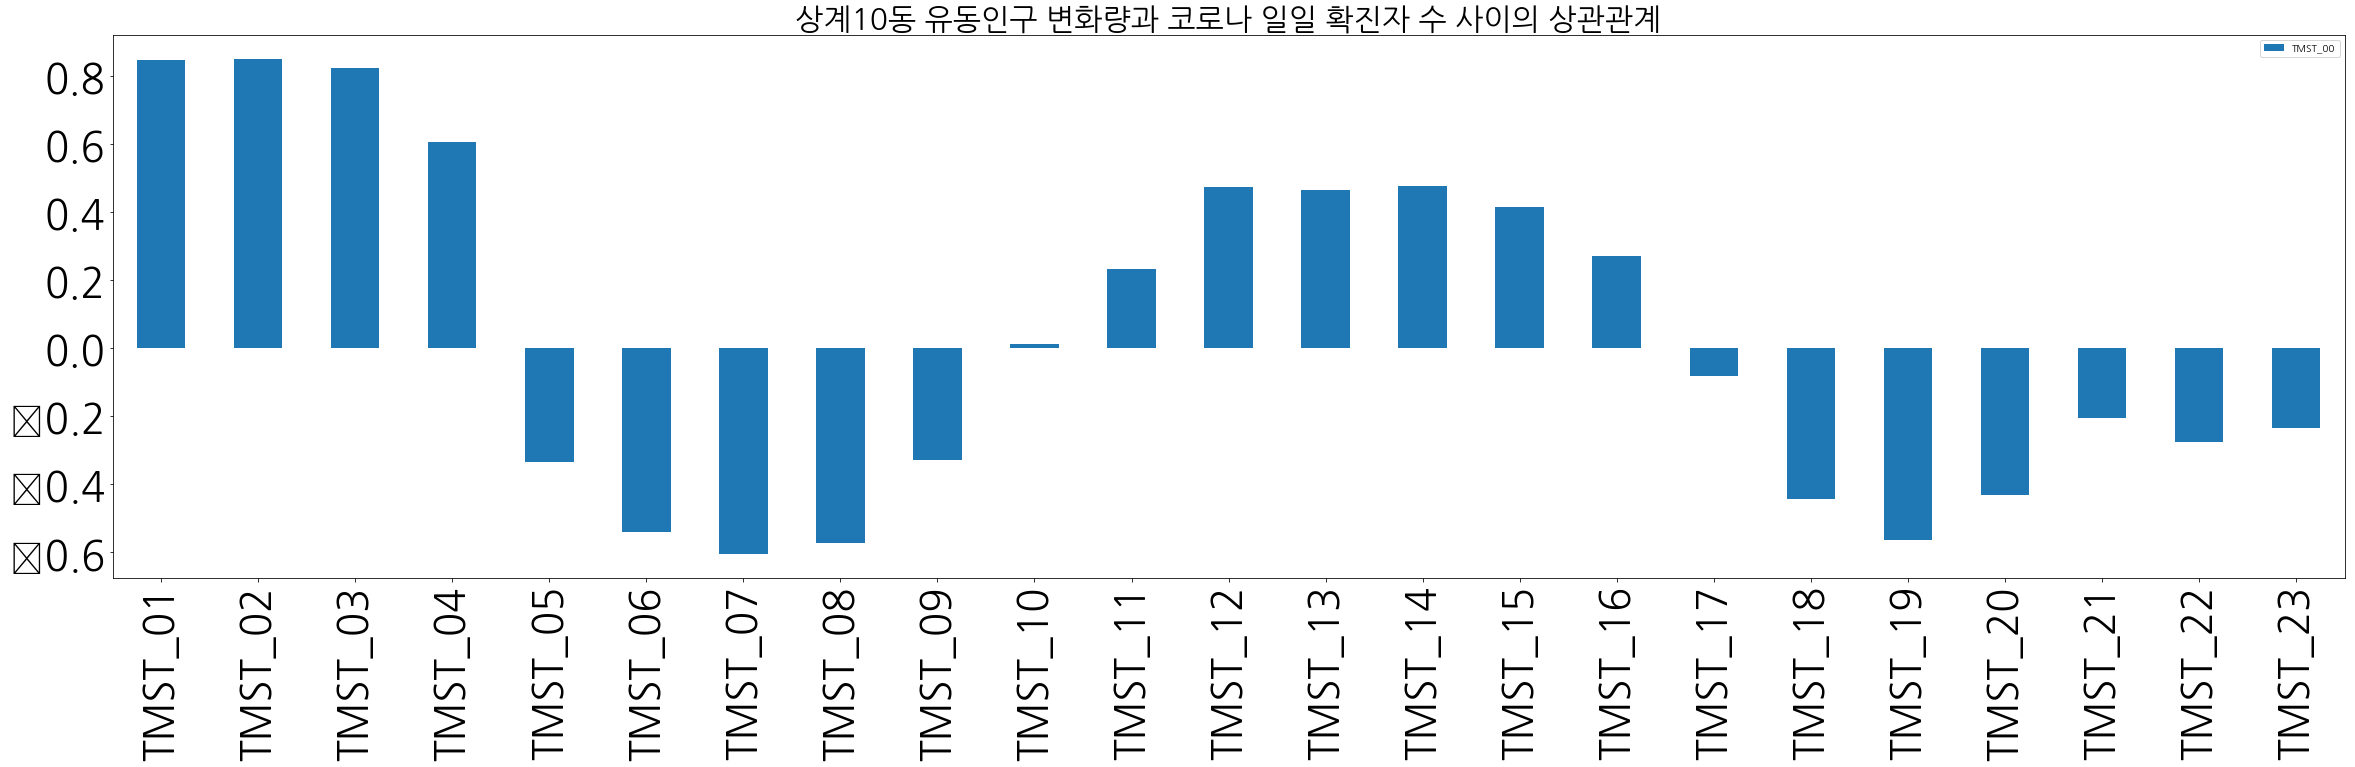

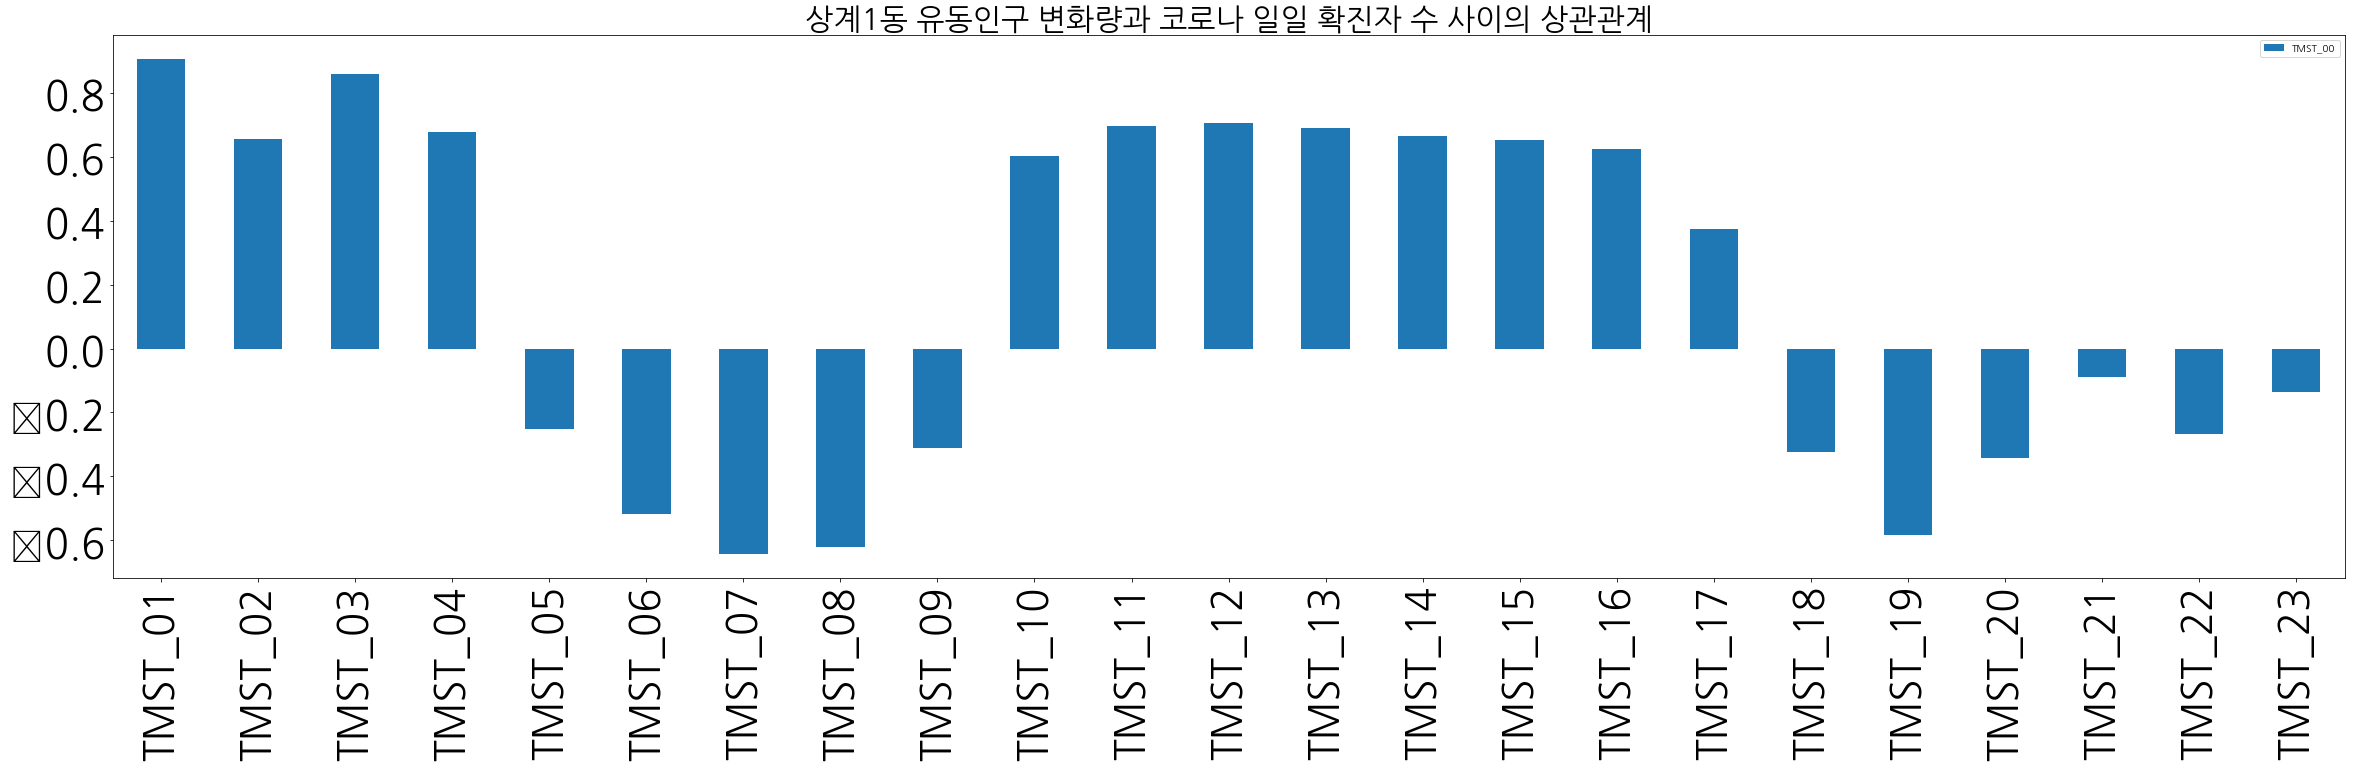

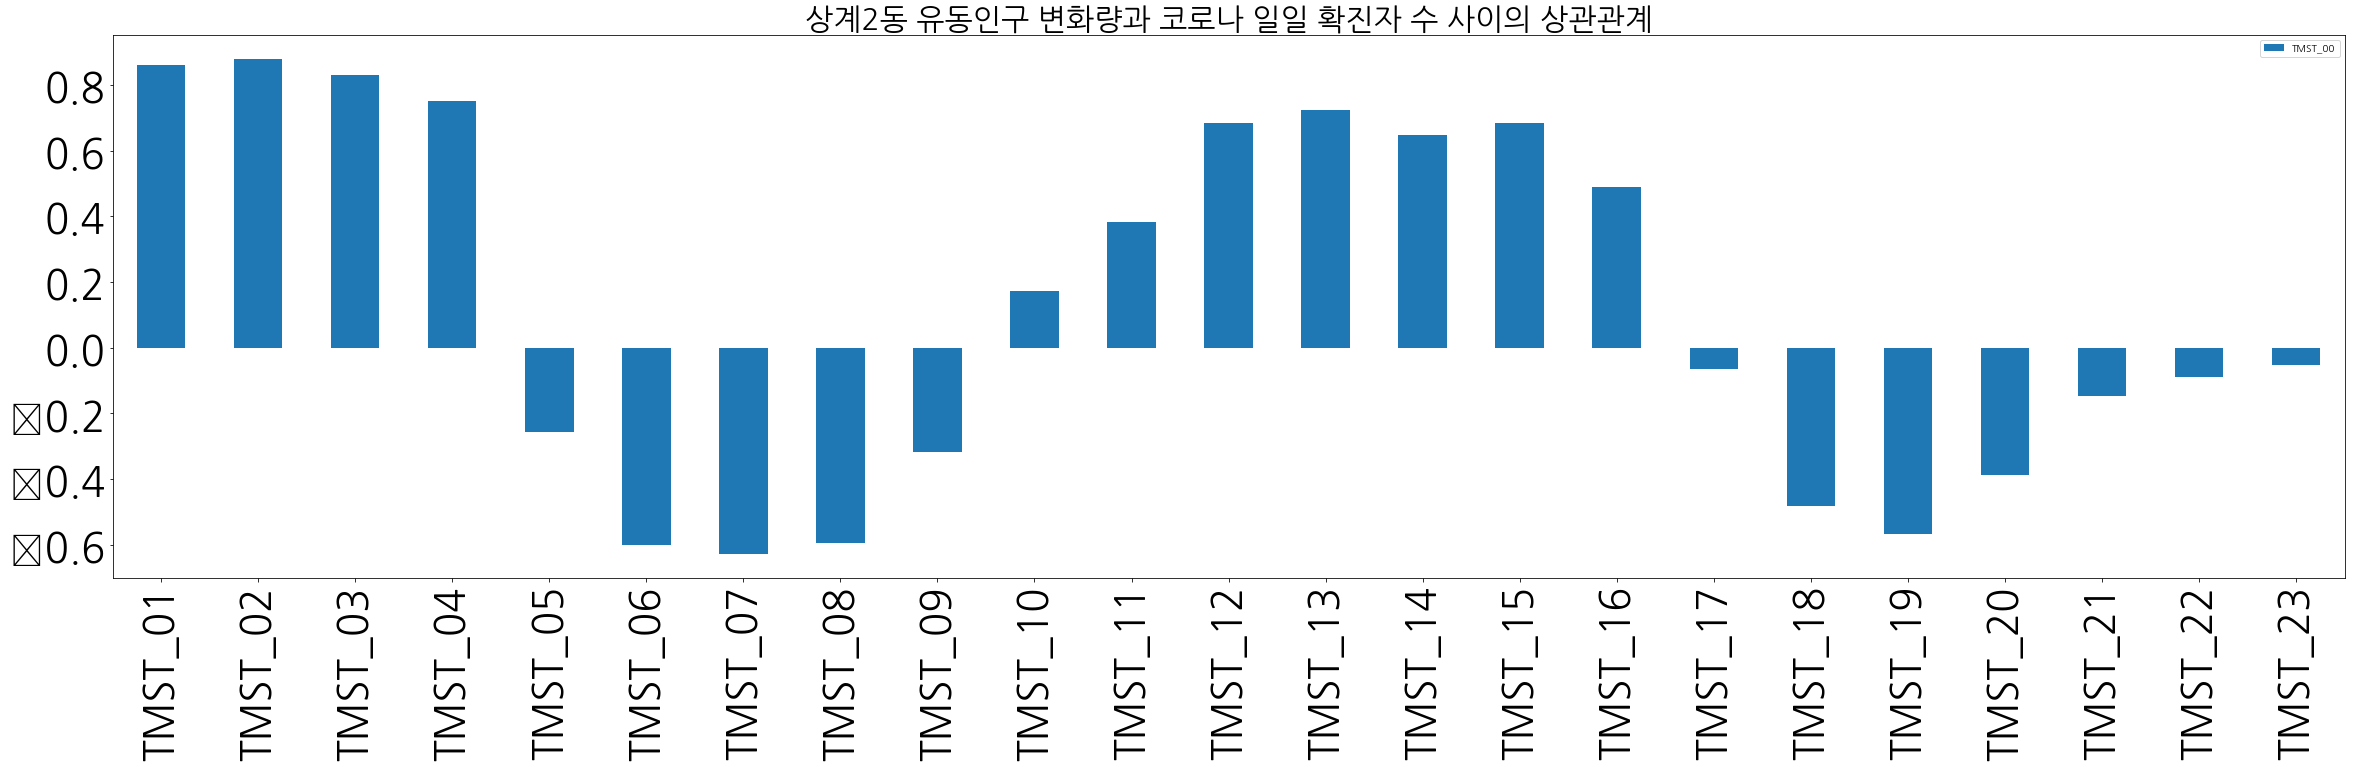

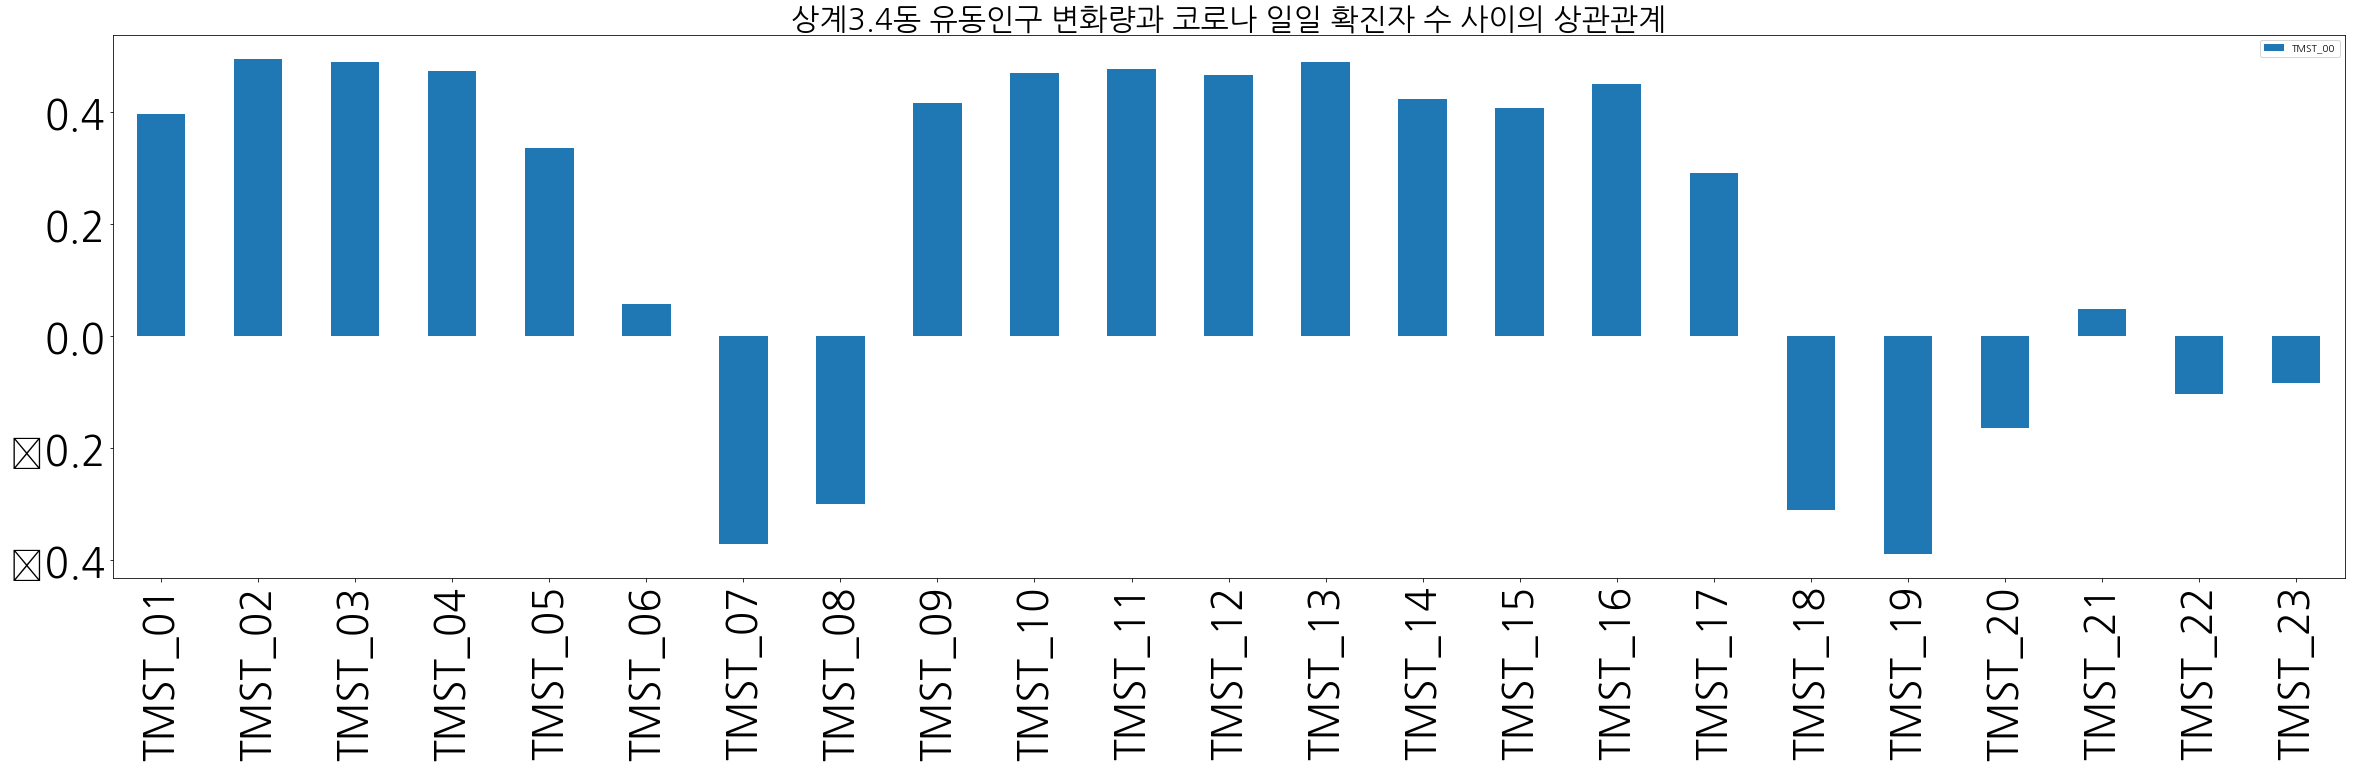

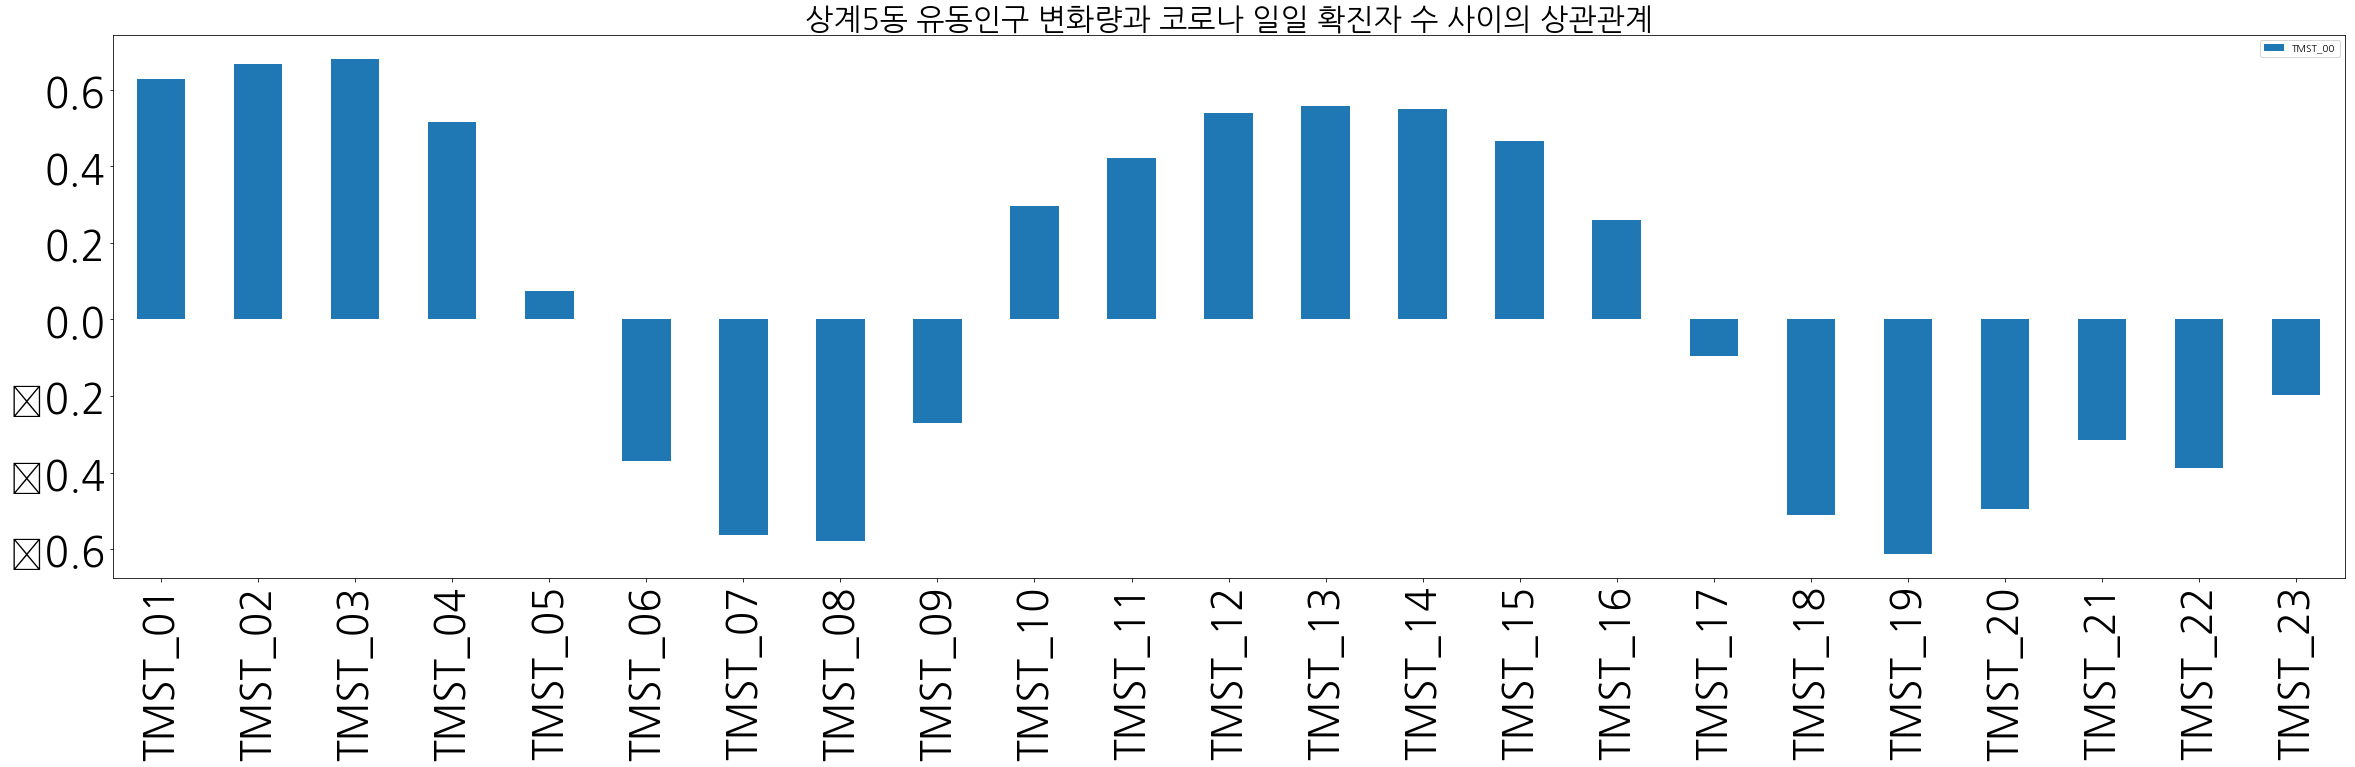

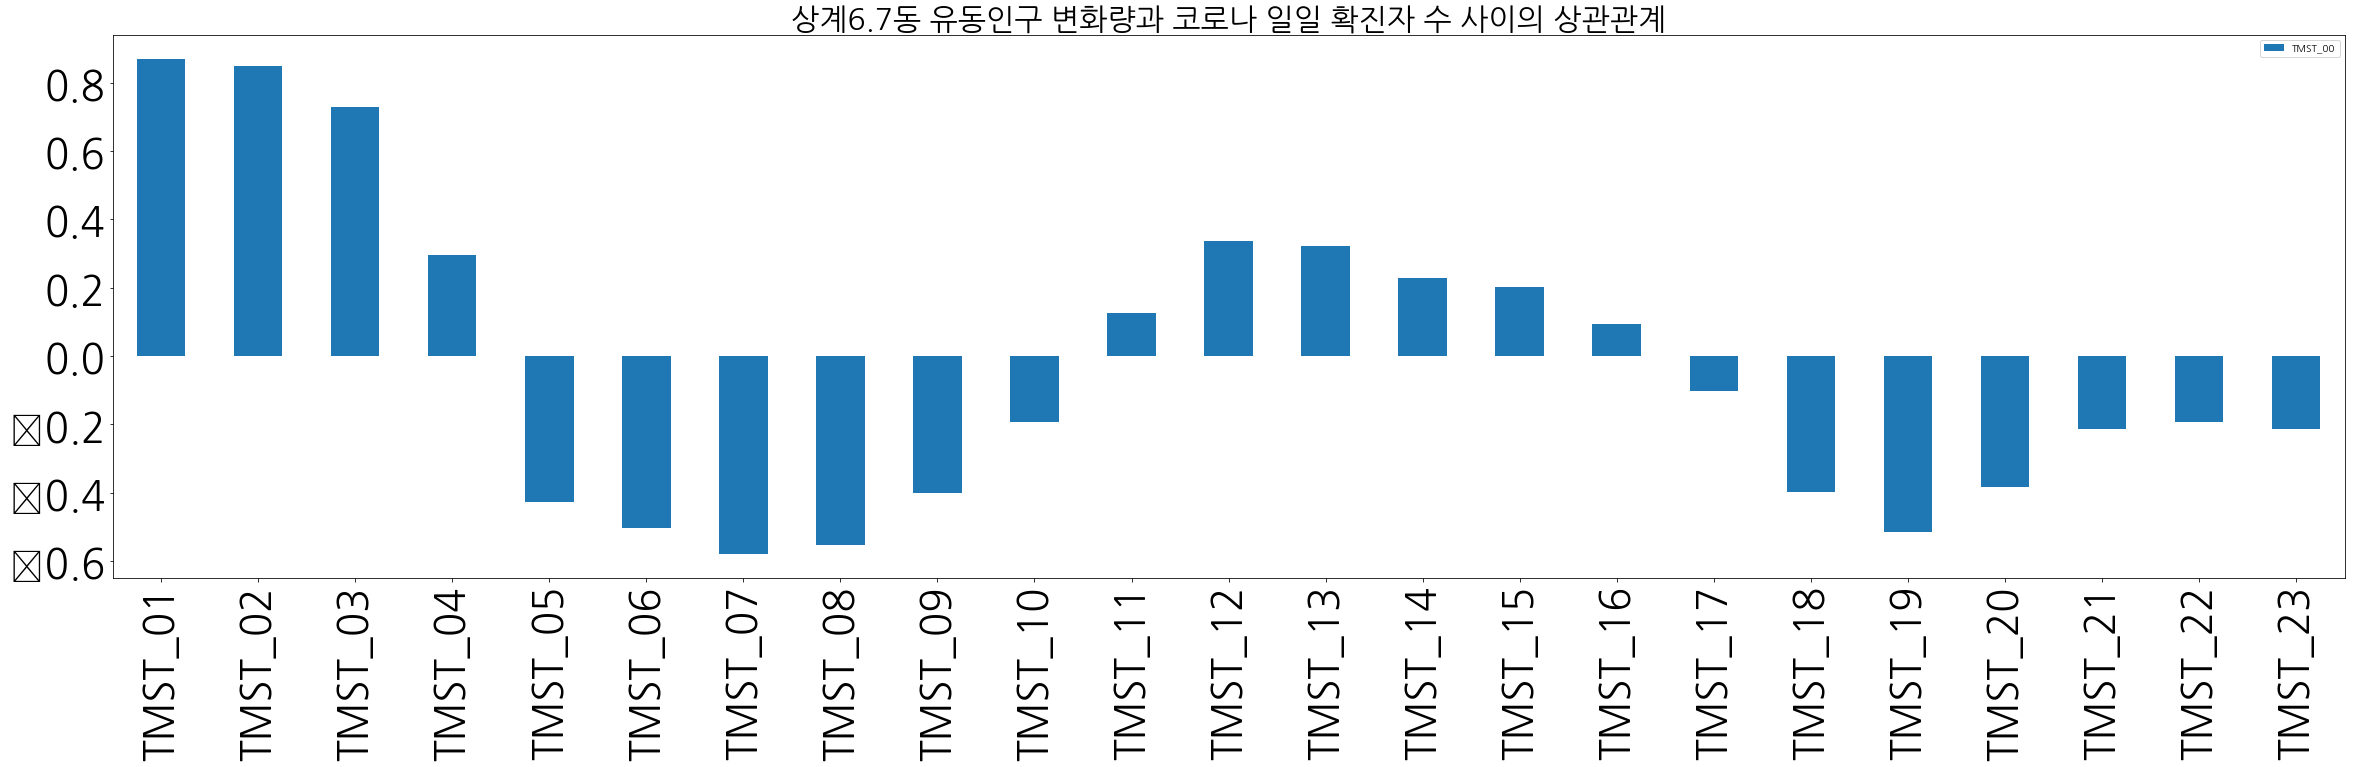

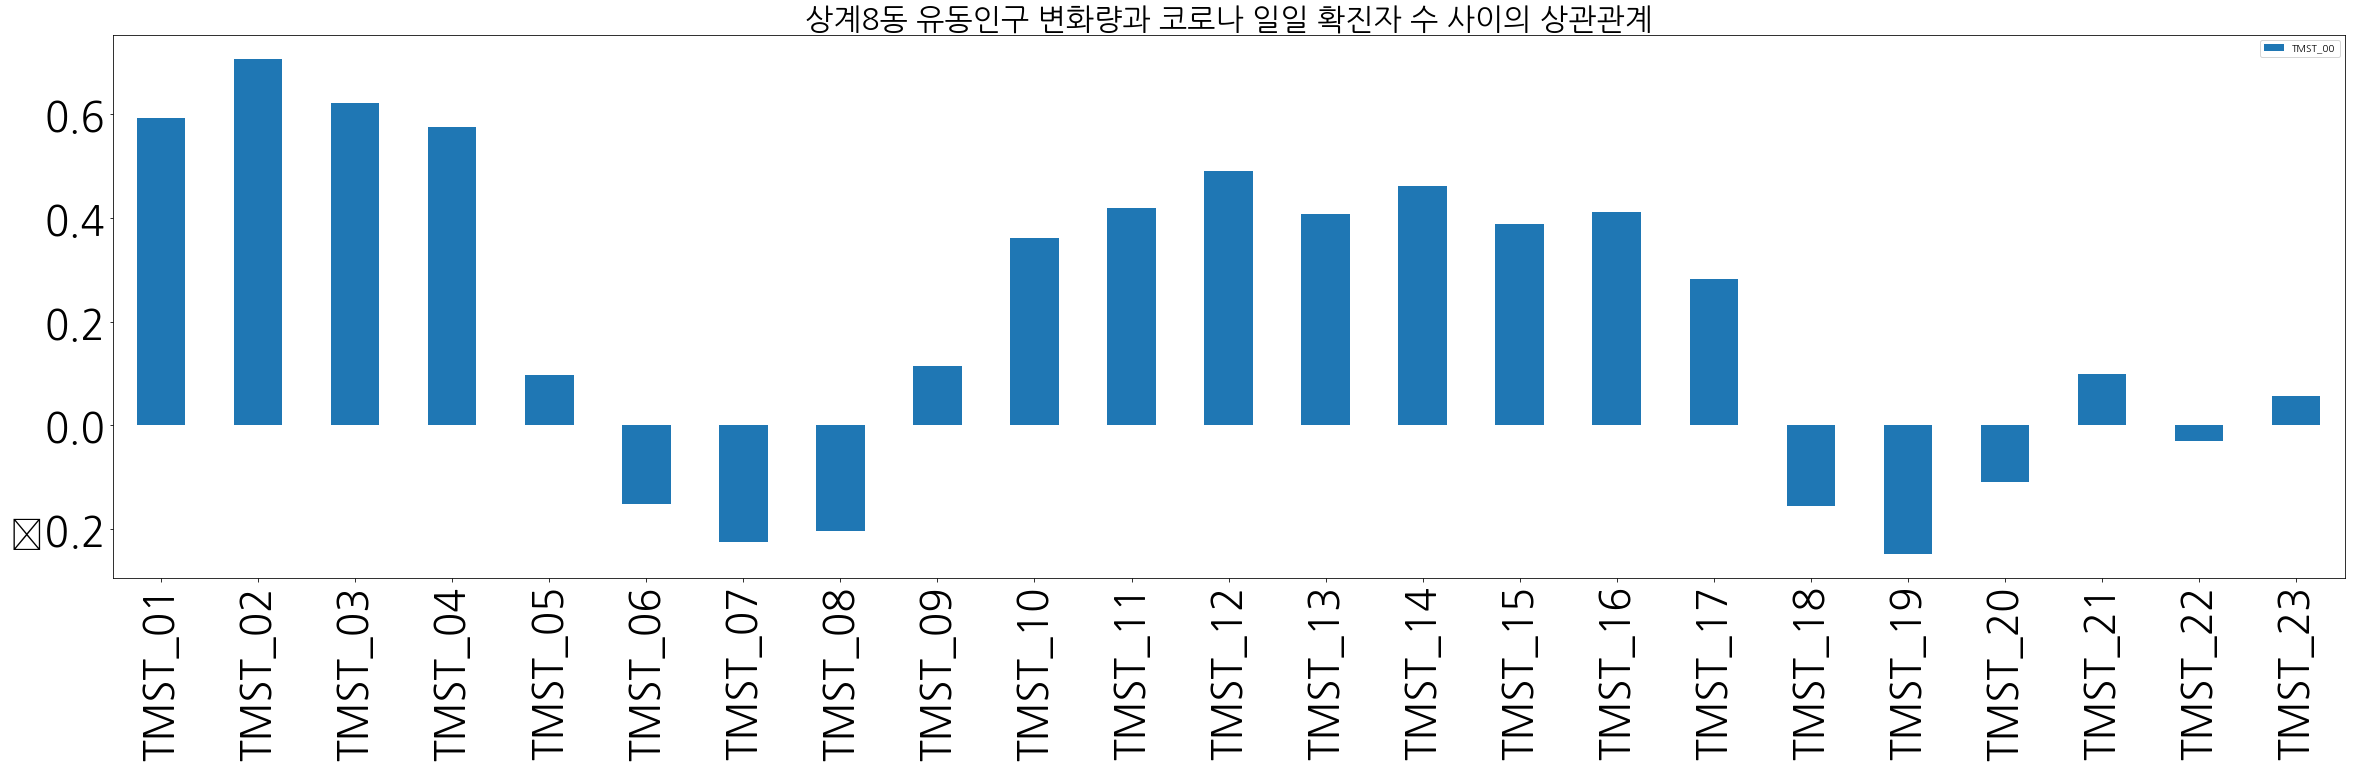

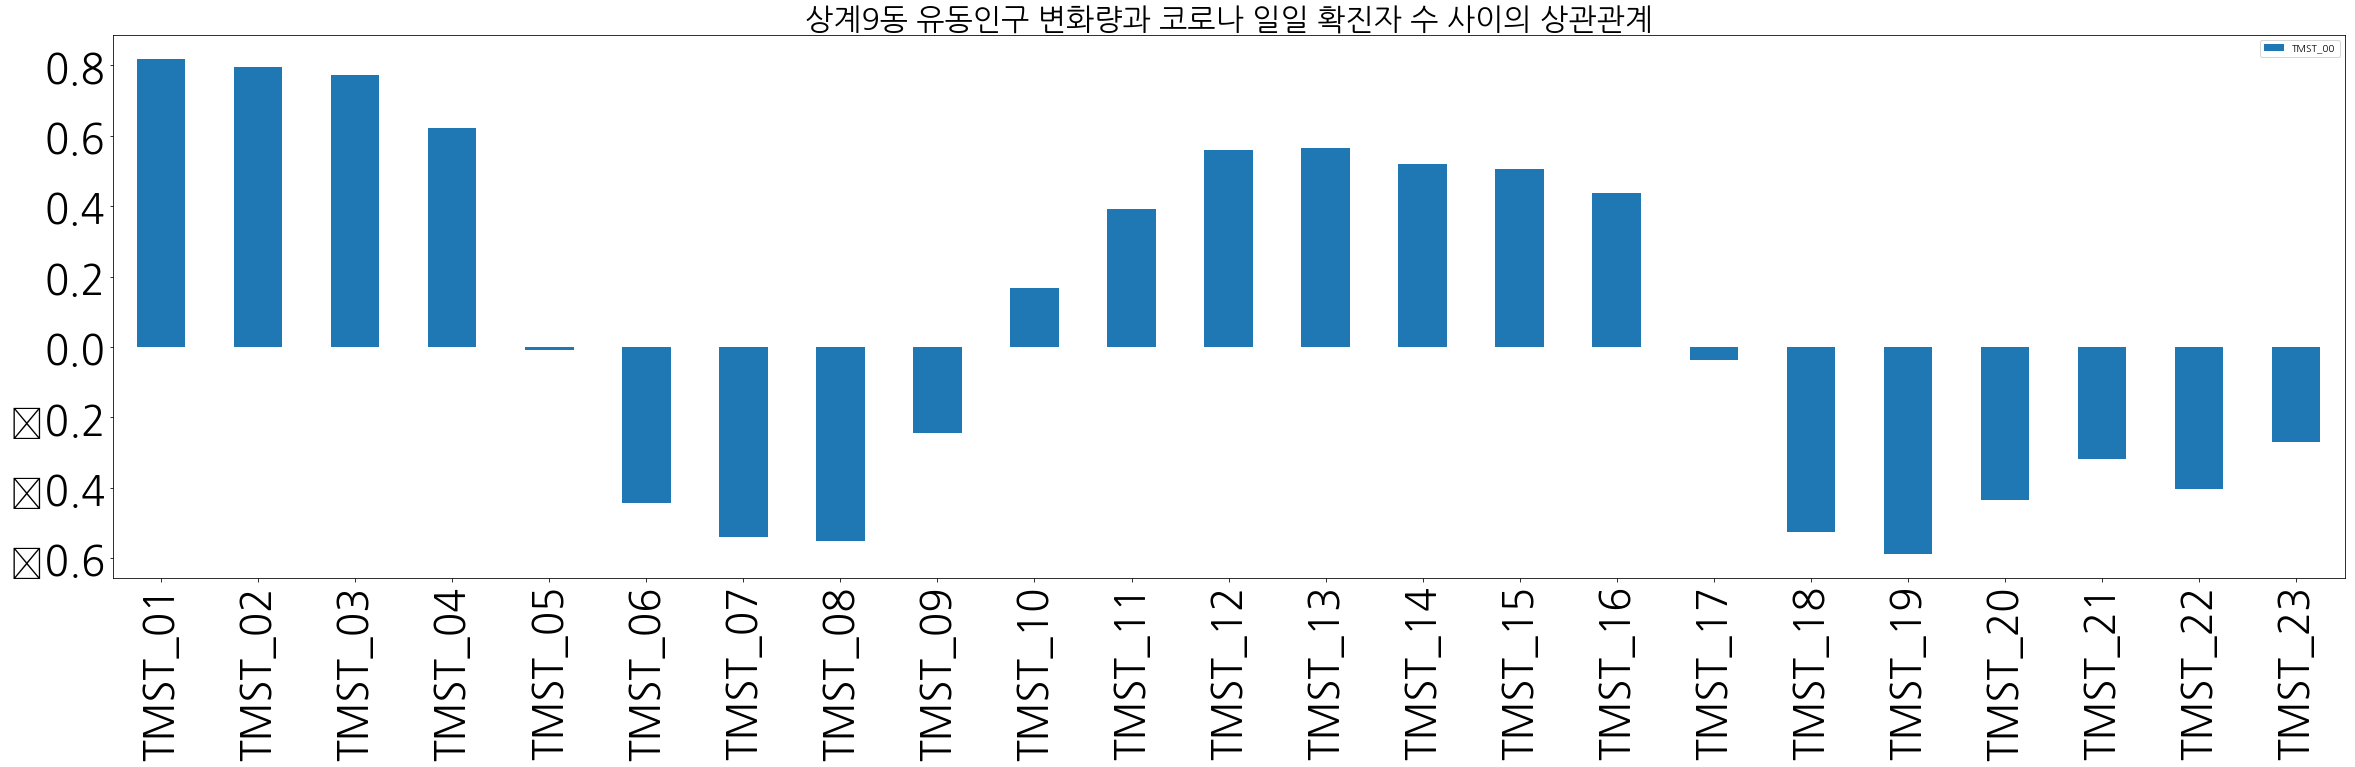

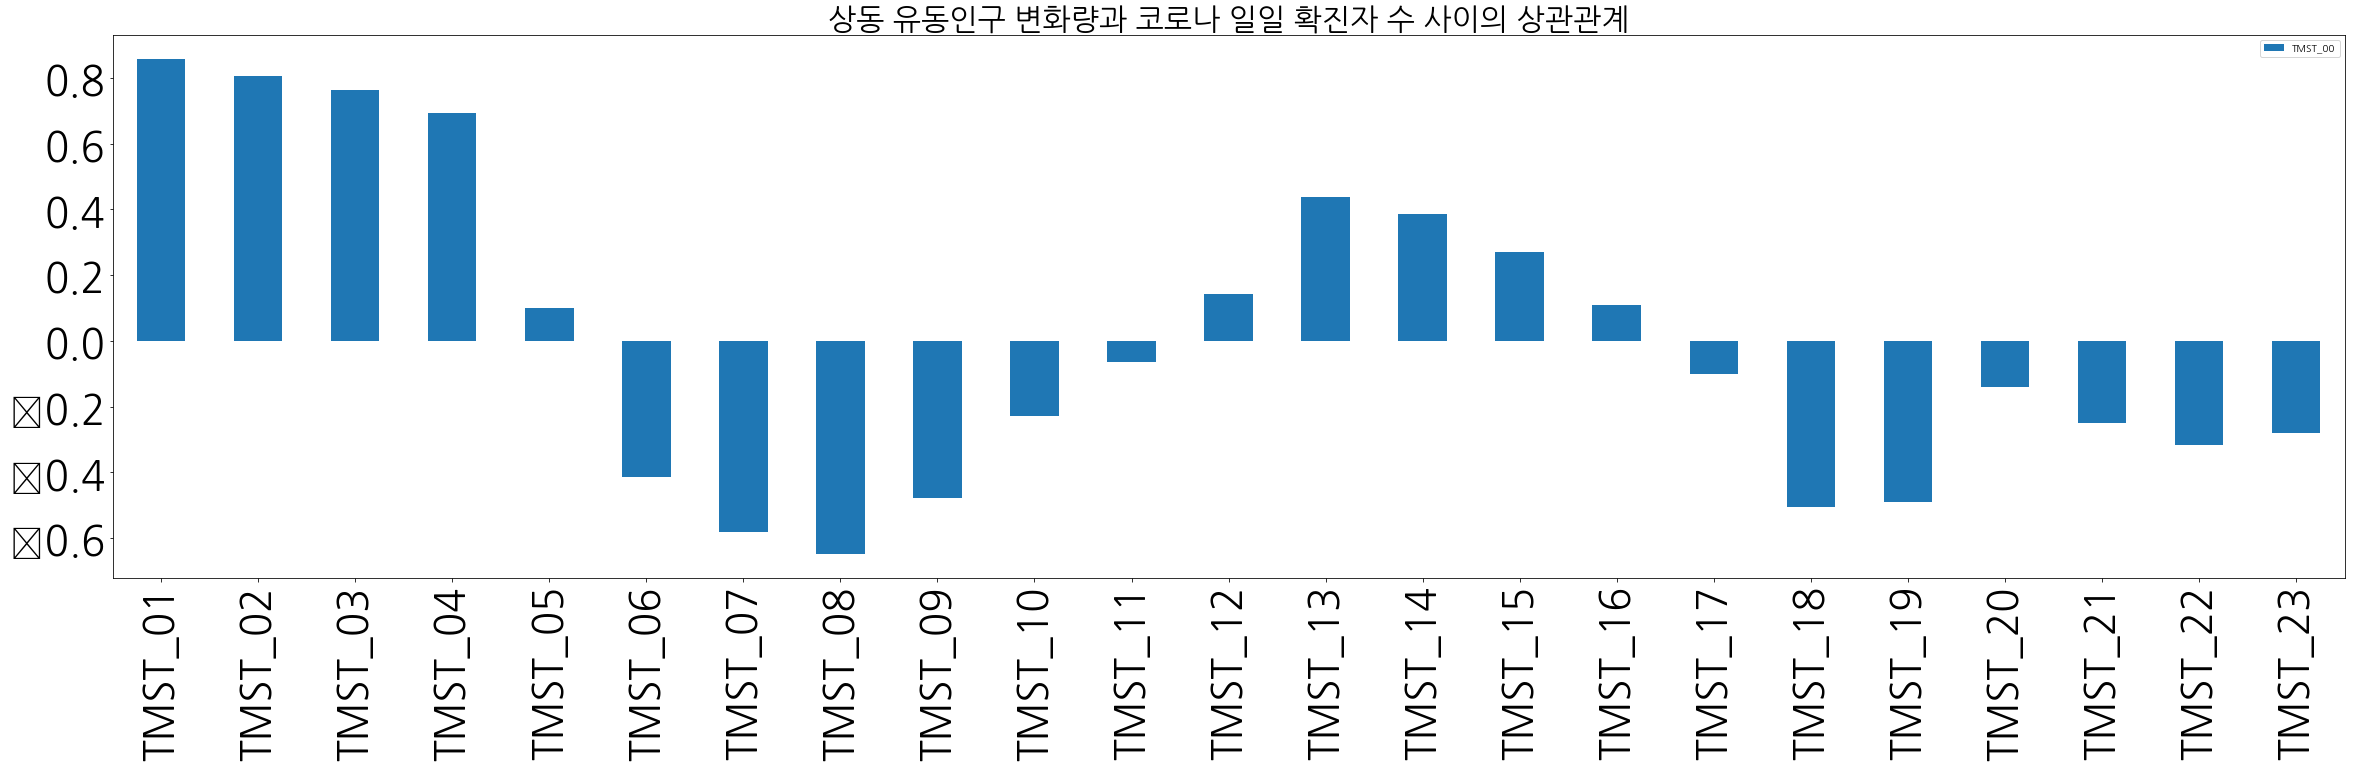

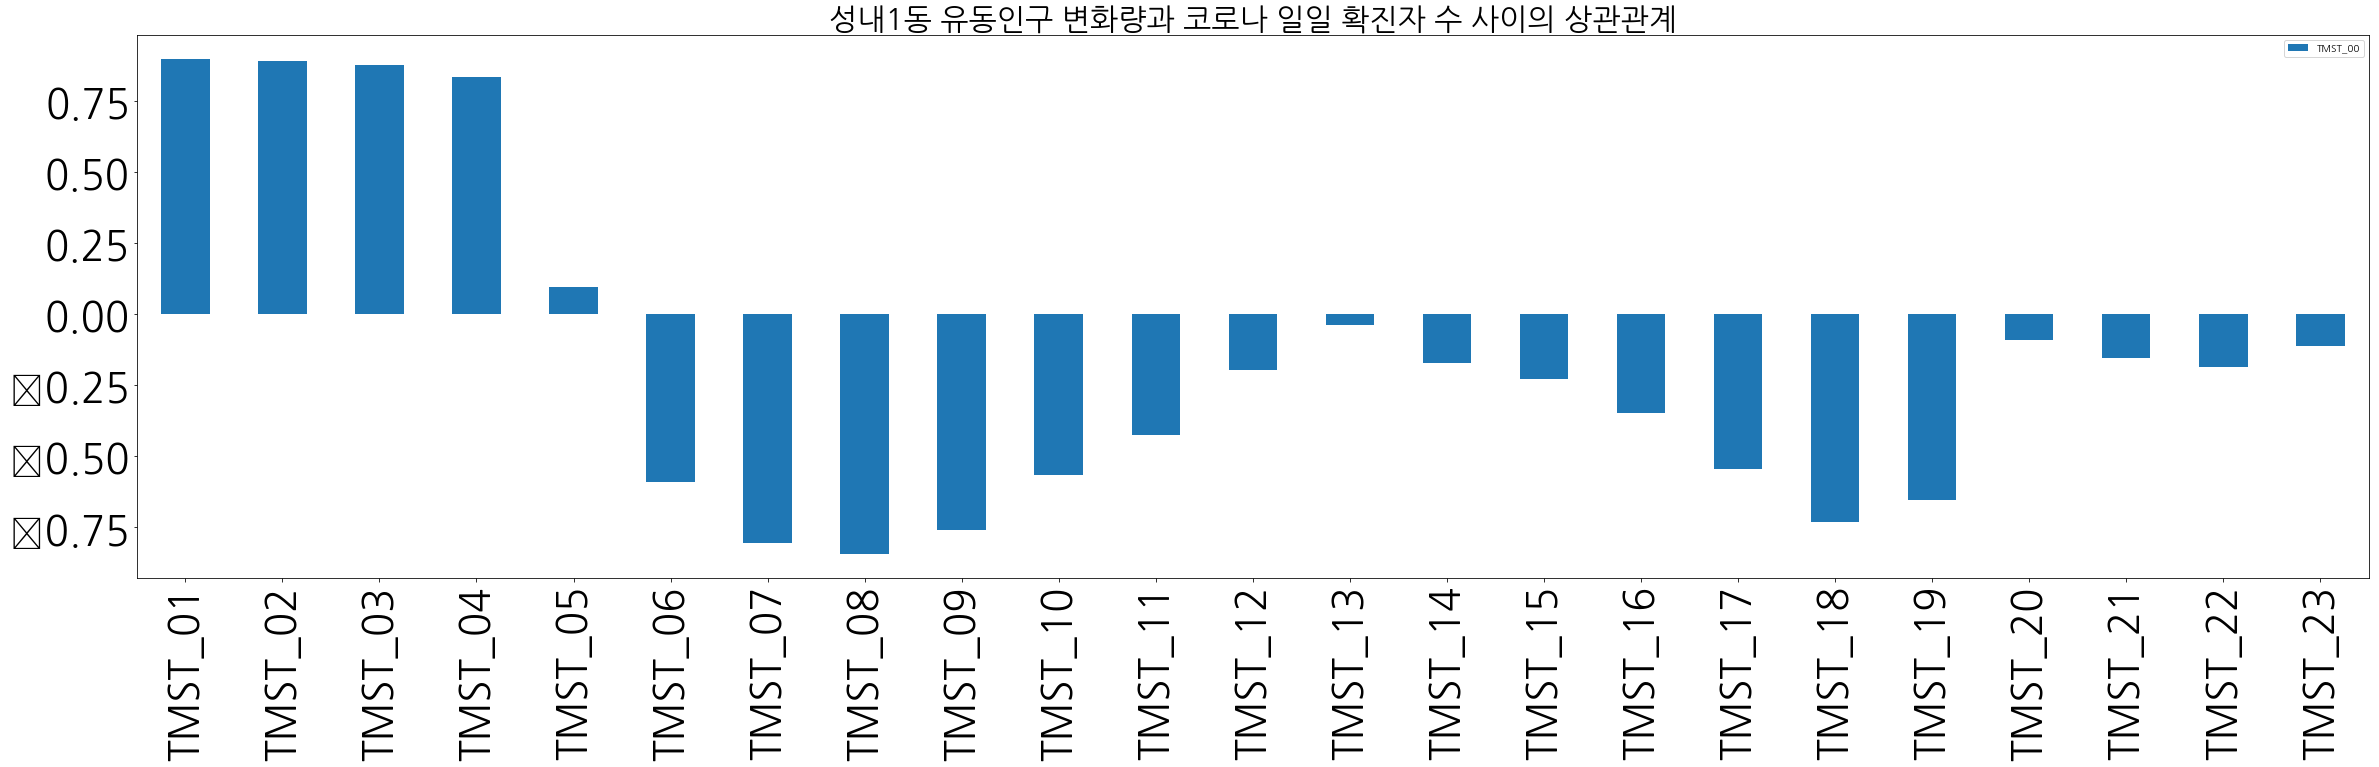

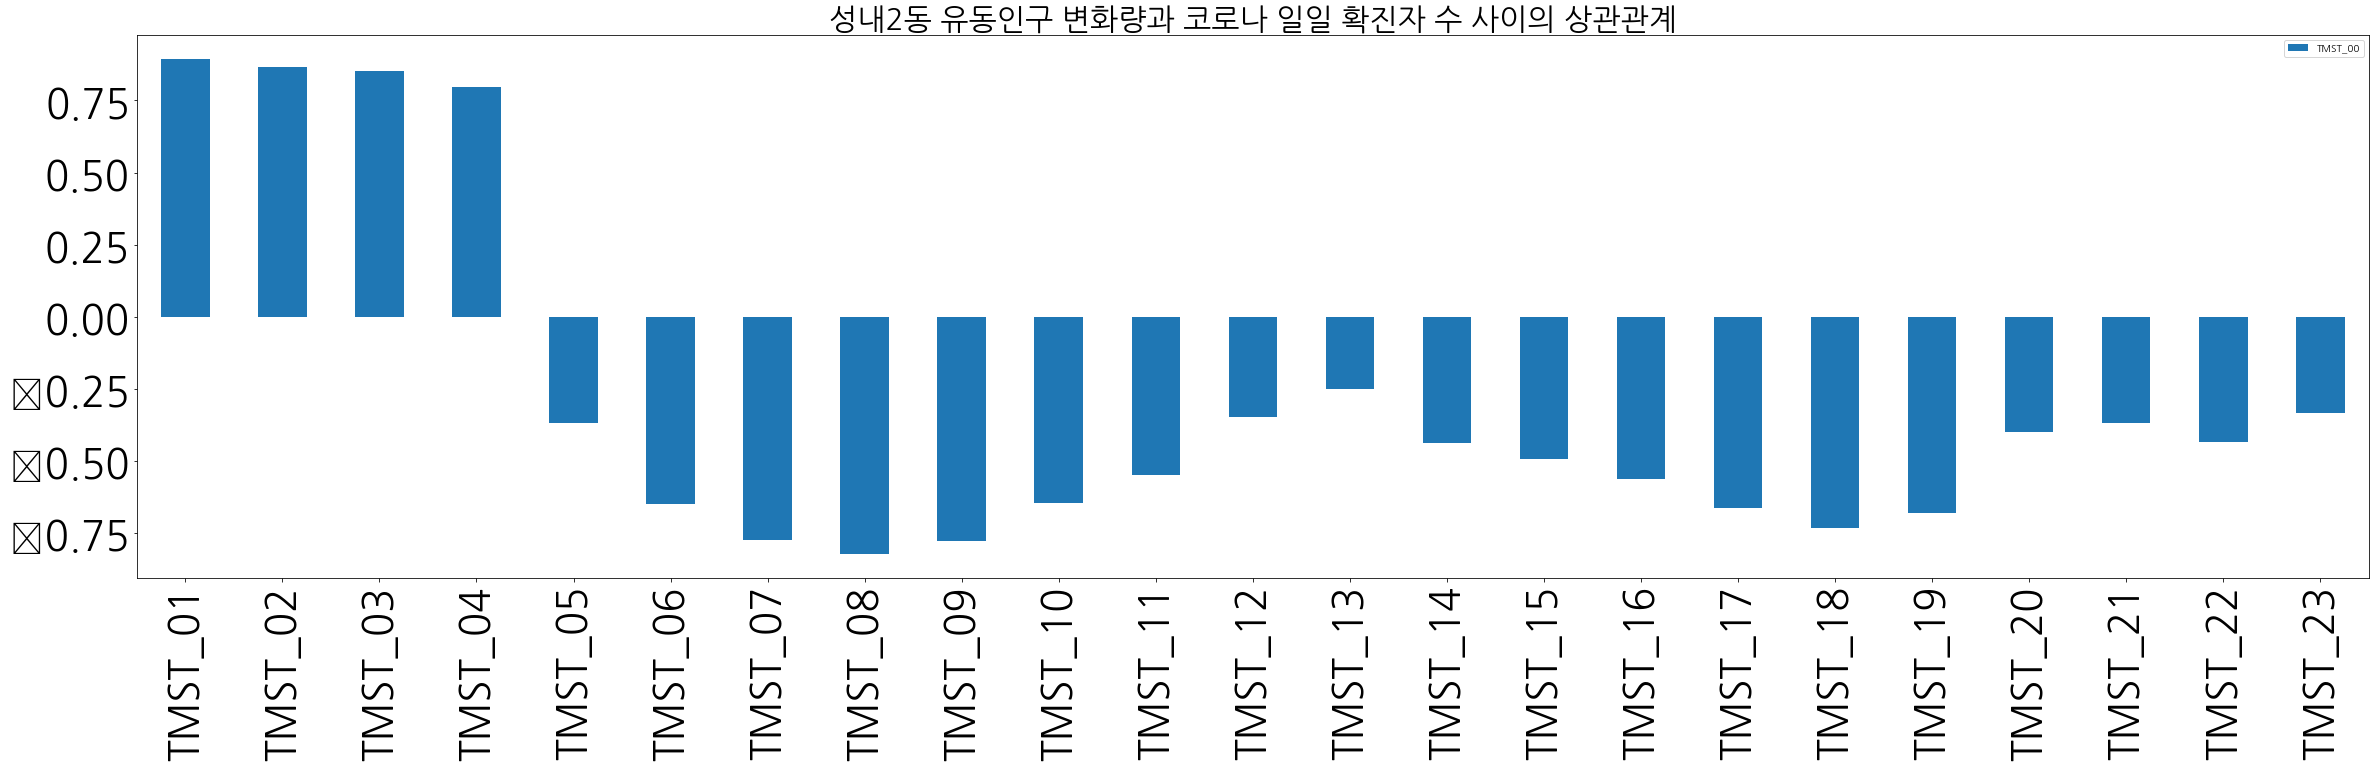

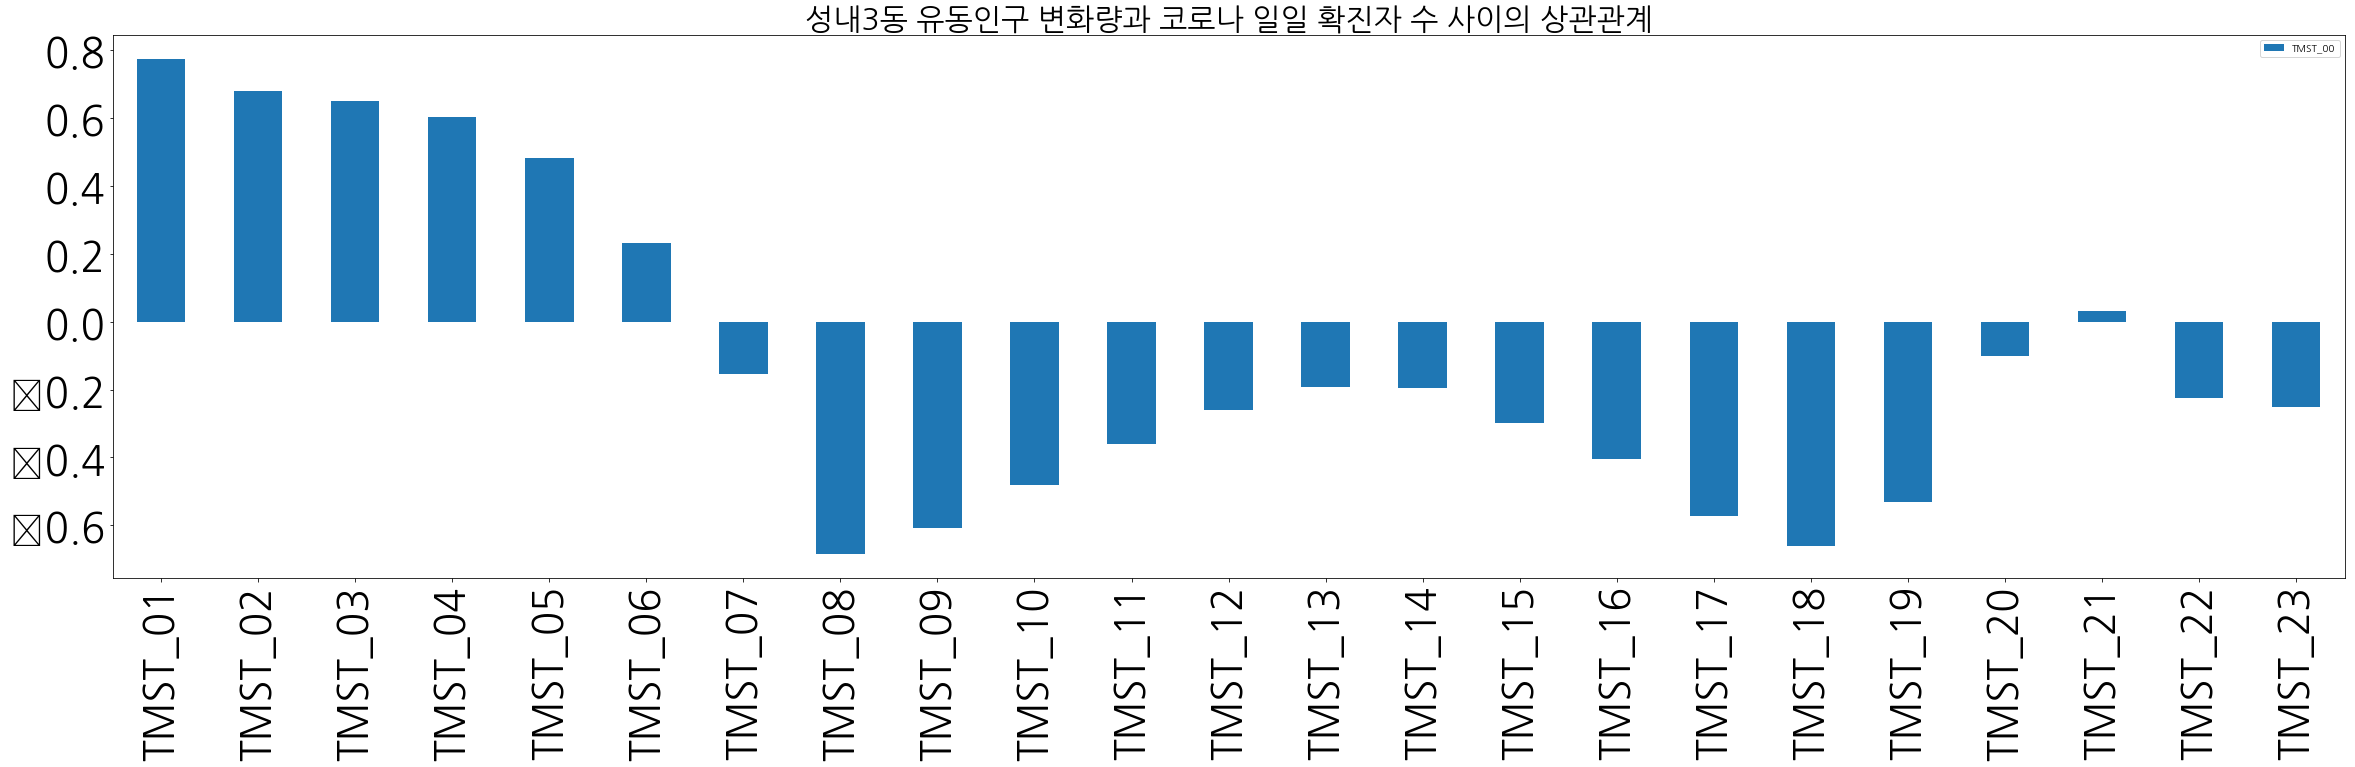

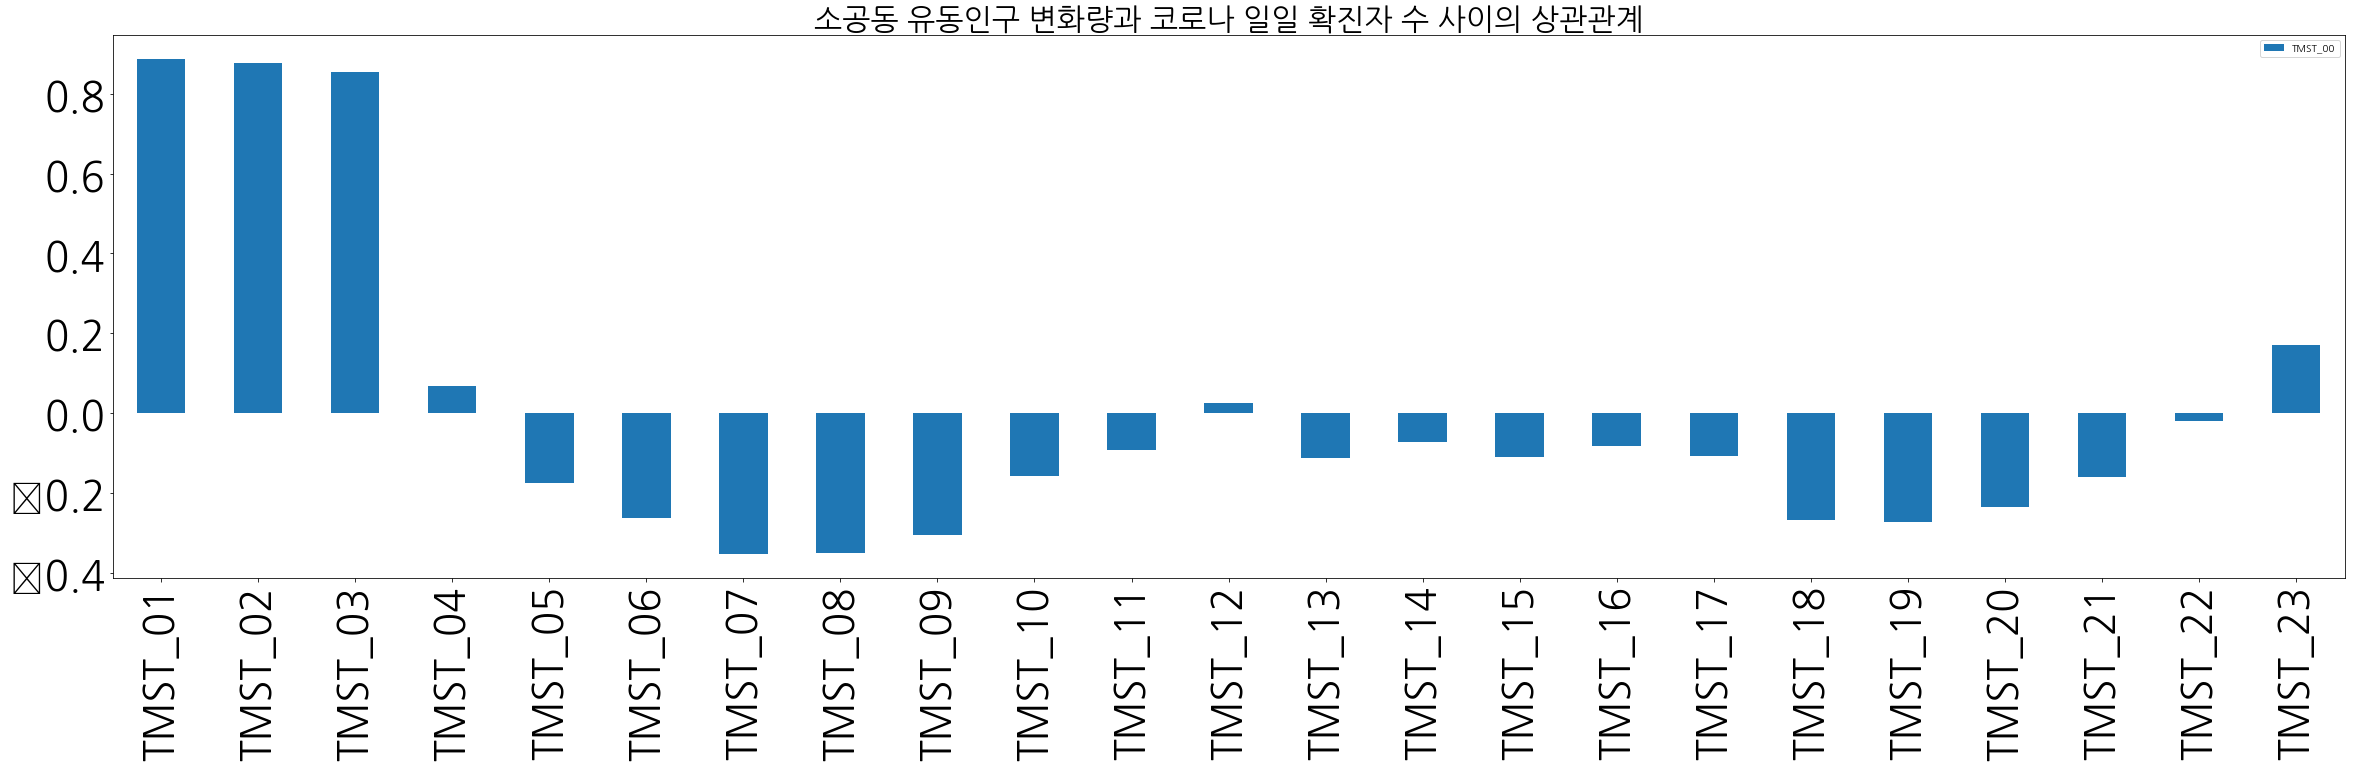

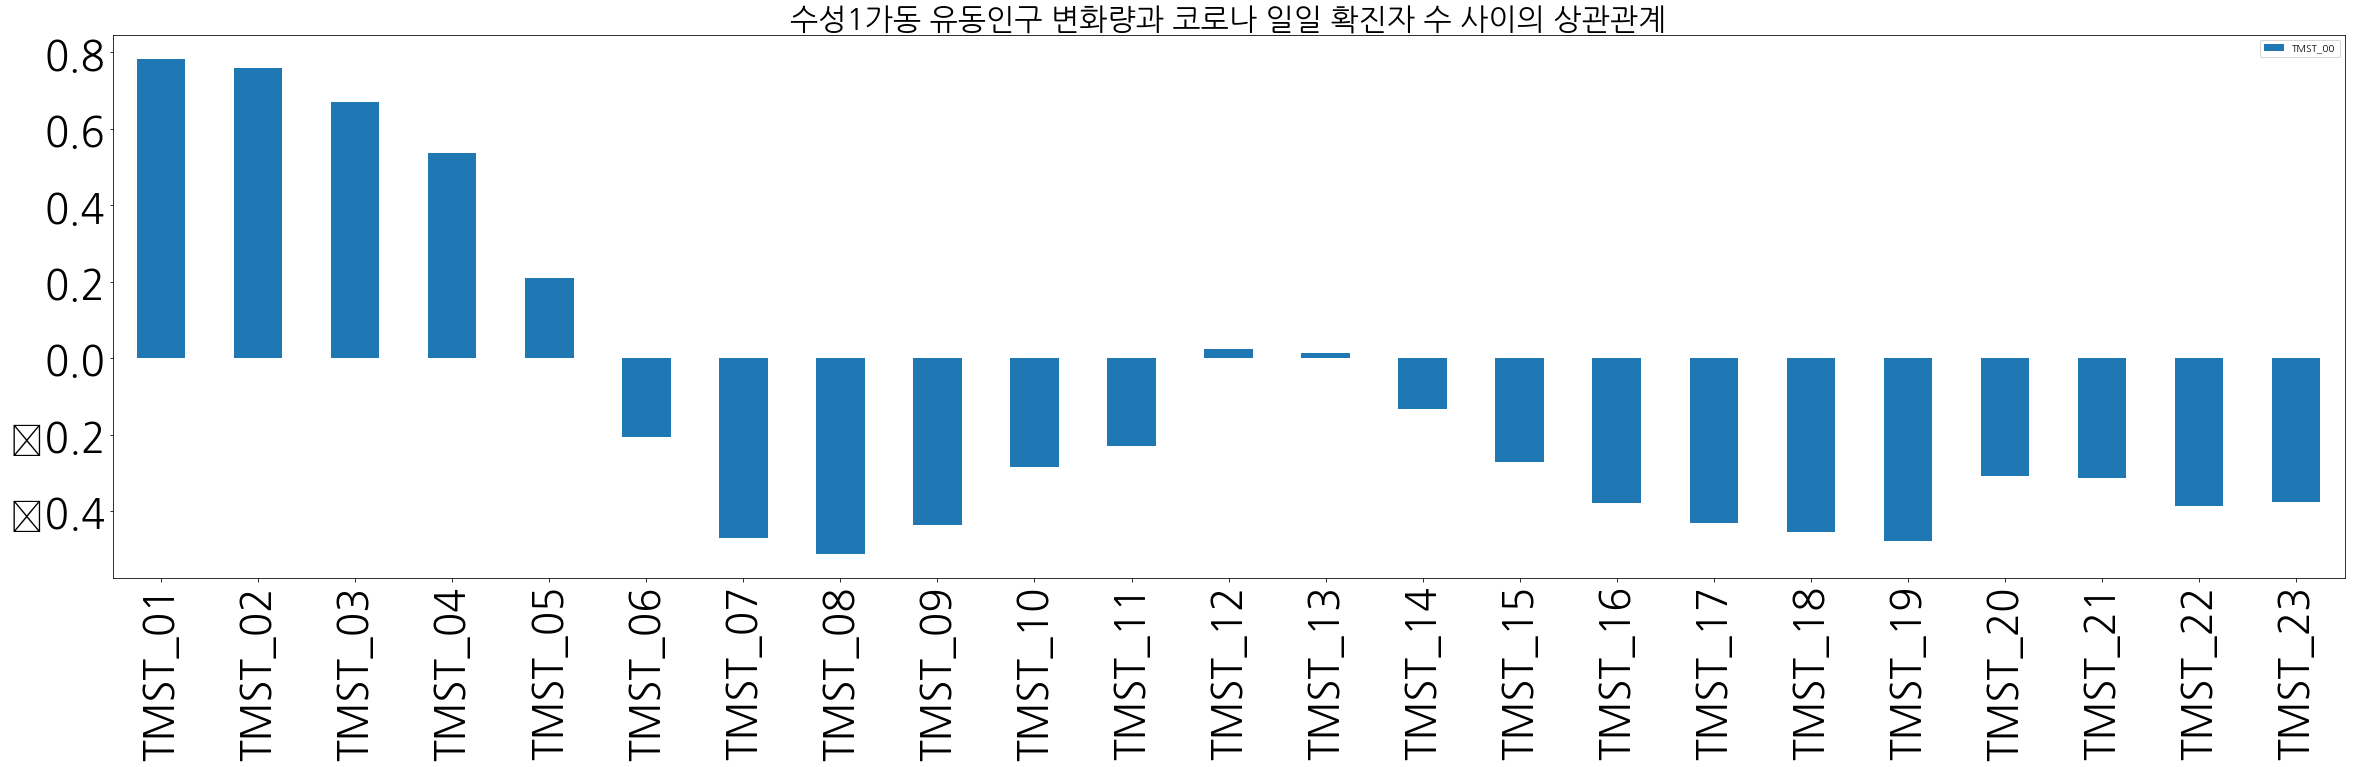

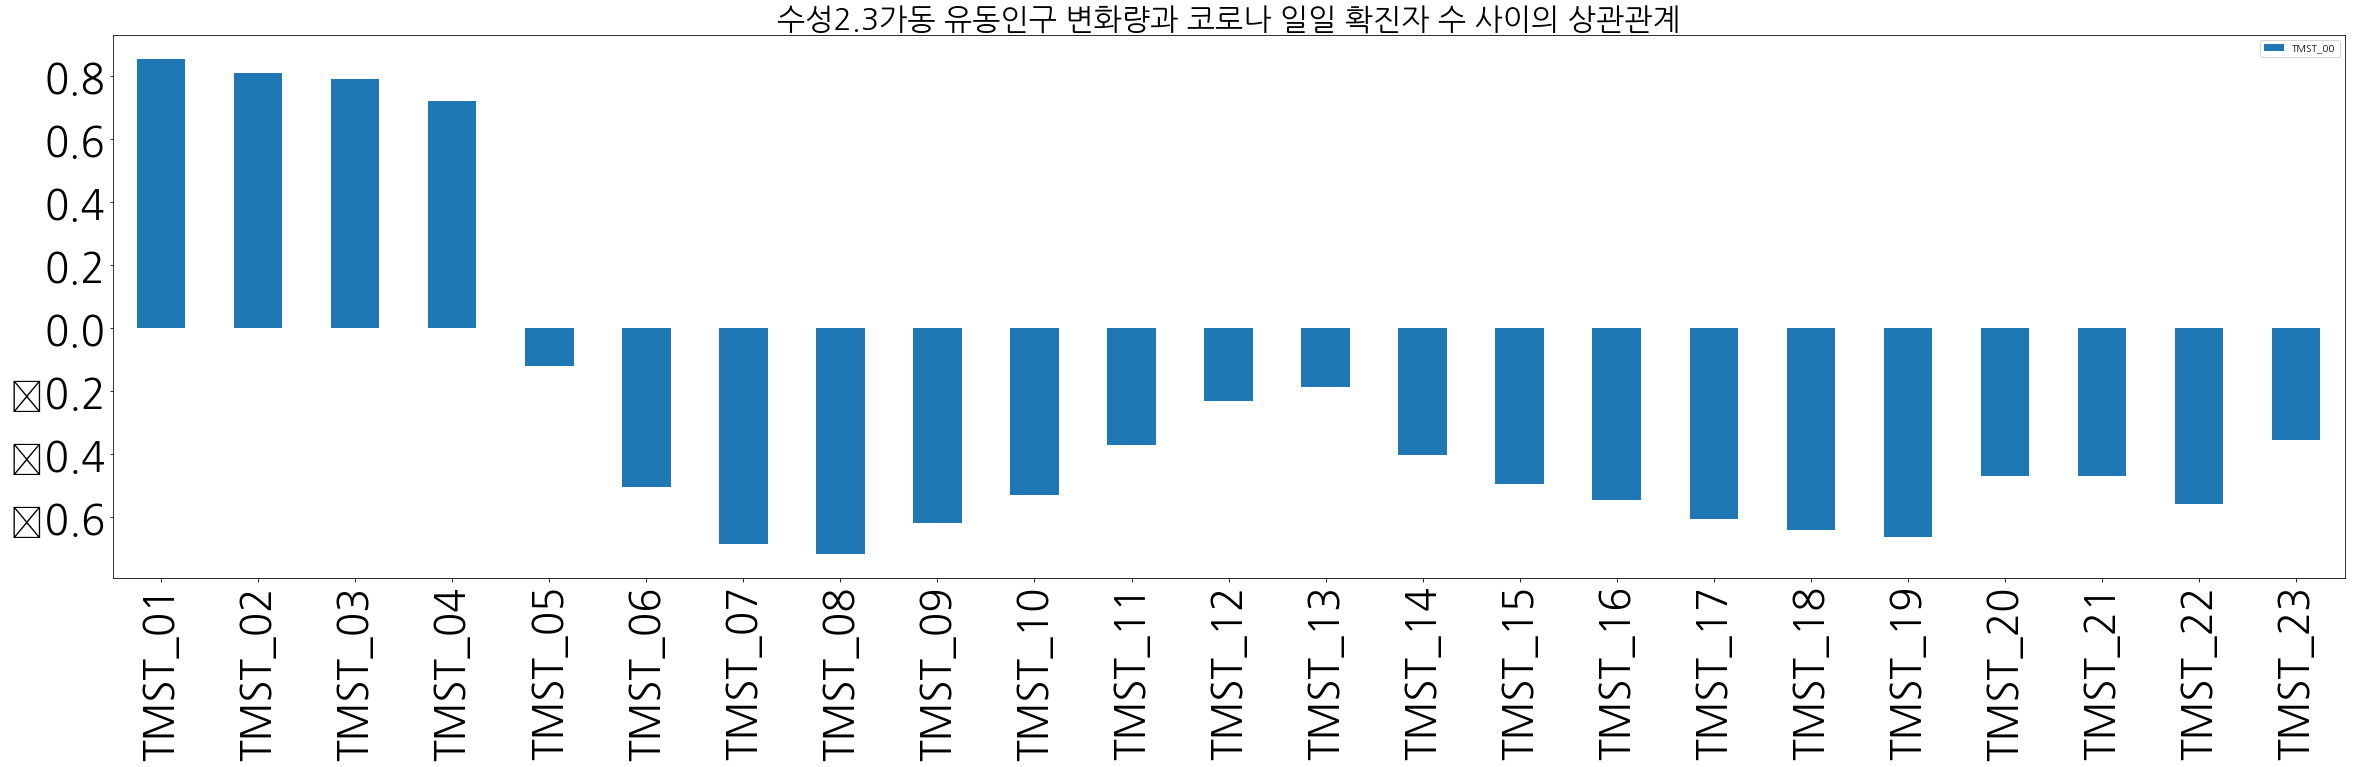

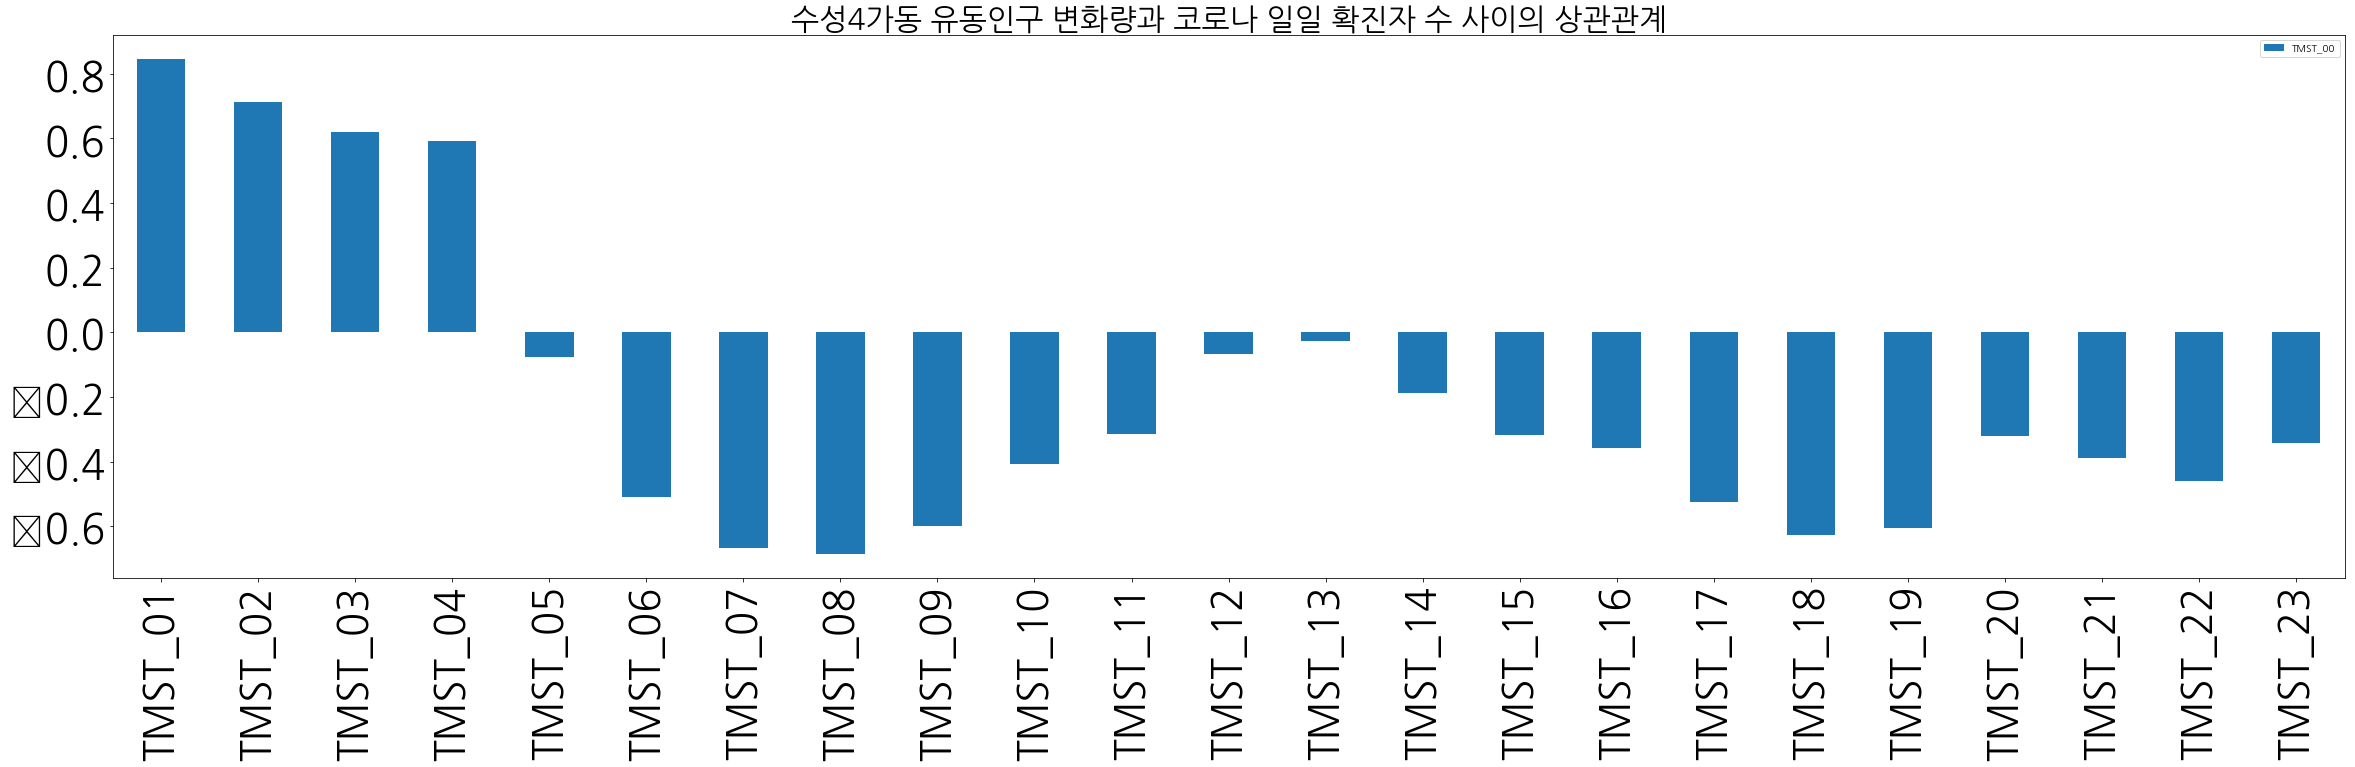

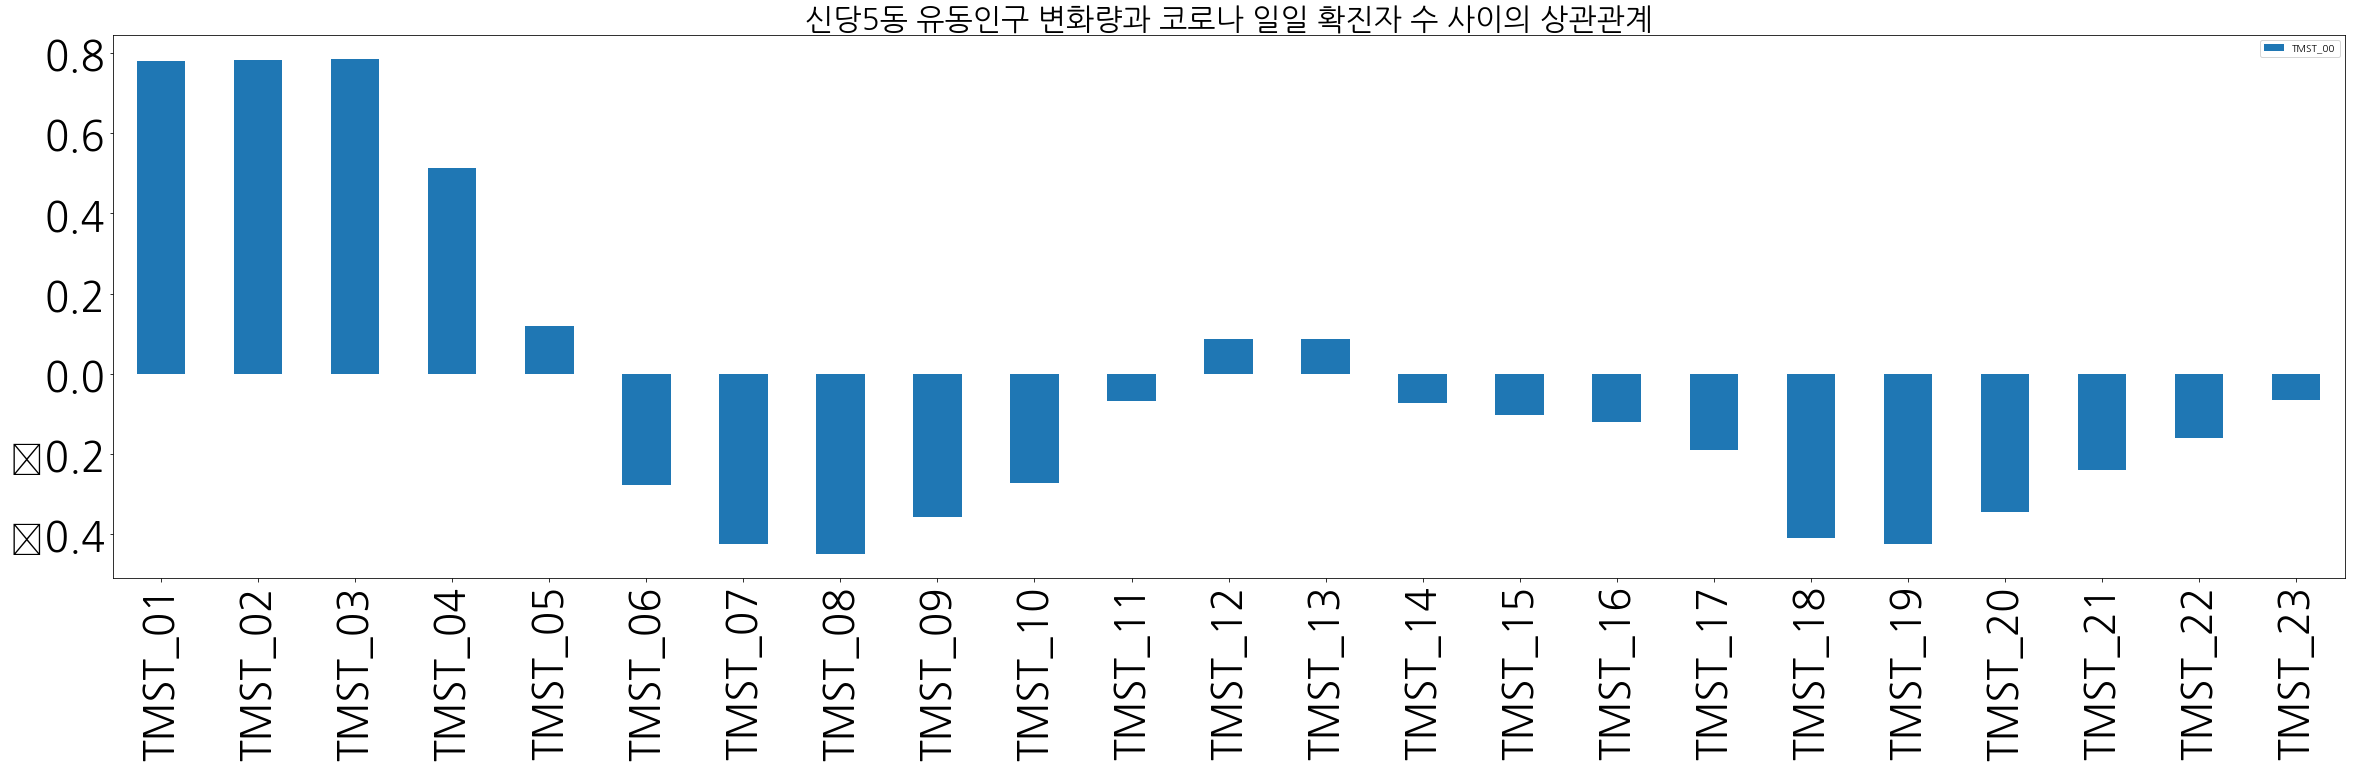

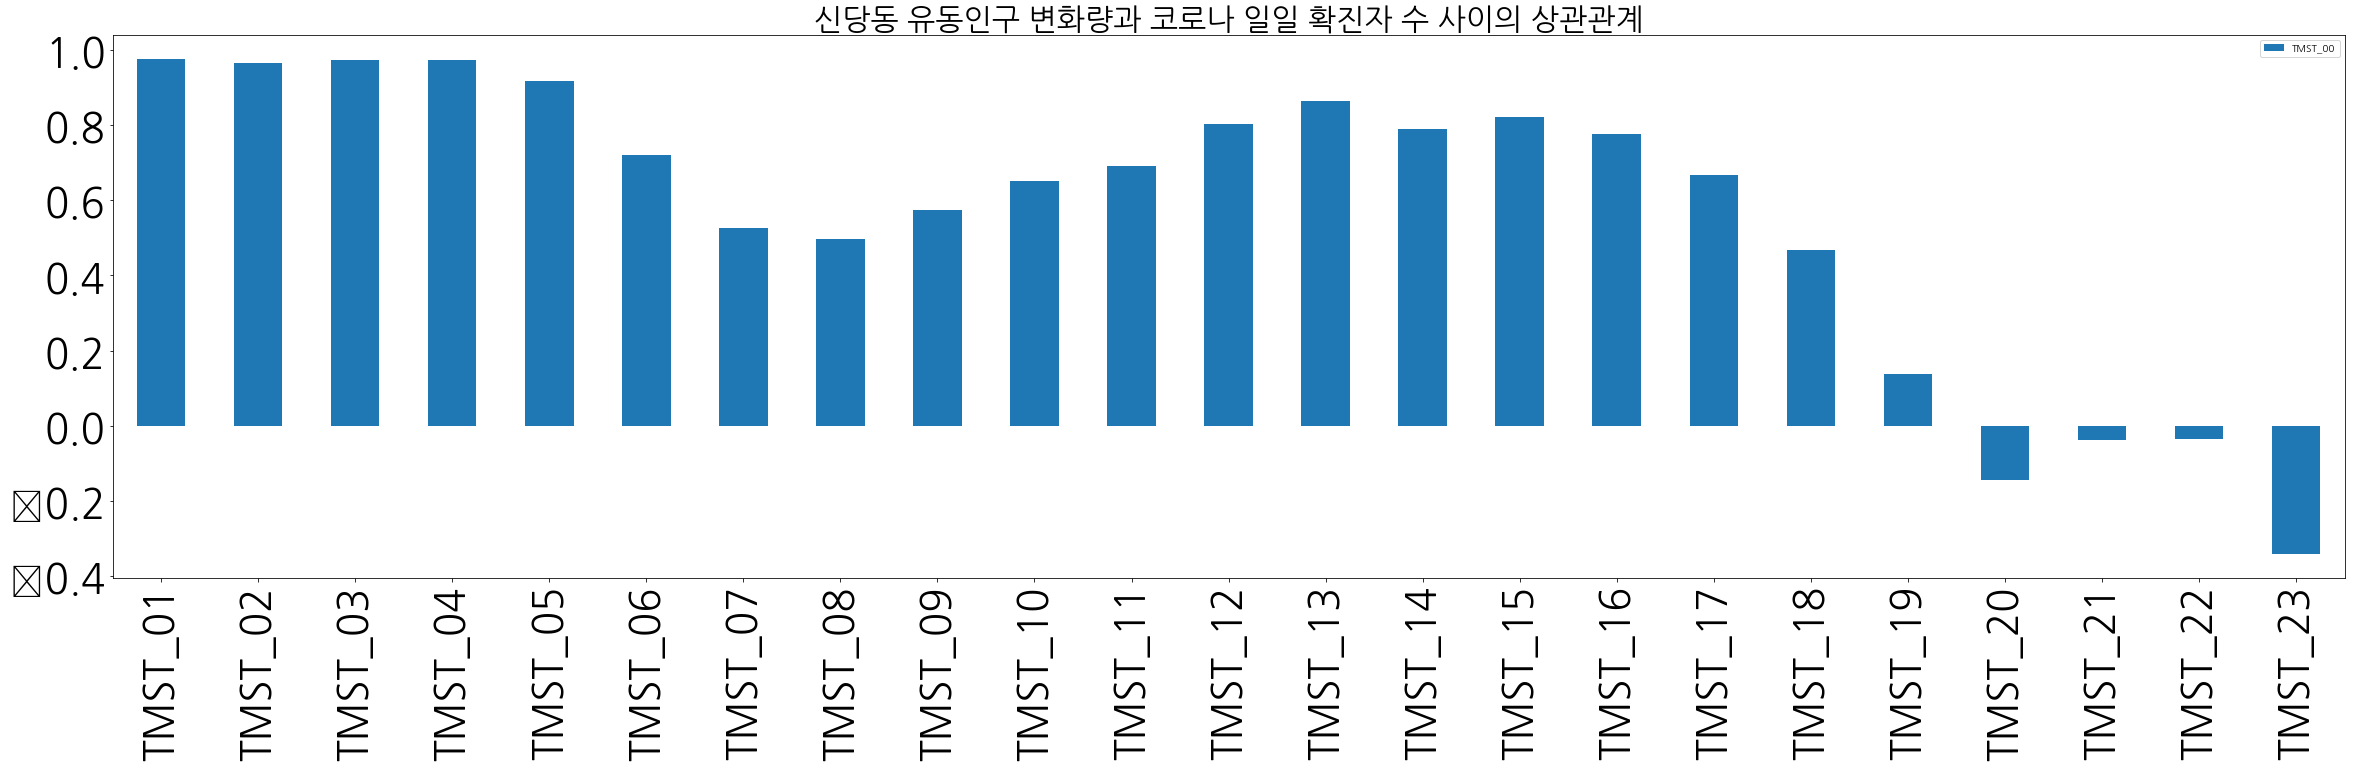

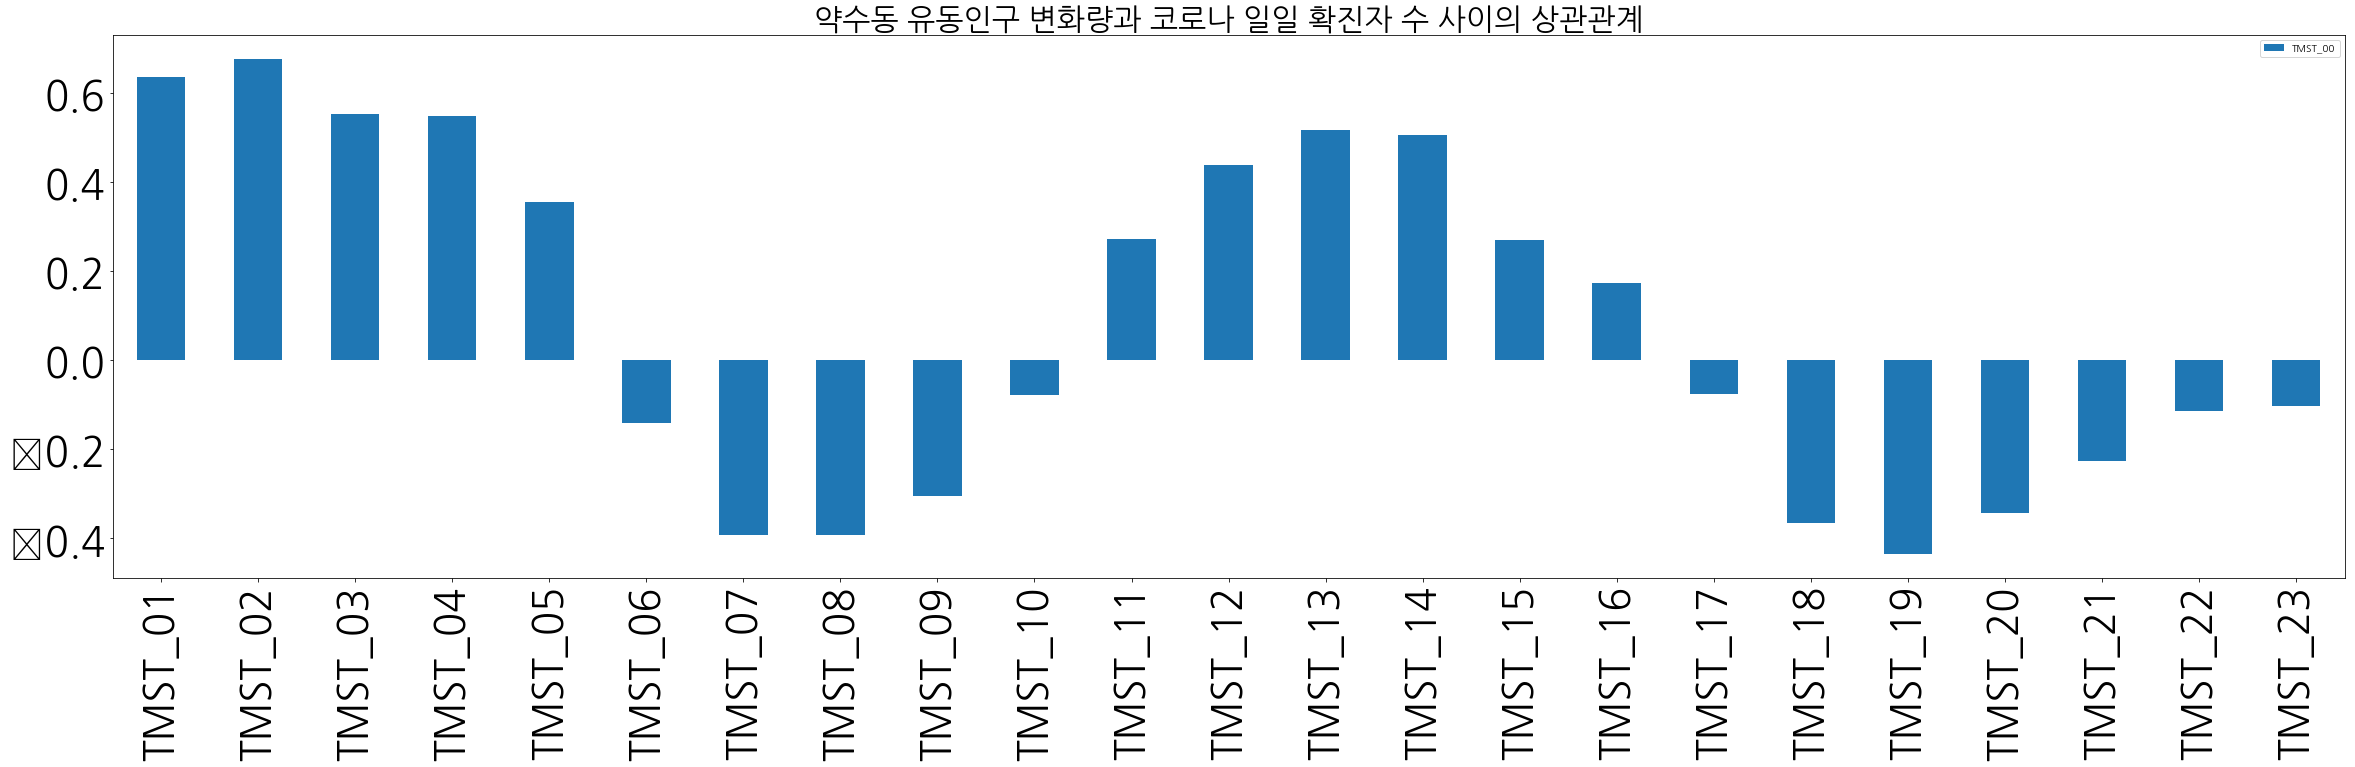

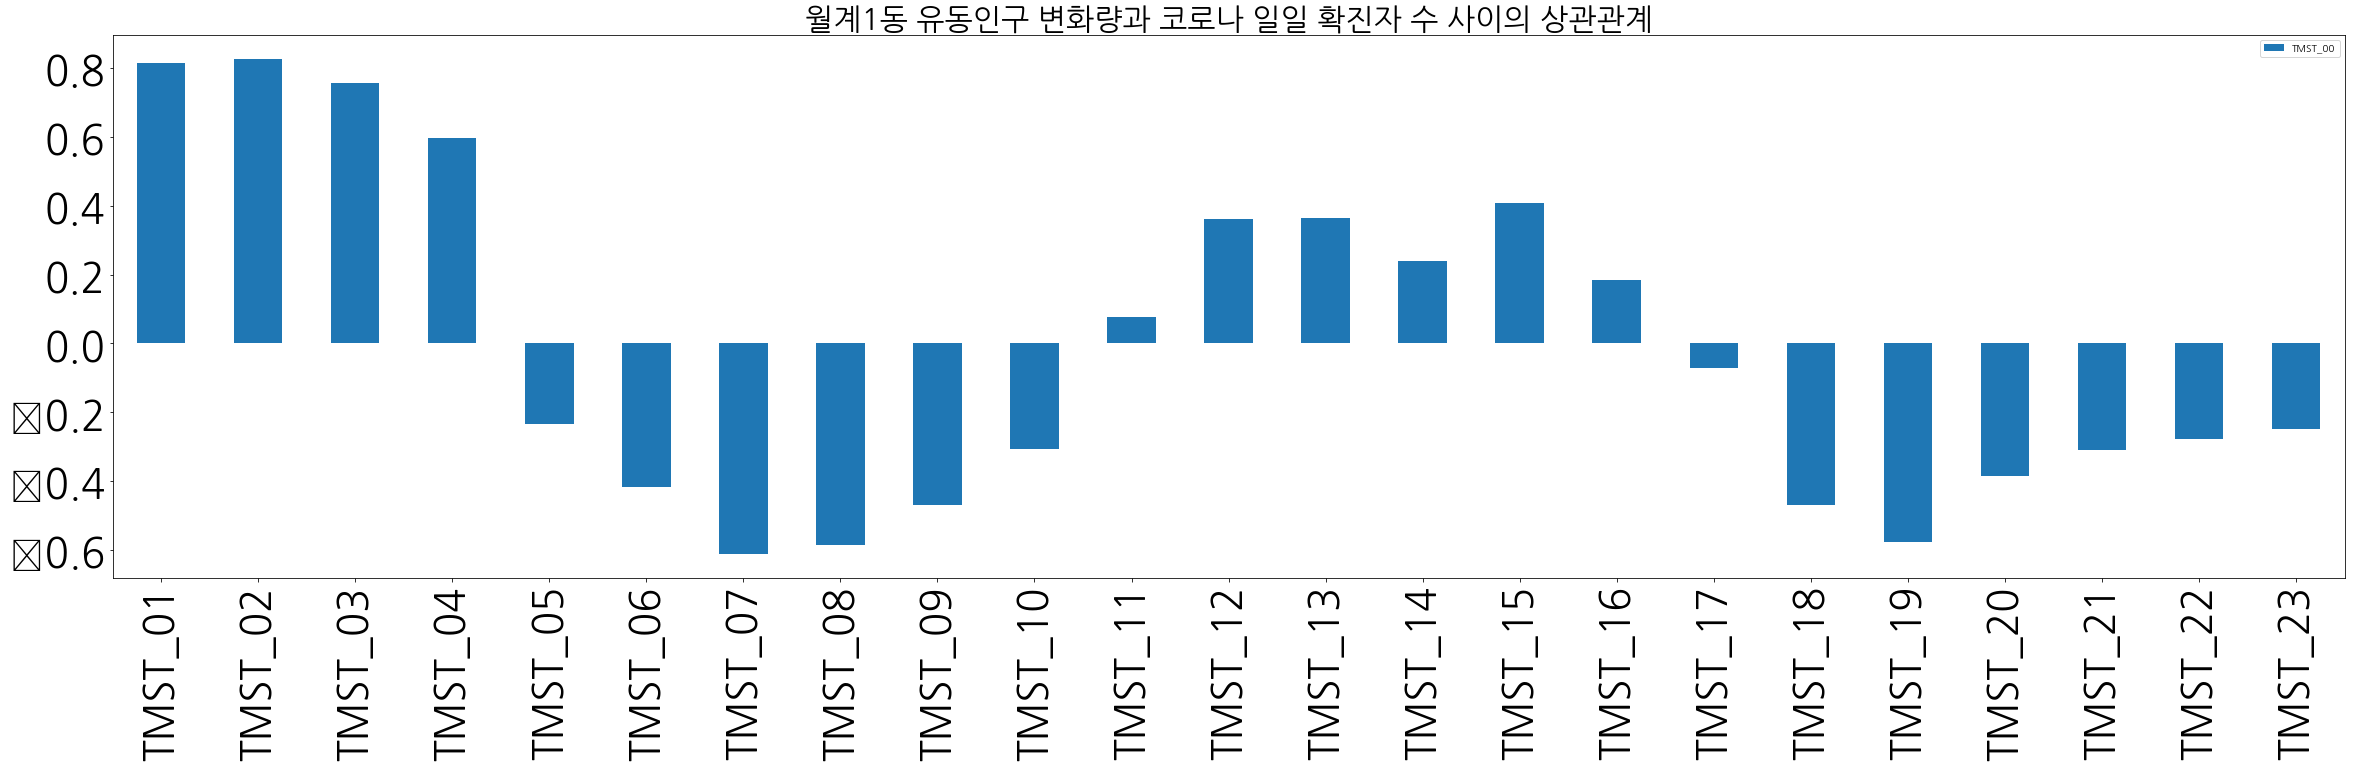

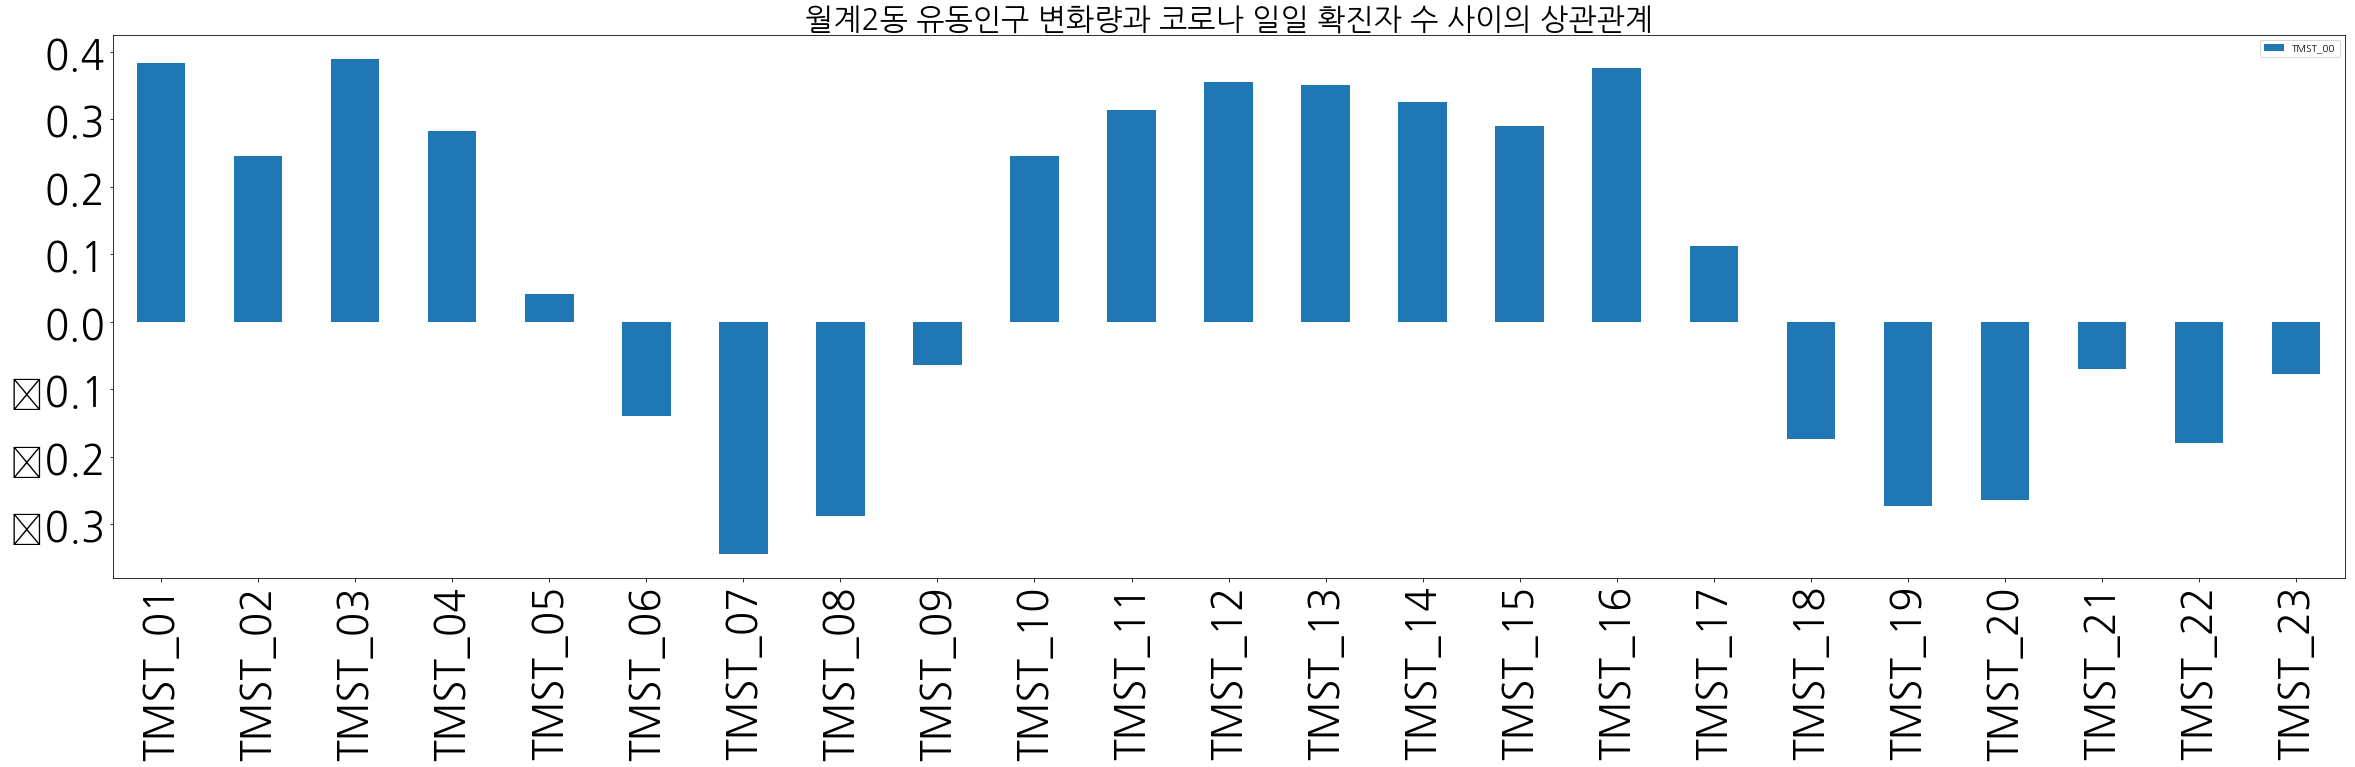

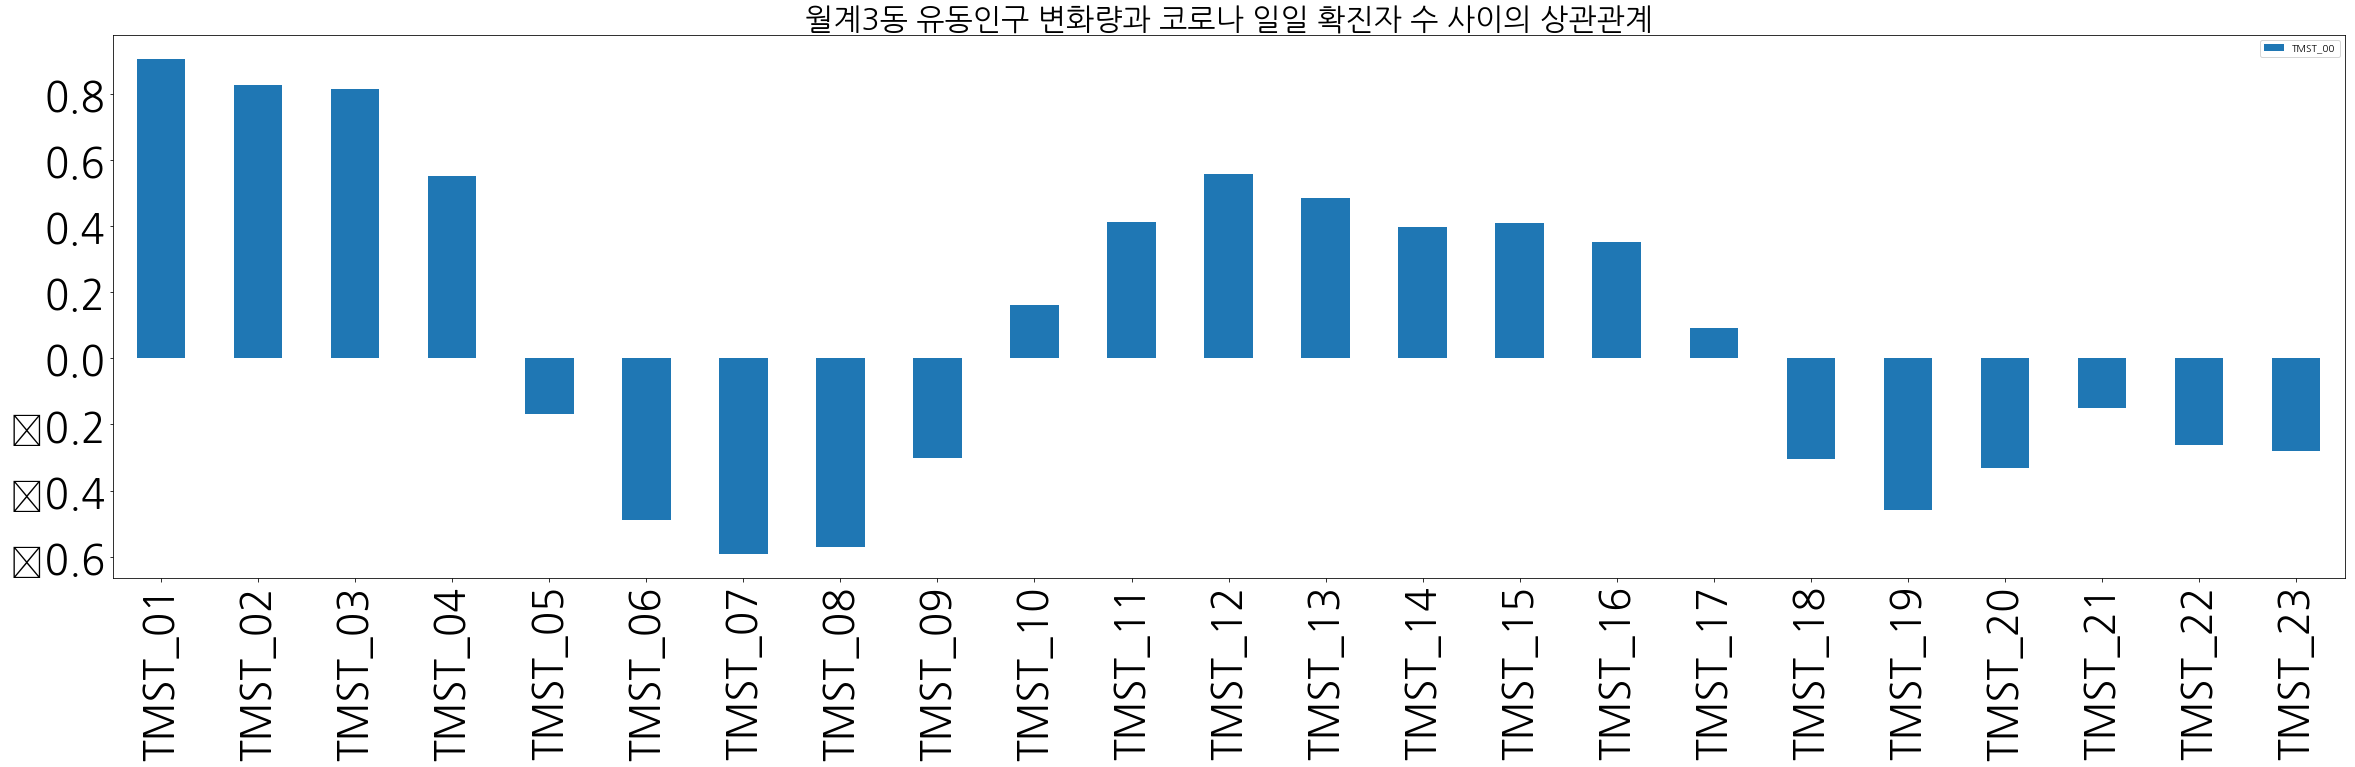

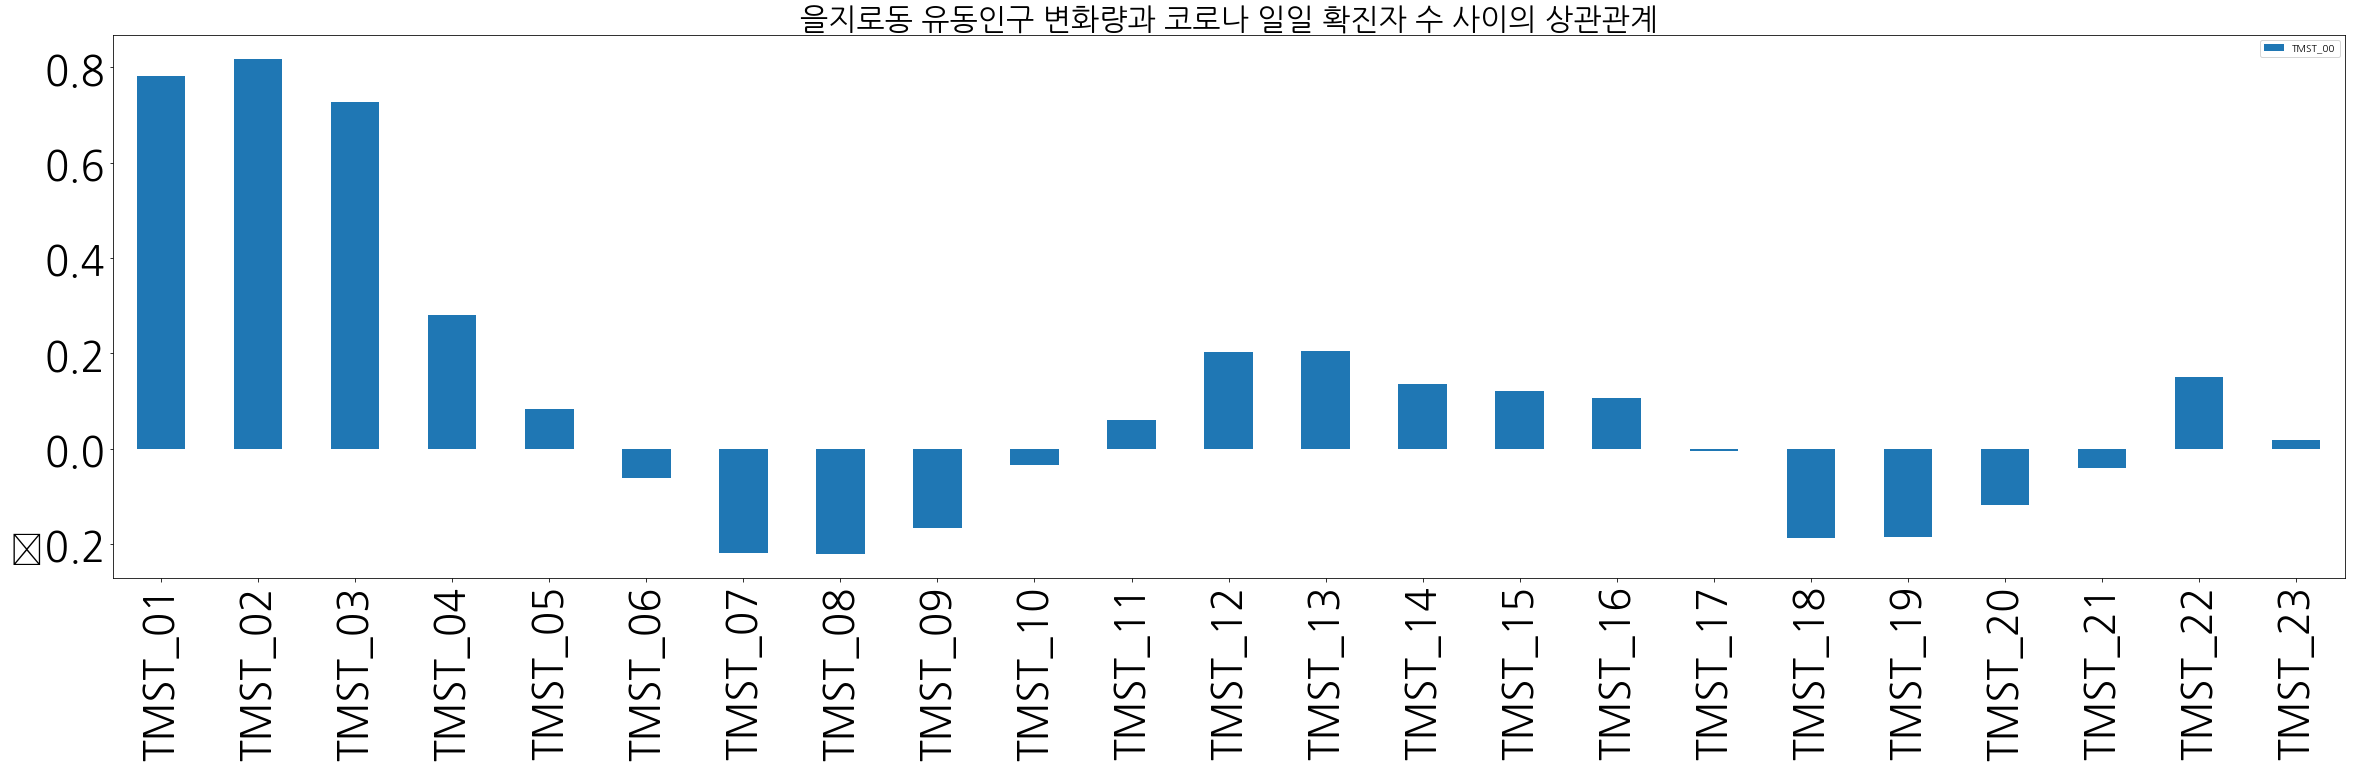

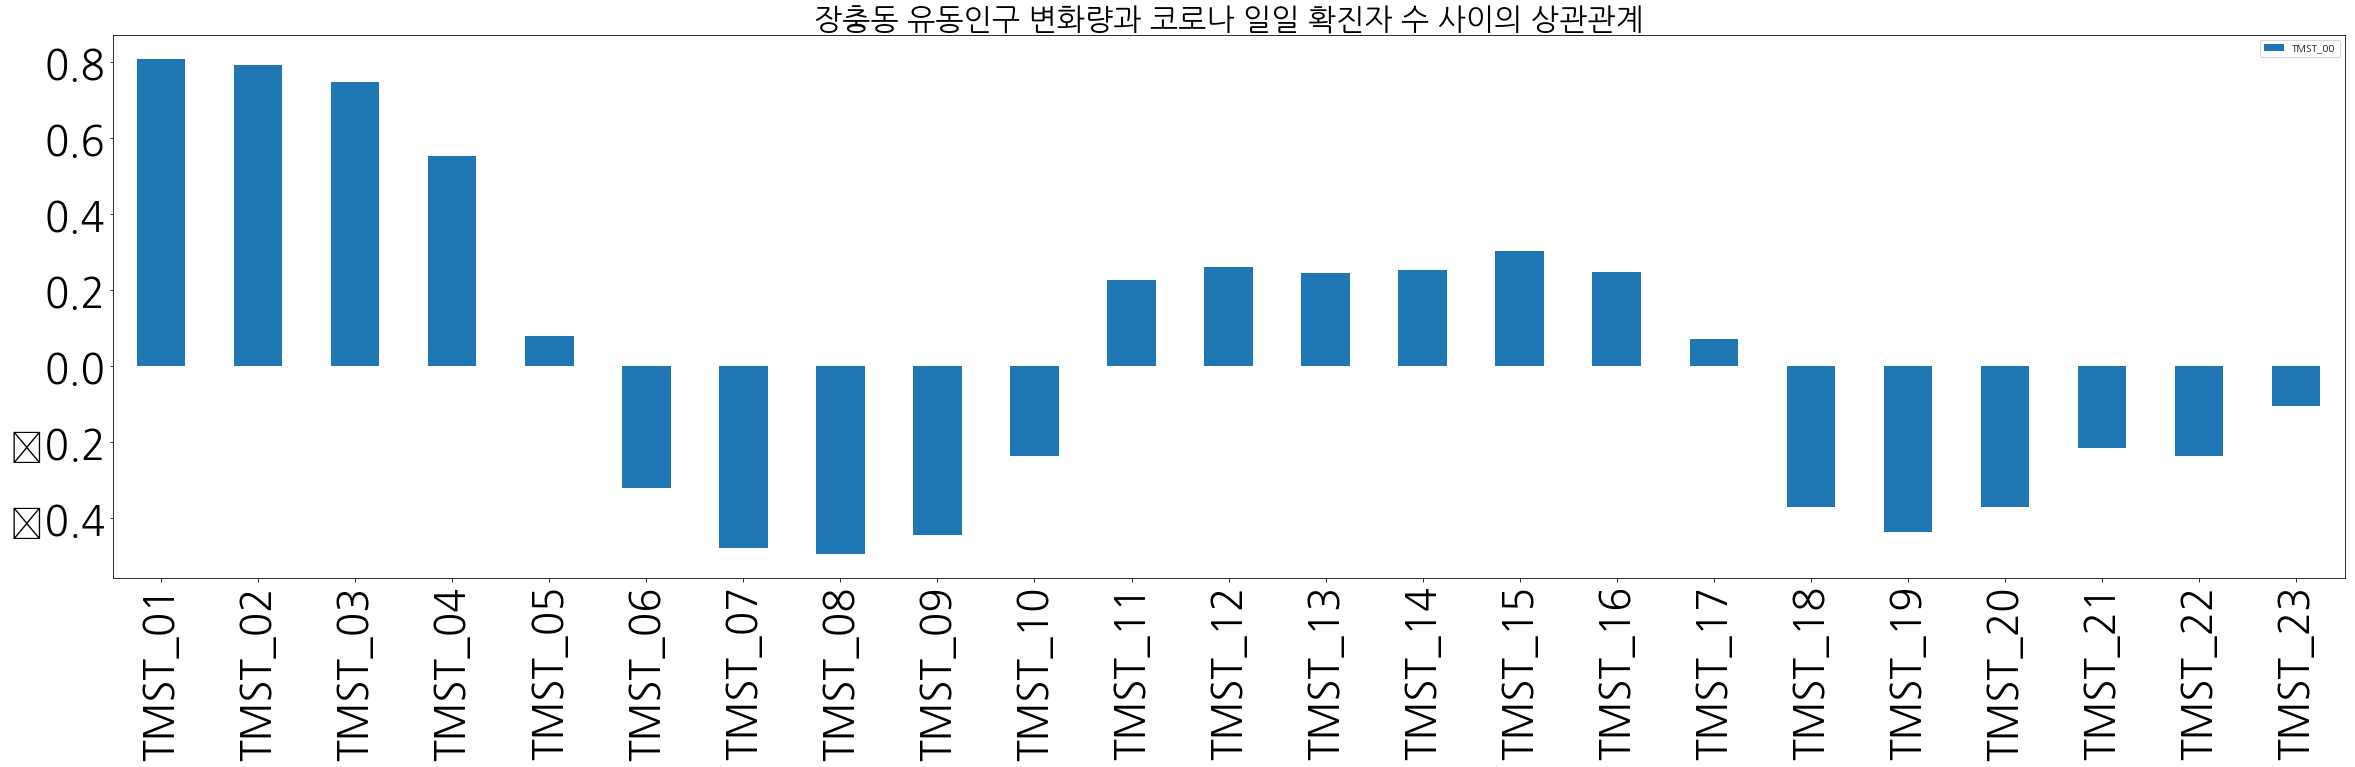

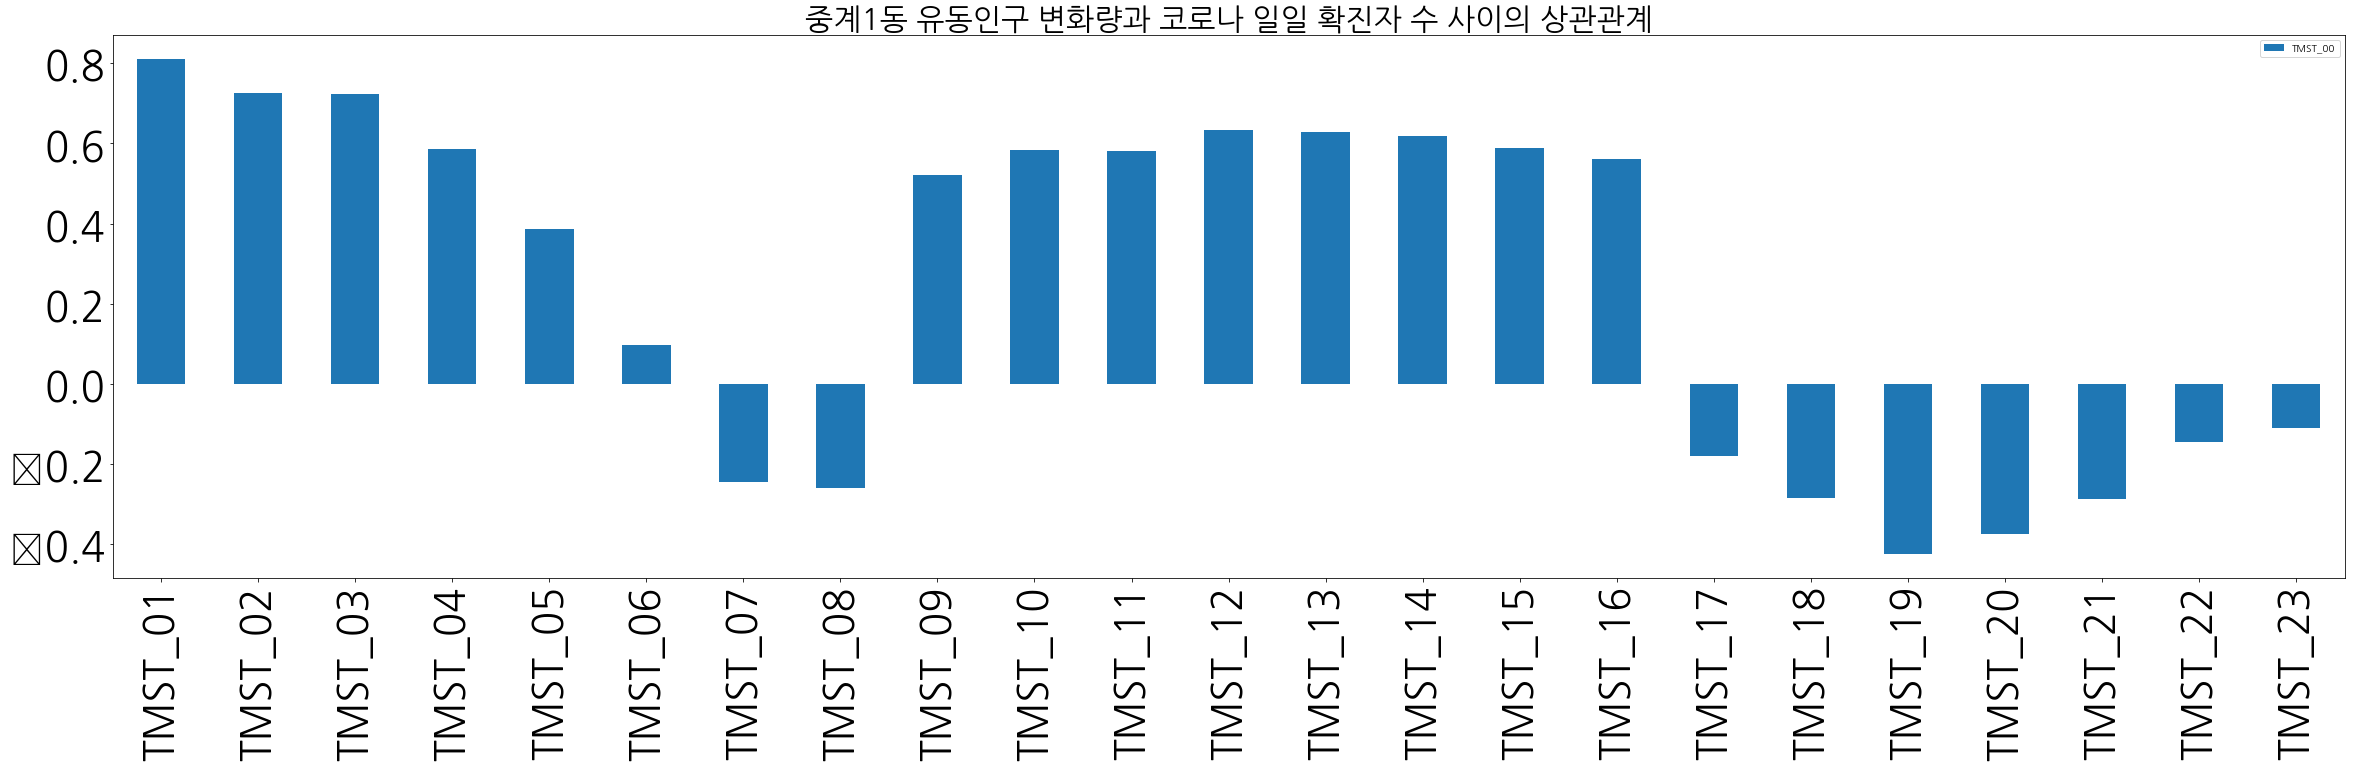

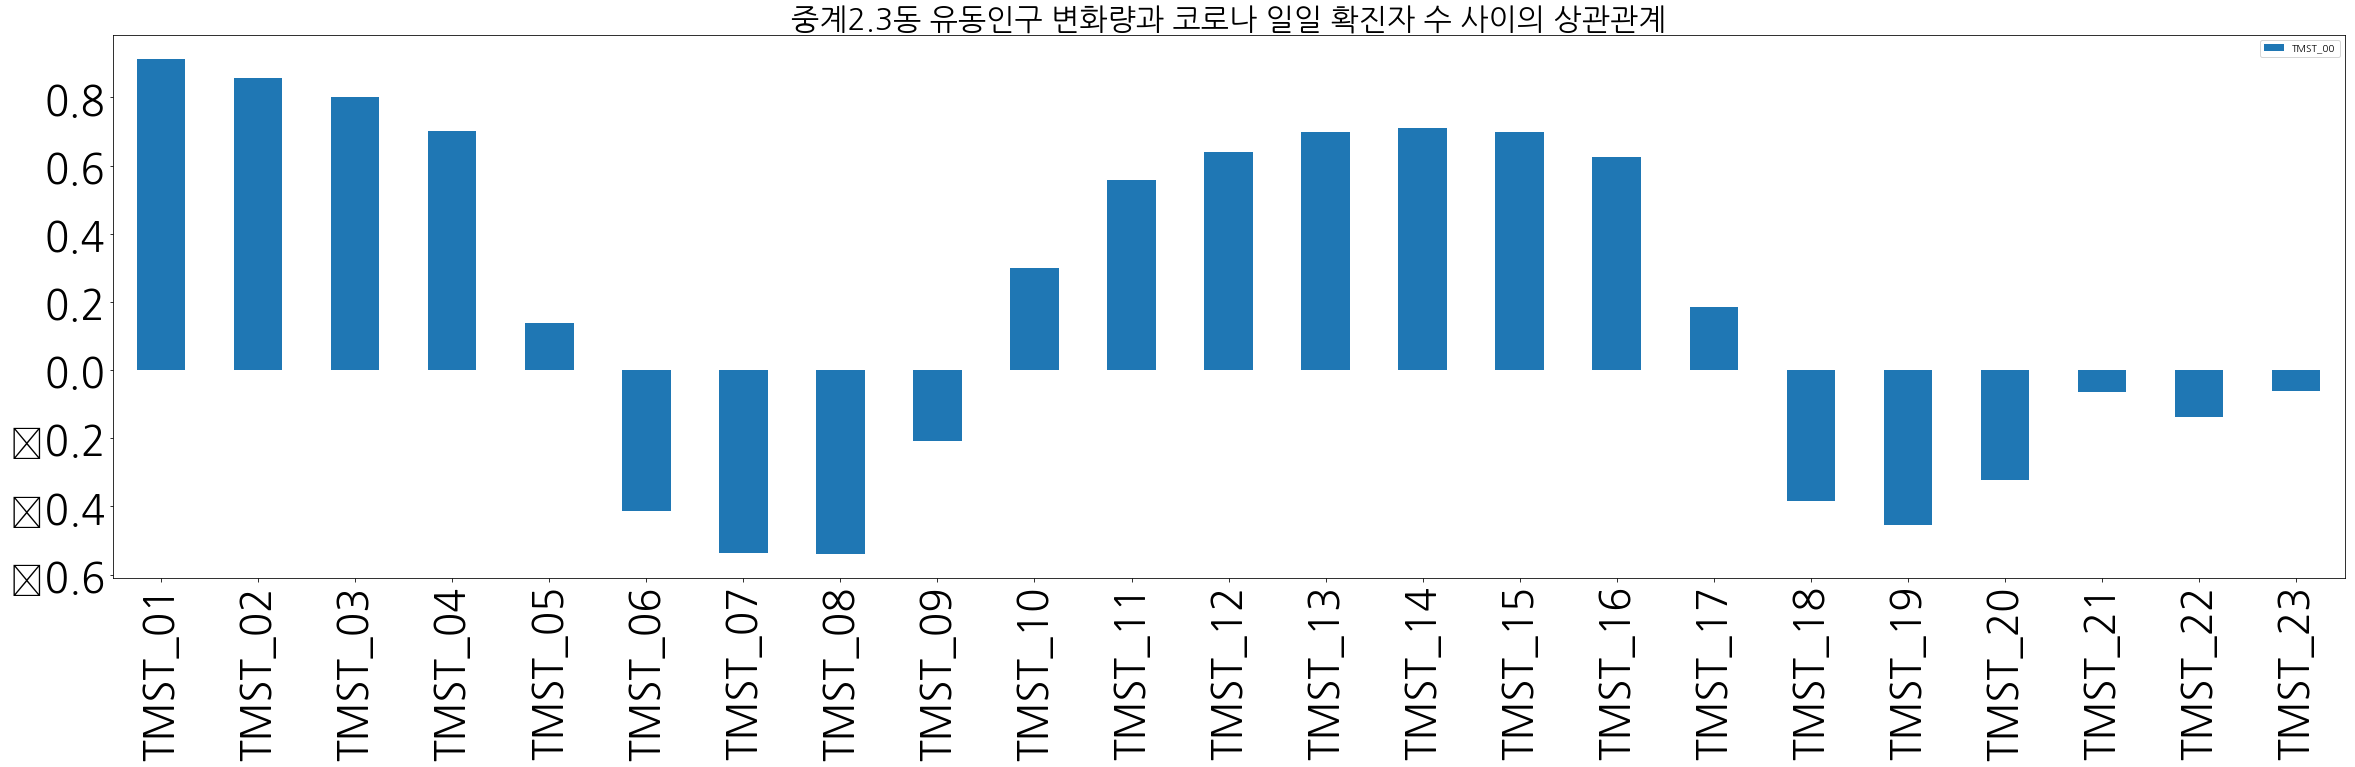

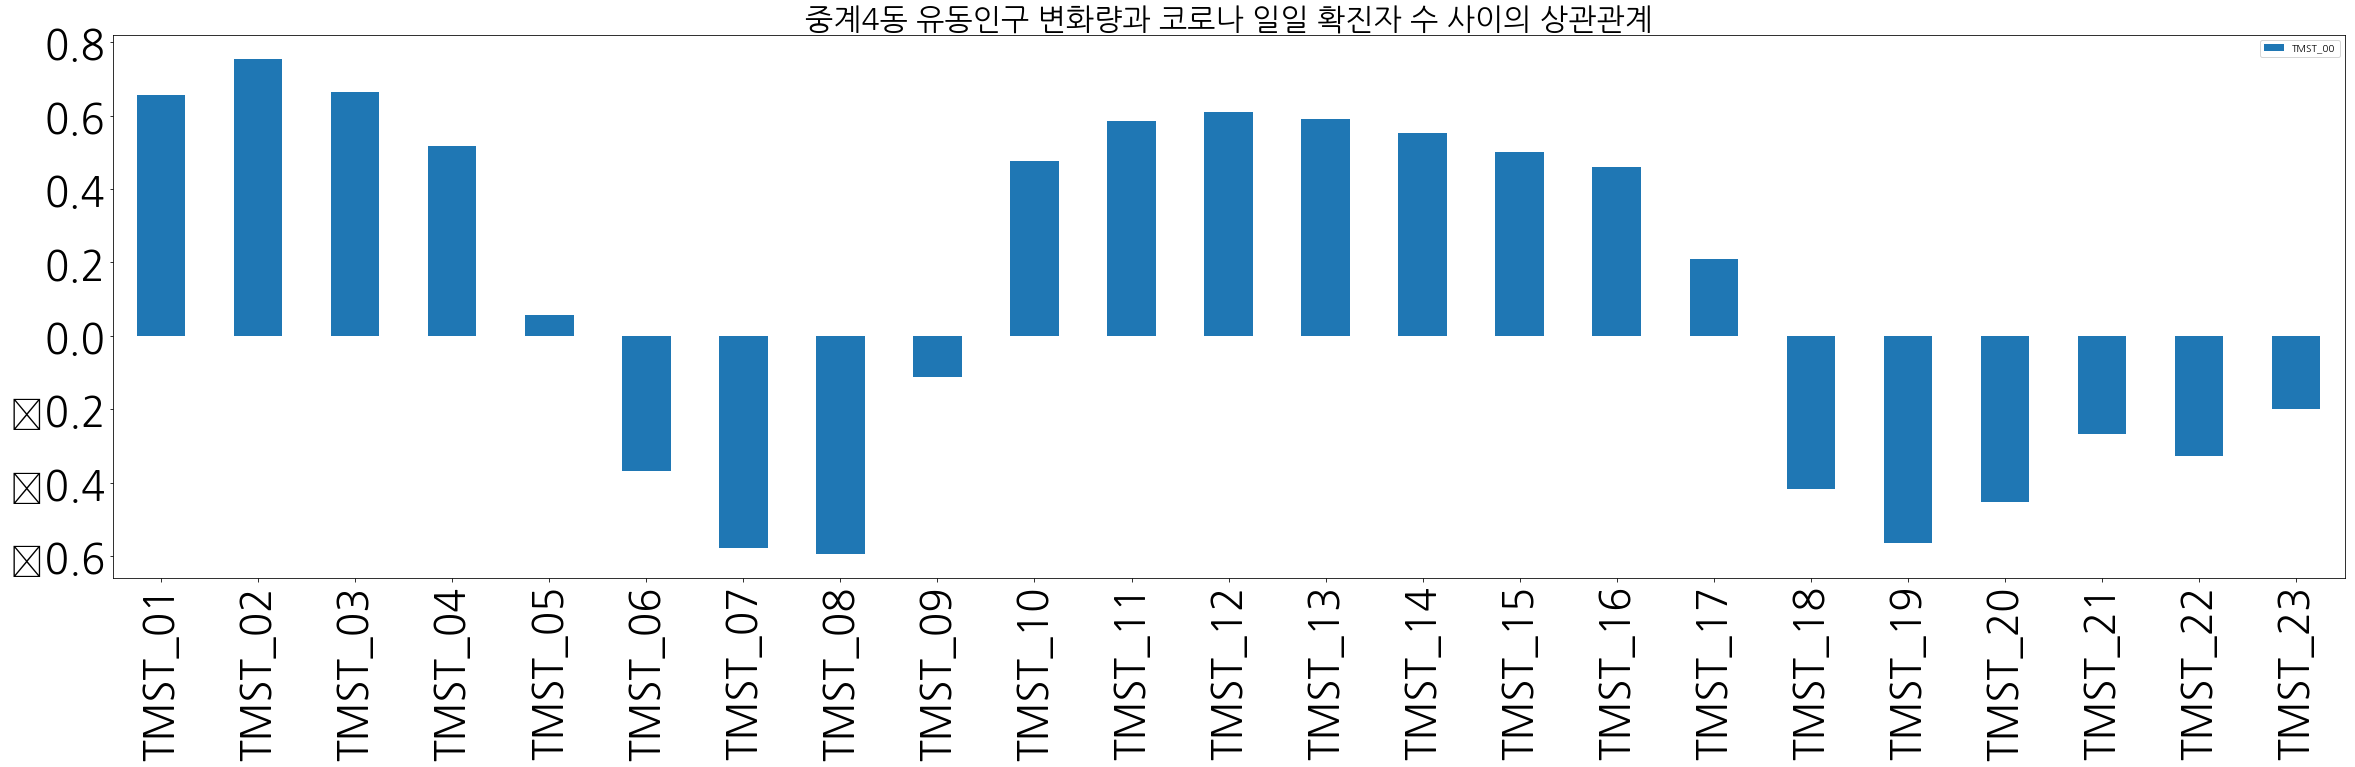

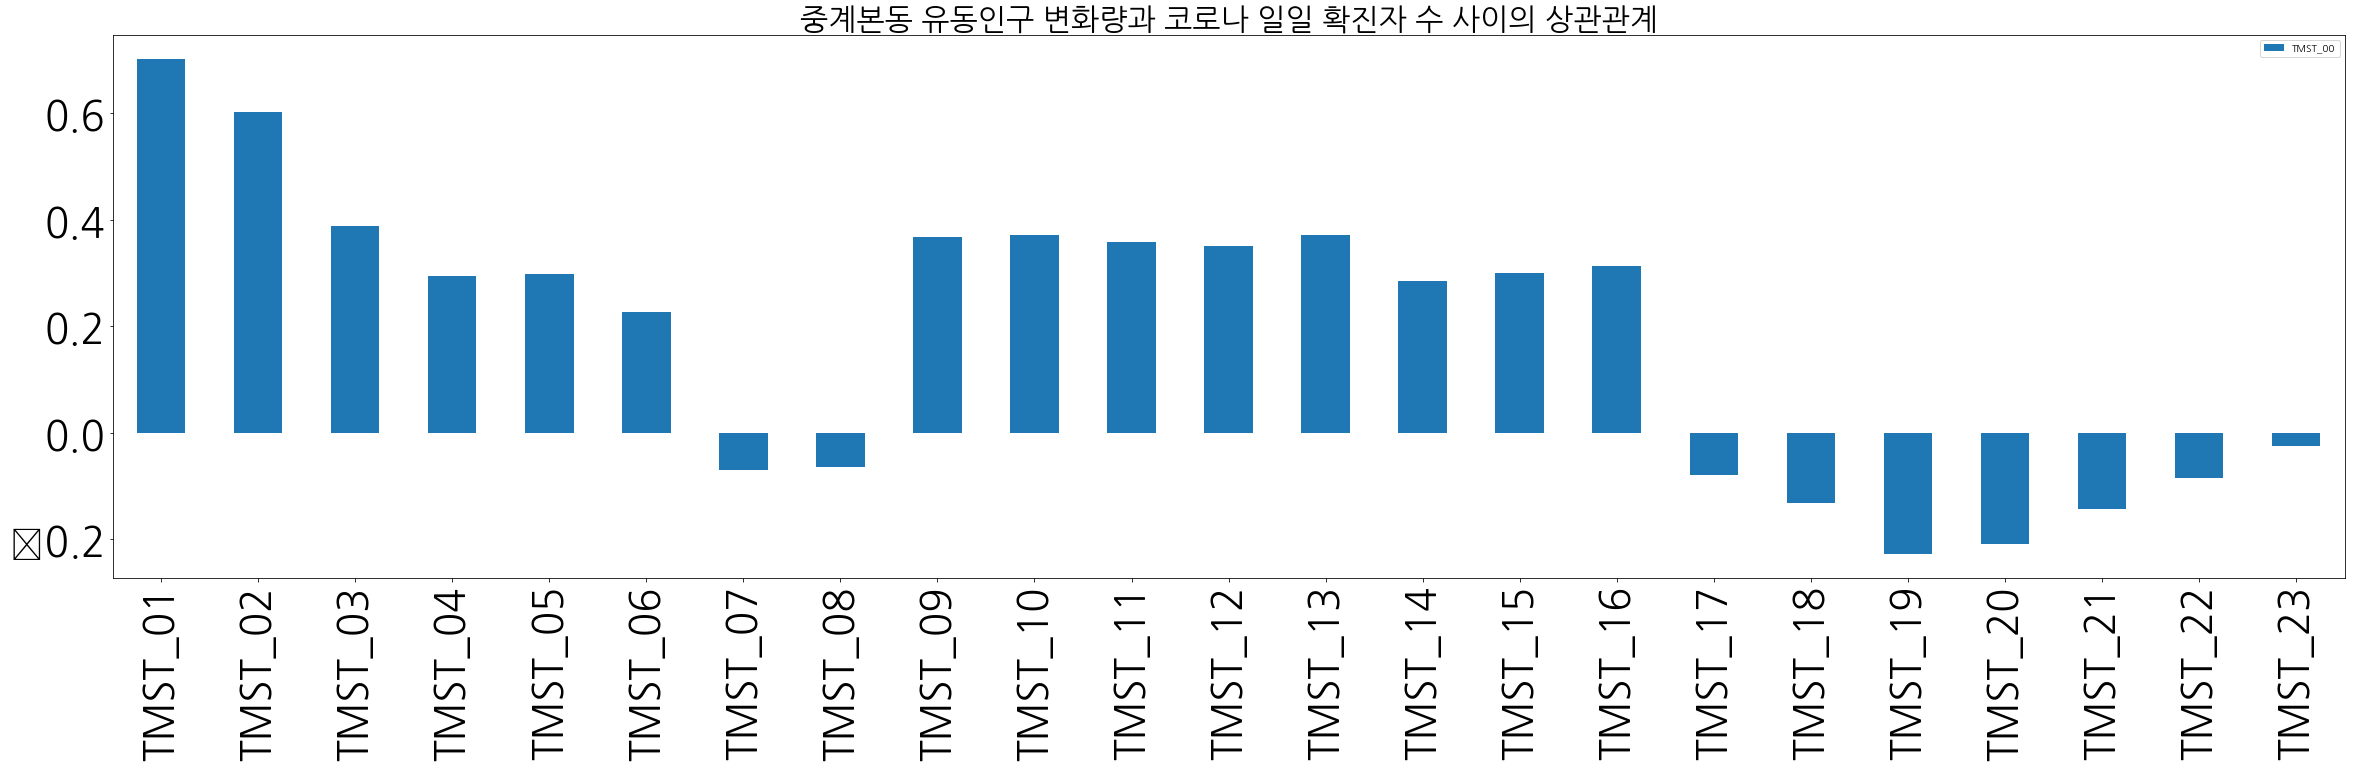

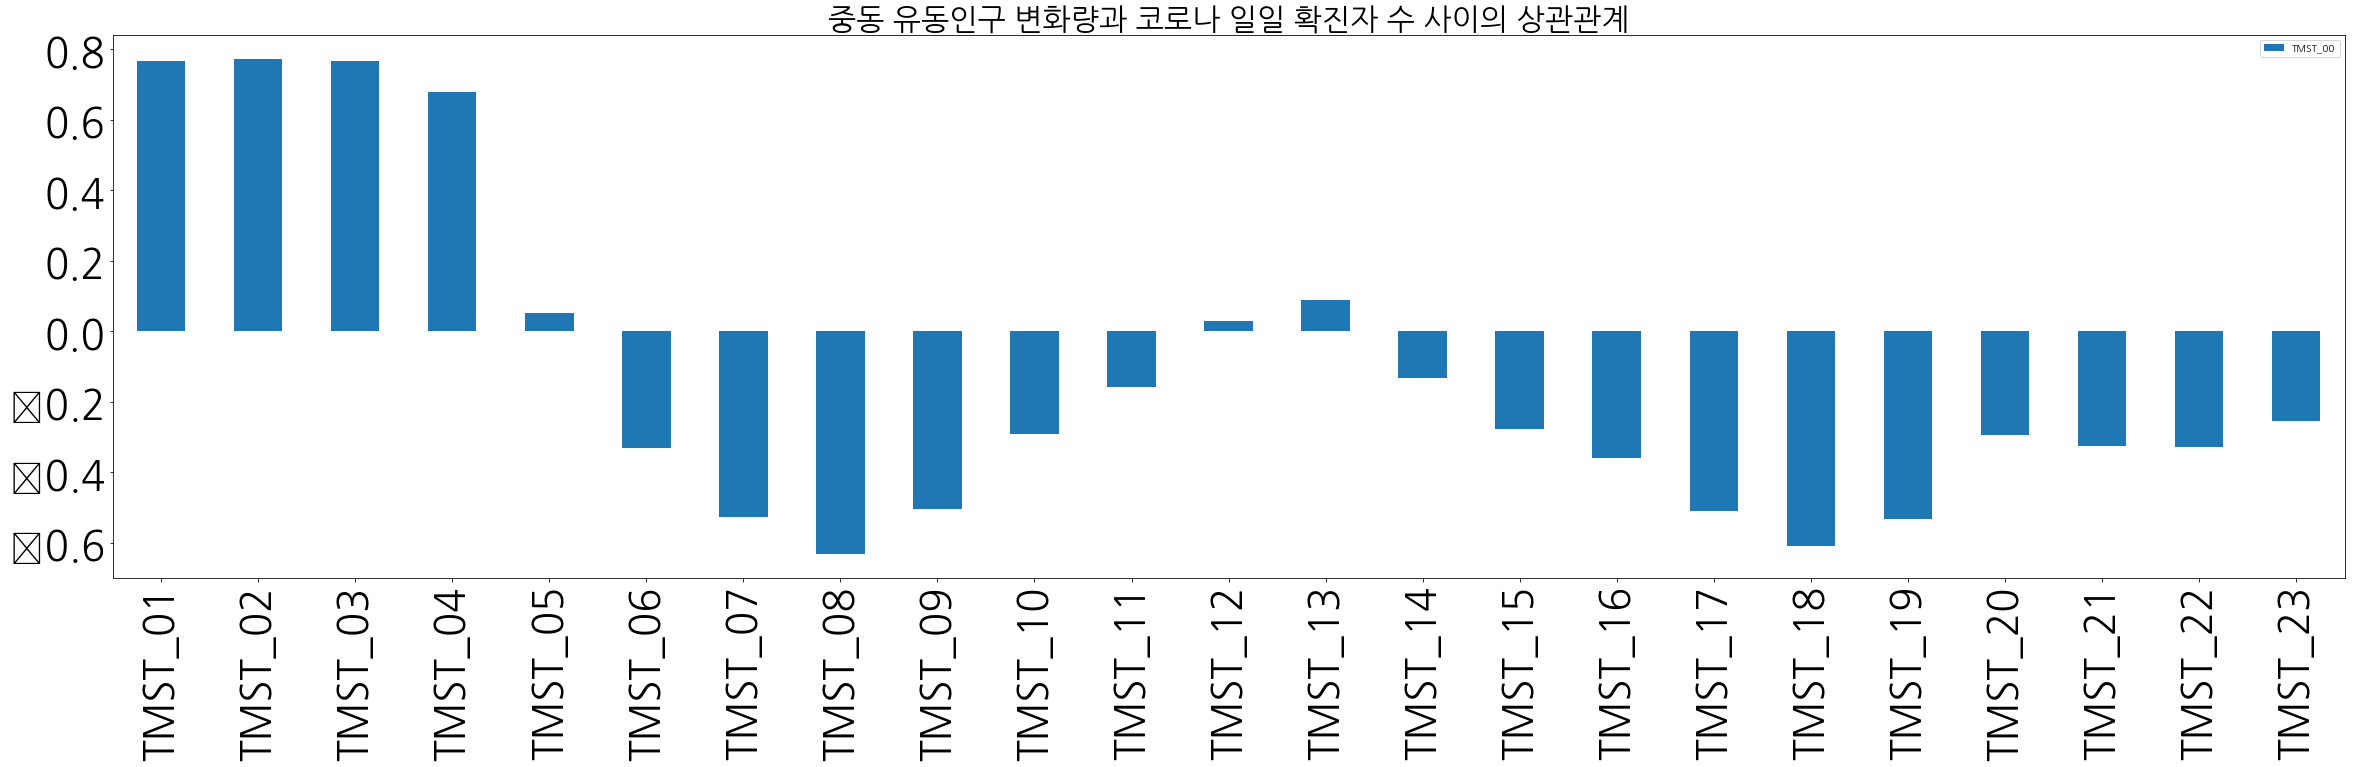

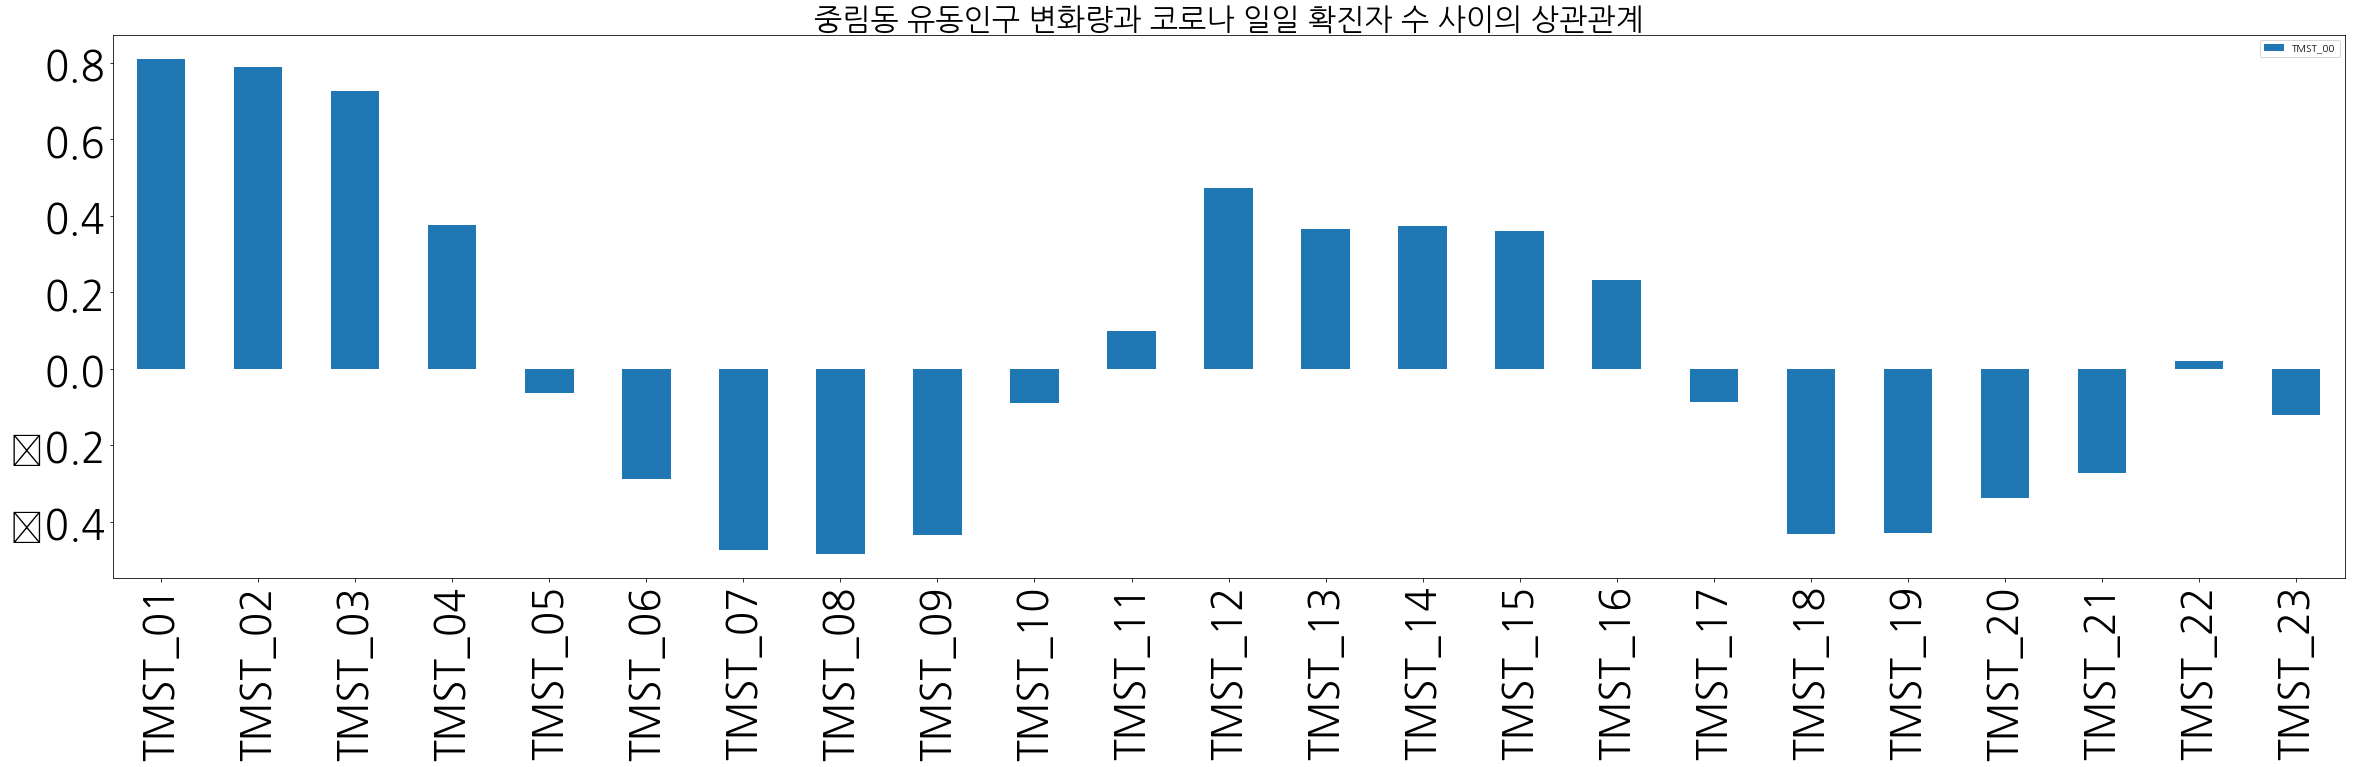

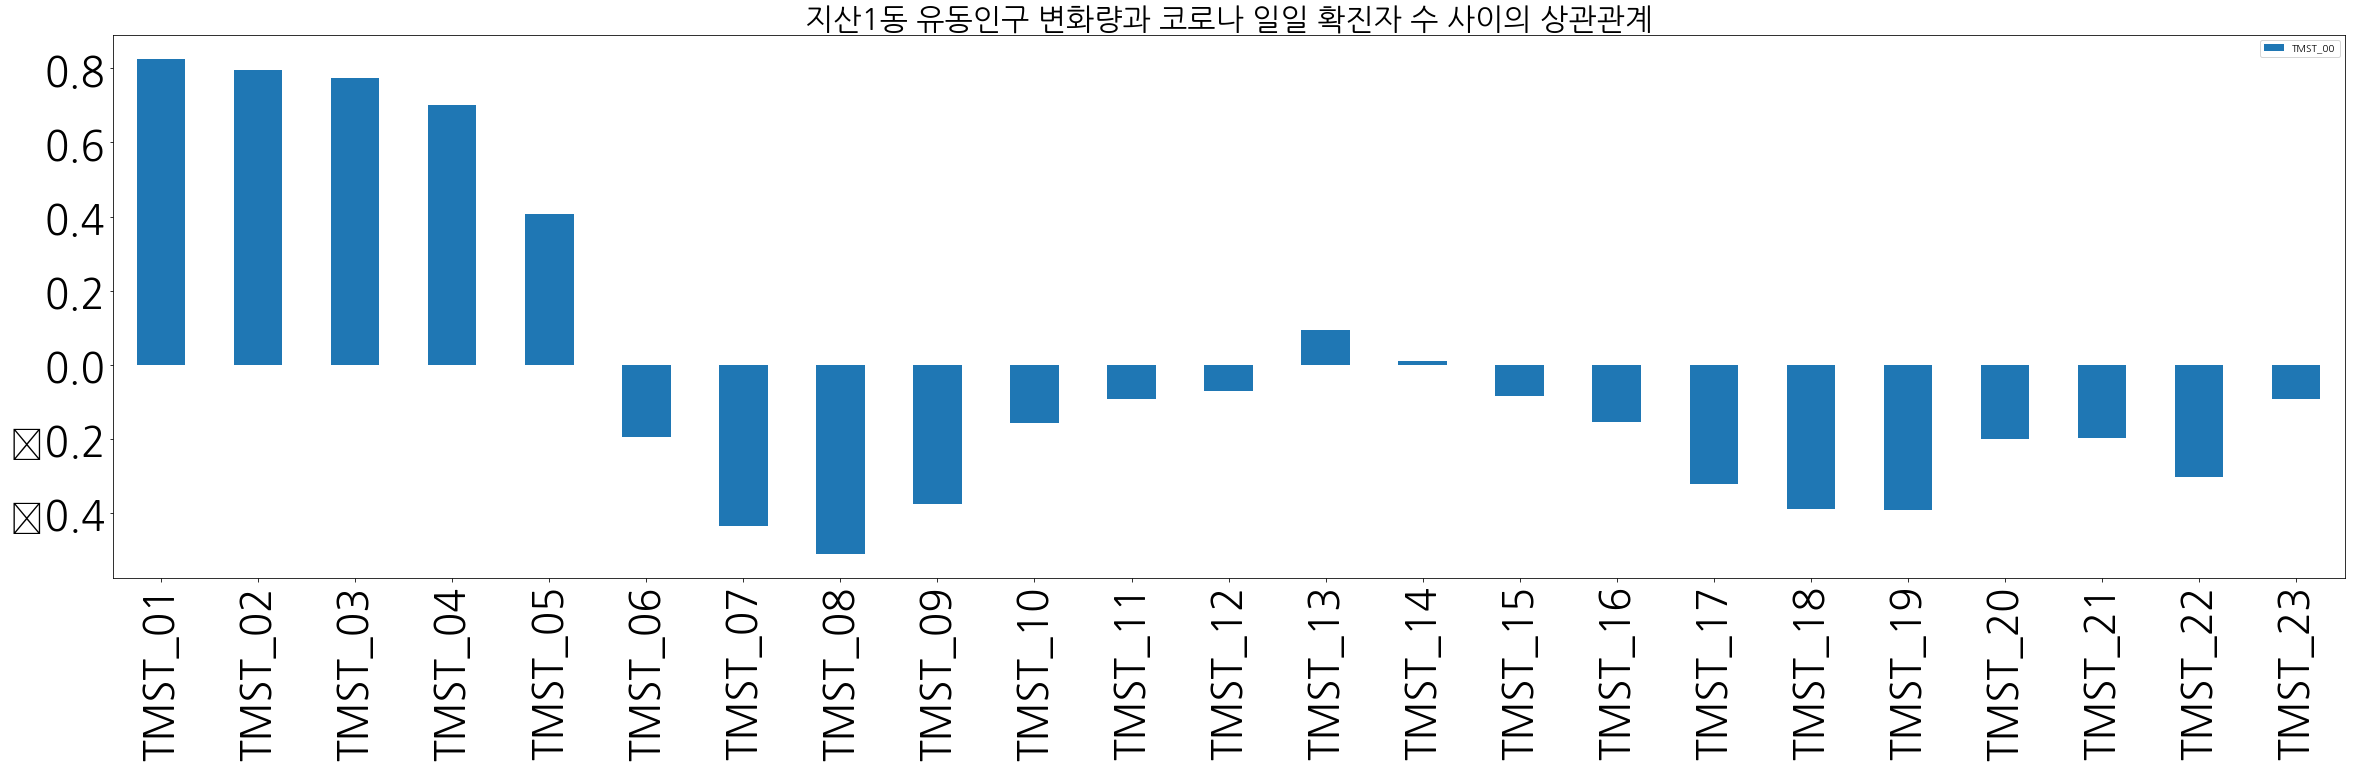

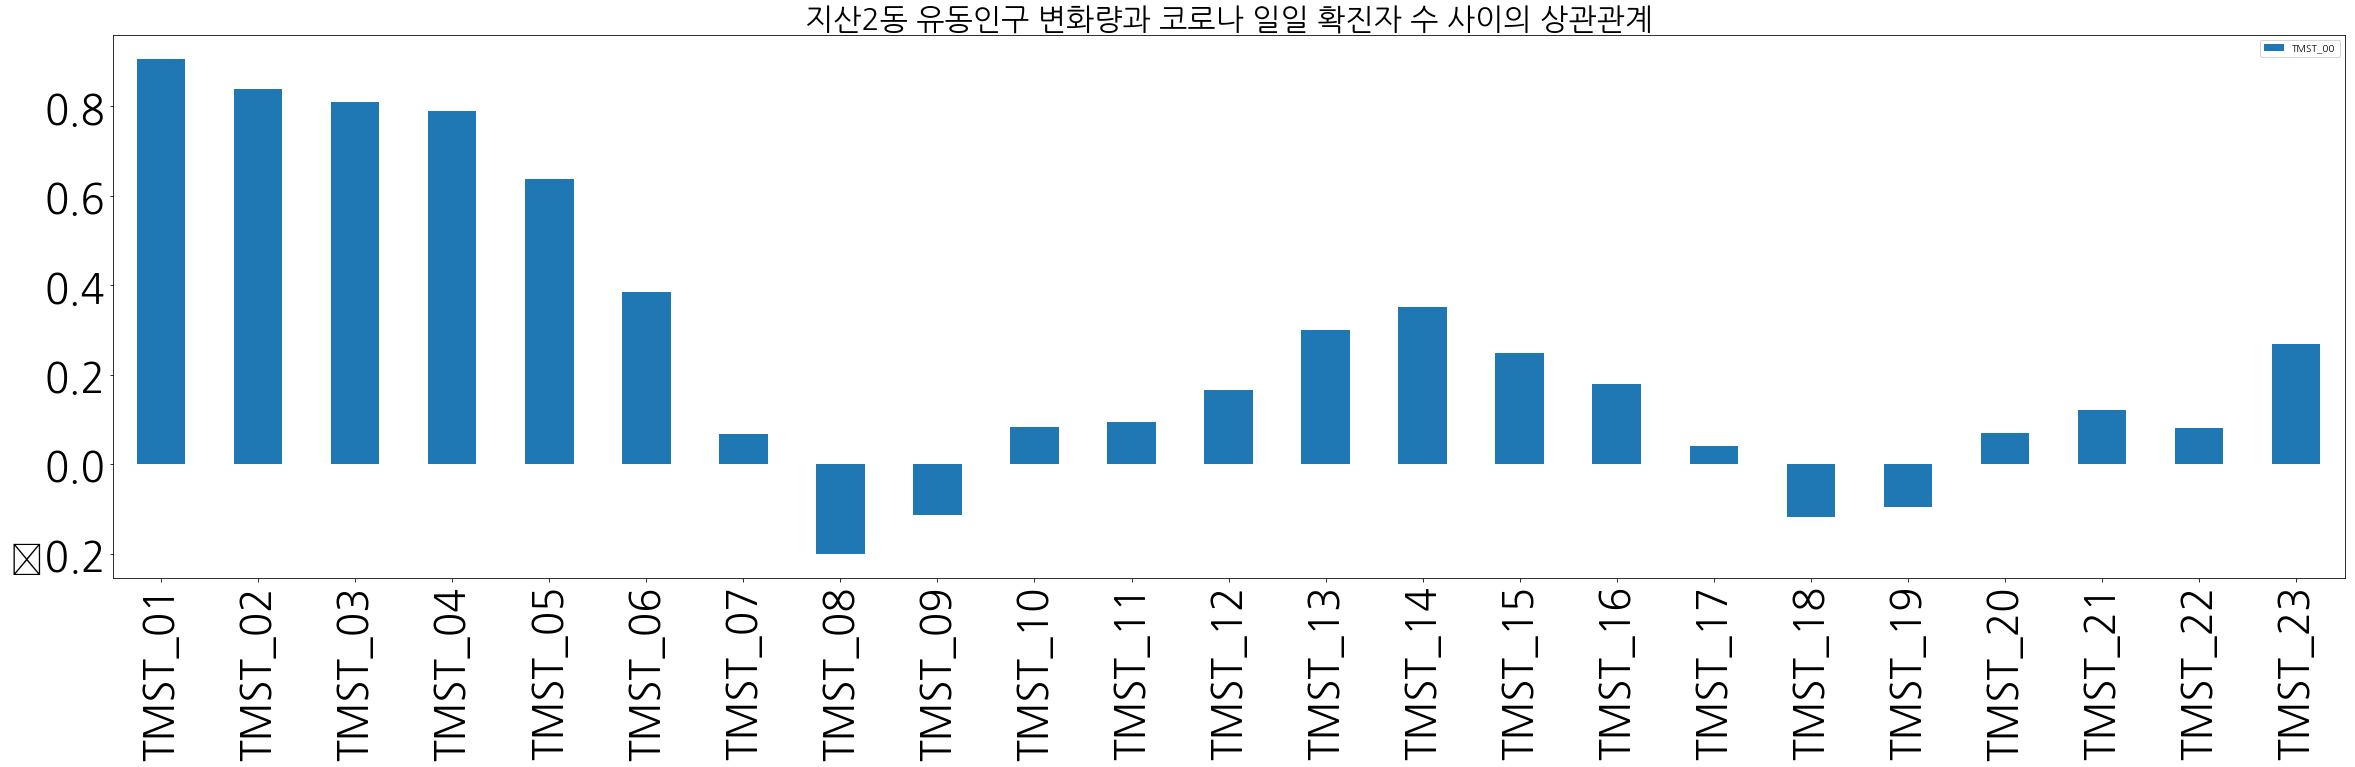

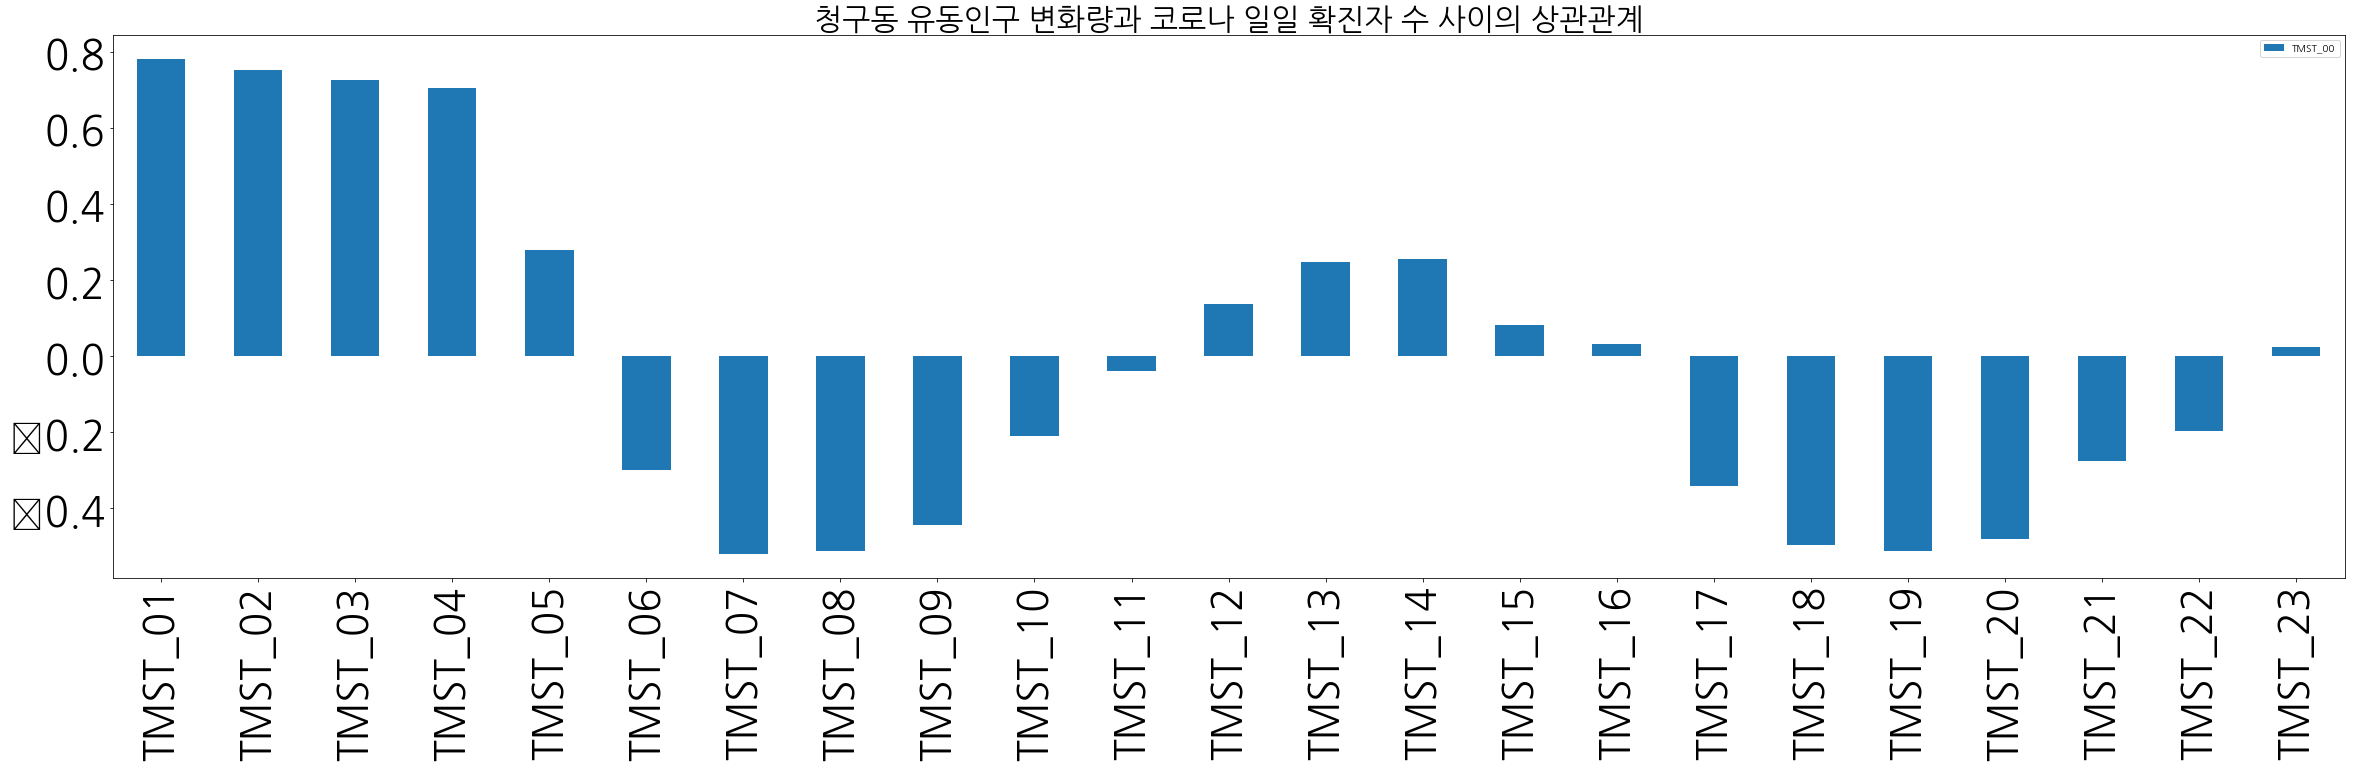

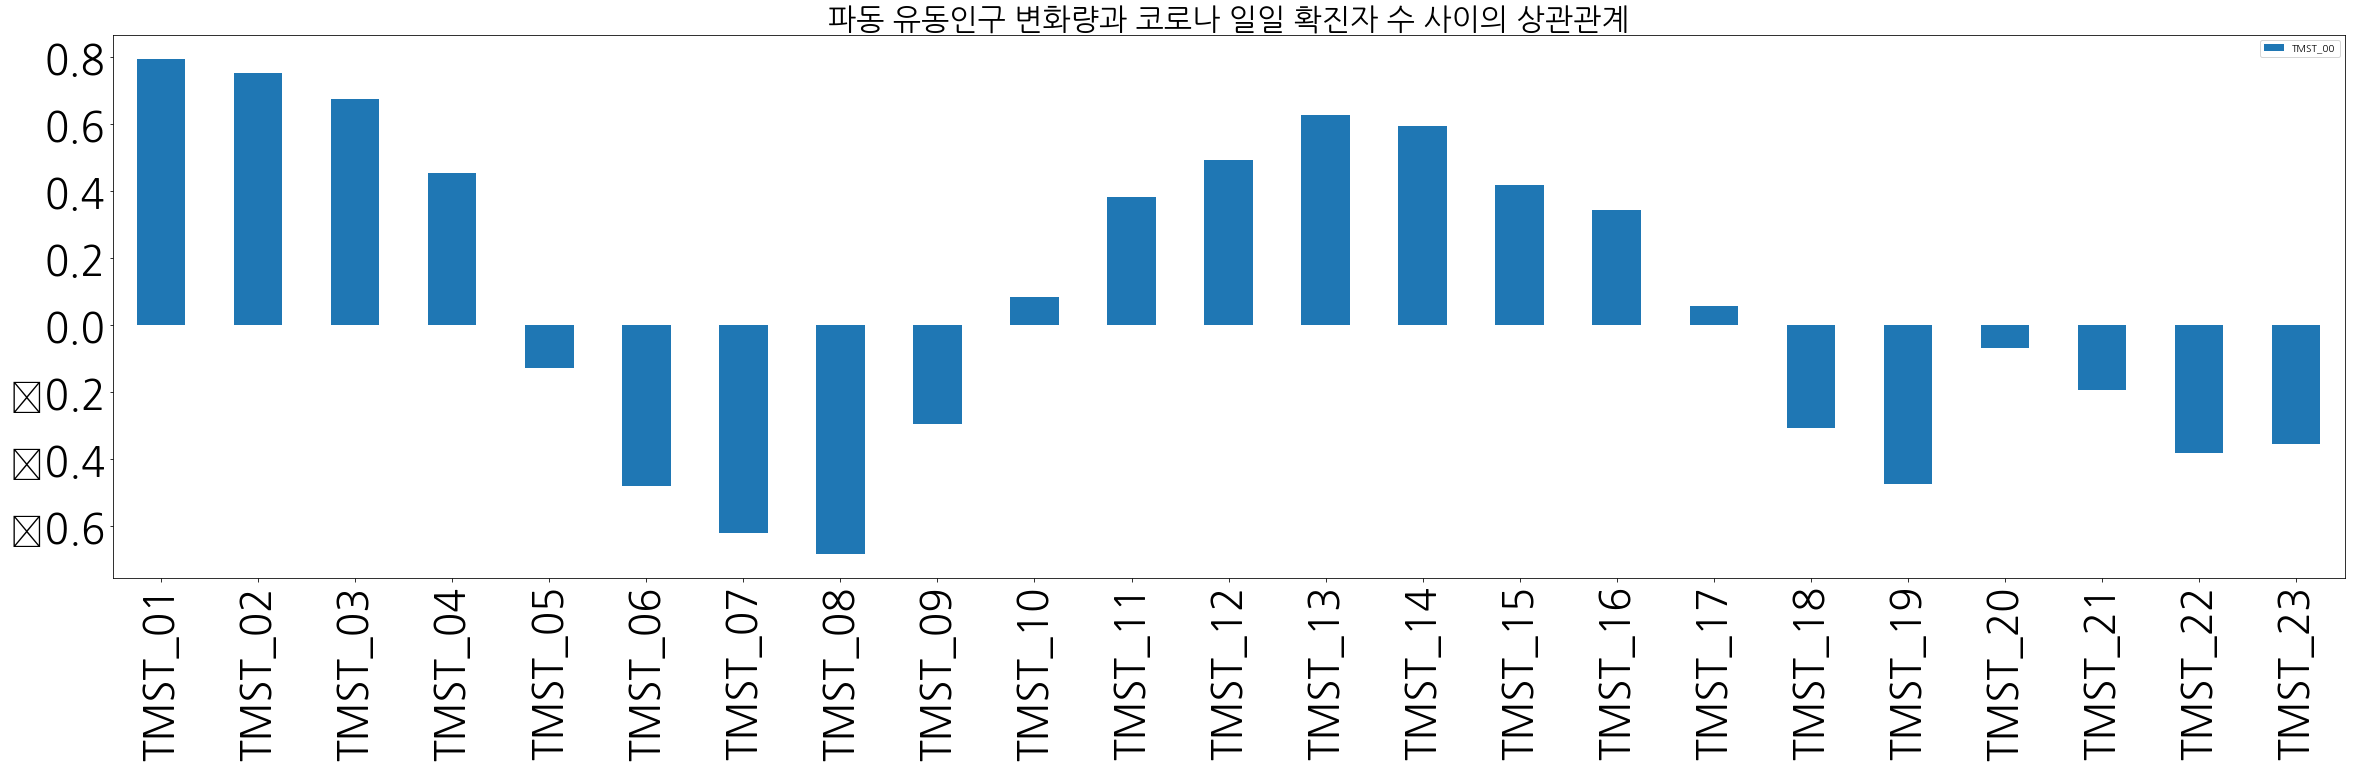

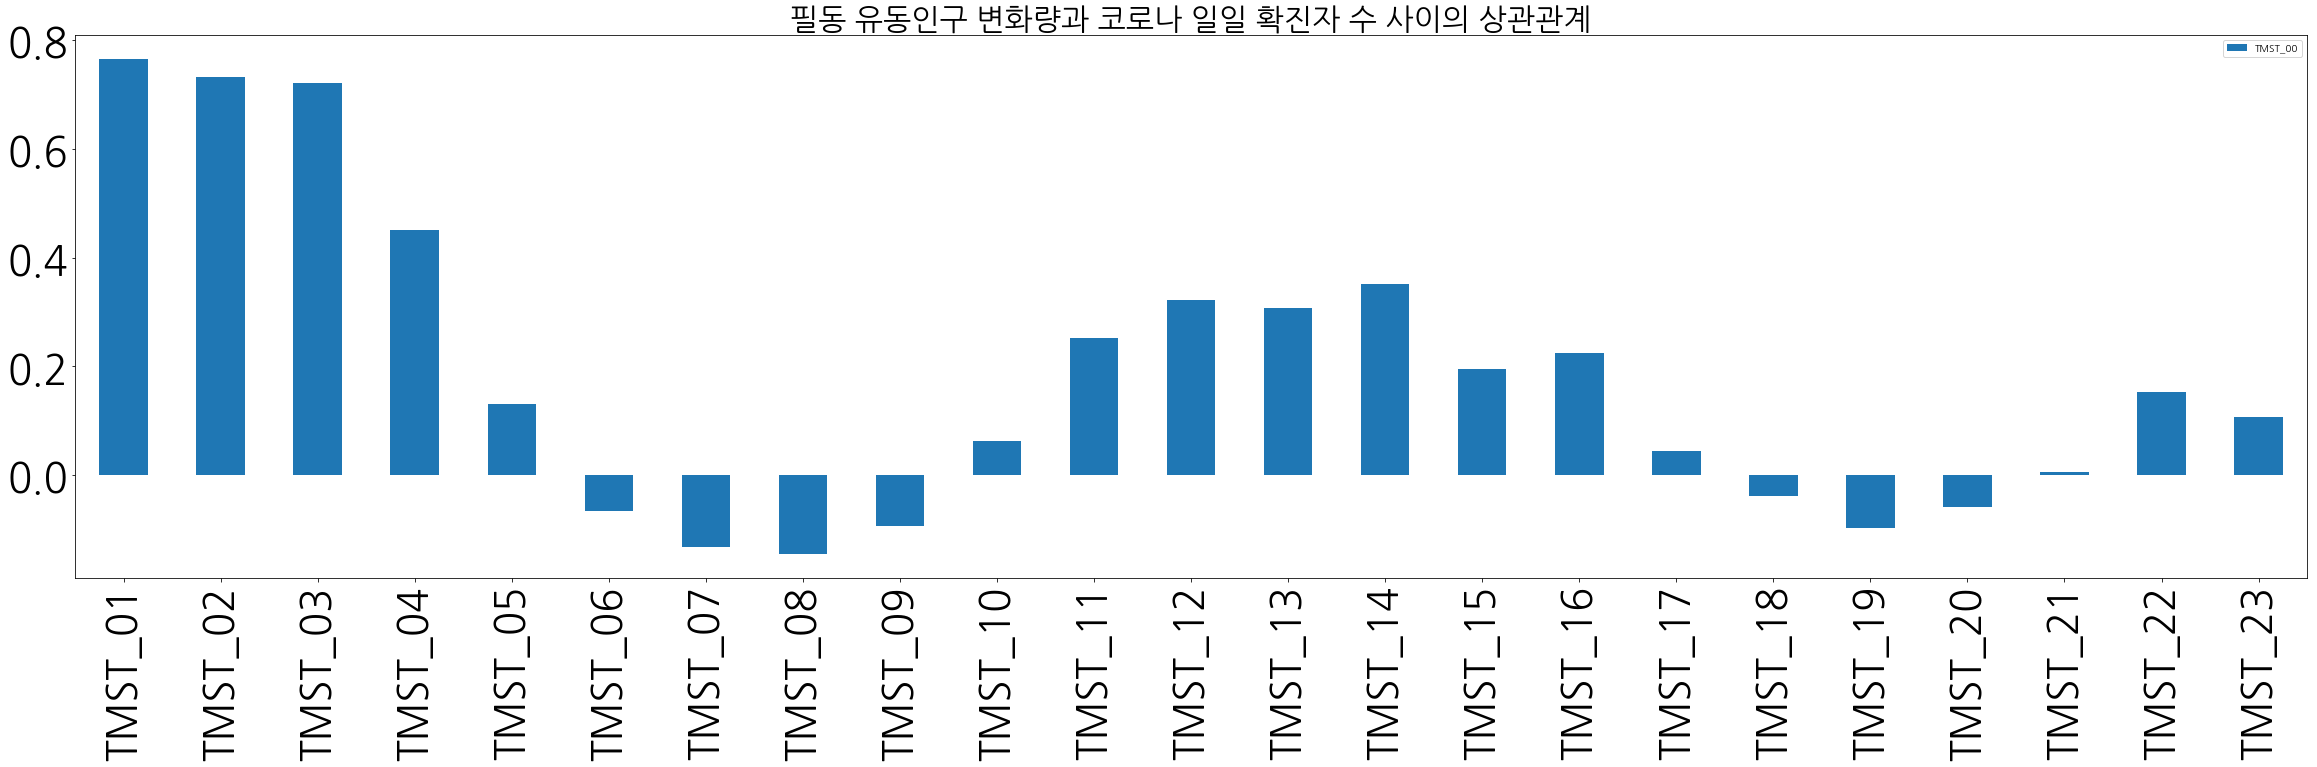

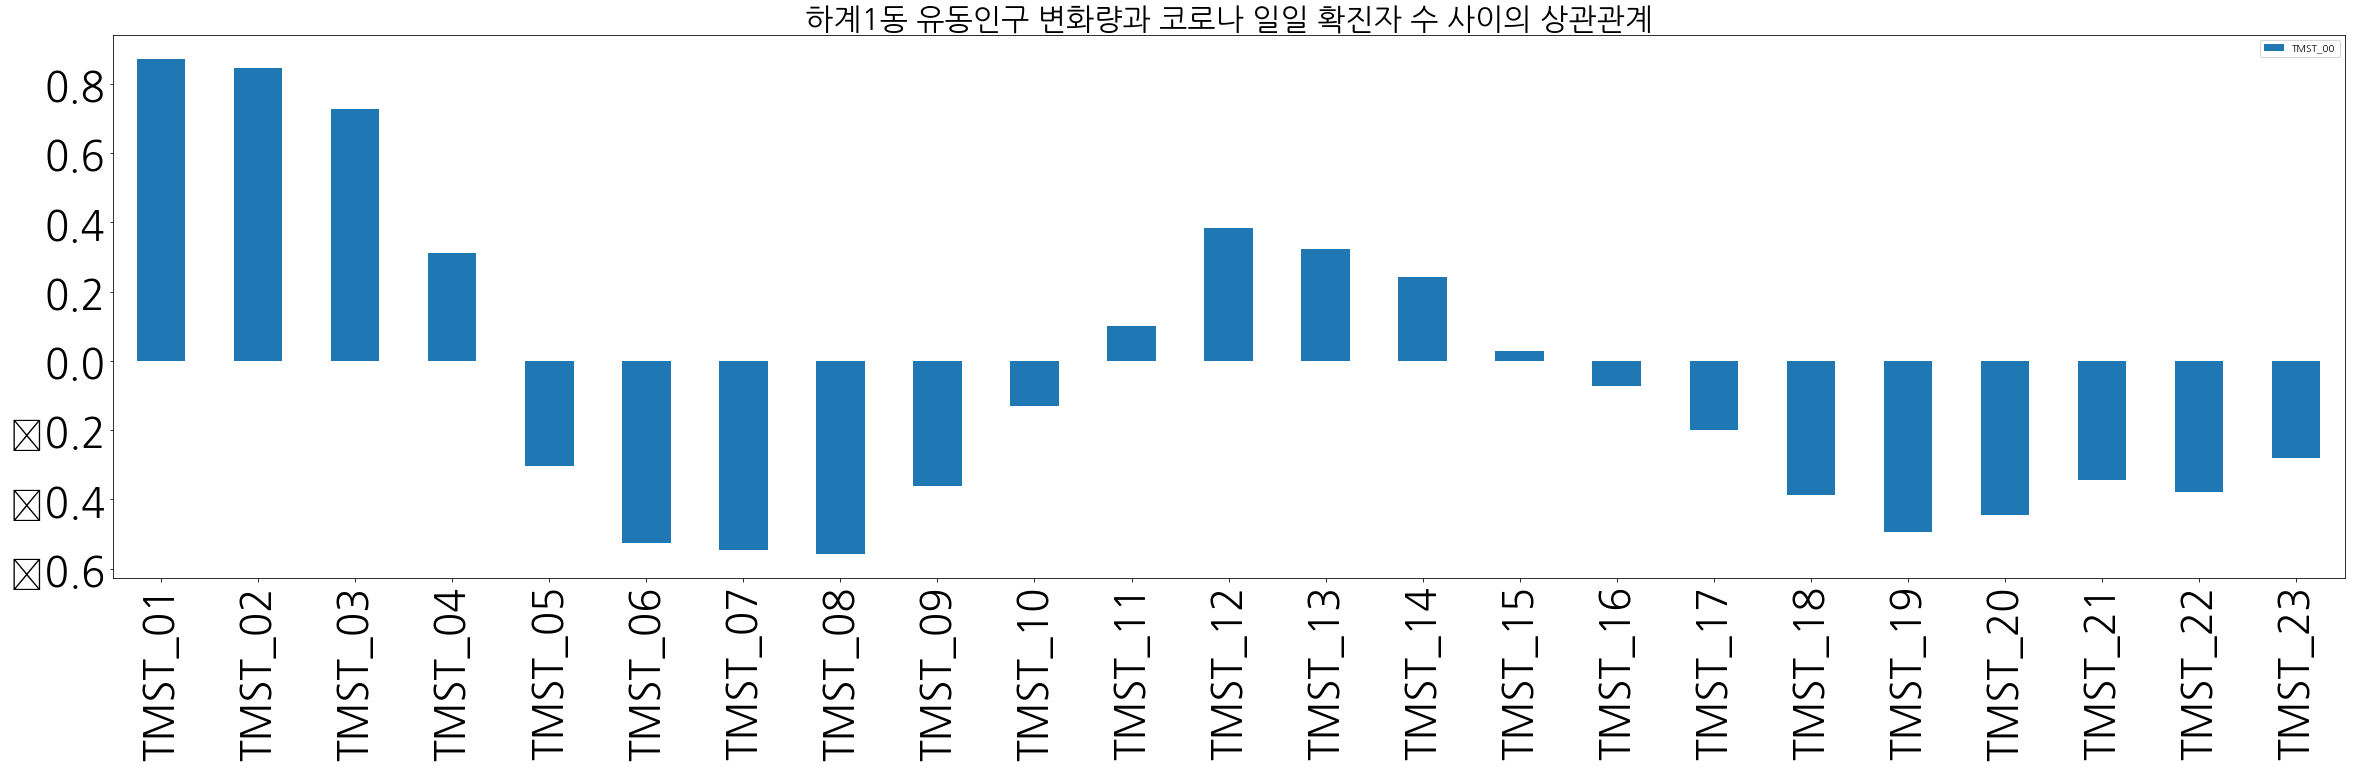

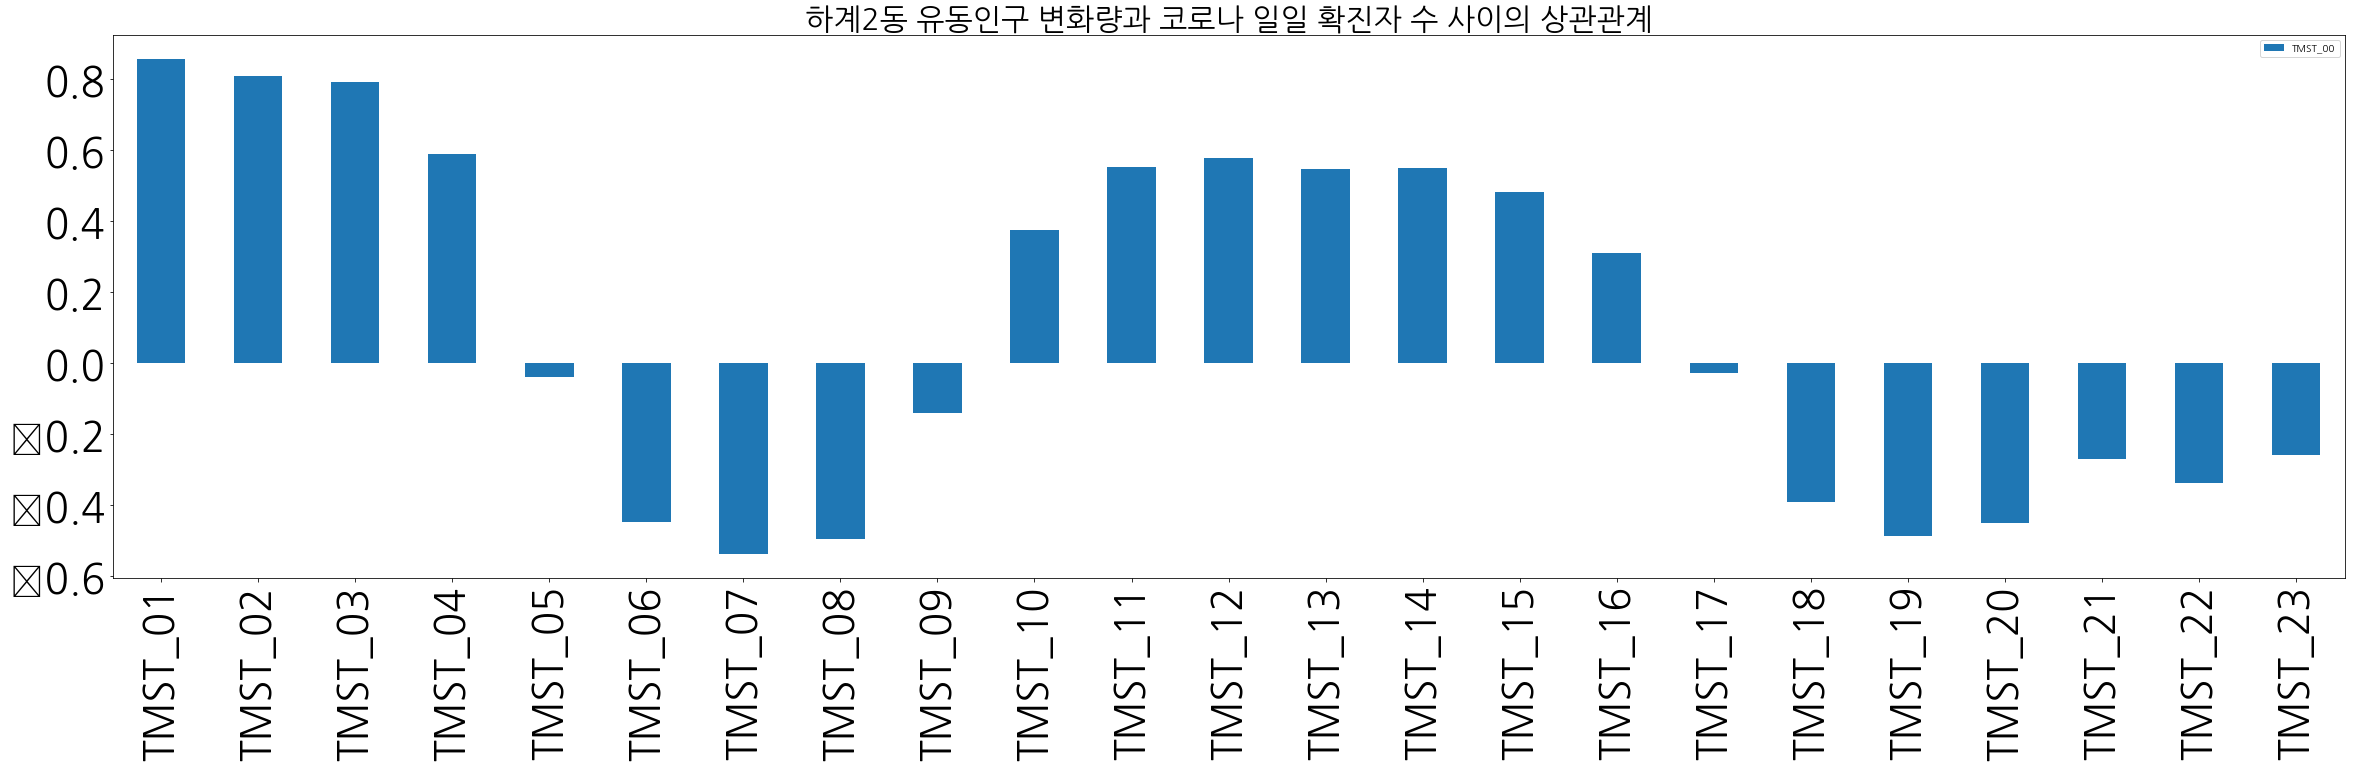

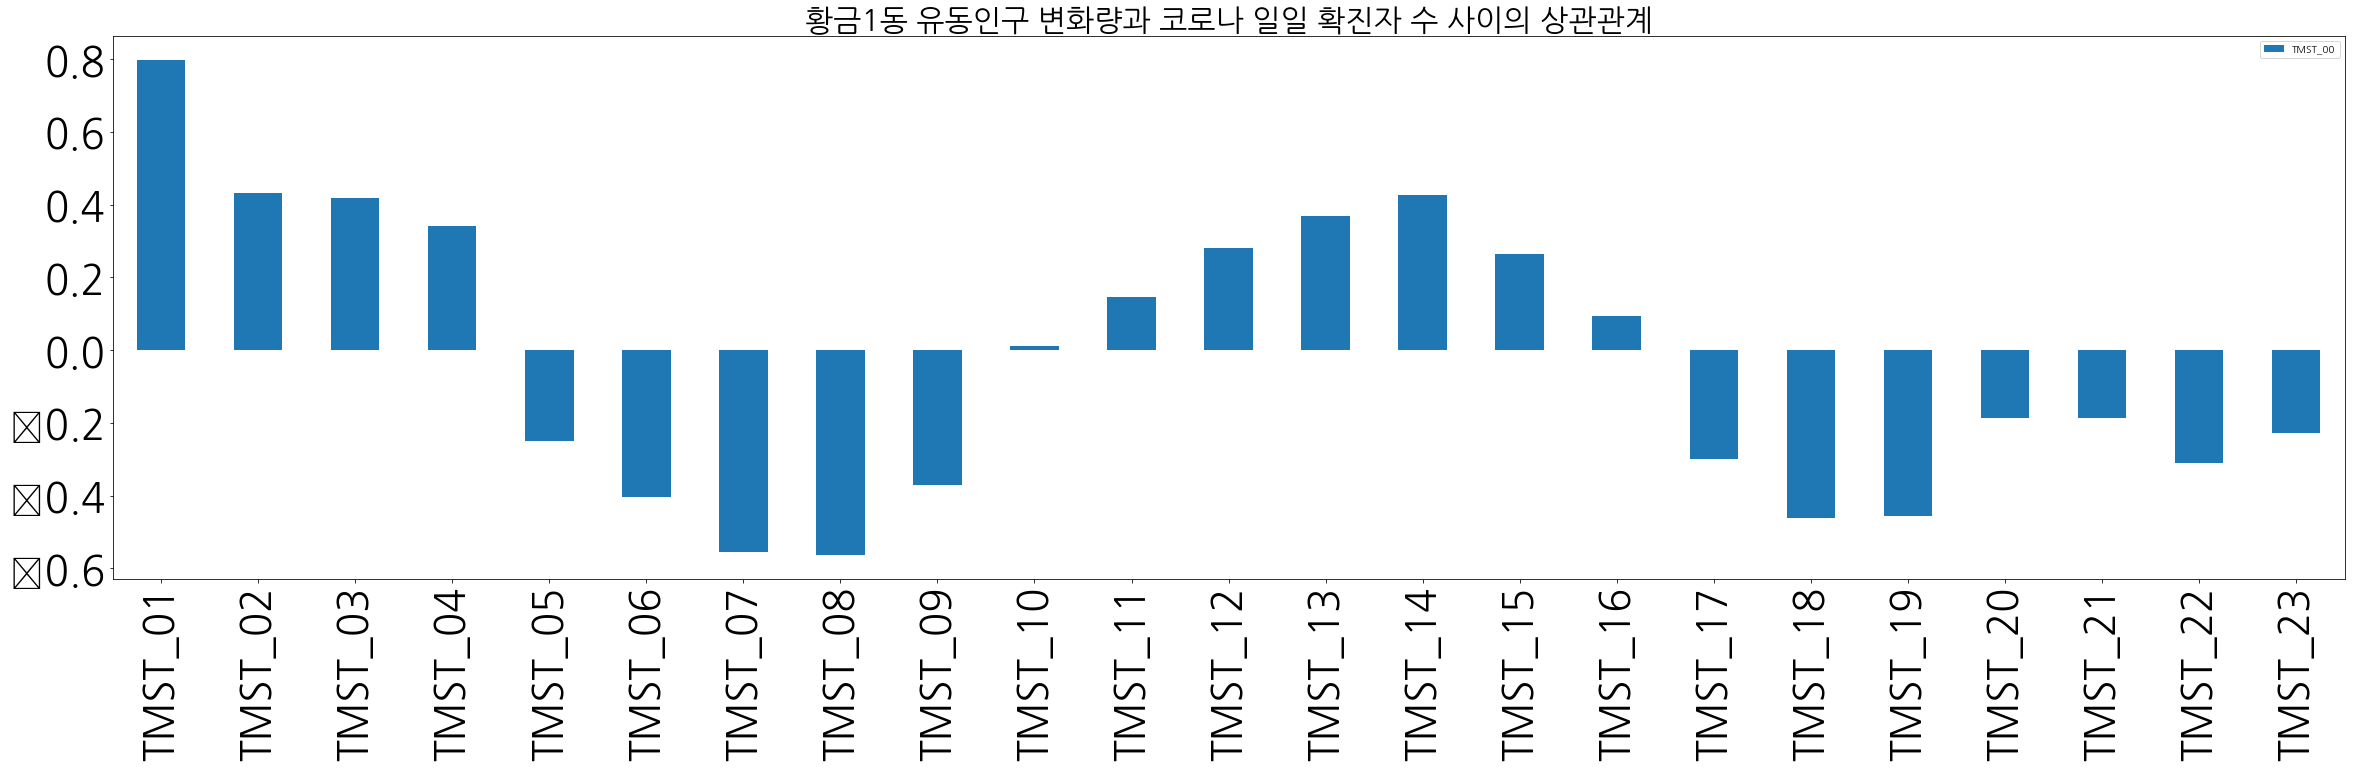

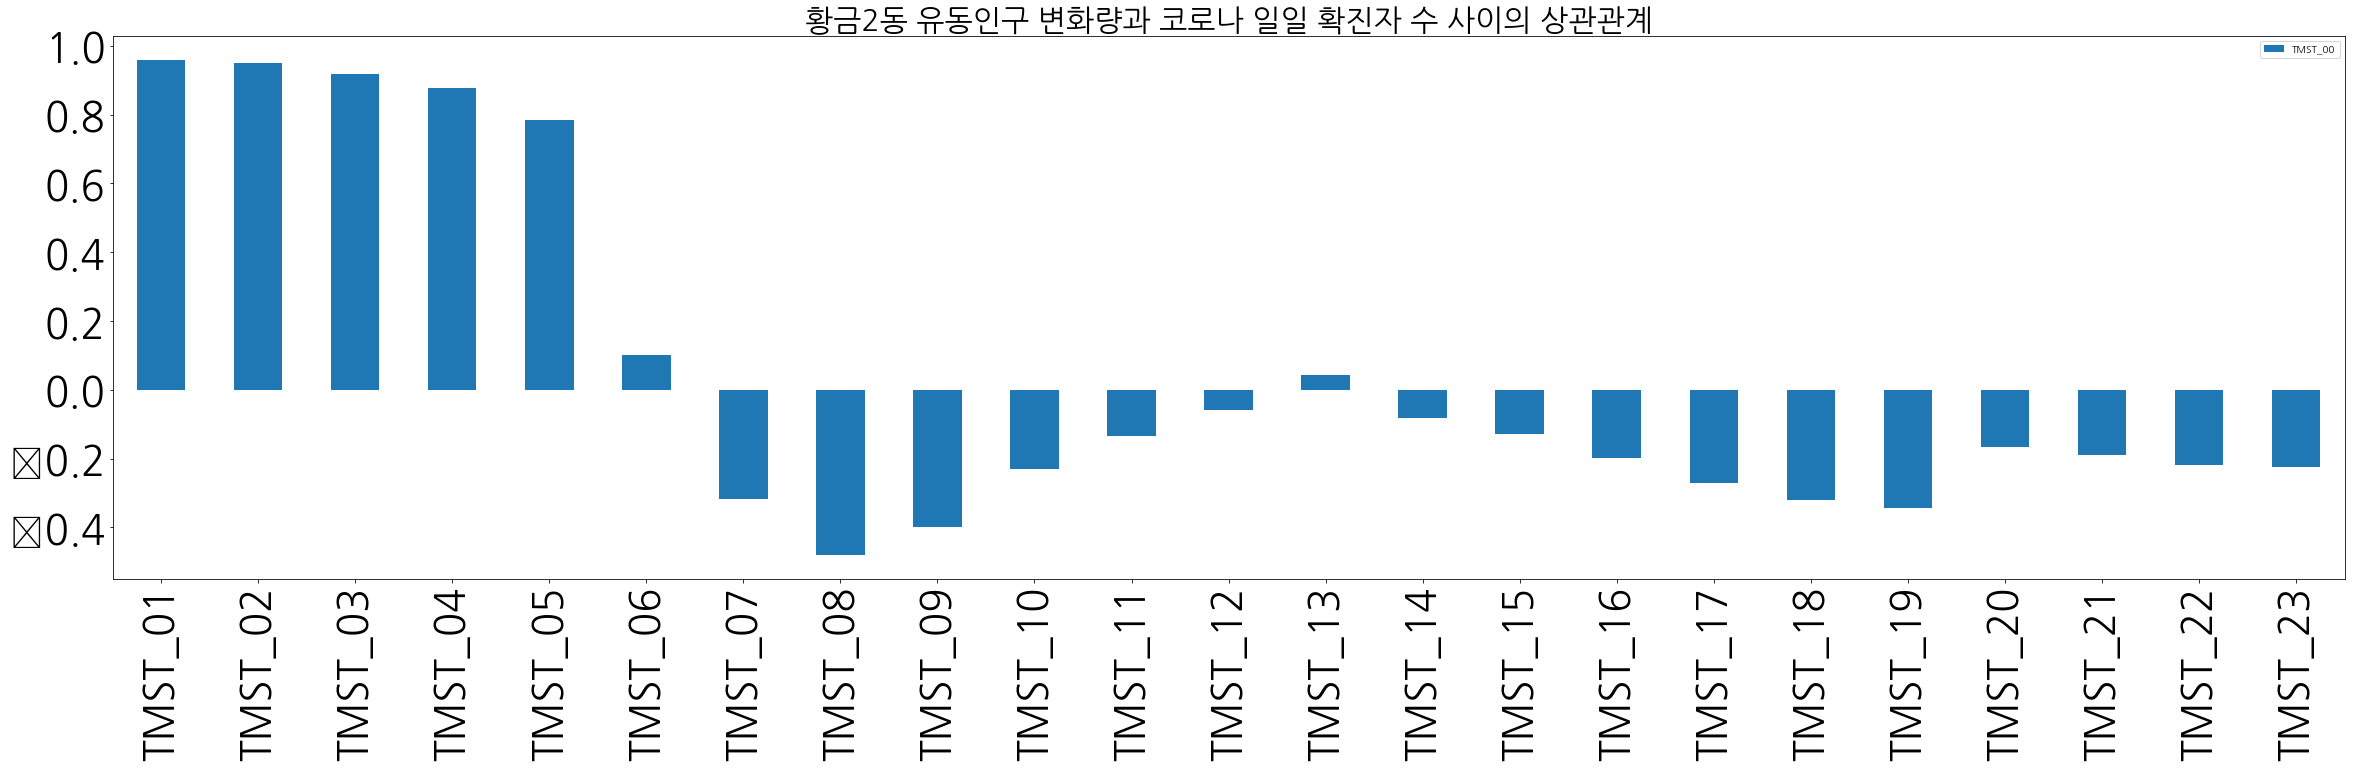

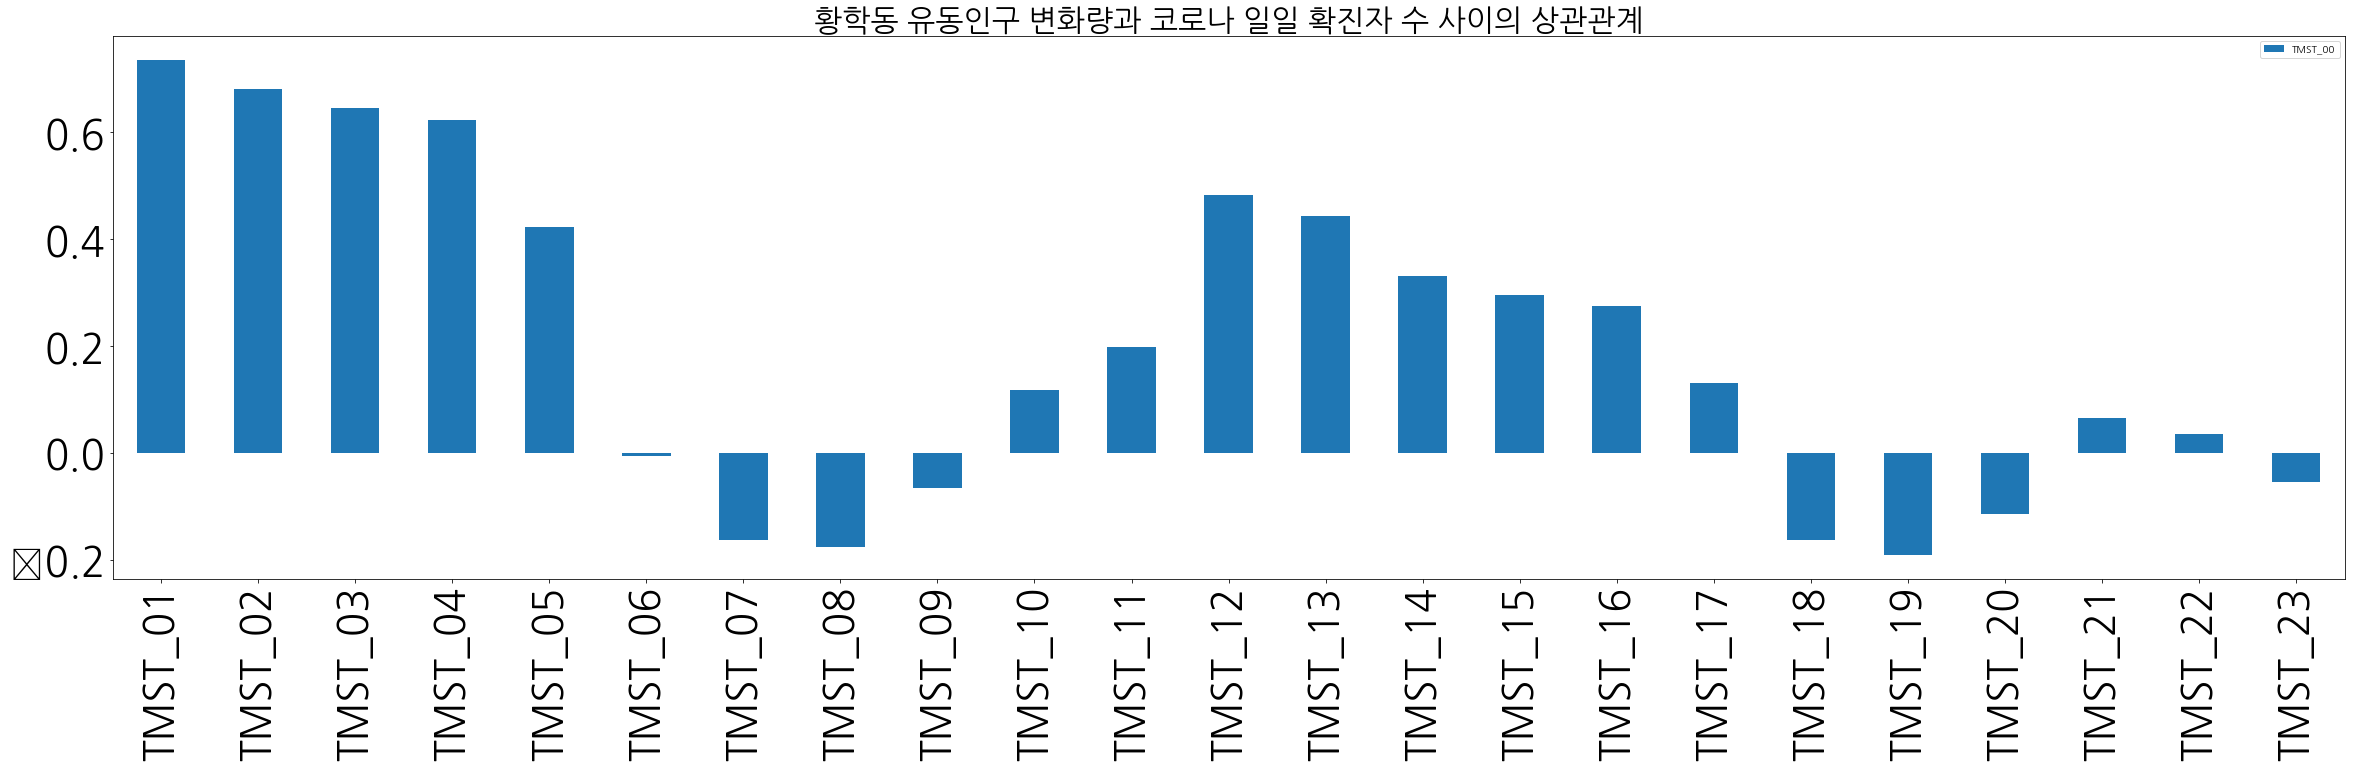

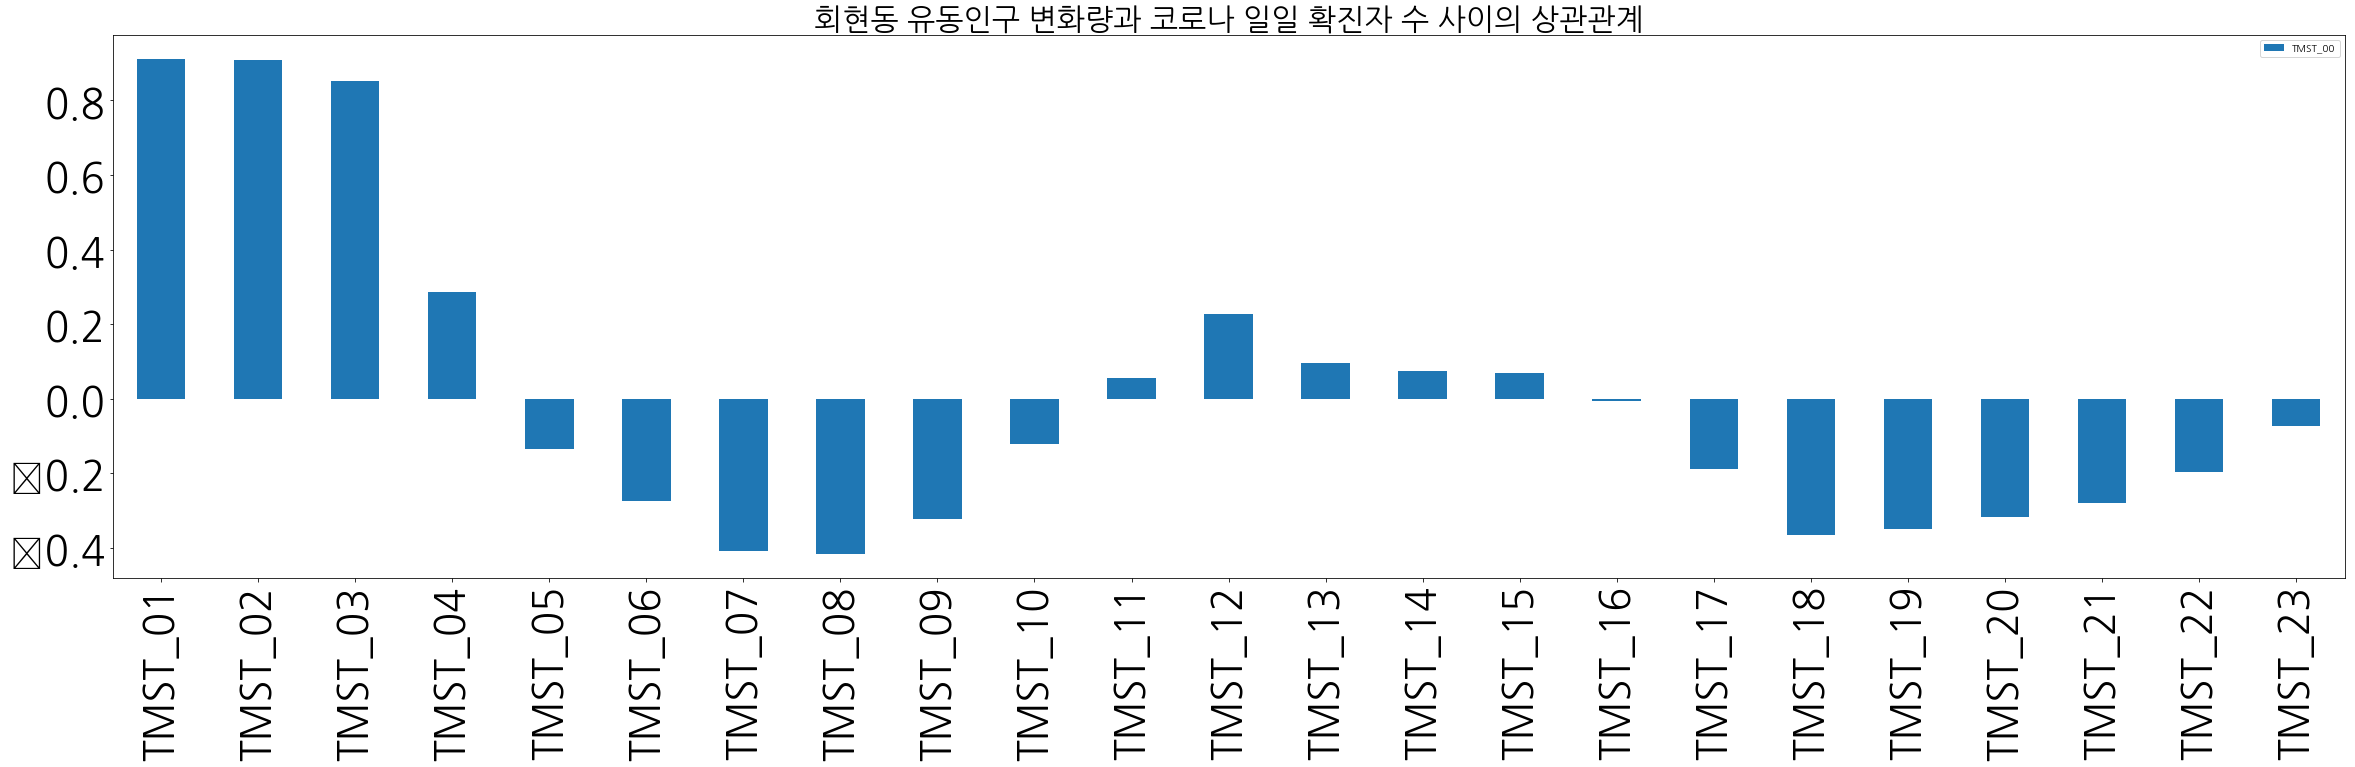

In [195]:
for dist in list(sk_data_TIME_DONG.HDONG_NM.unique()):
    data = sk_data_TIME_DONG[sk_data_TIME_DONG.HDONG_NM == dist]

    data = data.iloc[:, 3:]
    
    data_dif = data - data.shift(1)
    data_dif = data_dif.fillna(0)
    
    concat_data = pd.concat([covid_SEOUL_dif, data], axis = 1)
    plt.rcParams["figure.figsize"] = (40,10)
    pd.DataFrame(data_dif.corr().iloc[0, 1:]).plot(kind = 'bar')
    plt.title(f'{dist} 유동인구 변화량과 코로나 일일 확진자 수 사이의 상관관계', fontsize = 30)
    plt.yticks(fontsize = 40)
    plt.xticks(fontsize = 40)
    plt.legend(fontsize = 10)